# Installation and Set Up

In [1]:
!java -version

openjdk version "17.0.13" 2024-10-15 LTS
OpenJDK Runtime Environment Microsoft-10376486 (build 17.0.13+11-LTS)
OpenJDK 64-Bit Server VM Microsoft-10376486 (build 17.0.13+11-LTS, mixed mode, sharing)


In [2]:
%pip show h2o

Name: h2o
Version: 3.46.0.6
Summary: H2O, Fast Scalable Machine Learning, for python 
Home-page: https://github.com/h2oai/h2o-3.git
Author: H2O.ai
Author-email: support@h2o.ai
License: Apache v2
Location: d:\OneDrive\Repos\demo-project\.venv\Lib\site-packages
Requires: requests, tabulate
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
#installing the library
%pip install -r "../requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing relevant modules
import h2o
from h2o.automl import H2OAutoML
import time
import datetime

# Load Data

In [5]:
# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("../data/processed/train_set_undersampling.csv")
test = h2o.import_file("../data/processed/test_set.csv")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-10376486 (build 17.0.13+11-LTS, mixed mode, sharing)
  Starting server from D:\OneDrive\Repos\demo-project\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\user\AppData\Local\Temp\tmp4oa37h2e
  JVM stdout: C:\Users\user\AppData\Local\Temp\tmp4oa37h2e\h2o_user_started_from_python.out
  JVM stderr: C:\Users\user\AppData\Local\Temp\tmp4oa37h2e\h2o_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Asia/Kuala_Lumpur
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    4 months and 16 days
H2O_cluster_name:           H2O_from_python_user_rn356i
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.971 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.9 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
# Filter integer columns
int_columns = [col for col, dtype in test.types.items() if dtype == "int"]

# Convert all integer columns to factors in training and testing dataset
for col in int_columns:
    test[col] = test[col].asfactor()
    train[col] = train[col].asfactor()

In [7]:
# Identify predictors and response
x = train.columns
y = "Attrition"
x.remove(y)

# AutoML

In [8]:
# Start timing AutoML training
start = time.time()

print("AutoML started at:"+datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))

# Run AutoML for 20 base models
aml = H2OAutoML(sort_metric="logloss",
                nfolds=5,
                seed=1,
                max_runtime_secs=0,
                max_models=70)
aml.train(x=x, y=y, training_frame=train)
# Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

print("AutoML completed at:"+datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
# print the time used to train AutoML
print('Time used (seconds): ',time.time()-start)

AutoML started at:2025-03-18_13-33-19
AutoML progress: |
13:33:20.653: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
AutoML completed at:2025-03-18_13-55-42
Time used (seconds):  1342.6861670017242


# CV performance

In [9]:
# View the AutoML Leaderboard based on CV performance
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id                                                   logloss       auc     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  ---------  --------  --------  ----------------------  --------  --------
StackedEnsemble_AllModels_1_AutoML_1_20250318_133320      0.539914  0.798457  0.815596                0.266667  0.426172  0.181622
StackedEnsemble_BestOfFamily_1_AutoML_1_20250318_133320   0.570126  0.767315  0.80007                 0.277778  0.440867  0.194364
GBM_grid_1_AutoML_1_20250318_133320_model_9               0.582843  0.753951  0.77041                 0.386111  0.446317  0.199199
GLM_1_AutoML_1_20250318_133320                            0.583281  0.770494  0.770789                0.288889  0.44274   0.196018
GBM_grid_1_AutoML_1_20250318_133320_model_10              0.587836  0.75034   0.766316                0.388889  0.449222  0.201801
GBM_grid_1_AutoML_1_20250318_133320_model_3               0.592265  0.748302  0.768858                0.35      0.450734  0.203161
GBM_2_AutoML_1_20250318_133320                            0.597156  0.742438  0.769629                0.344444  0.45257   0.20482
GBM_grid_1_AutoML_1_20250318_133320_model_11              0.60129   0.746975  0.765075                0.294444  0.454323  0.20641
GBM_grid_1_AutoML_1_20250318_133320_model_4               0.602528  0.732685  0.766946                0.377778  0.45637   0.208274
GBM_3_AutoML_1_20250318_133320                            0.60414   0.735463  0.773235                0.416667  0.45666   0.208538
GBM_grid_1_AutoML_1_20250318_133320_model_5               0.604379  0.736574  0.766848                0.388889  0.456632  0.208512
GBM_4_AutoML_1_20250318_133320                            0.605382  0.732377  0.762206                0.394444  0.457432  0.209244
GBM_grid_1_AutoML_1_20250318_133320_model_1               0.606633  0.722901  0.762875                0.347222  0.458941  0.210627
GBM_grid_1_AutoML_1_20250318_133320_model_7               0.60917   0.722438  0.755209                0.394444  0.459211  0.210874
DRF_1_AutoML_1_20250318_133320                            0.616981  0.71179   0.72567                 0.391667  0.463815  0.215124
GBM_grid_1_AutoML_1_20250318_133320_model_13              0.621216  0.730895  0.734427                0.311111  0.462777  0.214162
GBM_grid_1_AutoML_1_20250318_133320_model_2               0.629895  0.701852  0.730197                0.425     0.468793  0.219767
XRT_1_AutoML_1_20250318_133320                            0.631572  0.693117  0.715089                0.472222  0.470464  0.221336
GBM_grid_1_AutoML_1_20250318_133320_model_8               0.631676  0.714815  0.728503                0.355556  0.466811  0.217913
GBM_1_AutoML_1_20250318_133320                            0.63435   0.705818  0.71794                 0.333333  0.470624  0.221487
GBM_grid_1_AutoML_1_20250318_133320_model_6               0.638038  0.703627  0.717483                0.361111  0.472473  0.223231
GBM_grid_1_AutoML_1_20250318_133320_model_12              0.638116  0.702901  0.734438                0.477778  0.471066  0.221903
GBM_5_AutoML_1_20250318_133320                            0.640411  0.699722  0.734468                0.472222  0.47346   0.224165
DeepLearning_grid_2_AutoML_1_20250318_133320_model_14     0.703202  0.781389  0.810305                0.322222  0.47088   0.221728
DeepLearning_grid_1_AutoML_1_20250318_133320_model_1      0.807734  0.784259  0.781624                0.277778  0.473903  0.224584
DeepLearning_grid_1_AutoML_1_20250318_133320_model_14     0.81866   0.747778  0.761554                0.402778  0.485566  0.235775
DeepLearning_grid_3_AutoML_1_20250318_133320_model_14     0.819137  0.753611  0.770993                0.319444  0.49669   0.246701
DeepLearning_grid_1_AutoML_1_20250318_133320_model_7      0.82914   0.739691  0.756344                0.344444  0.495754  0.245772
DeepLearning_grid_2_AutoML_1_20250318_133320_model_13     0.838269  0.80

In [10]:
# Get the best model based on CV performance
cv_best_model = aml.leader
# Display training and CV performance
cv_best_model

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20250318_133320


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       10/70
# GBM base models (used / total)           0/18
# GLM base models (used / total)           0/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  10/49
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.008105399341391878
RMSE: 0.09002999134395091
LogLoss: 0.07384691475896664
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 359
Residual degrees of freedom: 349
Null deviance: 499.0659700031606
Residual deviance: 53.16977862645598
AIC: 75.16977862645598

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6504366962856576
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      180  0    0        (0.0/180.0)
1      0    180  0        (0.0/180.0)
Total  180  180  0        (0.0/360.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.650437     1         179
max f2                       0.650437     1         179
max f0point5                 0.650437     1         179
max accuracy                 0.650437     1         179
max precision                0.99719      1         0
max recall                   0.650437     1         179
max specificity              0.99719      1         0
max absolute_mcc             0.650437     1         179
max min_per_class_accuracy   0.650437     1         179
max mean_per_class_accuracy  0.650437     1         179
max tns                      0.99719      180       0
max fns                      0.99719      179       0
max fps                      0.00427641   180       359
max tps                      0.650437     180       179
max tnr                      0.99719      1         0
max fnr                      0.99719      0.994444  0
max fpr                      0.00427641   1         359
max tpr                      0.650437     1         179

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 48.75 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.0111111                   0.995213           2       2                  1                0.99653    1                           0.99653             0.0222222       0.0222222                  100     100                0.0222222
2        0.0222222                   0.992426           2       2                  1                0.994147   1                           0.995339            0.0222222       0.0444444                  100     100                0.0444444
3        0.0305556                   0.991036           2       2                  1                0.991417   1                           0.994269            0.0166667       0.0611111                  100     100                0.0611111
4        0.0416667                   0.989695           2       2                  1                0.990678   1                           0.993311 

# Test Performance of Best Model from CV

In [11]:
# Get threshold at max f1 in CV
max_f1_threshold = cv_best_model.find_threshold_by_max_metric(xval=True, metric="f1")

# Check model performance on test data at threshold
perf = cv_best_model.model_performance(test_data=test)

# Print confusion matrix
perf.confusion_matrix(thresholds=max_f1_threshold)

Could not find exact threshold 0.46159887222368734; using closest threshold found 0.45420424988924496.


Confusion Matrix (Act/Pred) @ threshold = 0.45420424988924496
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      268  116  0.3021   (116.0/384.0)
1      13   44   0.2281   (13.0/57.0)
Total  281  160  0.2925   (129.0/441.0)

In [12]:
predictions = cv_best_model.predict(test)

# Apply your desired threshold
threshold = max_f1_threshold
predictions["custom_pred"] = (predictions["p1"] >= threshold).ifelse(1, 0)

predictions

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict          p0          p1    custom_pred
---------  ----------  ----------  -------------
        1  0.00435684  0.995643                1
        0  0.783175    0.216825                0
        1  0.568402    0.431598                0
        0  0.779121    0.220879                0
        0  0.800321    0.199679                0
        0  0.99155     0.00844967              0
        1  0.266274    0.733726                1
        0  0.980429    0.0195708               0
        0  0.945762    0.0542383               0
        0  0.73858     0.26142                 0
[441 rows x 4 columns]

In [13]:
# Print performance on test data
perf

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1947207406496483
RMSE: 0.4412717310792164
LogLoss: 0.5904887045474403
AUC: 0.8111065423976608
AUCPR: 0.5930910236363737
Gini: 0.6222130847953216
Null degrees of freedom: 440
Residual degrees of freedom: 430
Null deviance: 611.3558132538718
Residual deviance: 520.8110374108423
AIC: 542.8110374108423

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9000002498569855
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      366  18   0.0469   (18.0/384.0)
1      27   30   0.4737   (27.0/57.0)
Total  393  48   0.102    (45.0/441.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.9          0.571429  44
max f2                       0.733726     0.578125  87
max f0point5                 0.948782     0.690608  29
max accuracy                 0.948782     0.913832  29
max precision                0.996697     1         0
max recall                   0.0128337    1         386
max specificity              0.996697     1         0
max absolute_mcc             0.948782     0.555062  29
max min_per_class_accuracy   0.54026      0.719298  134
max mean_per_class_accuracy  0.777198     0.753289  79
max tns                      0.996697     384       0
max fns                      0.996697     56        0
max fps                      0.00424735   384       399
max tps                      0.0128337    57        386
max tnr                      0.996697     1         0
max fnr                      0.996697     0.982456  0
max fpr                      0.00424735   1         399
max tpr                      0.0128337    1         386

Gains/Lift Table: Avg response rate: 12.93 %, avg score: 38.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113379                   0.994617           7.73684   7.73684            1                0.995927   1                           0.995927            0.0877193       0.0877193                  673.684   673.684            0.0877193
2        0.0204082                   0.990321           7.73684   7.73684            1                0.993535   1                           0.994864            0.0701754       0.157895                   673.684   673.684            0.157895
3        0.031746                    0.984728           6.18947   7.18421            0.8              0.987475   0.928571                    0.992225            0.0701754       0.22807                    518.947   618.421            0.225466
4        0.0408163                   0.976365           5.80263   6.87719            0.75             0.980004   0.888889                    0.989509            0.0526316       0.280702                   480.263   587.719            0.275493
5        0.0521542                   0.969218           4.64211   6.3913             0.6              0.972418   0.826087                    0.985794            0.0526316       0.333333                   364.211   539.13             0.322917
6        0.102041                    0.920567           3.16507   4.81404            0.409091         0.940605   0.622222                    0.963701            0.157895        0.491228                   216.507   381.404            0.446957
7        0.151927                    0.828154           1.4067    3.69521            0.181818         0.871143   0.477612                    0.933309            0.070175

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_133320

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9000002498569855
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      366  18   0.0469   (18.0/384.0)
1      27   30   0.4737   (27.0/57.0)
Total  393  48   0.102    (45.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

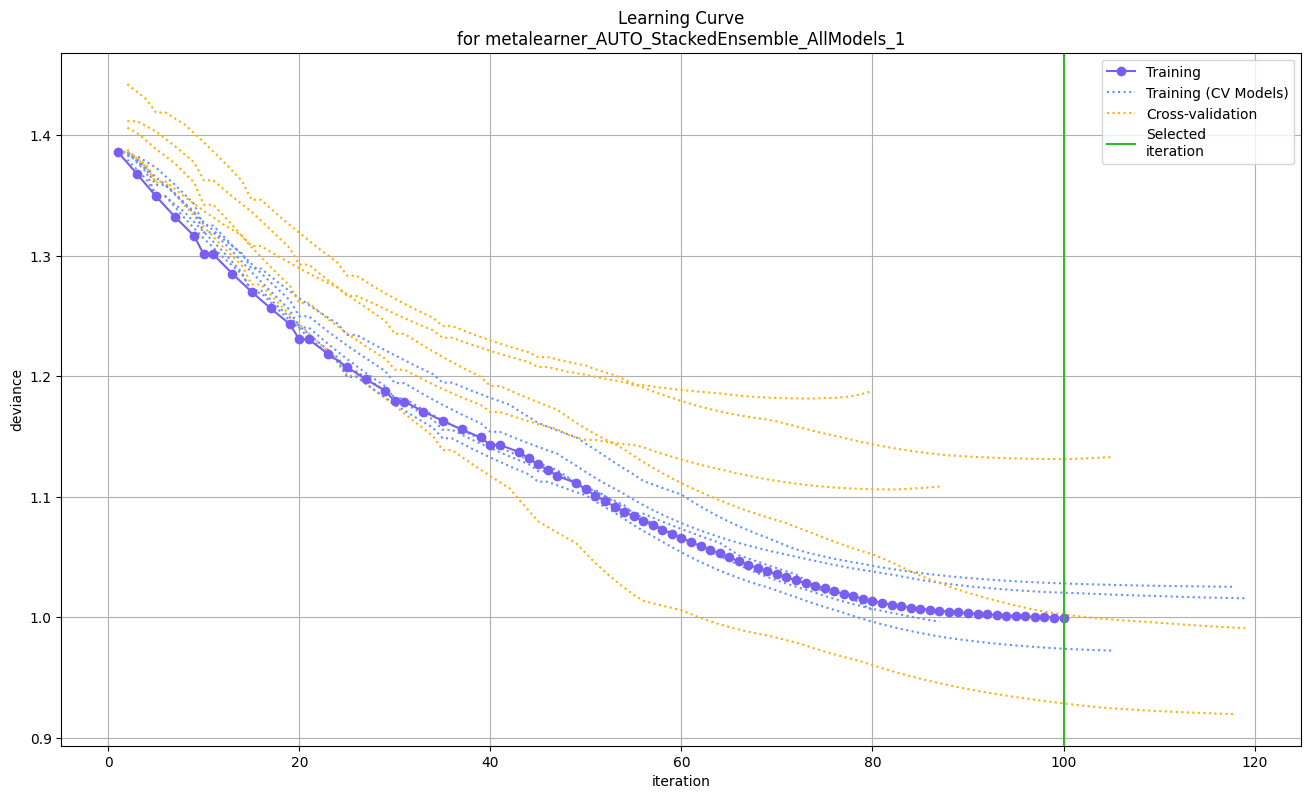

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

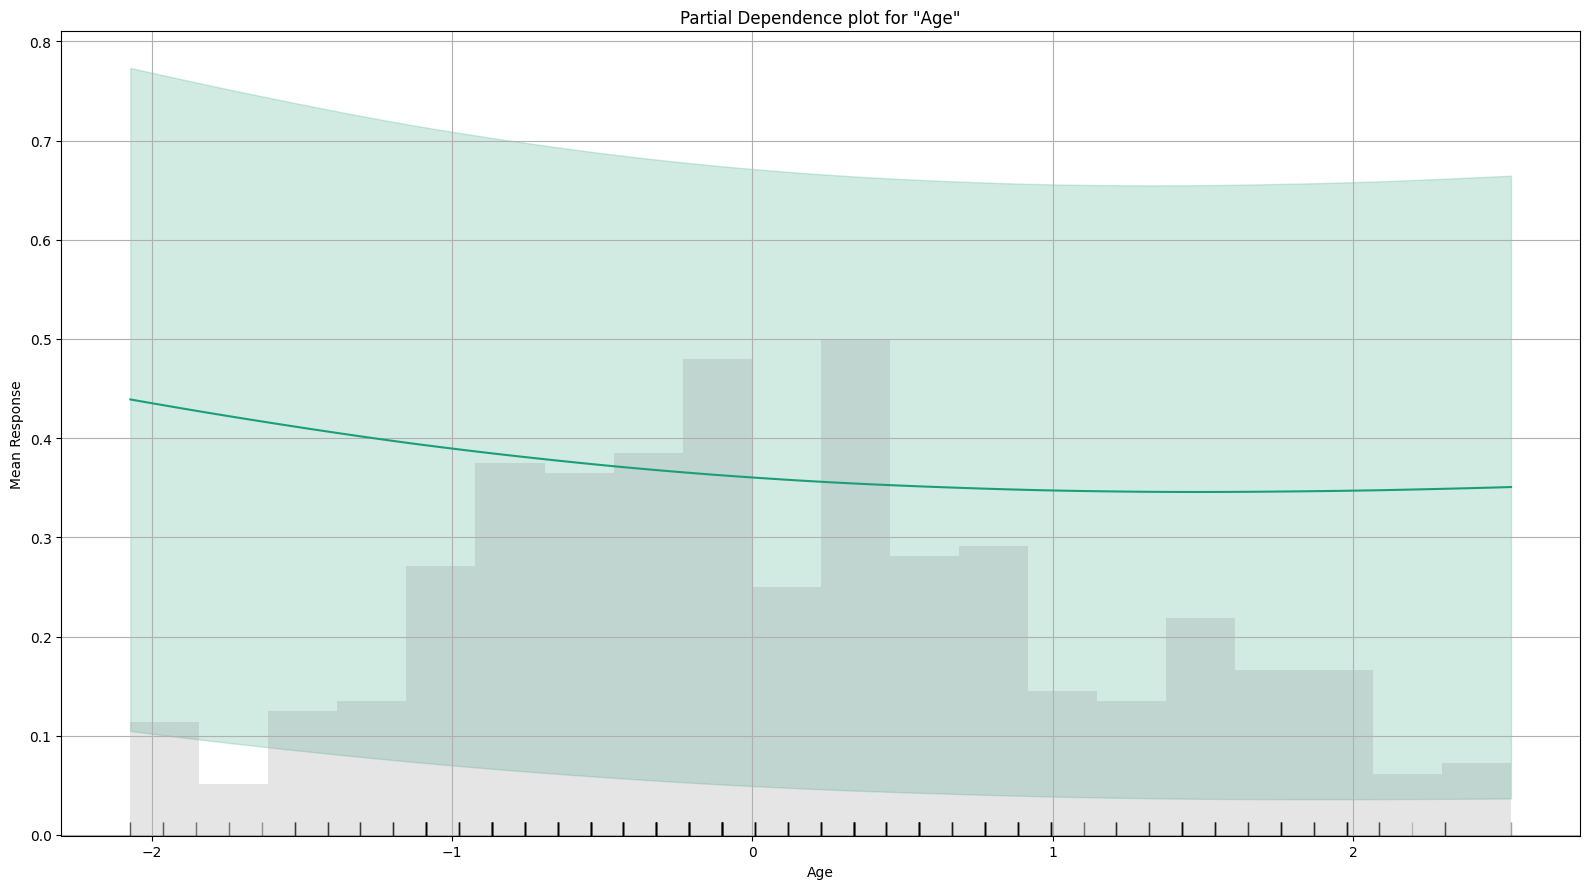

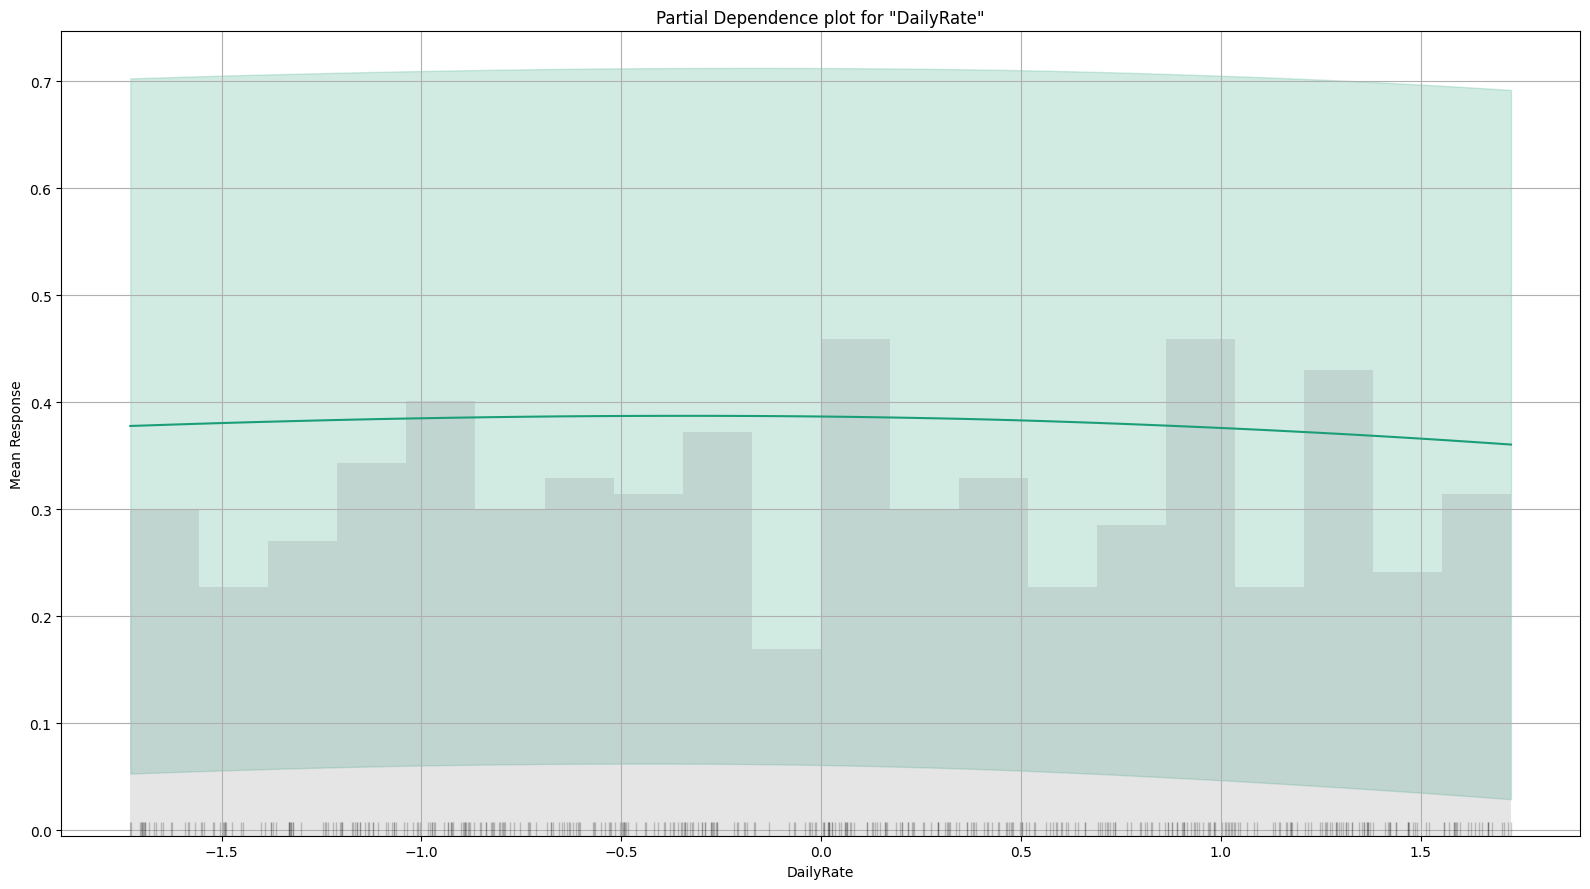

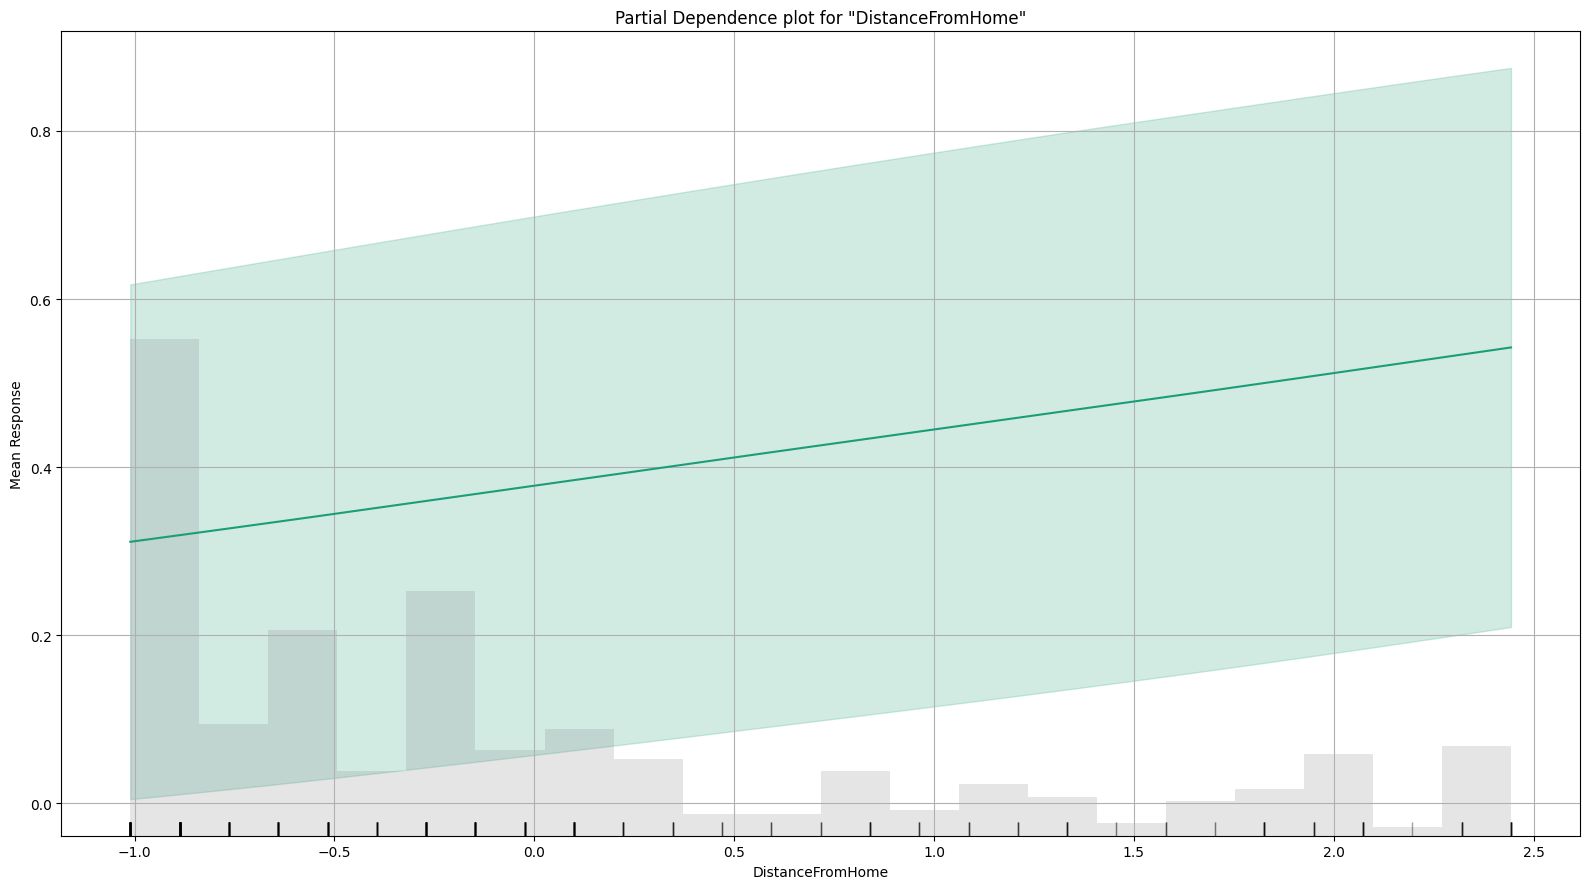

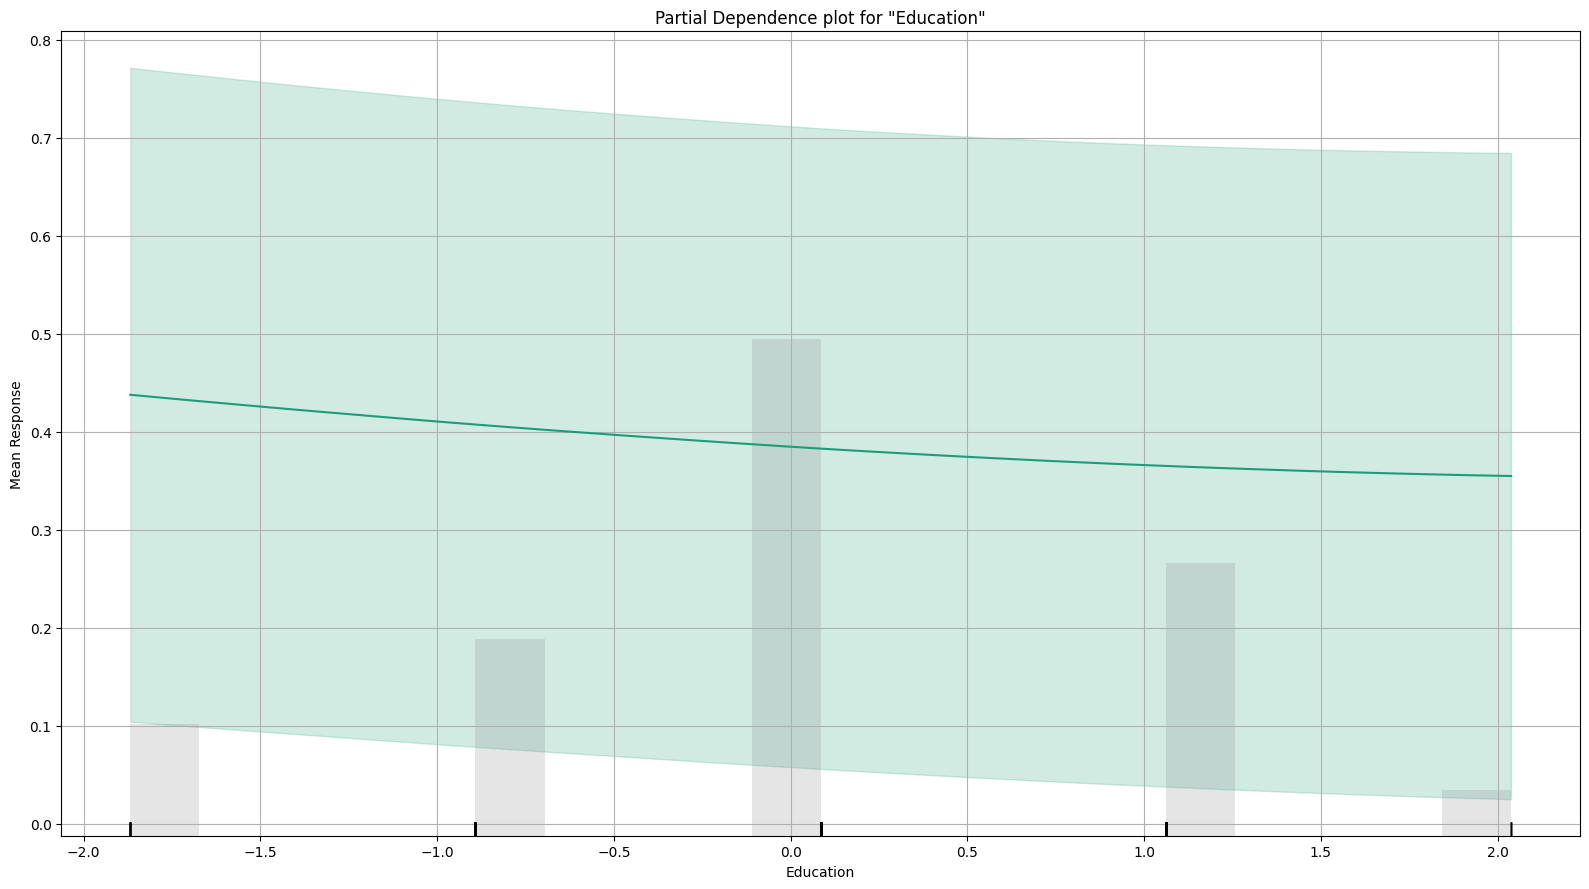

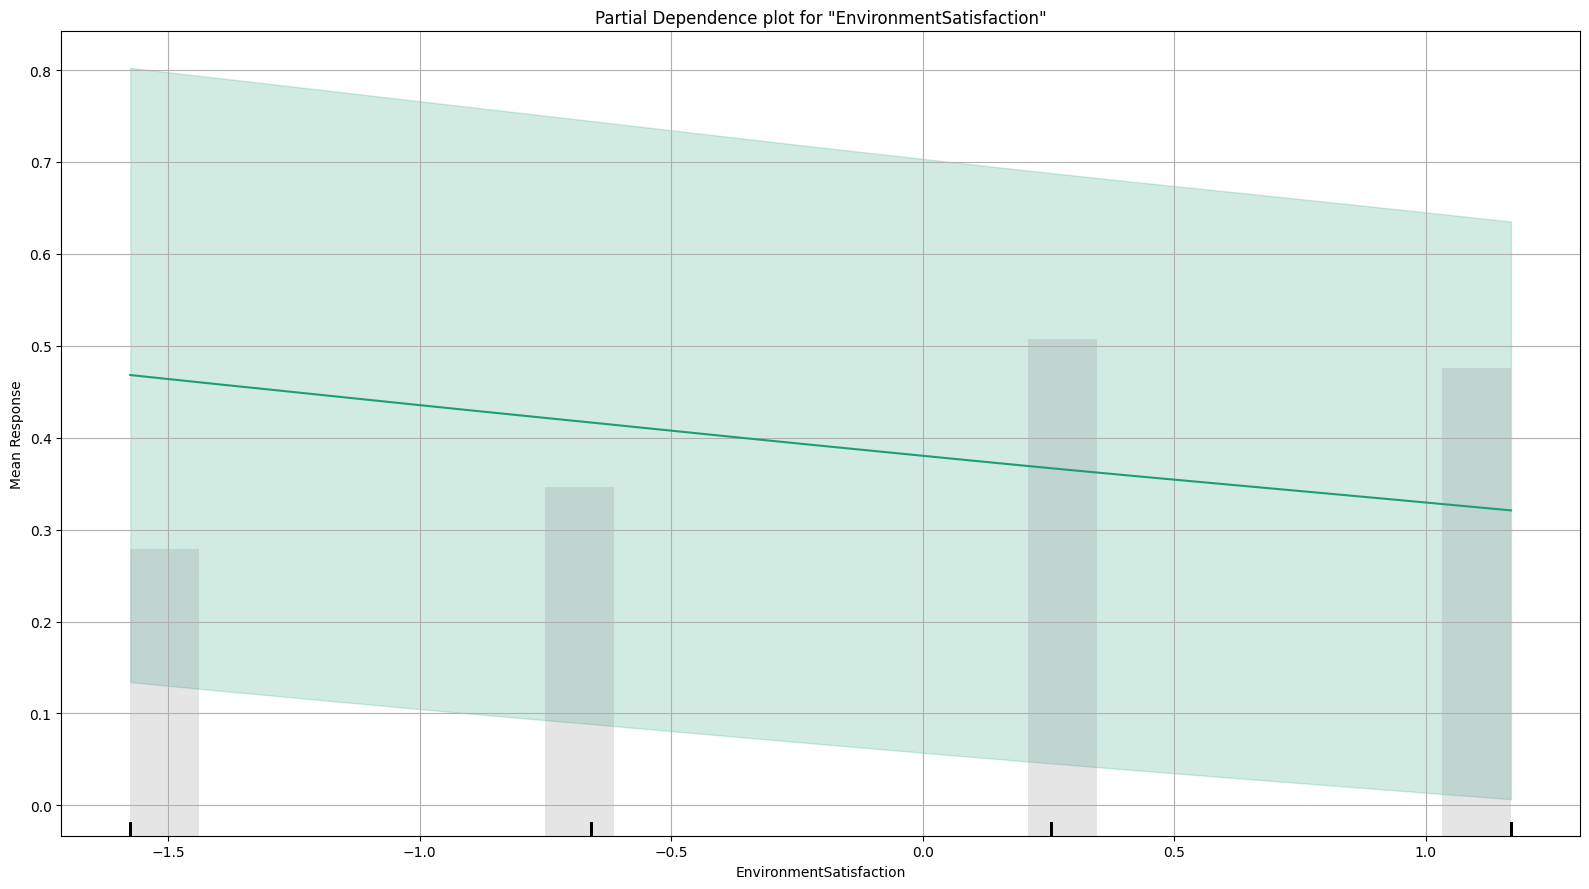

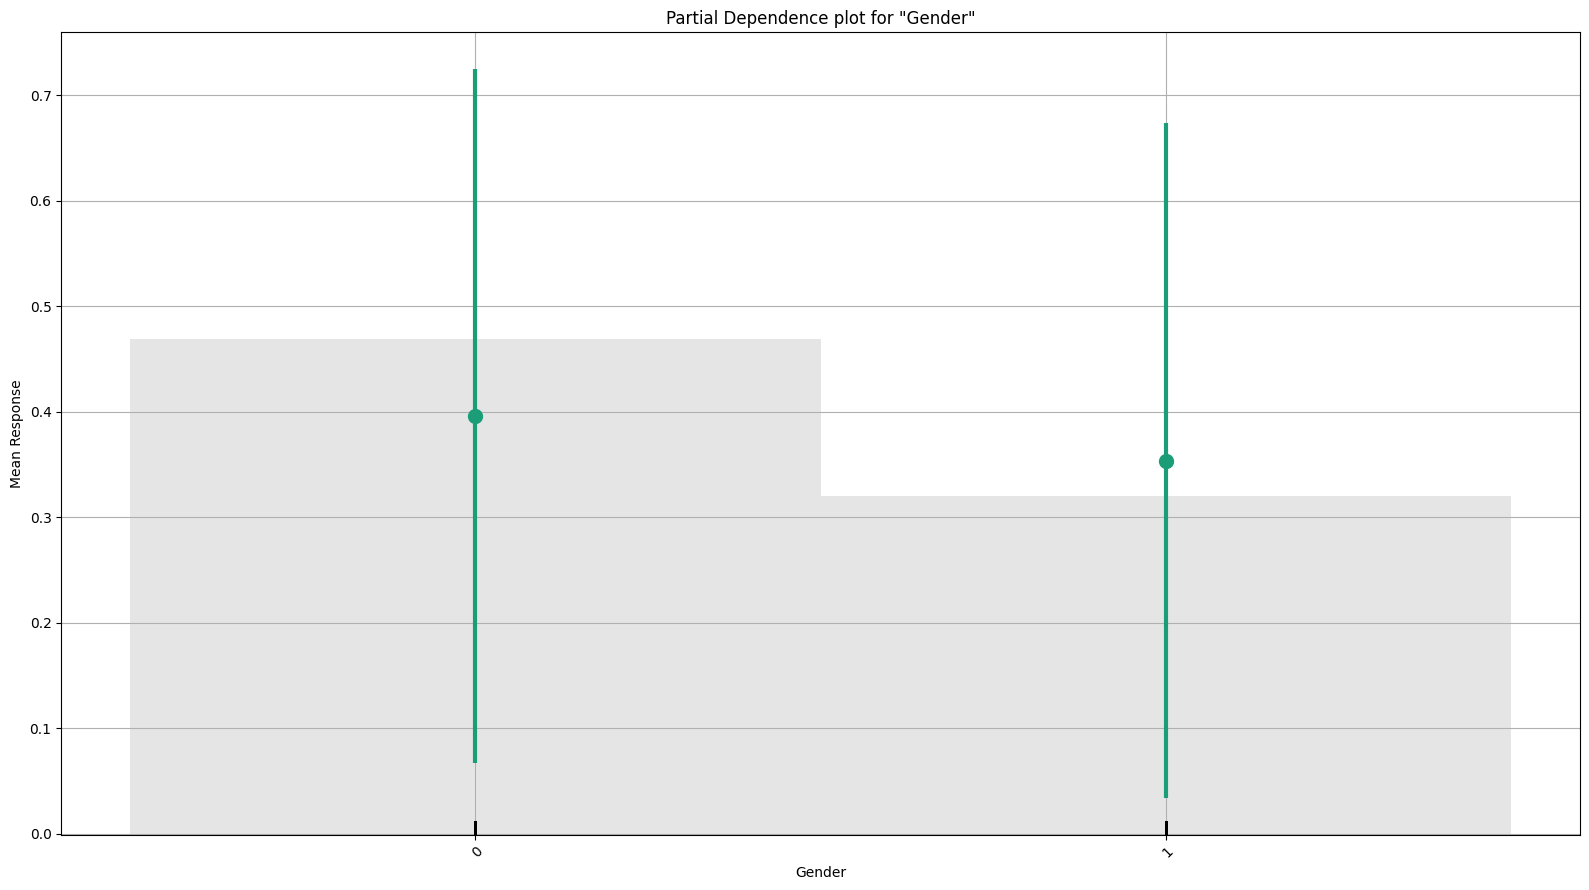

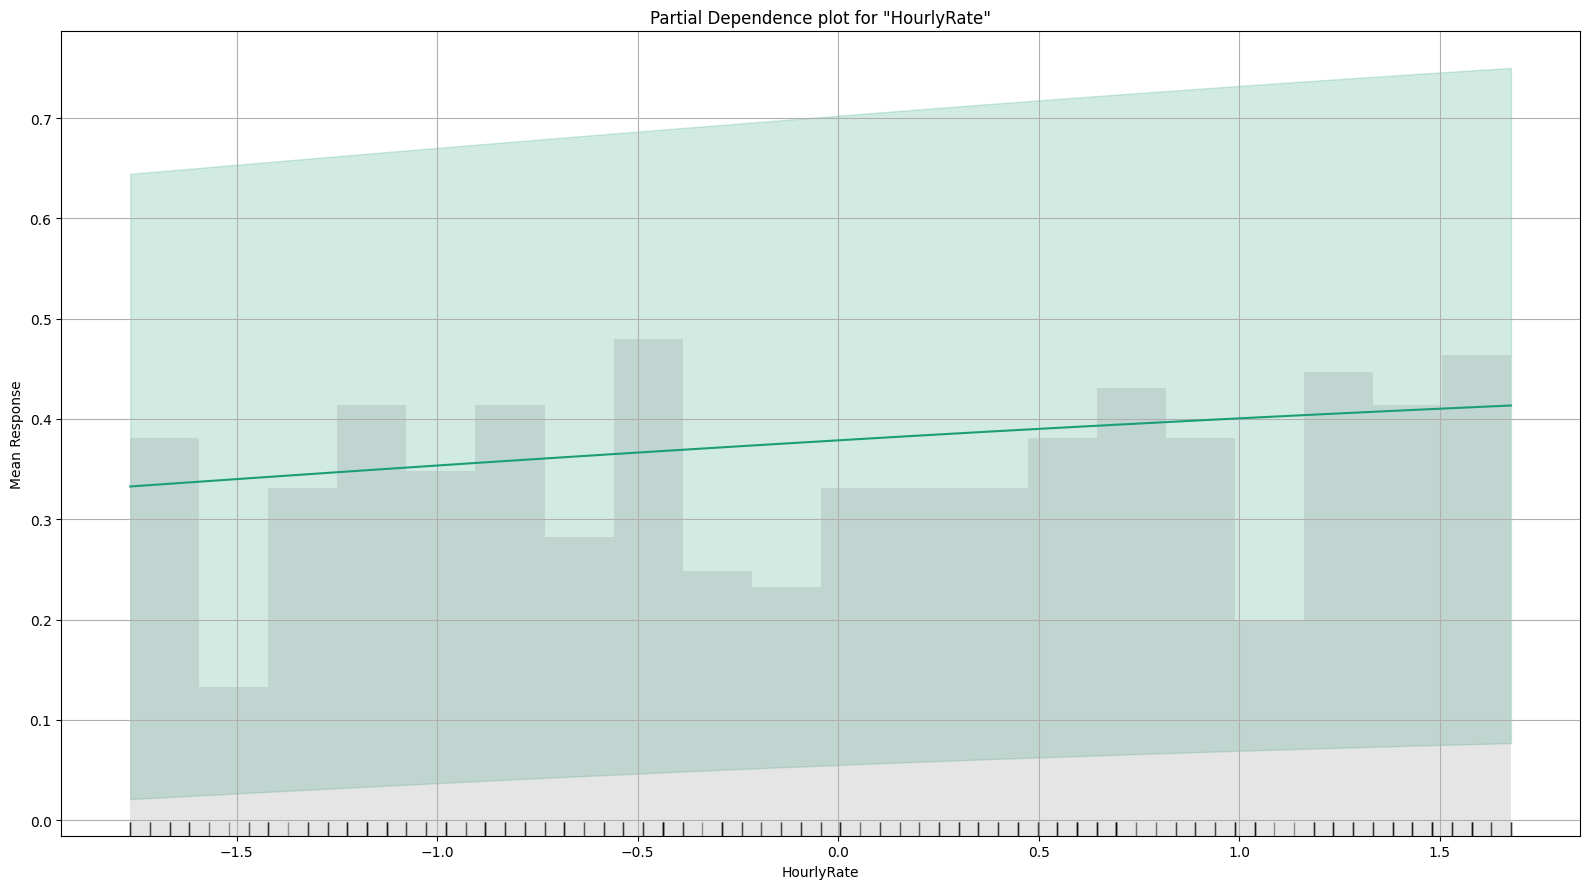

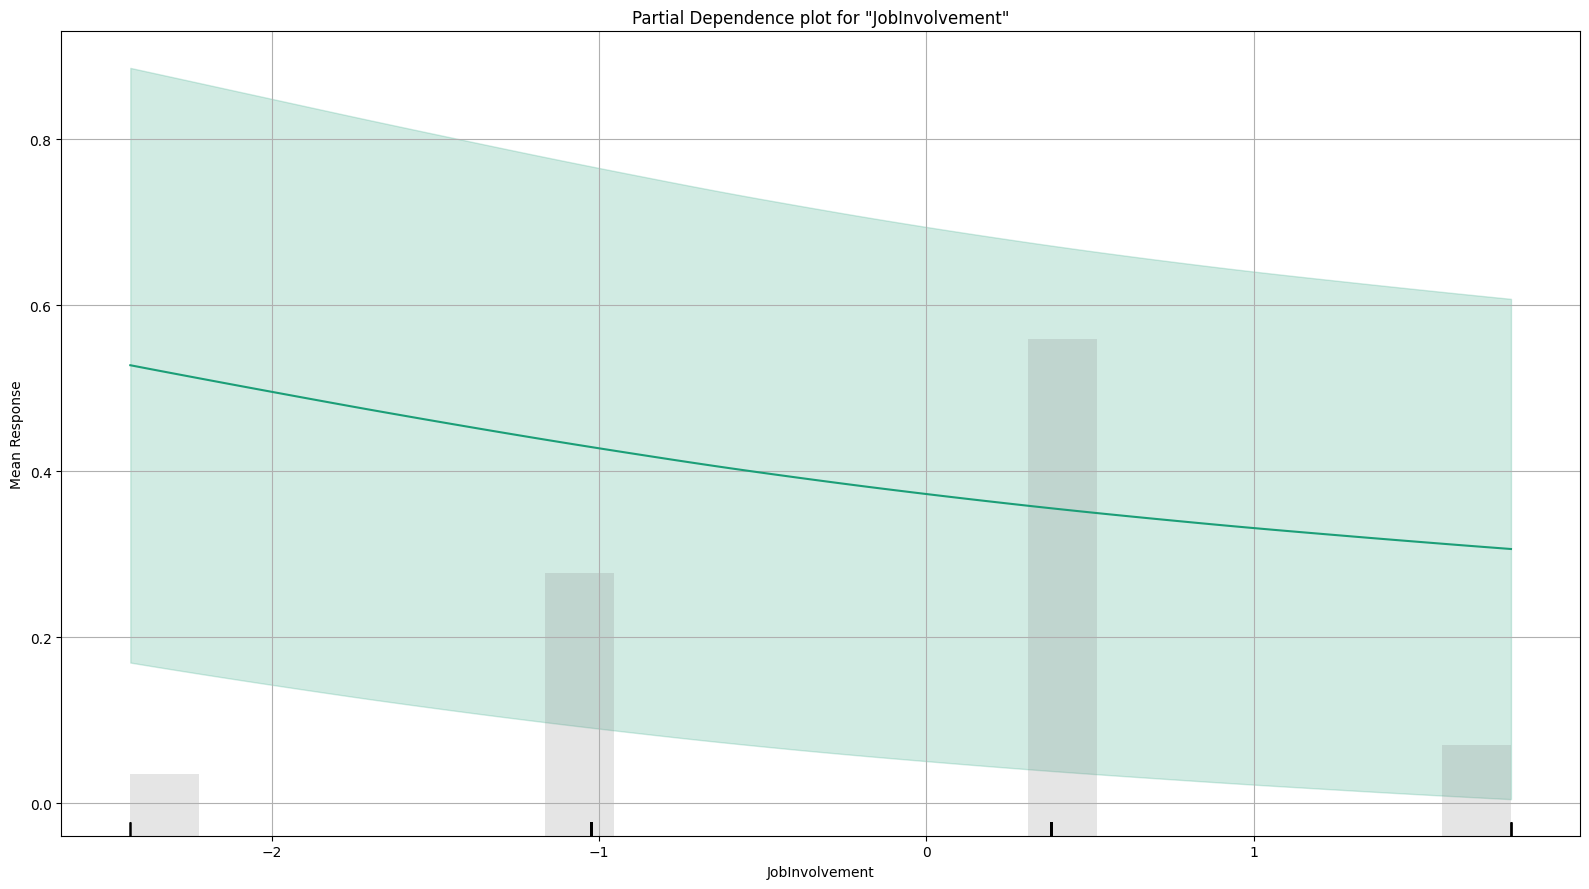

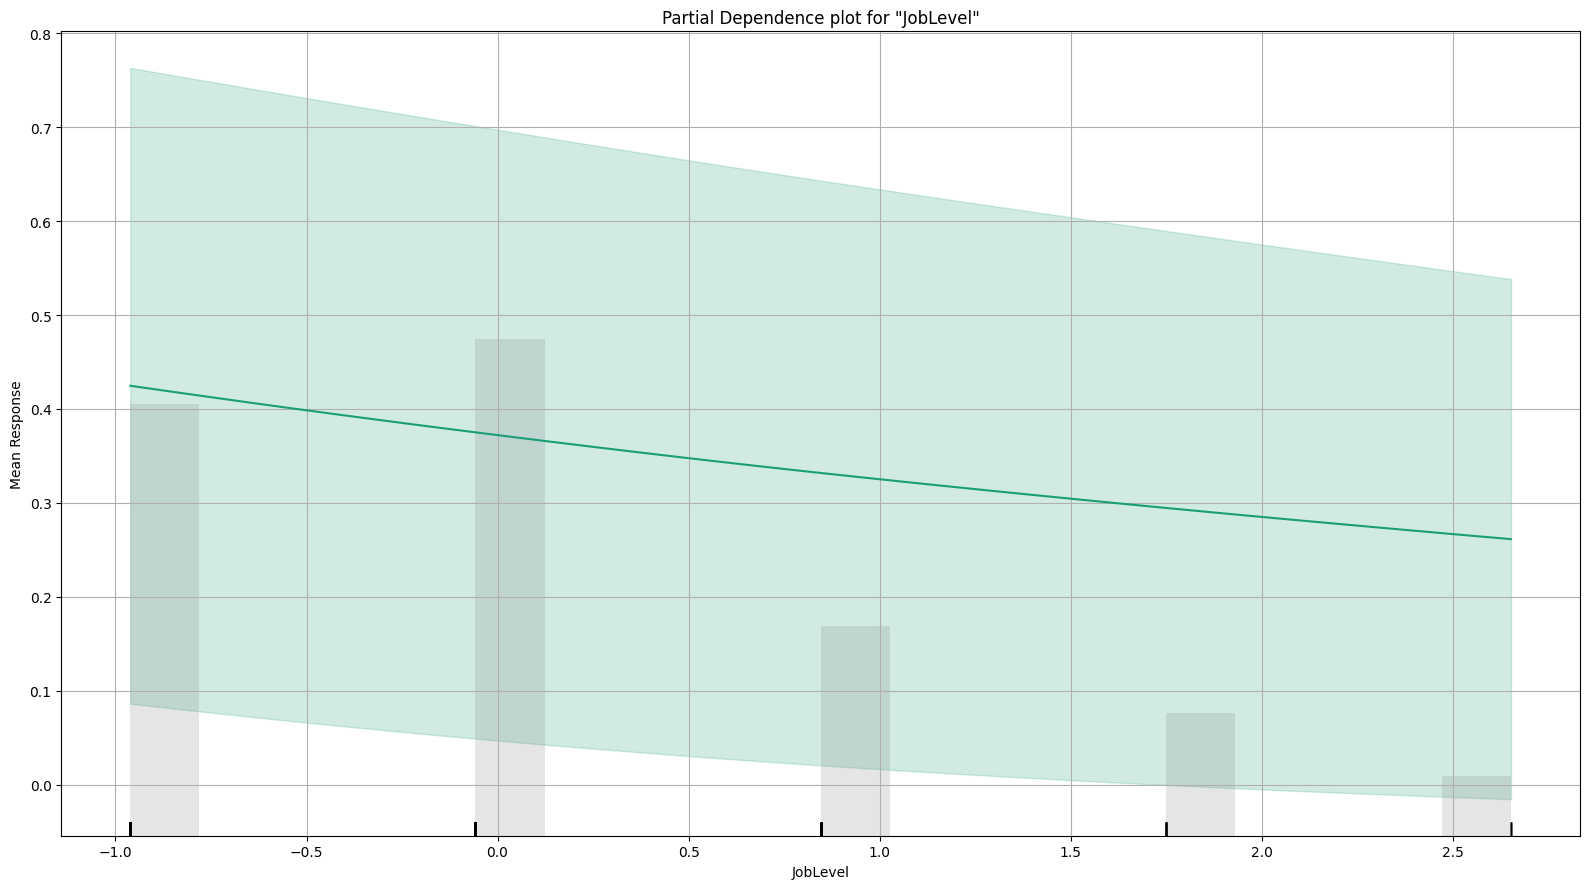

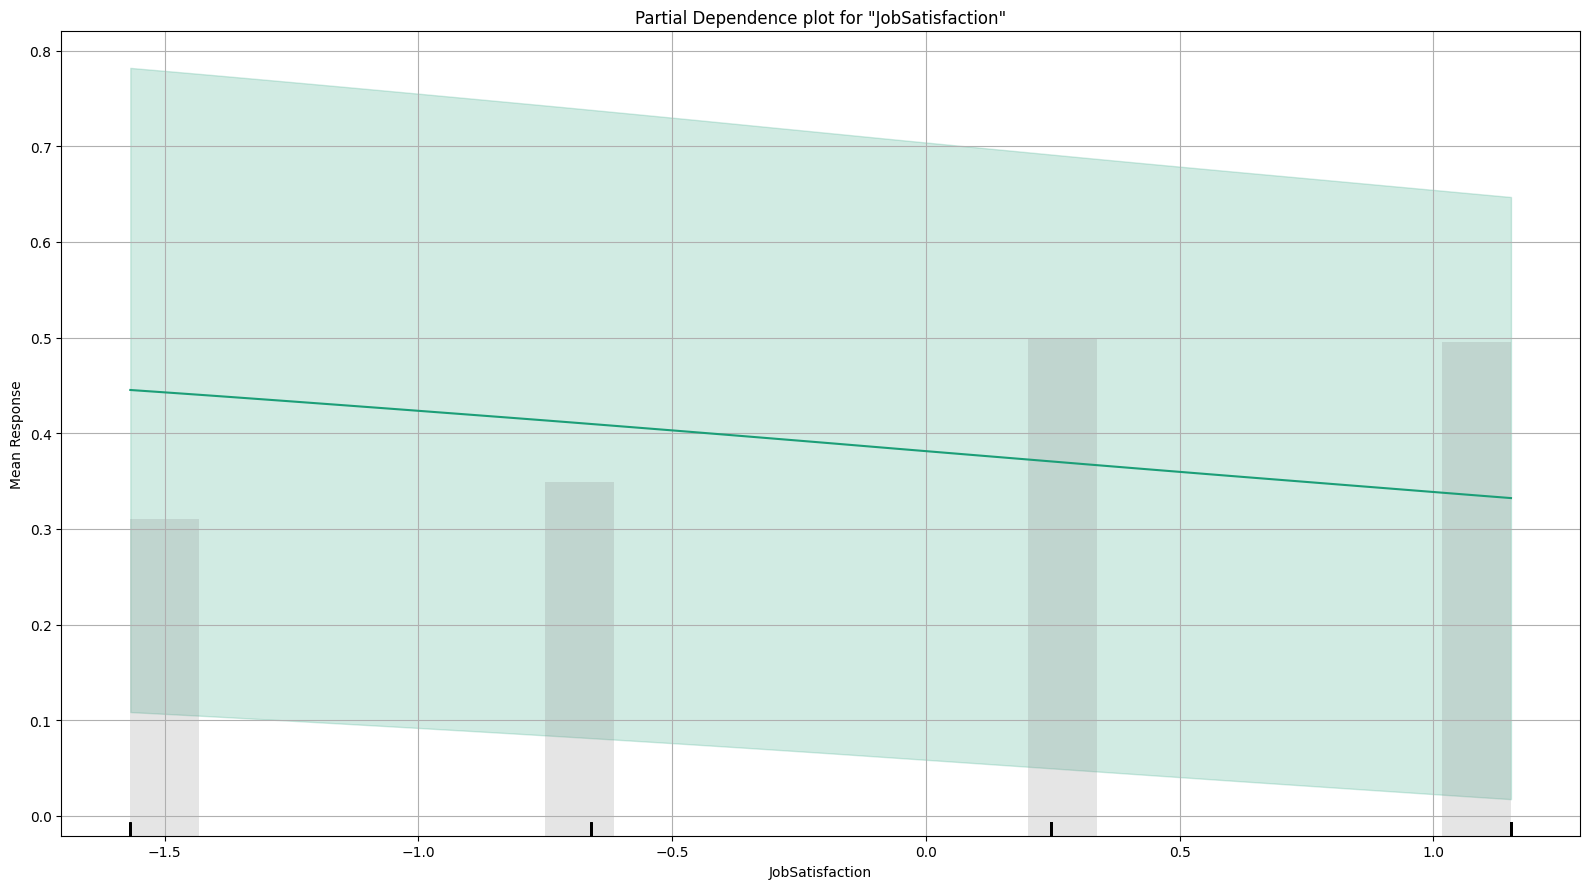

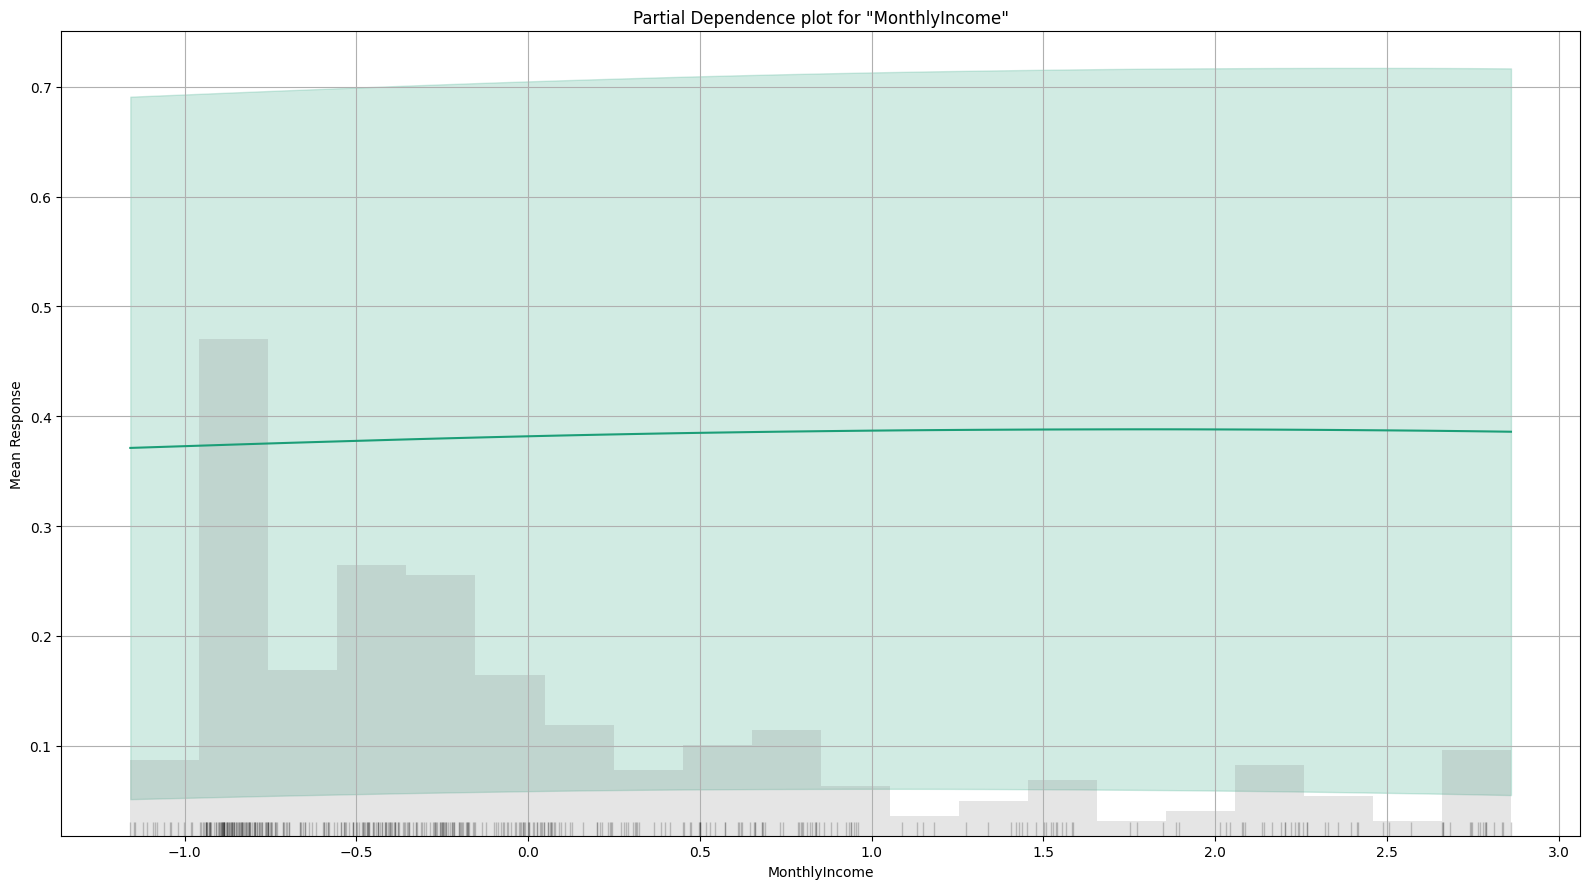

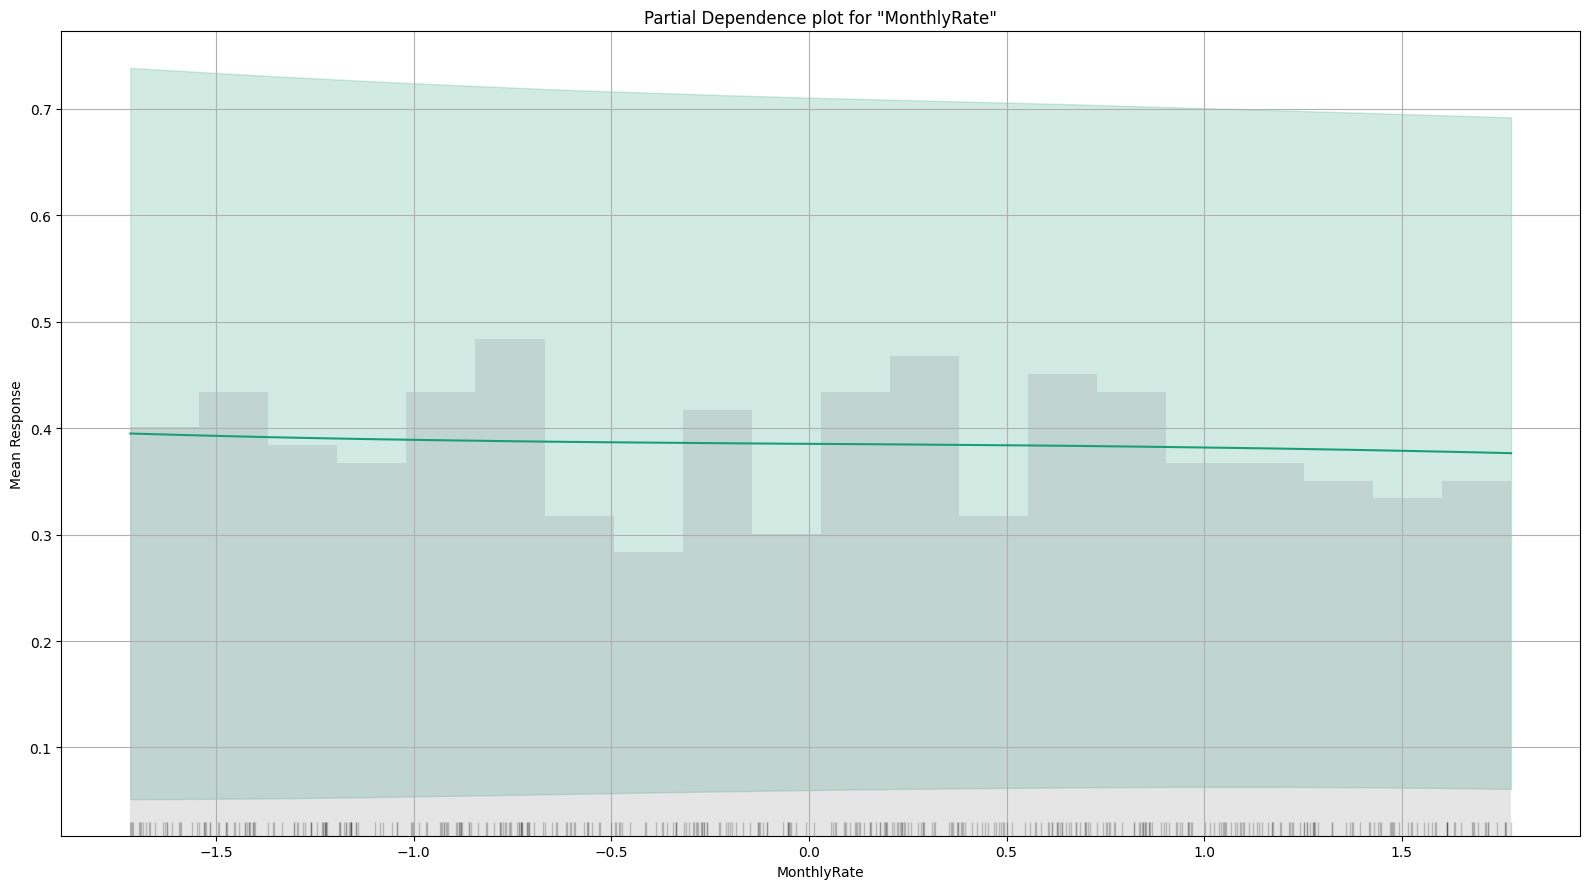

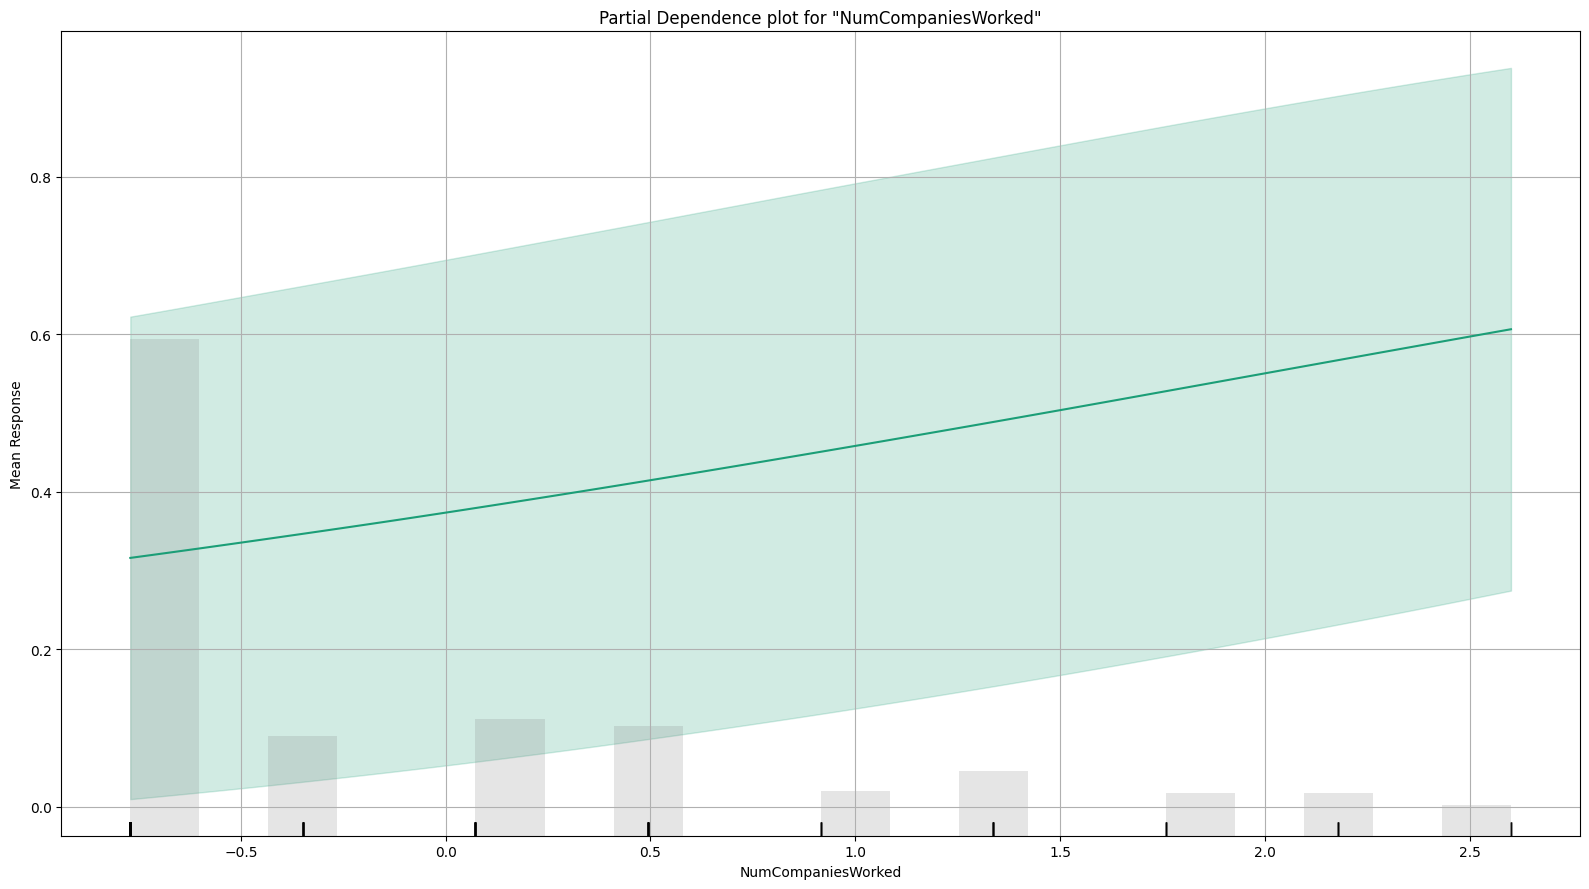

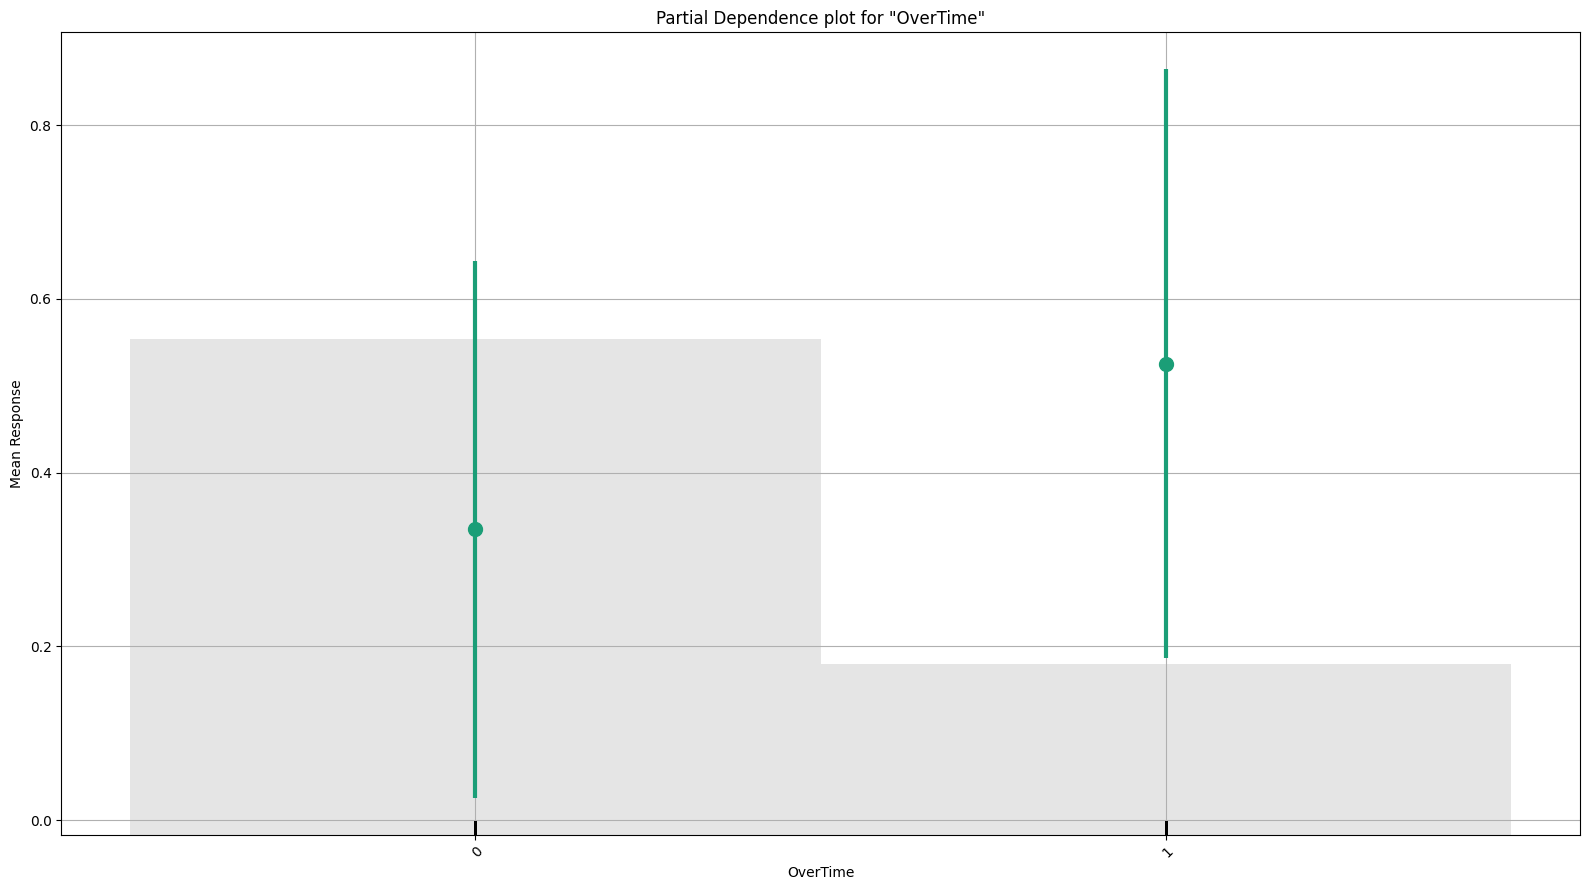

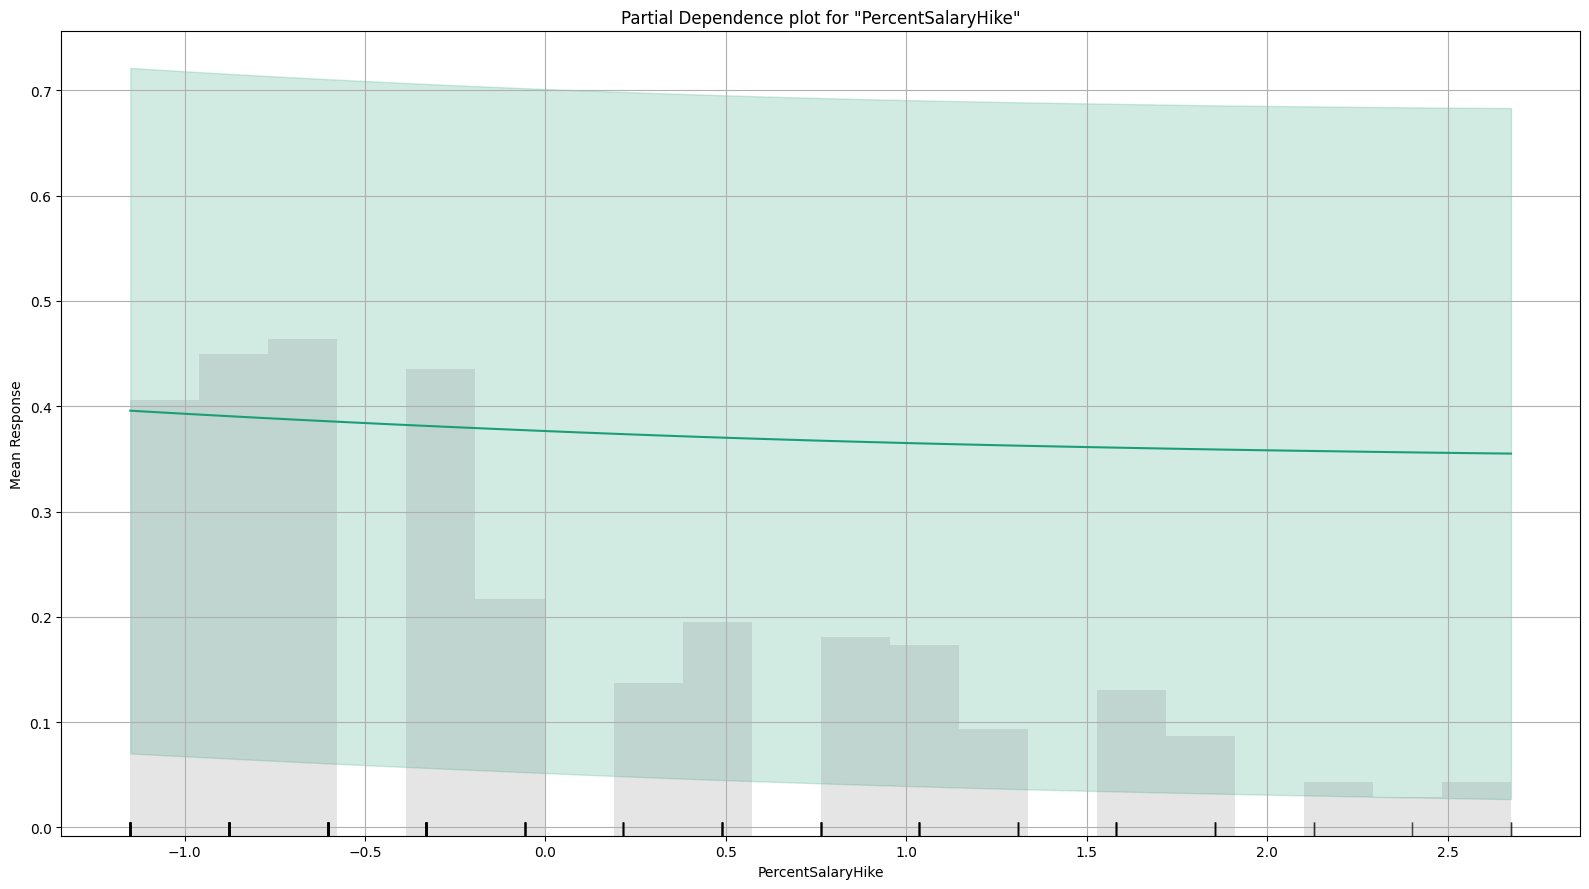

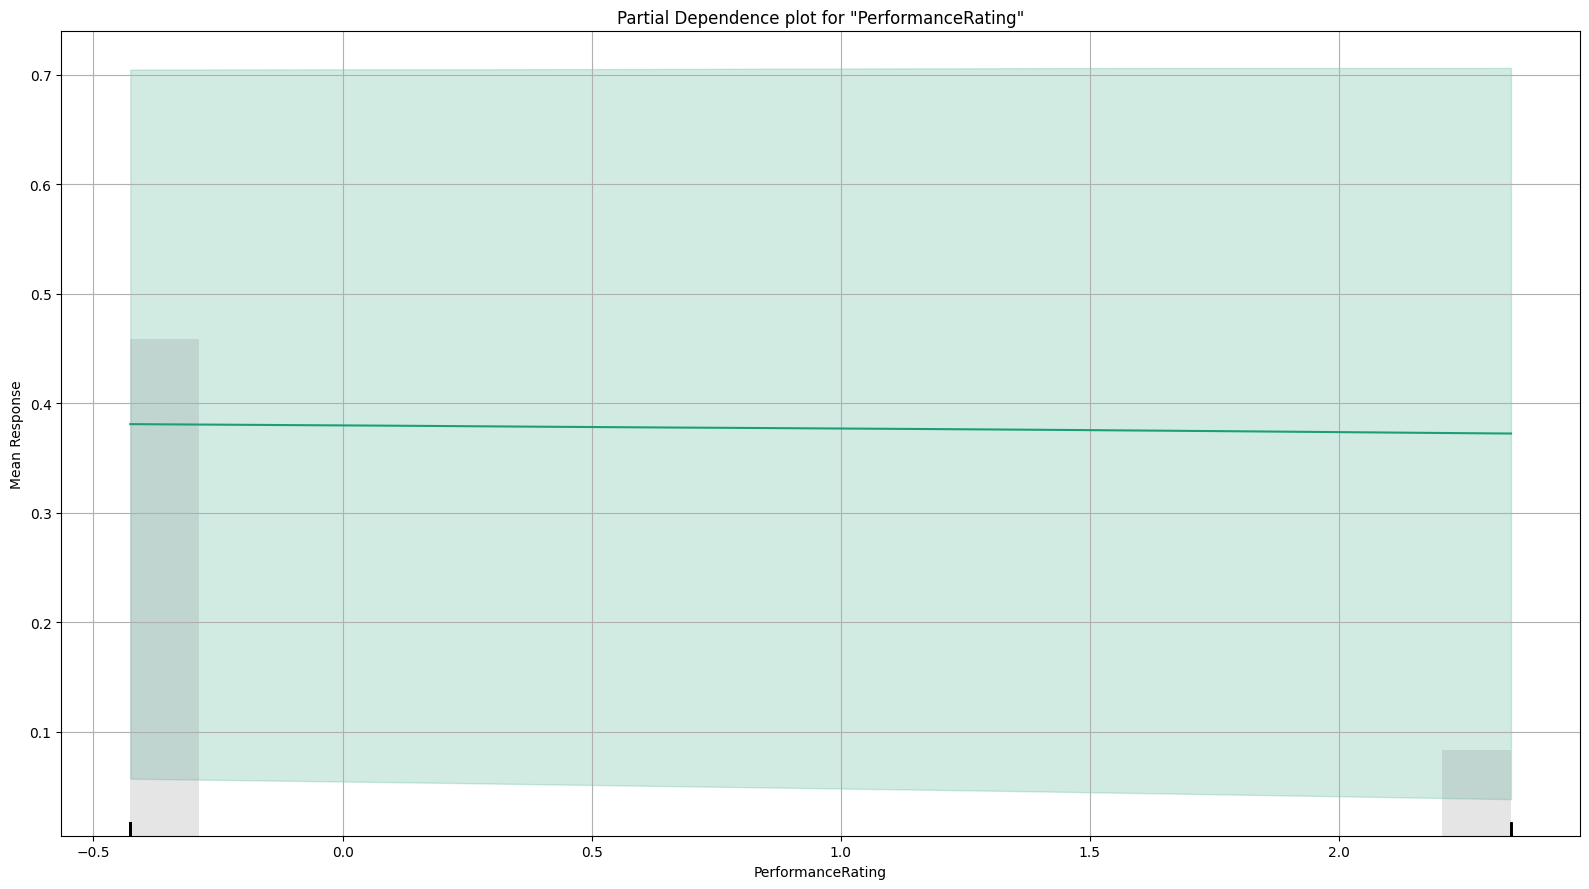

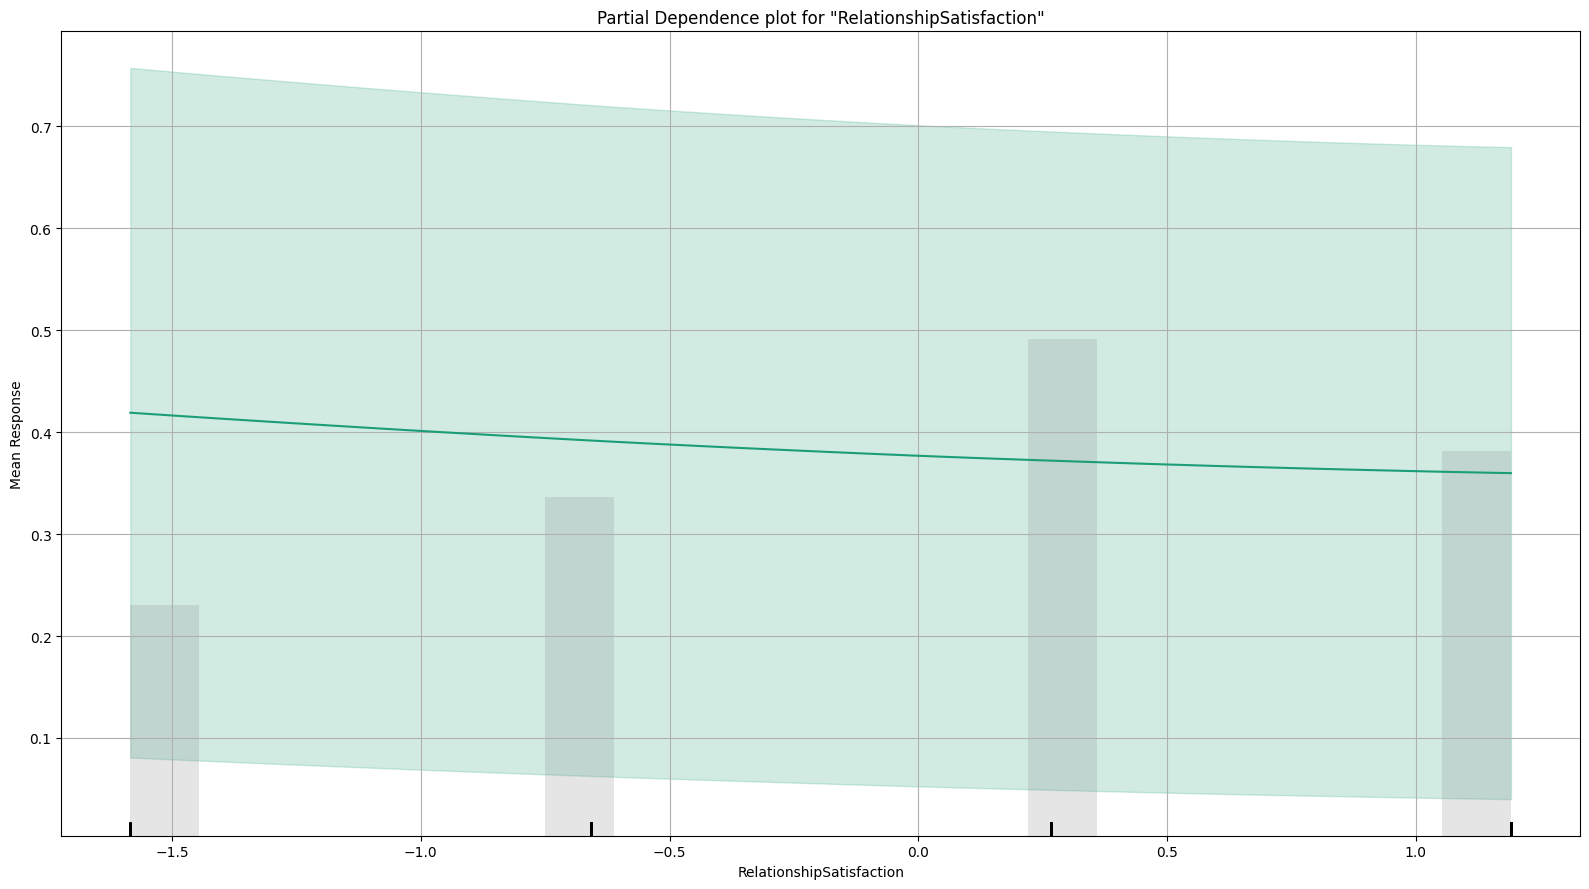

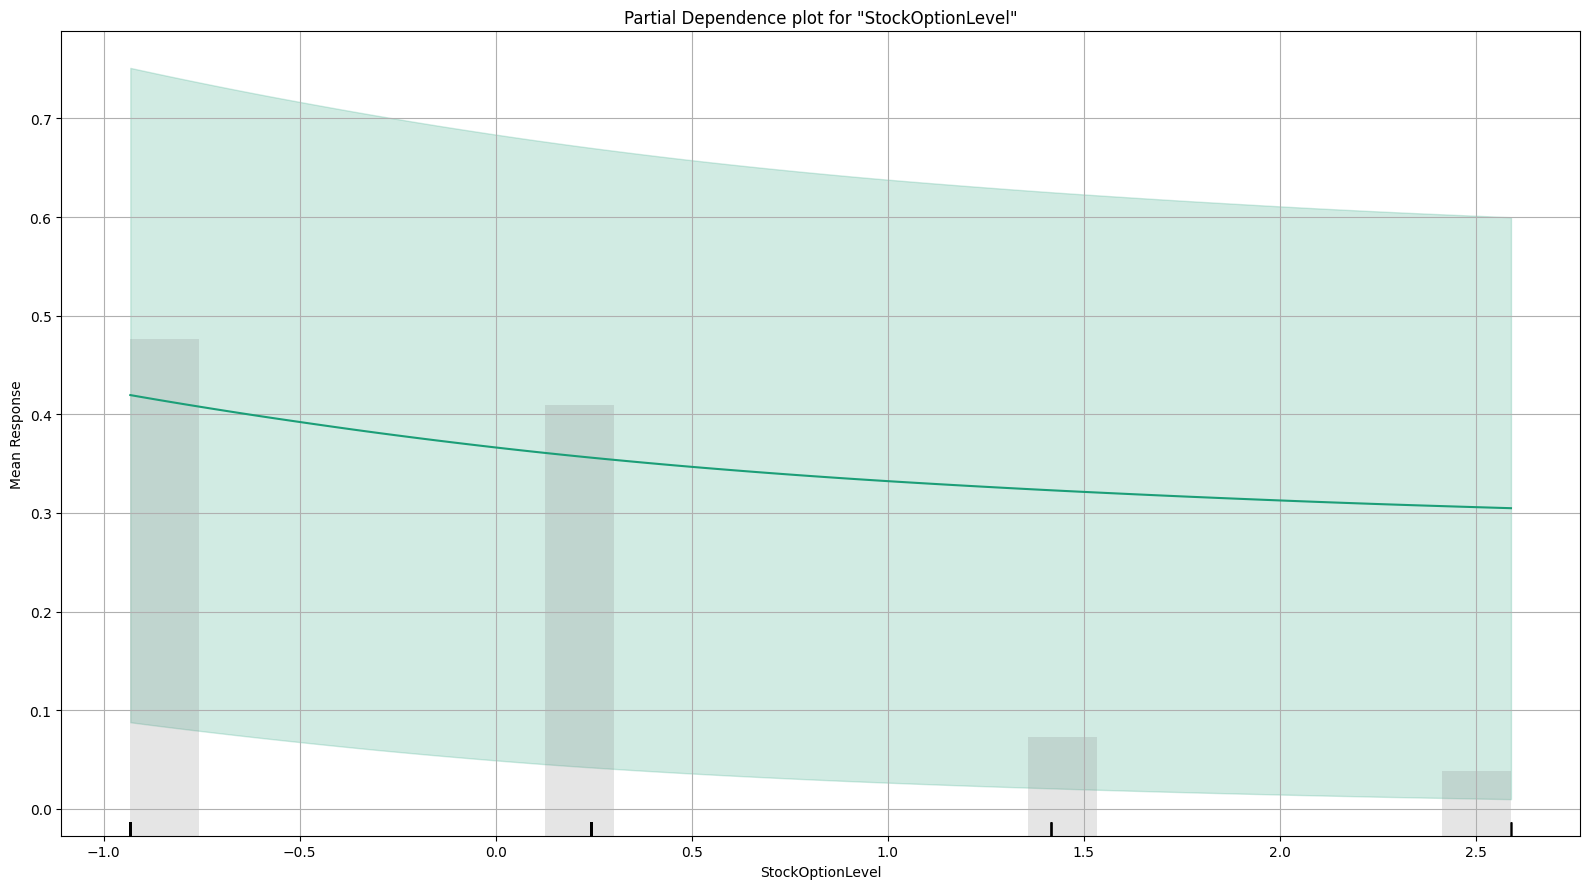

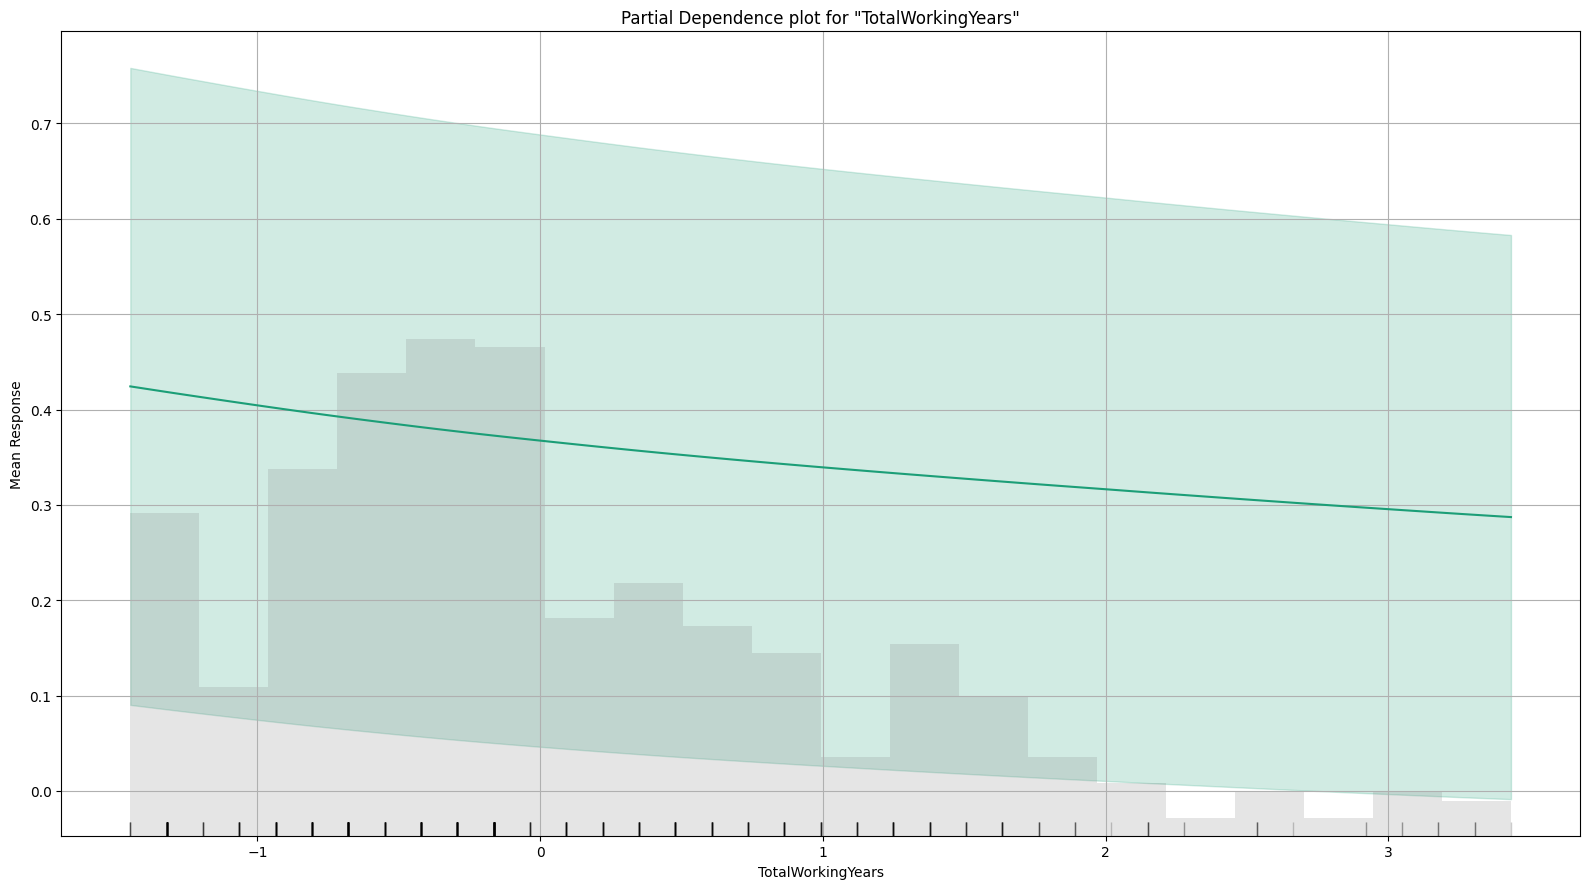

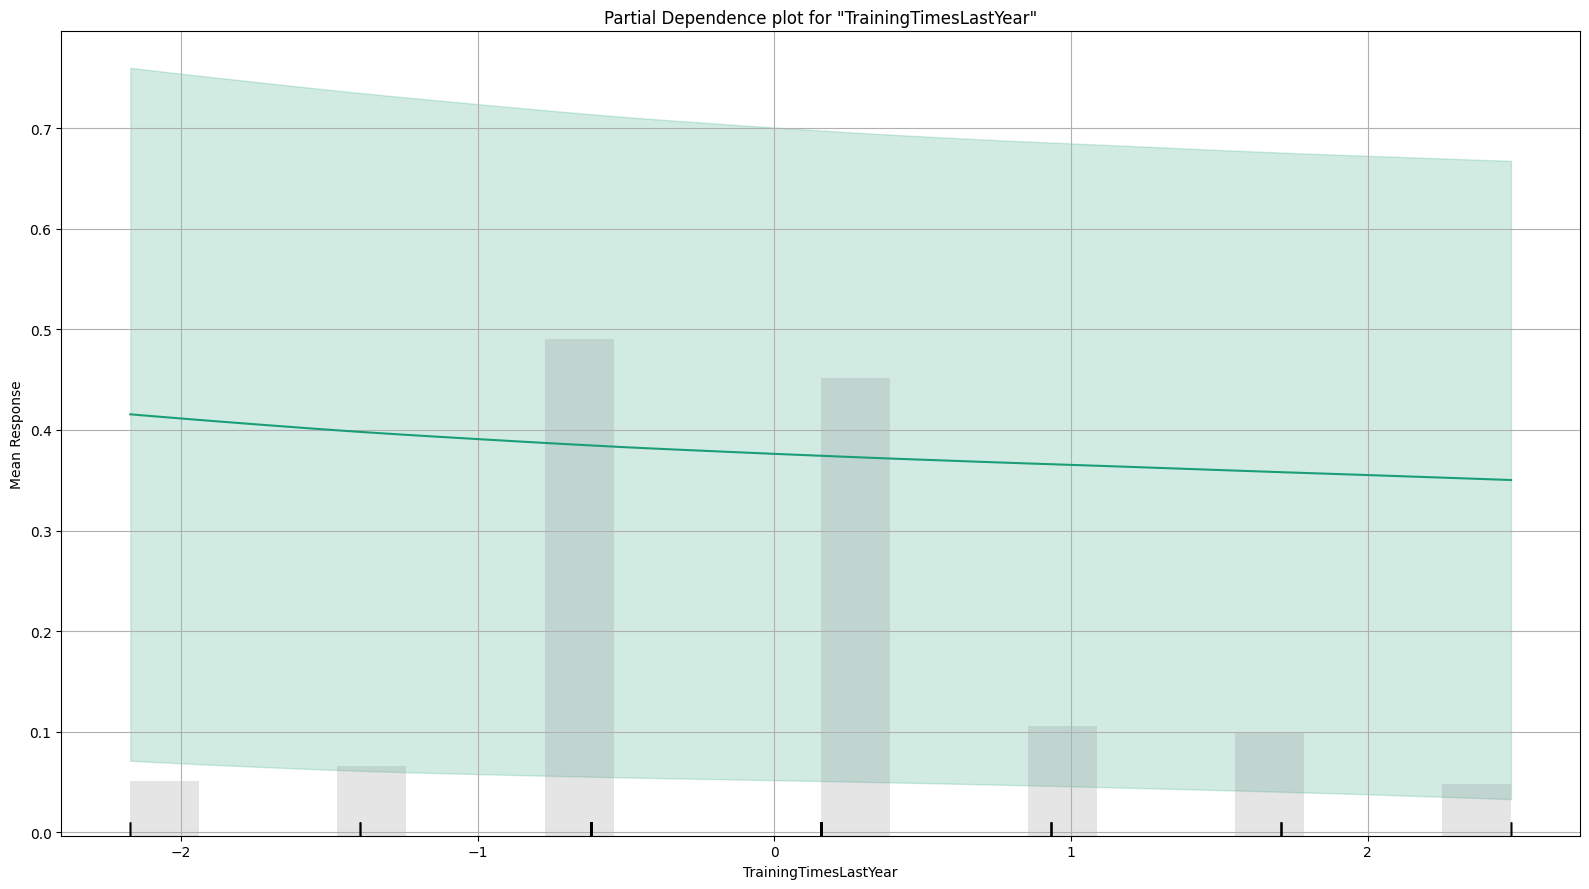

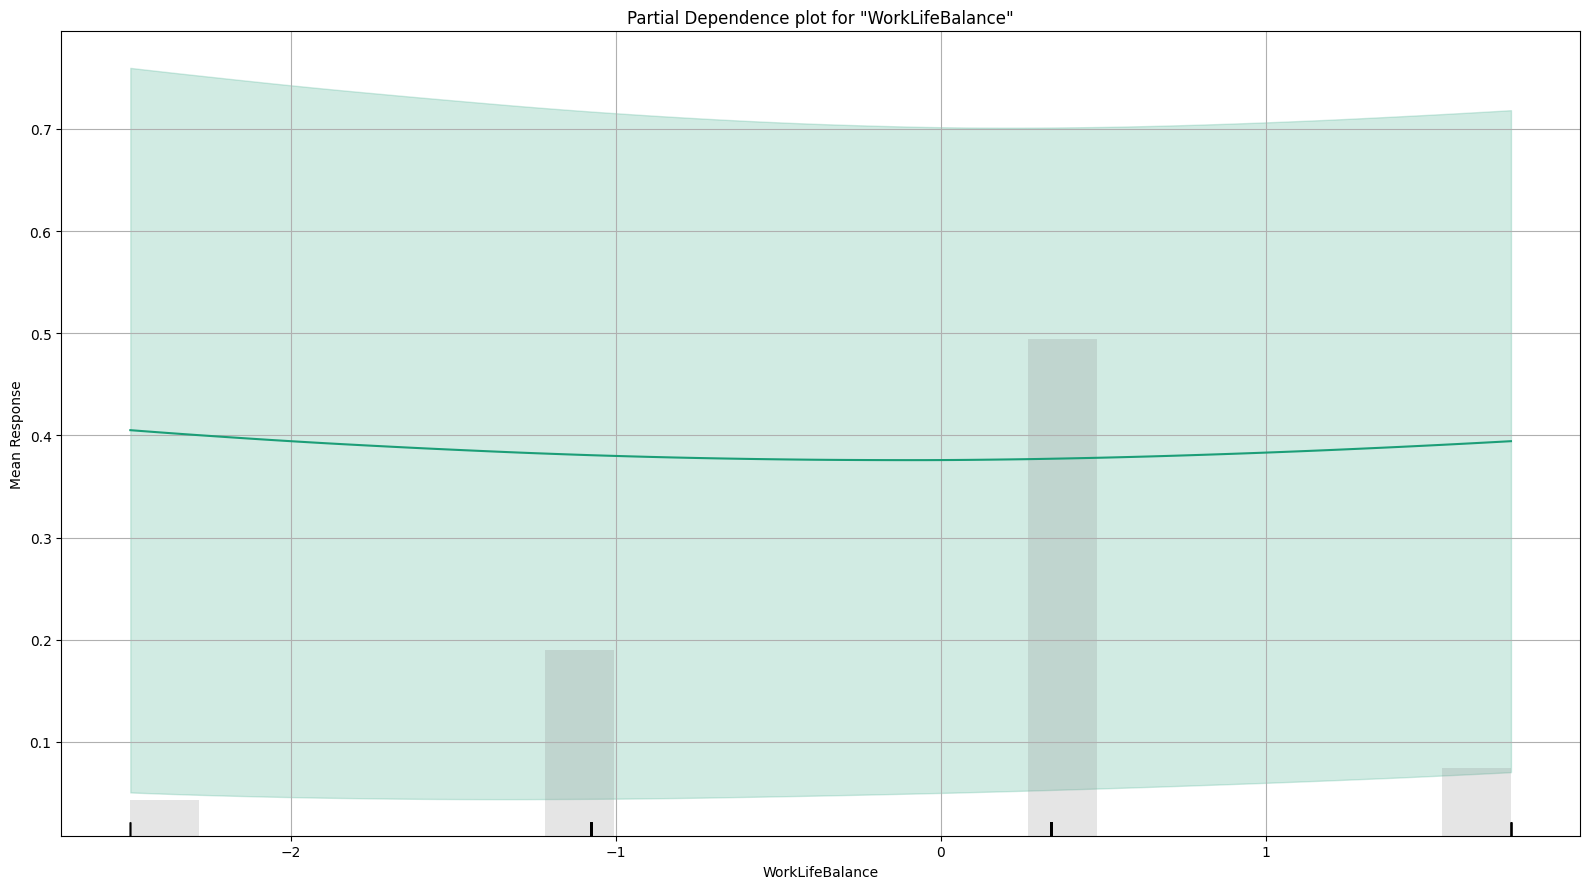

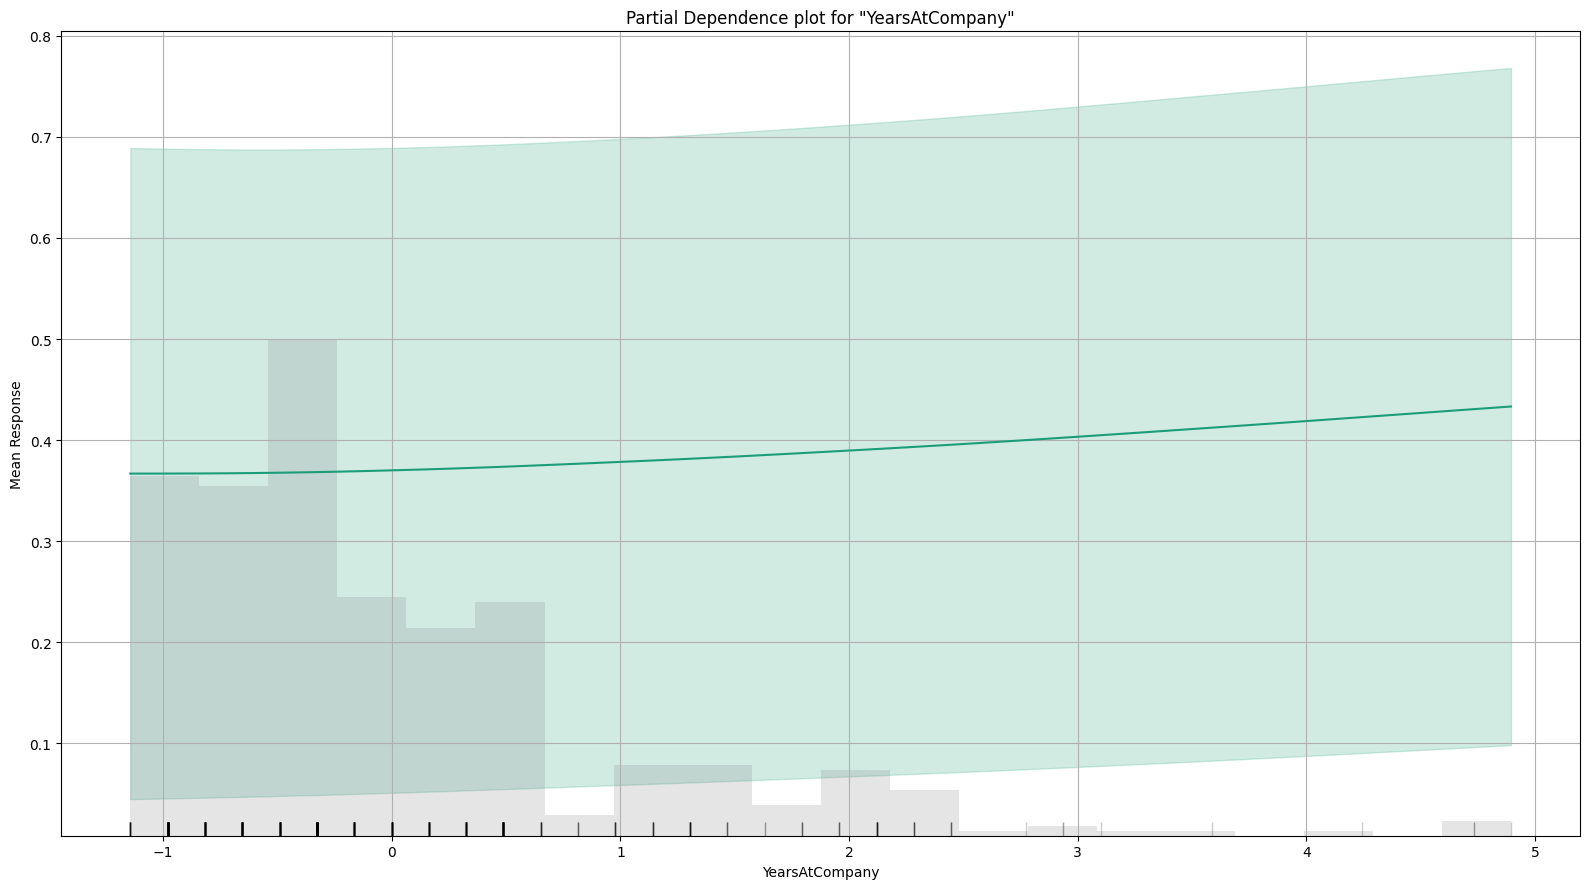

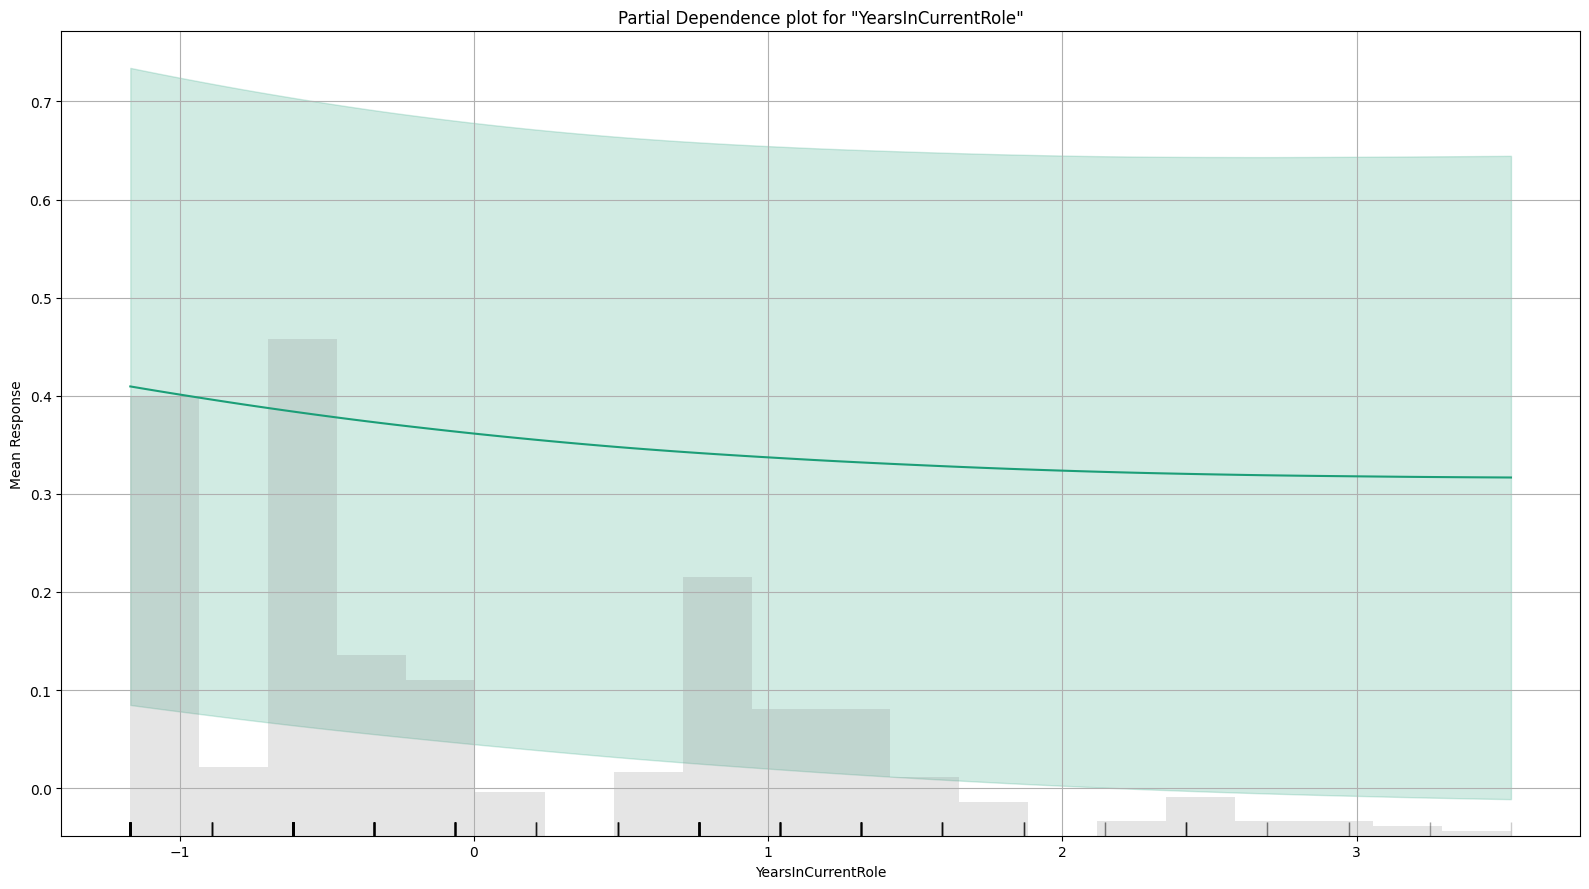

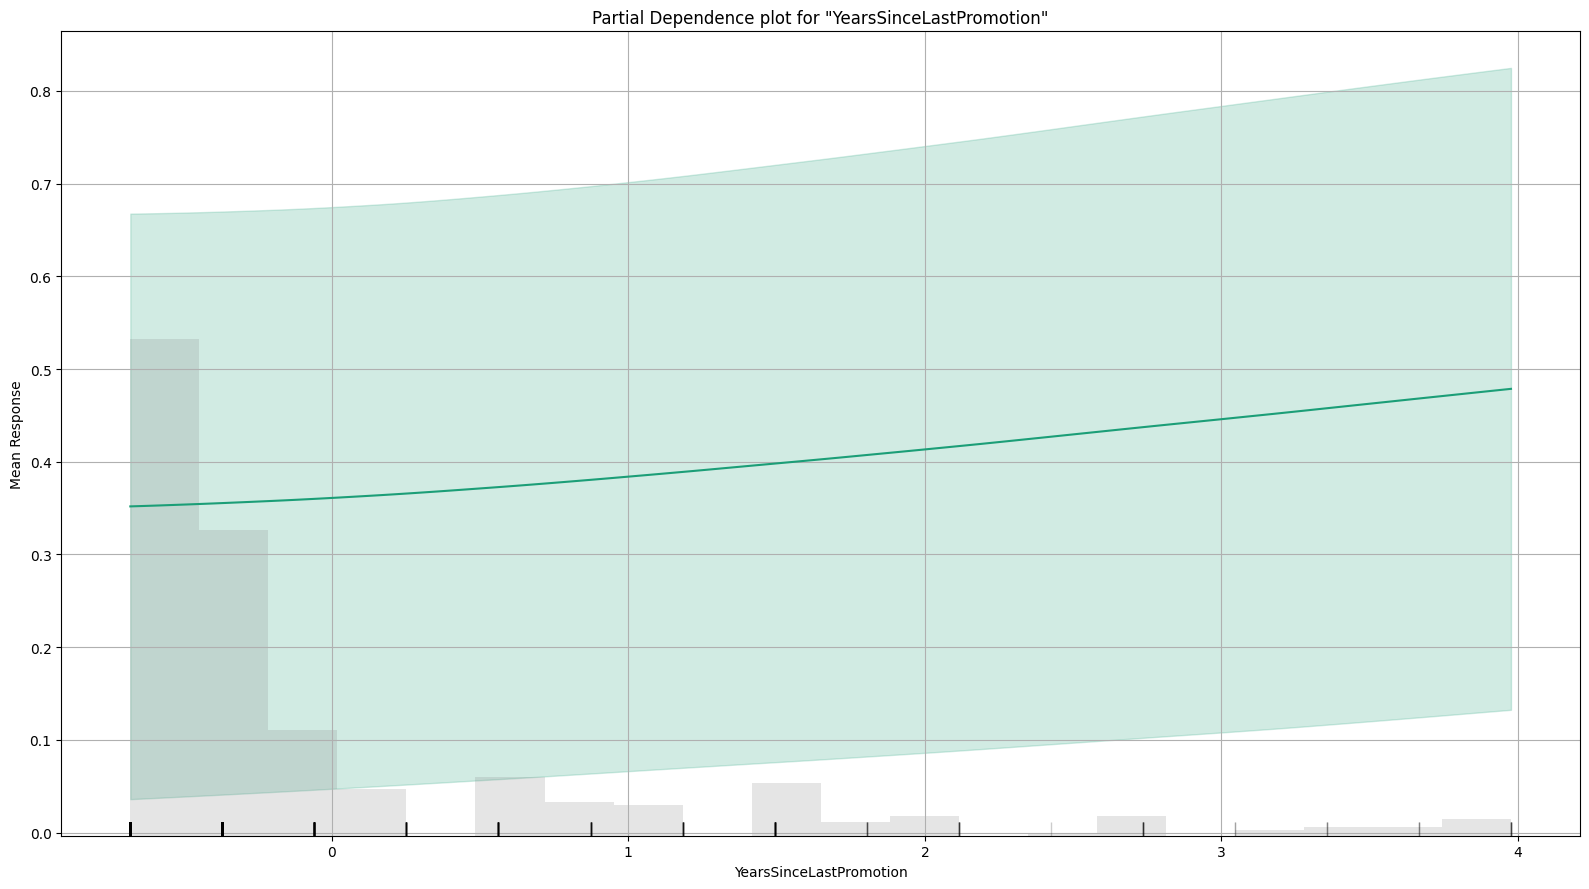

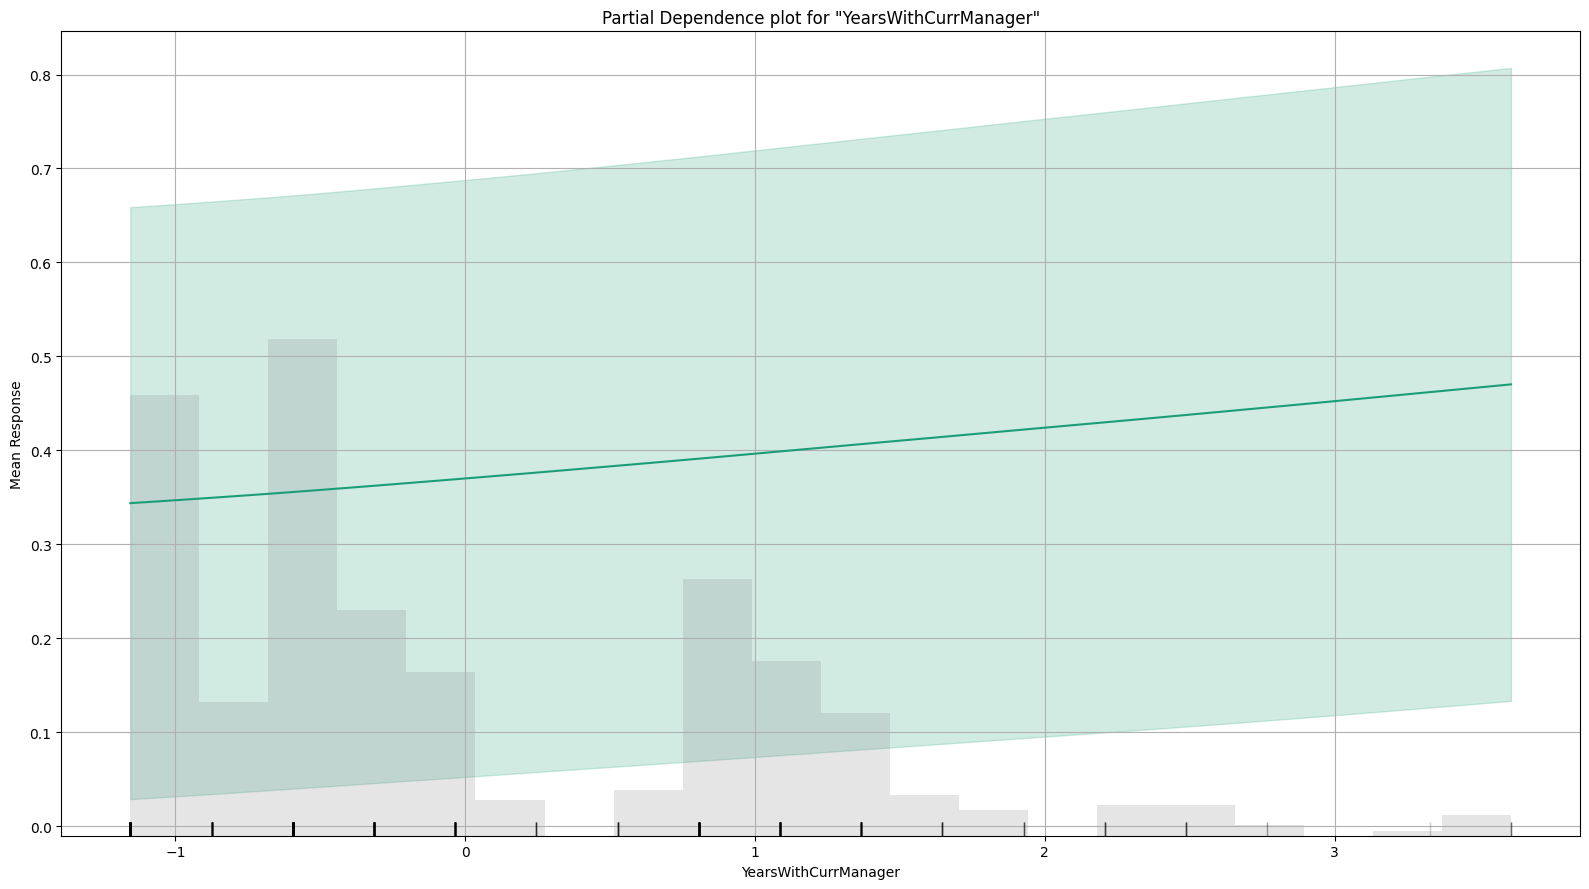

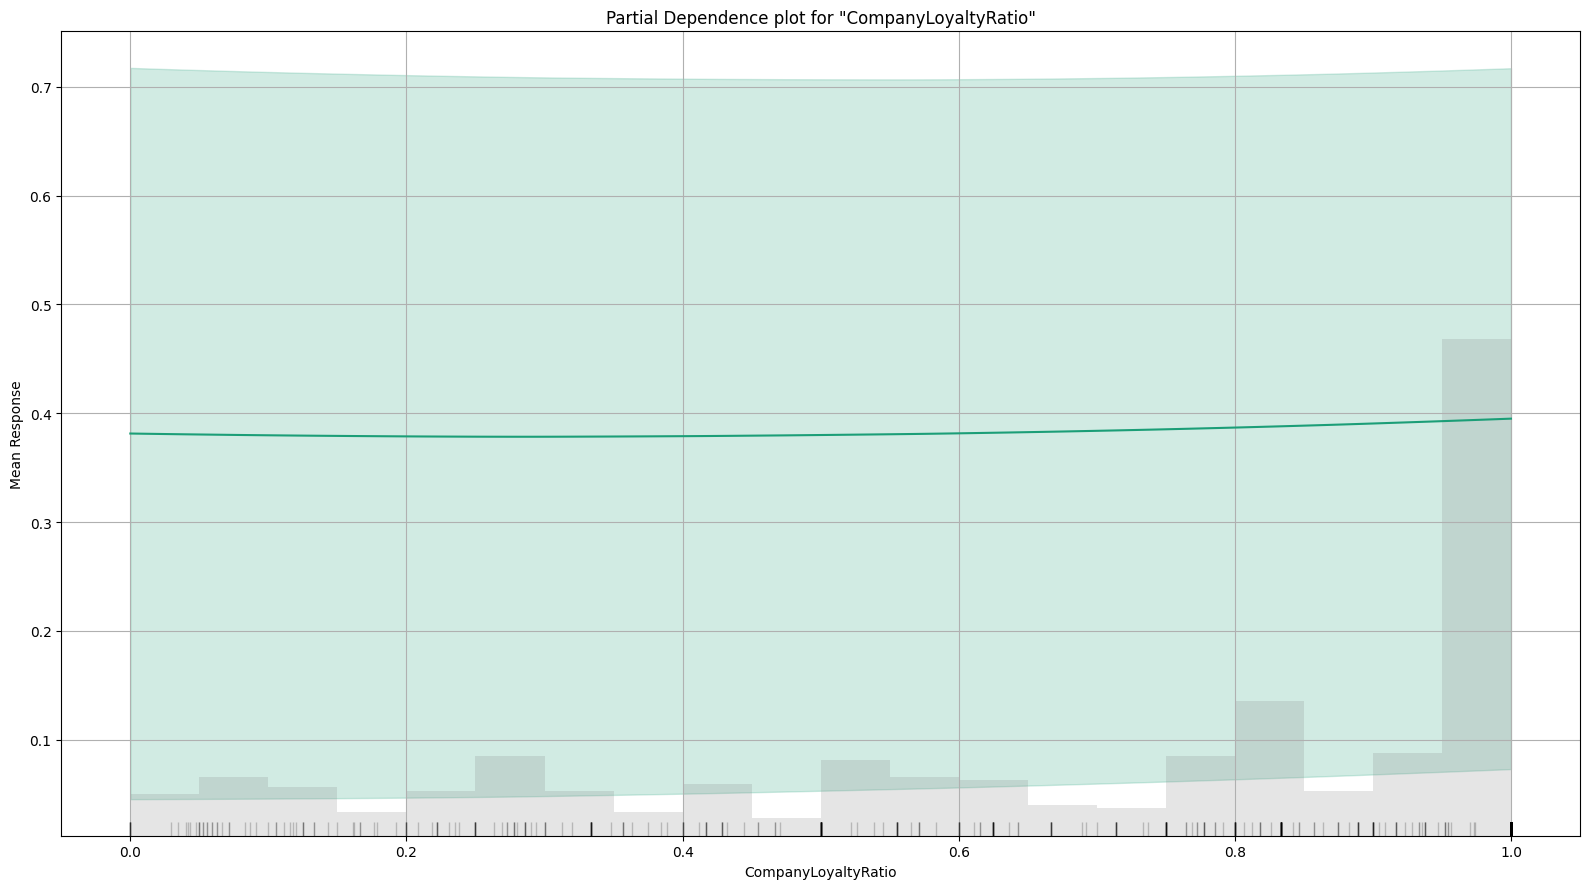

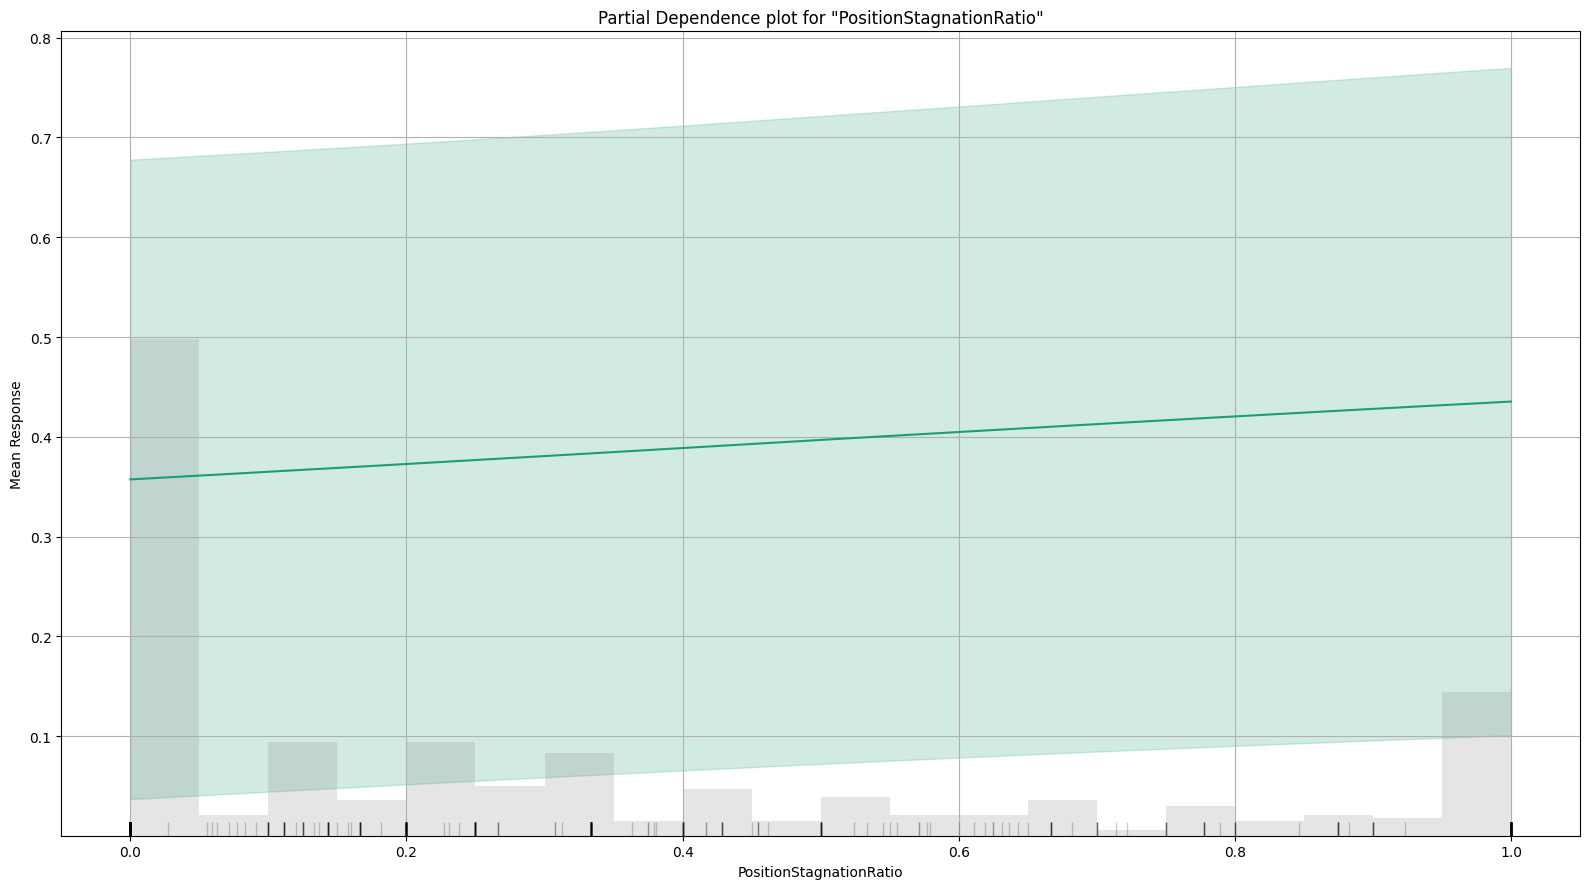

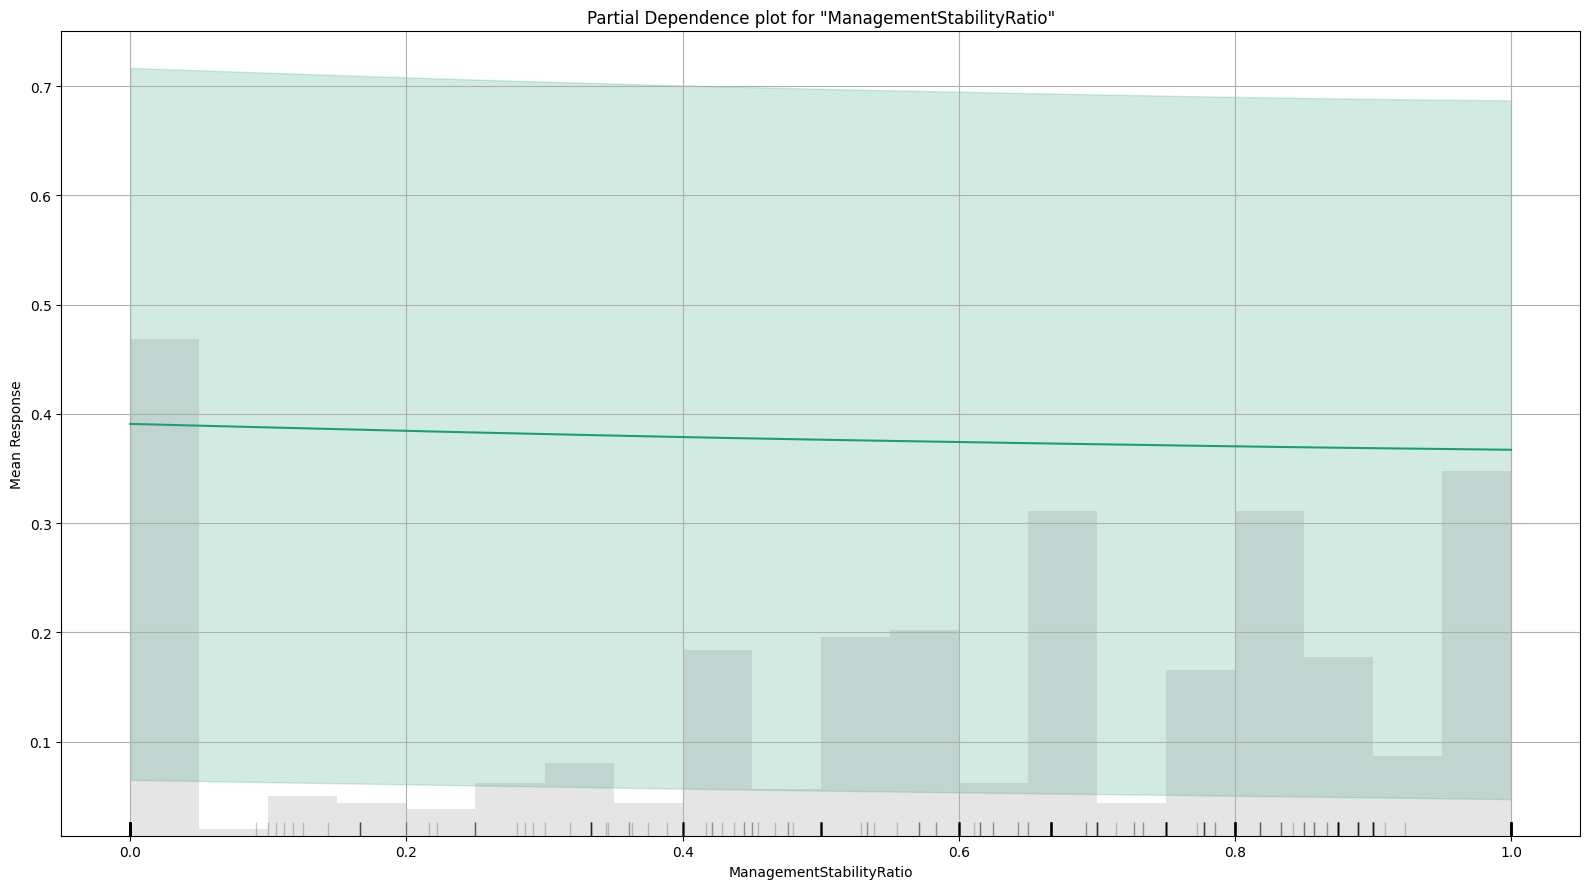

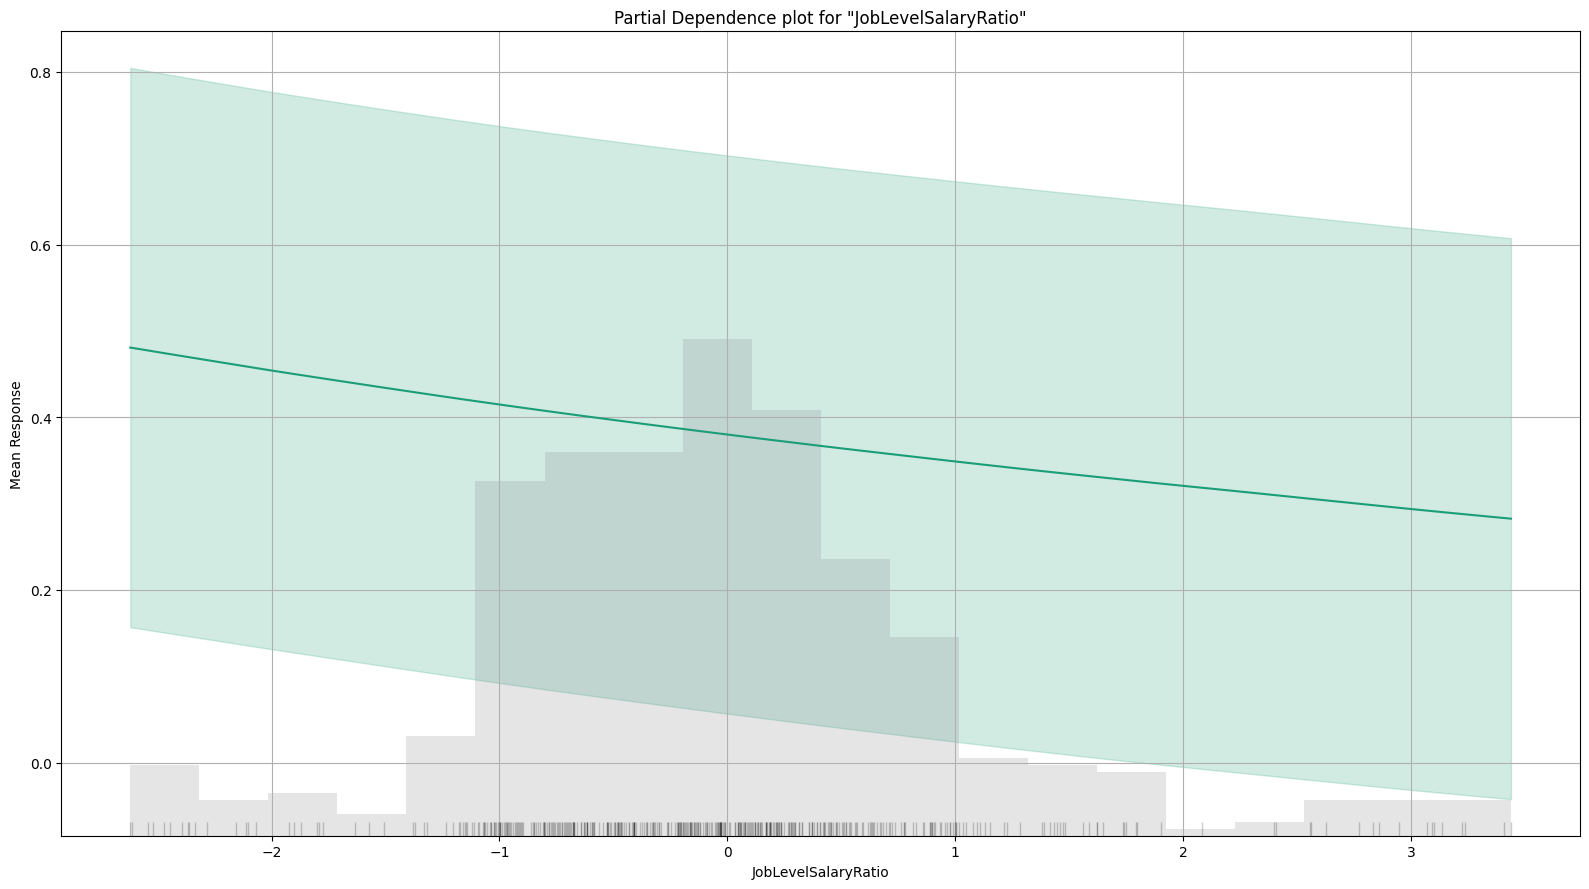

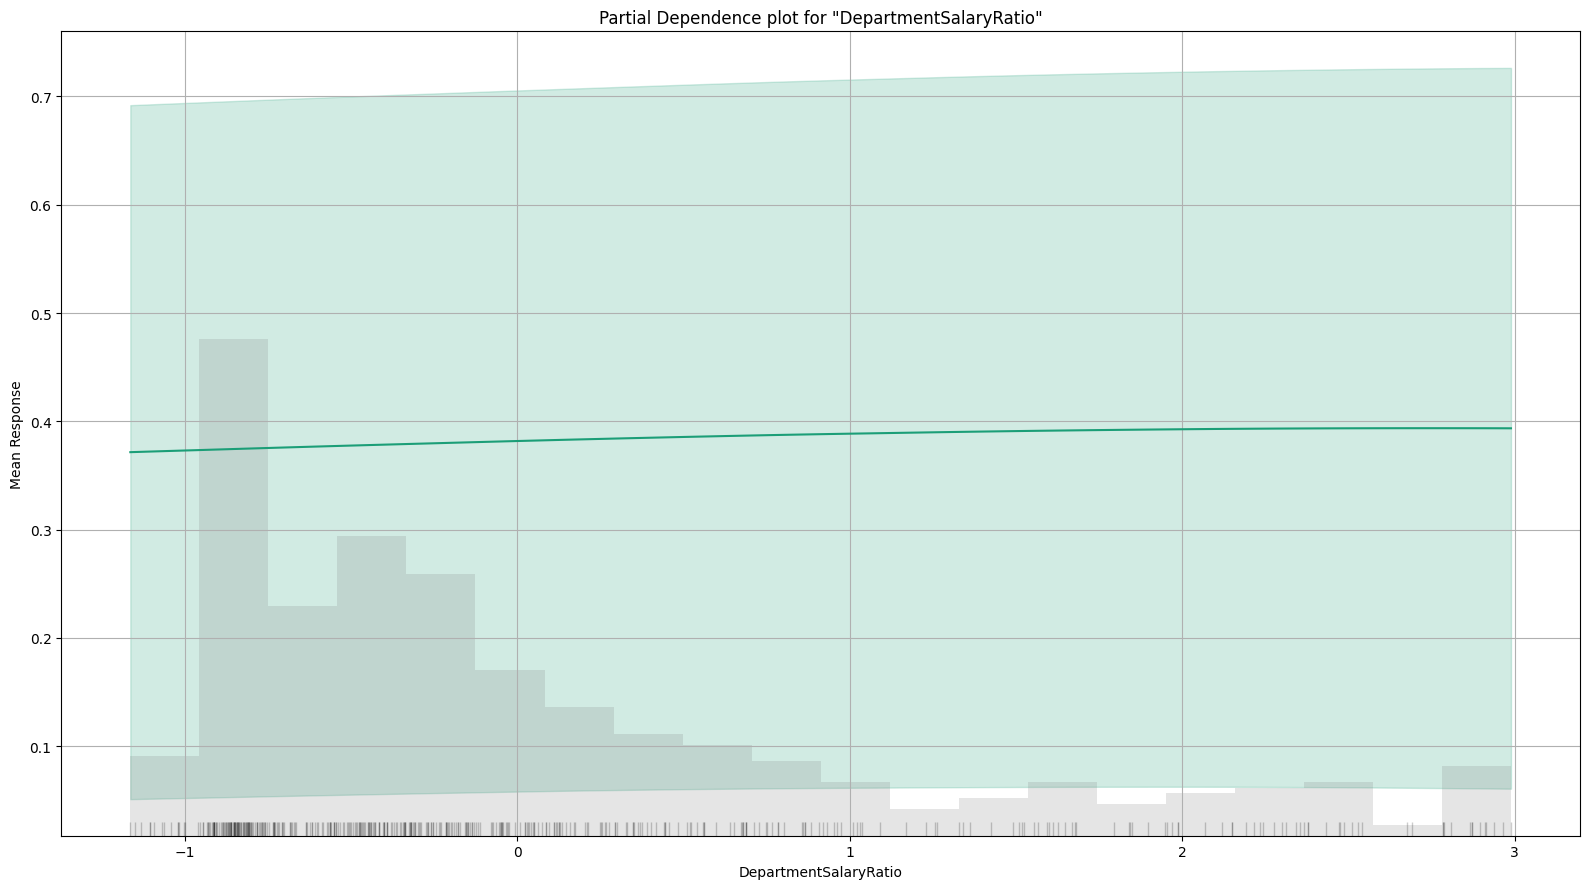

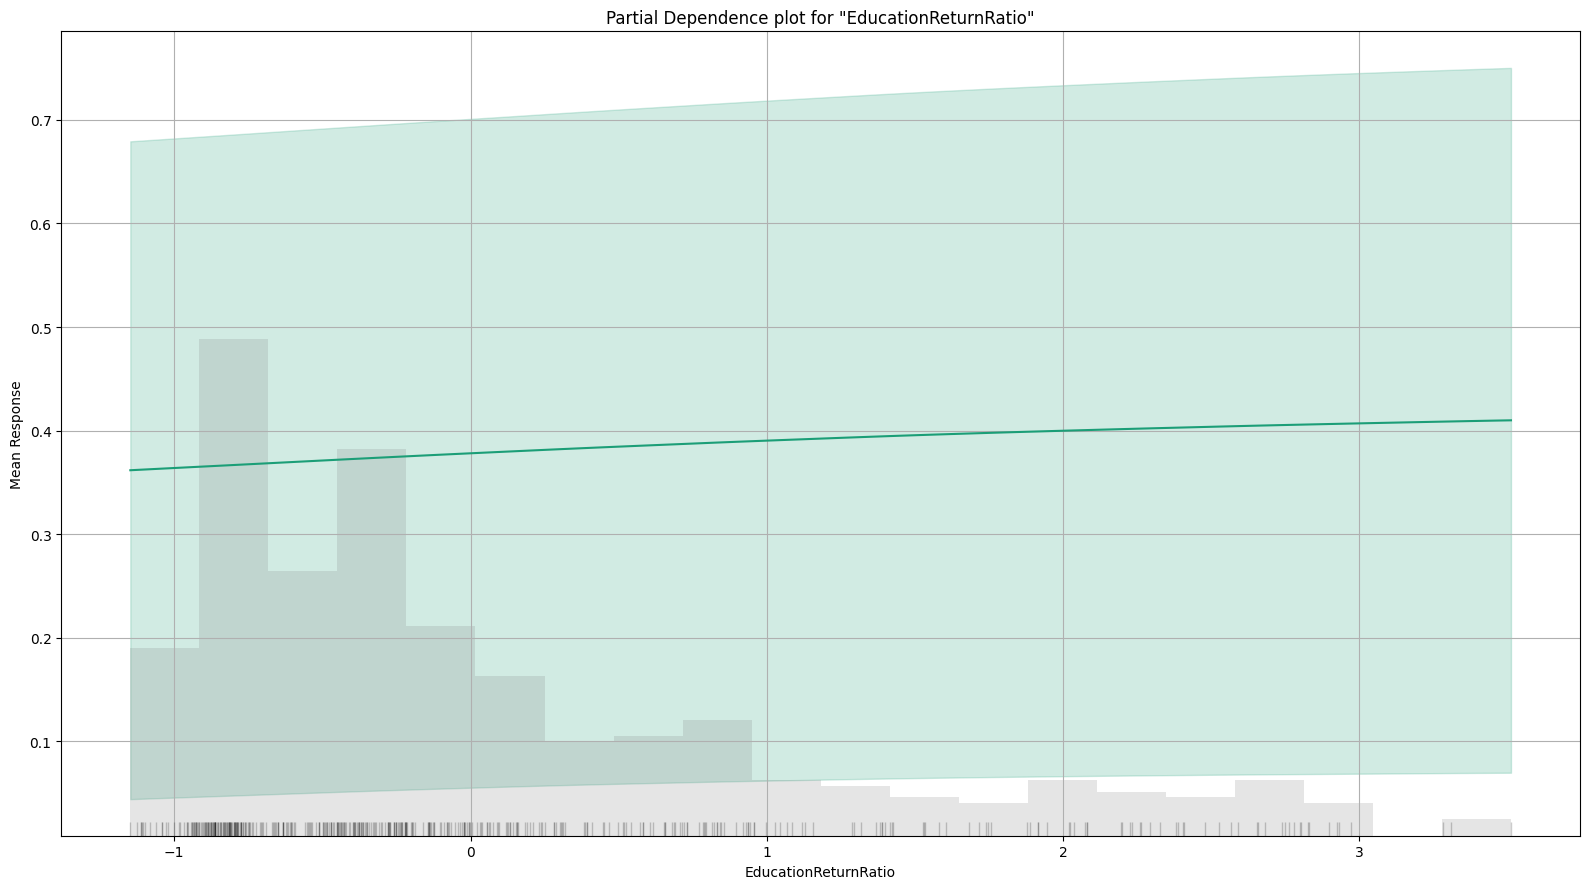

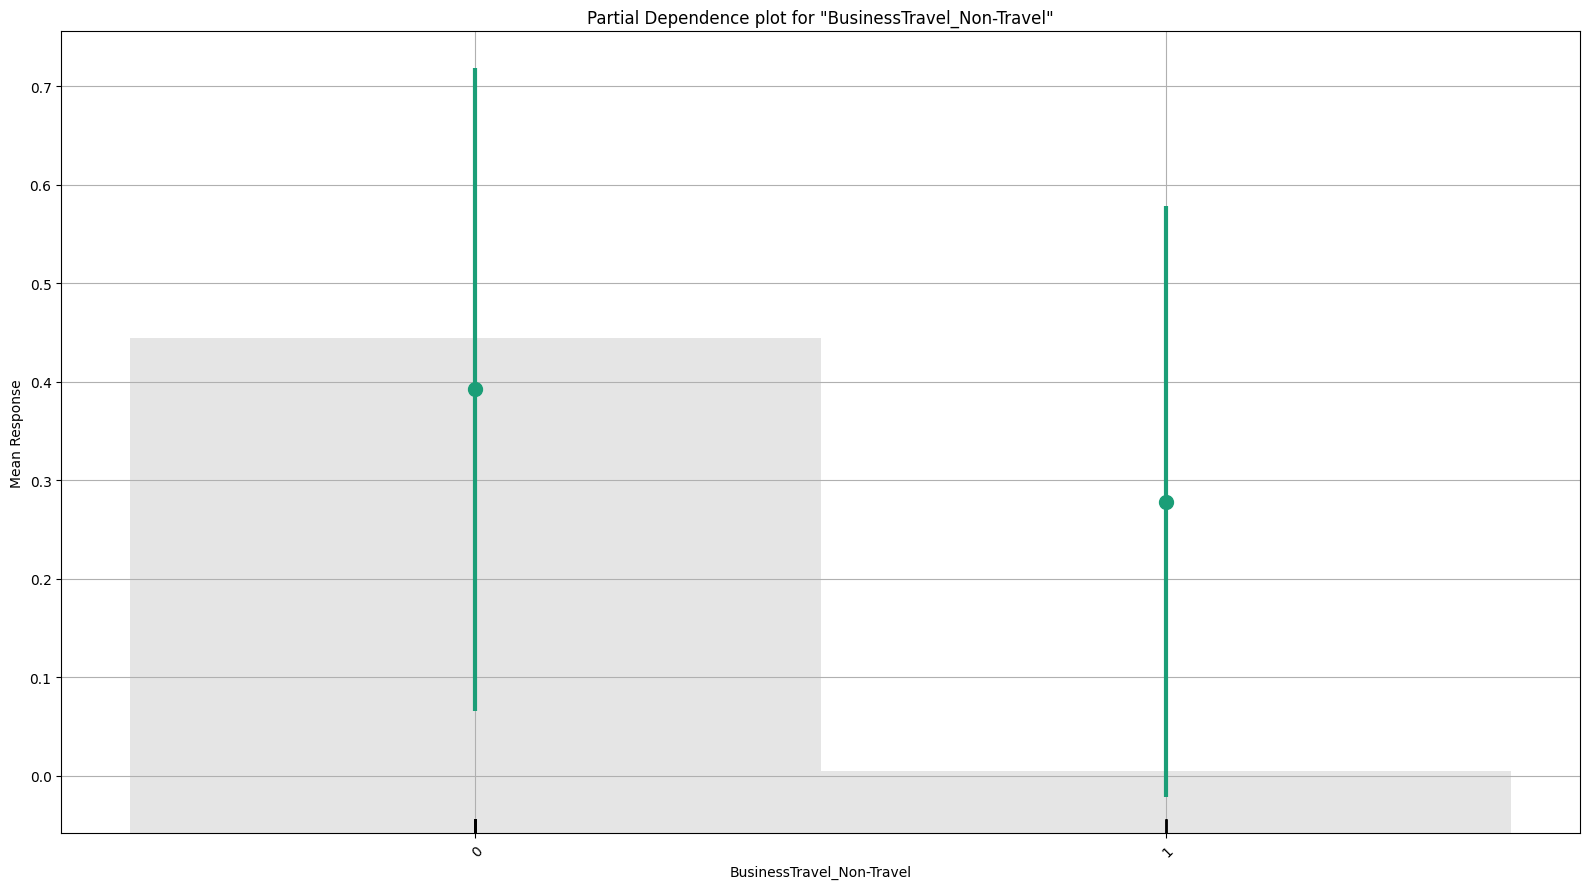

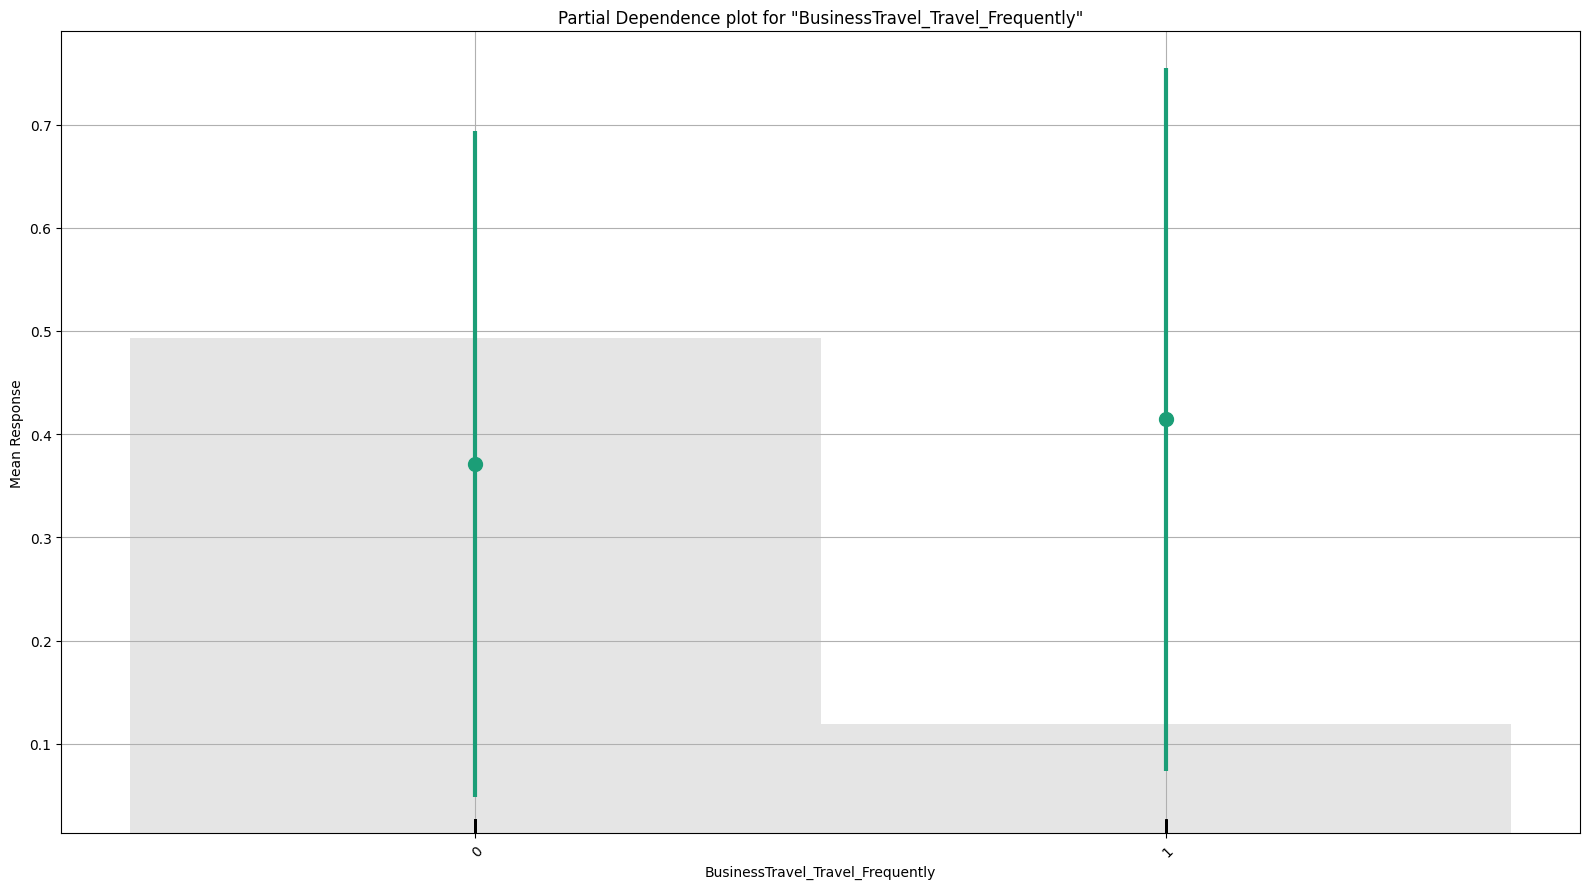

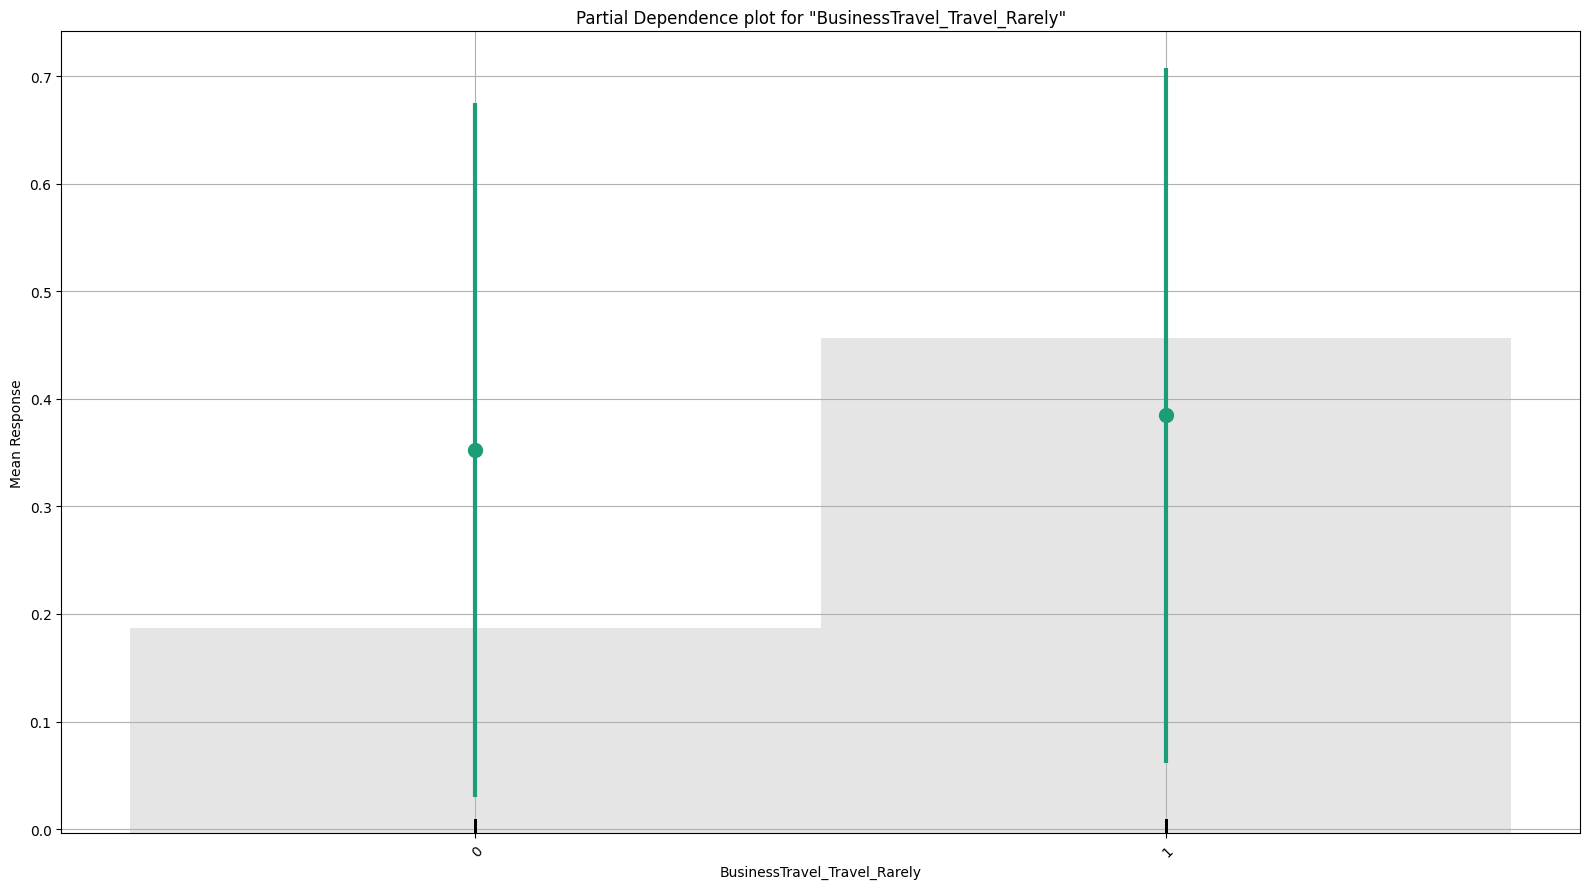

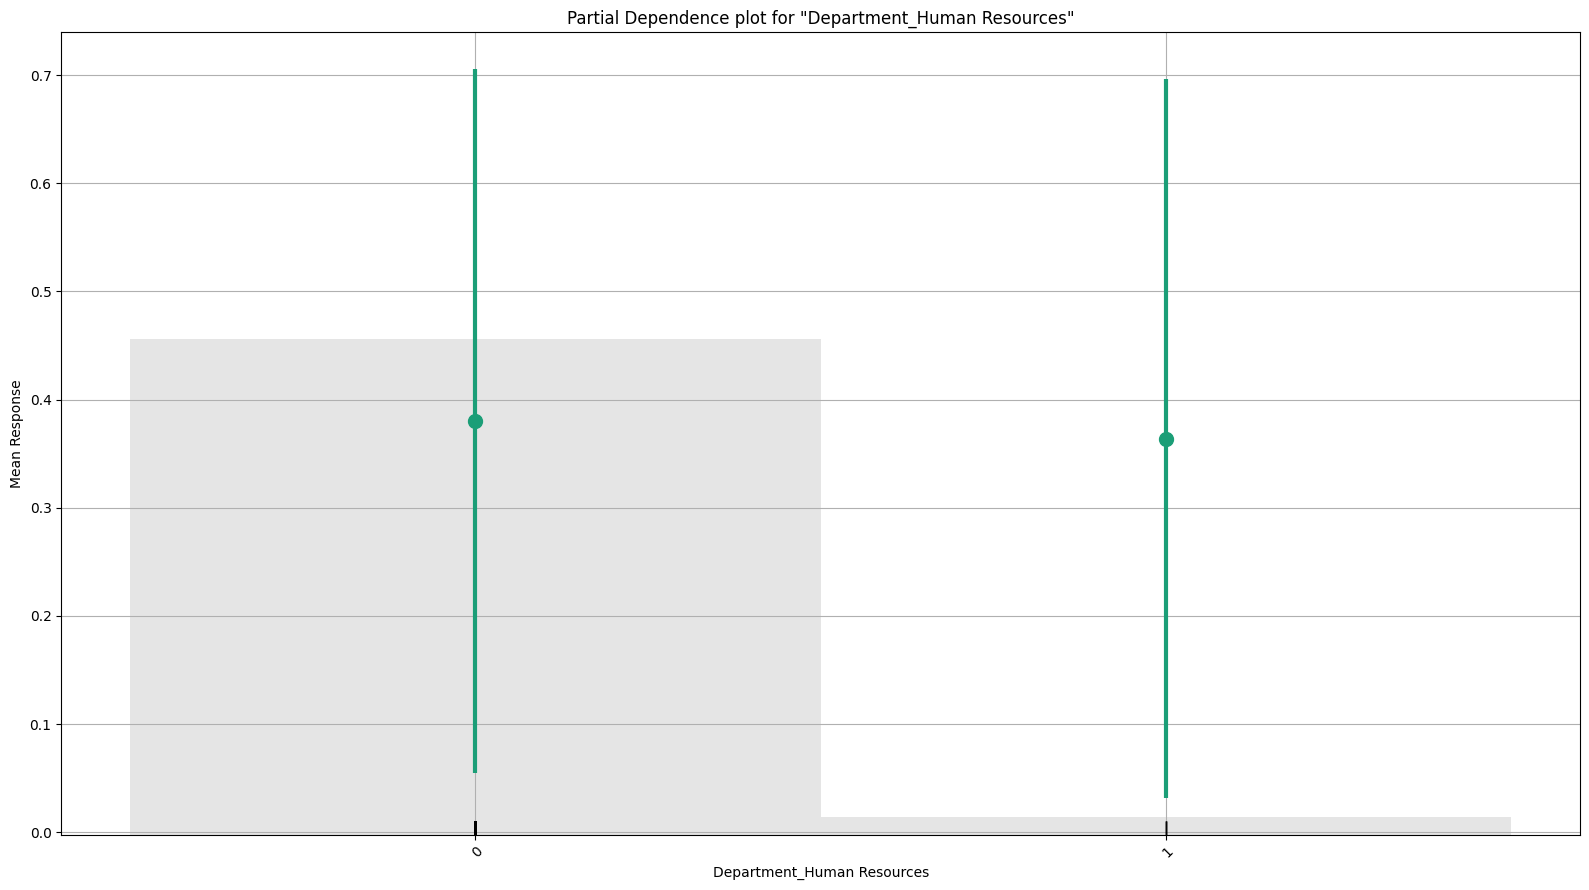

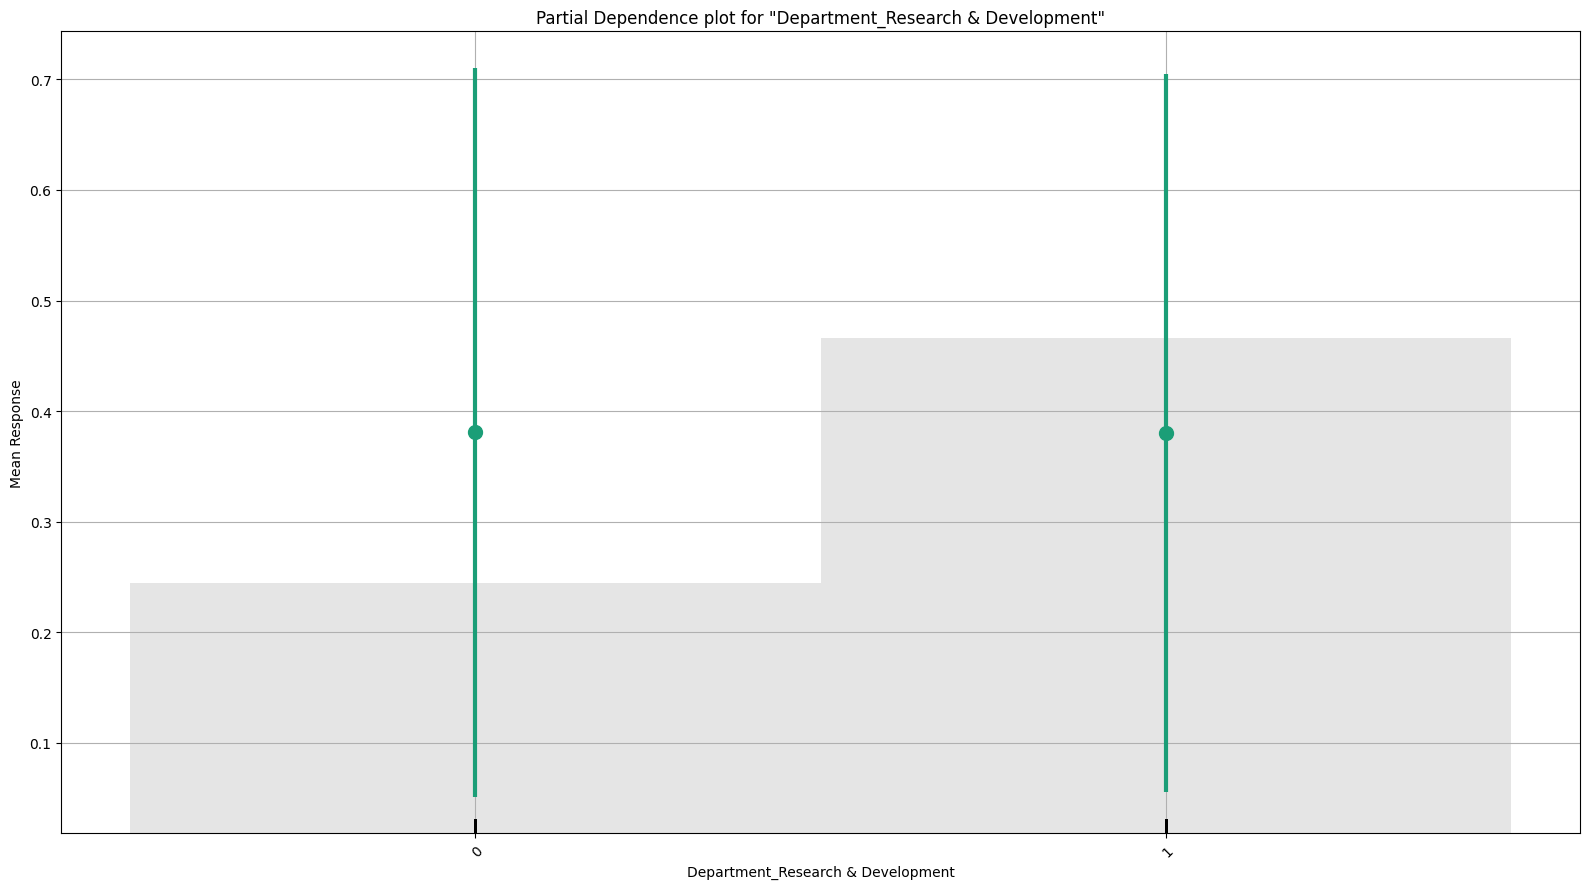

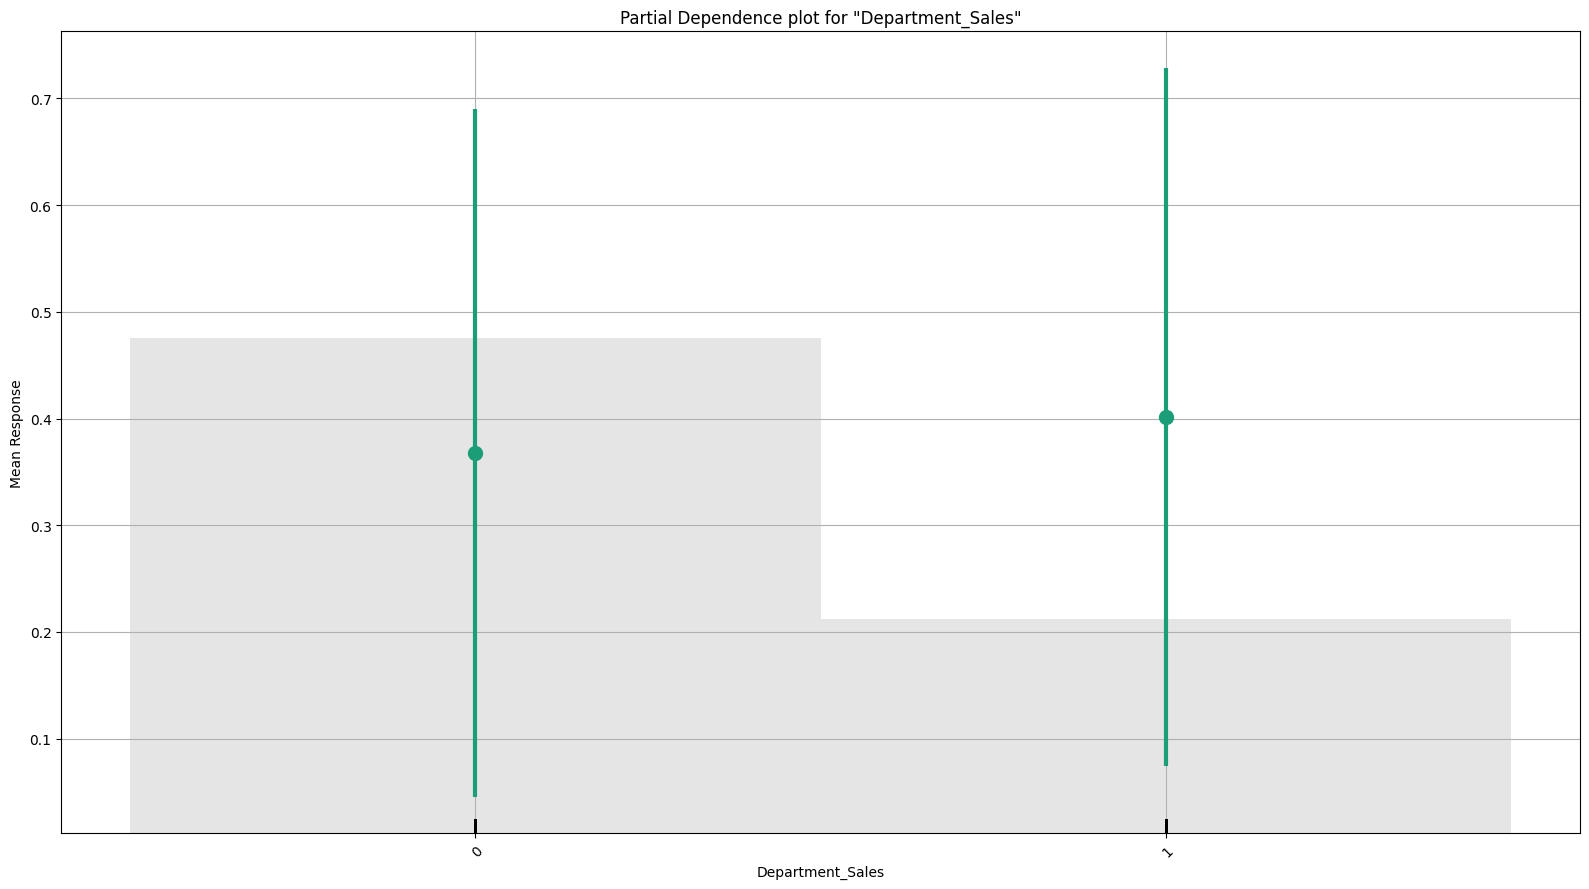

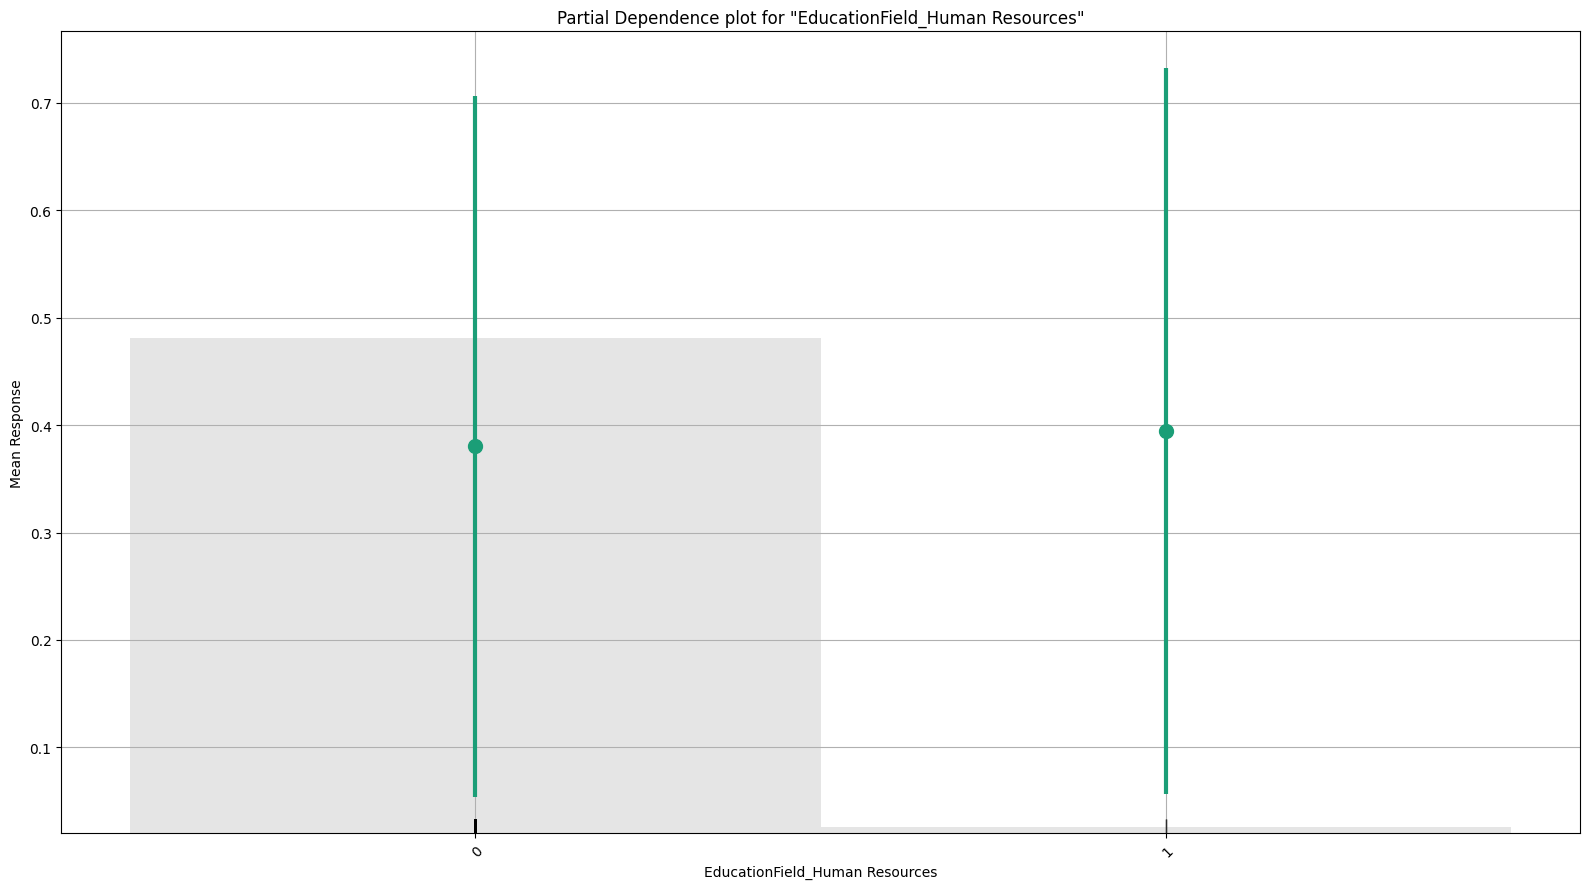

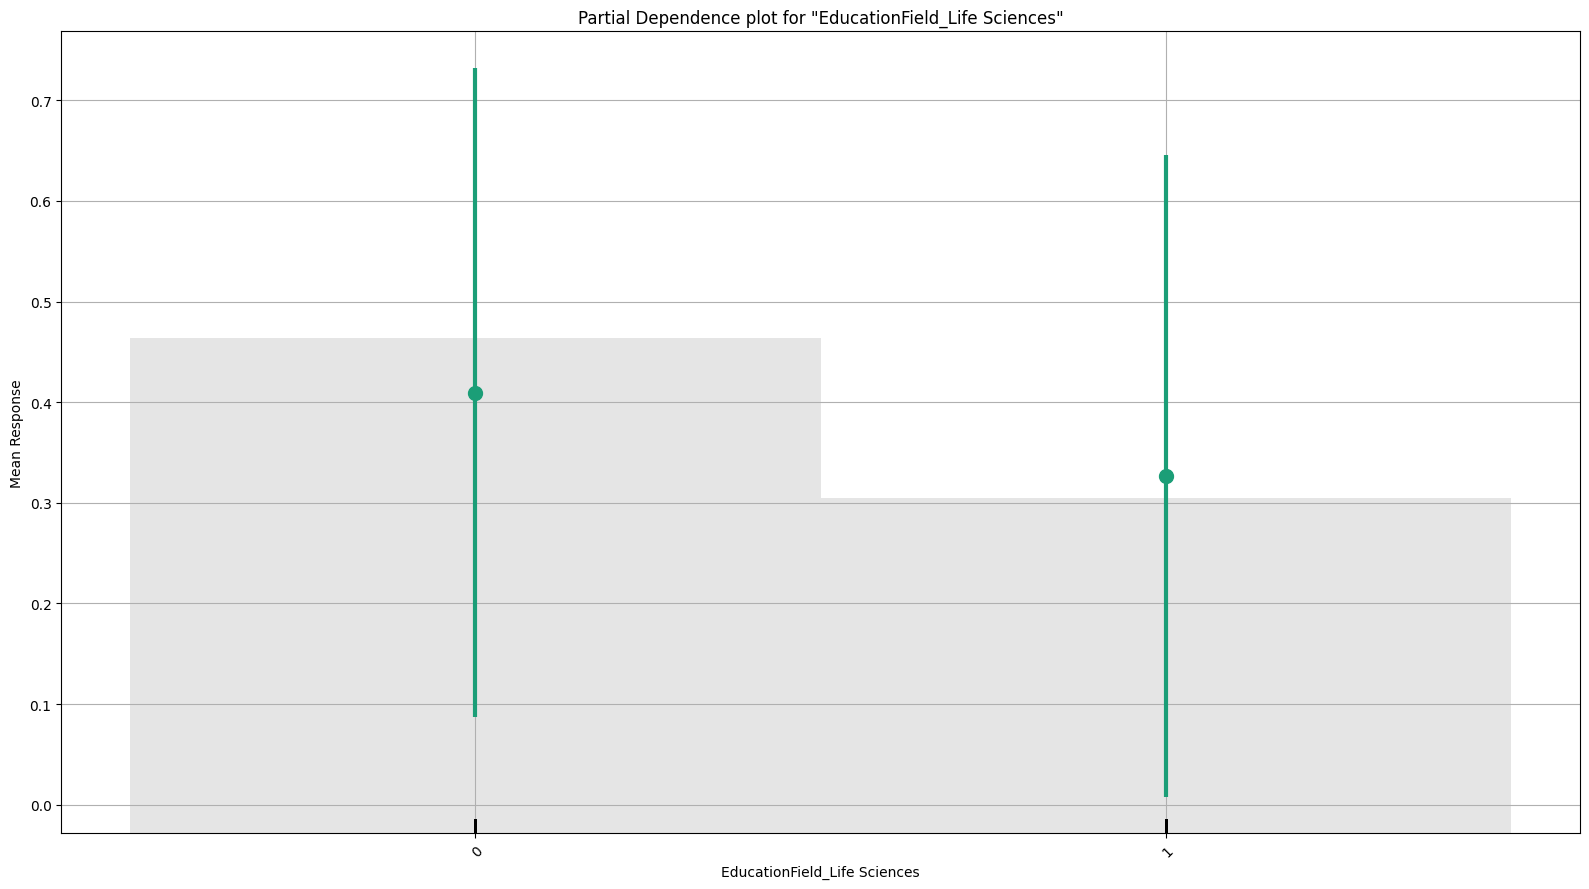

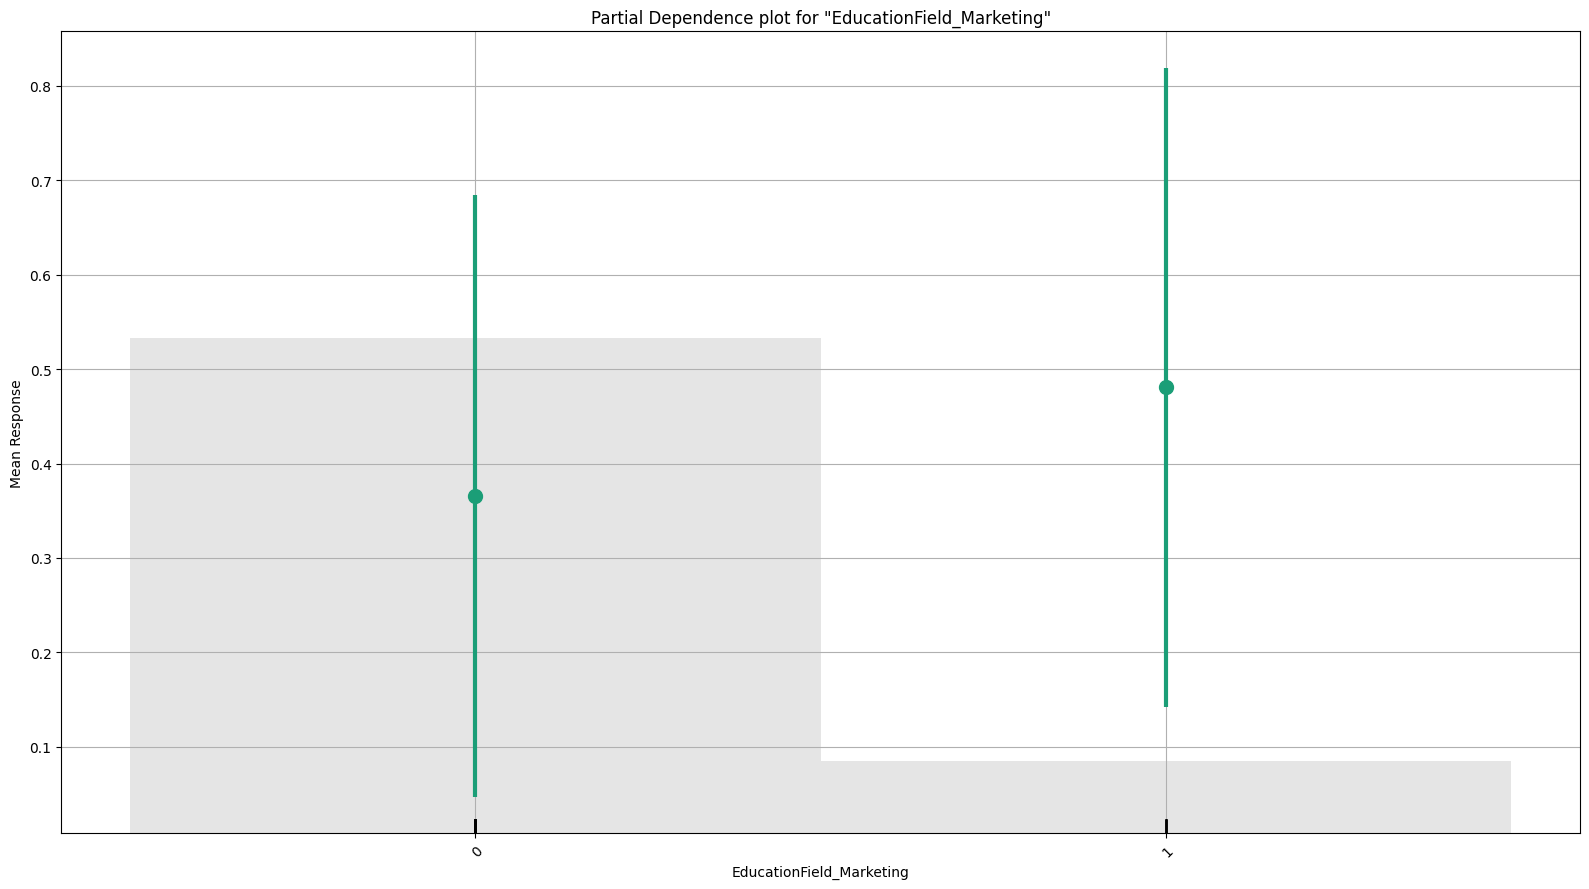

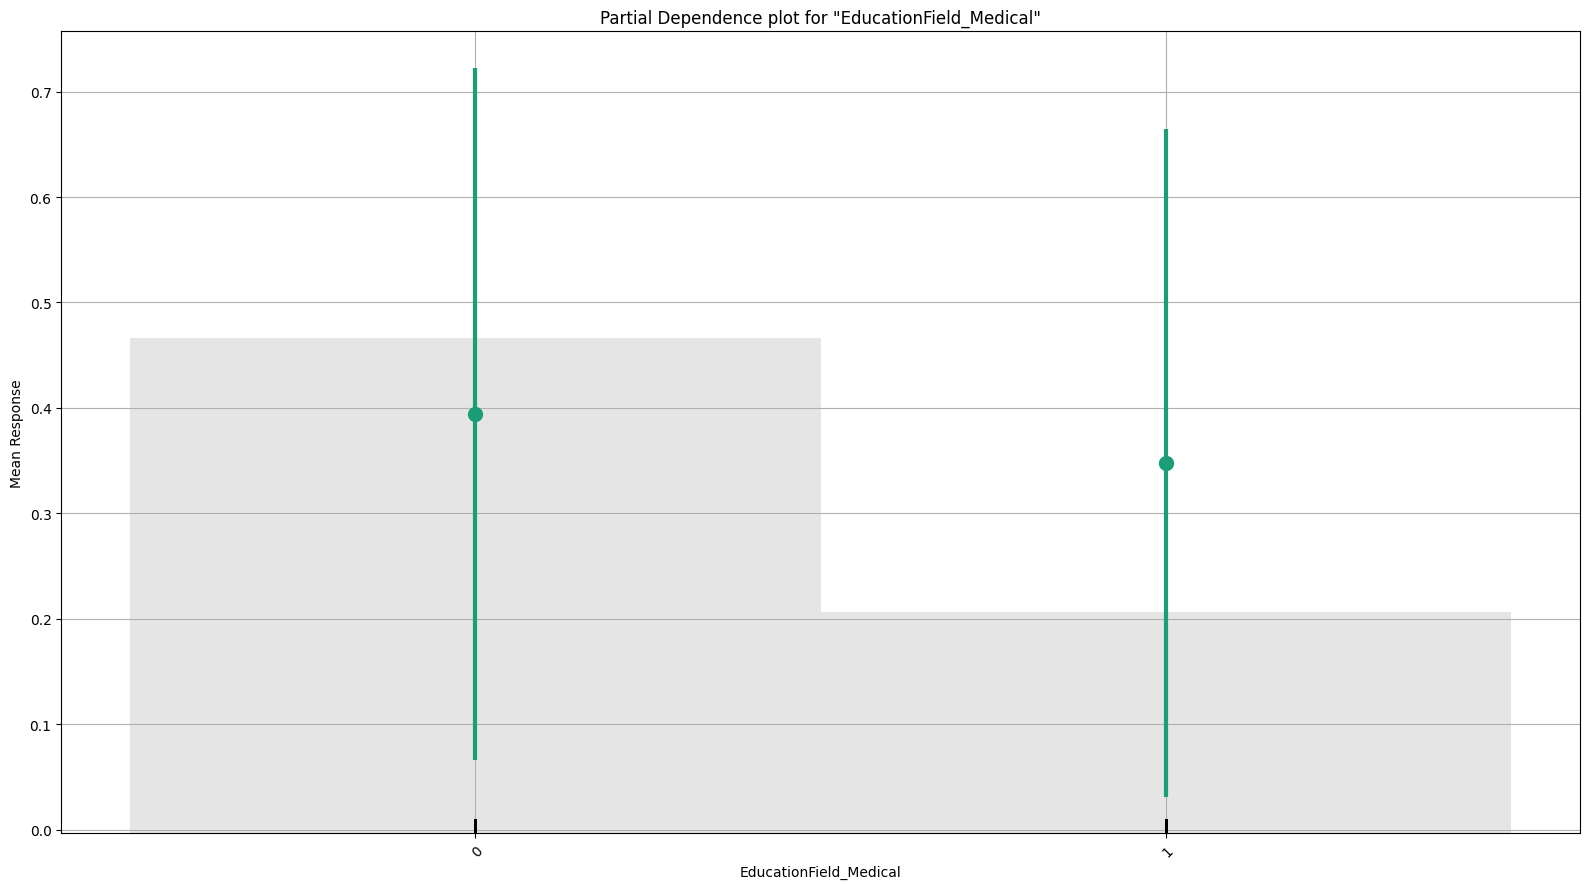

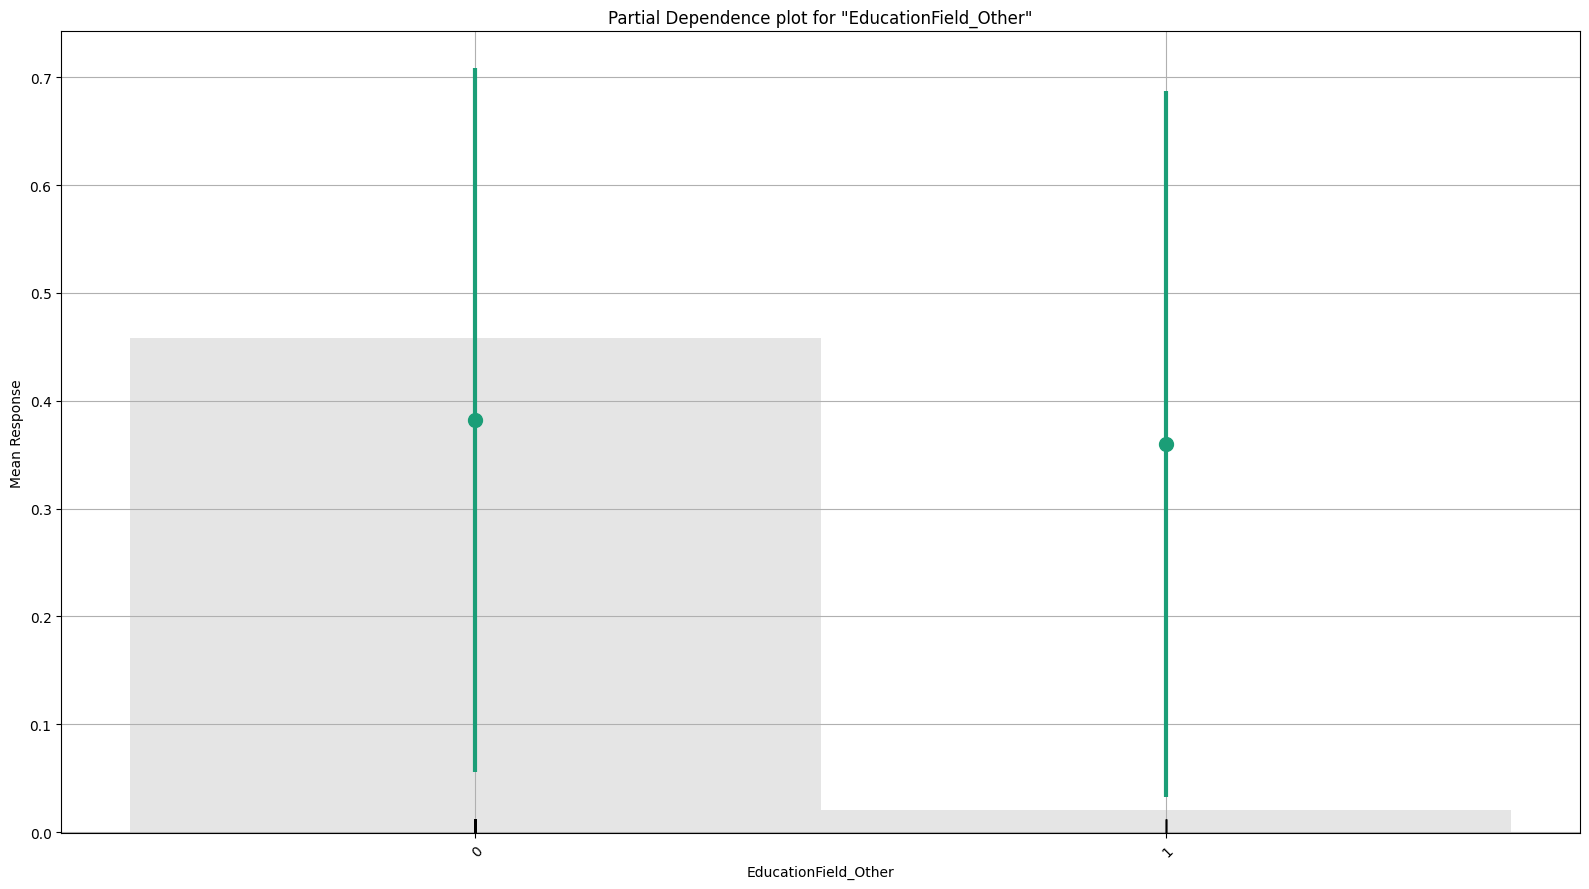

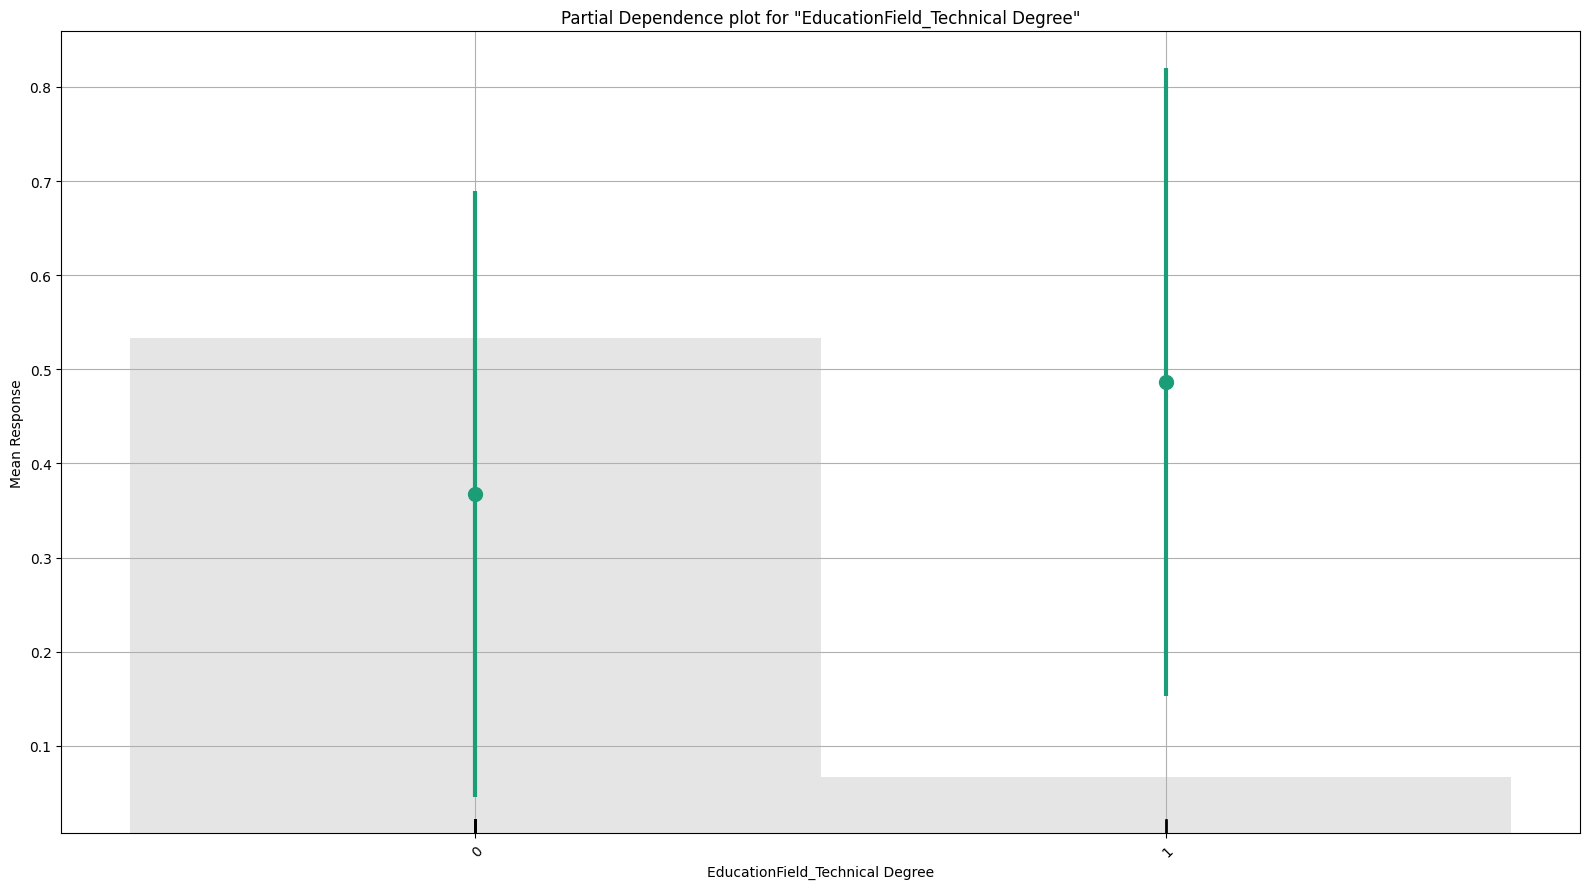

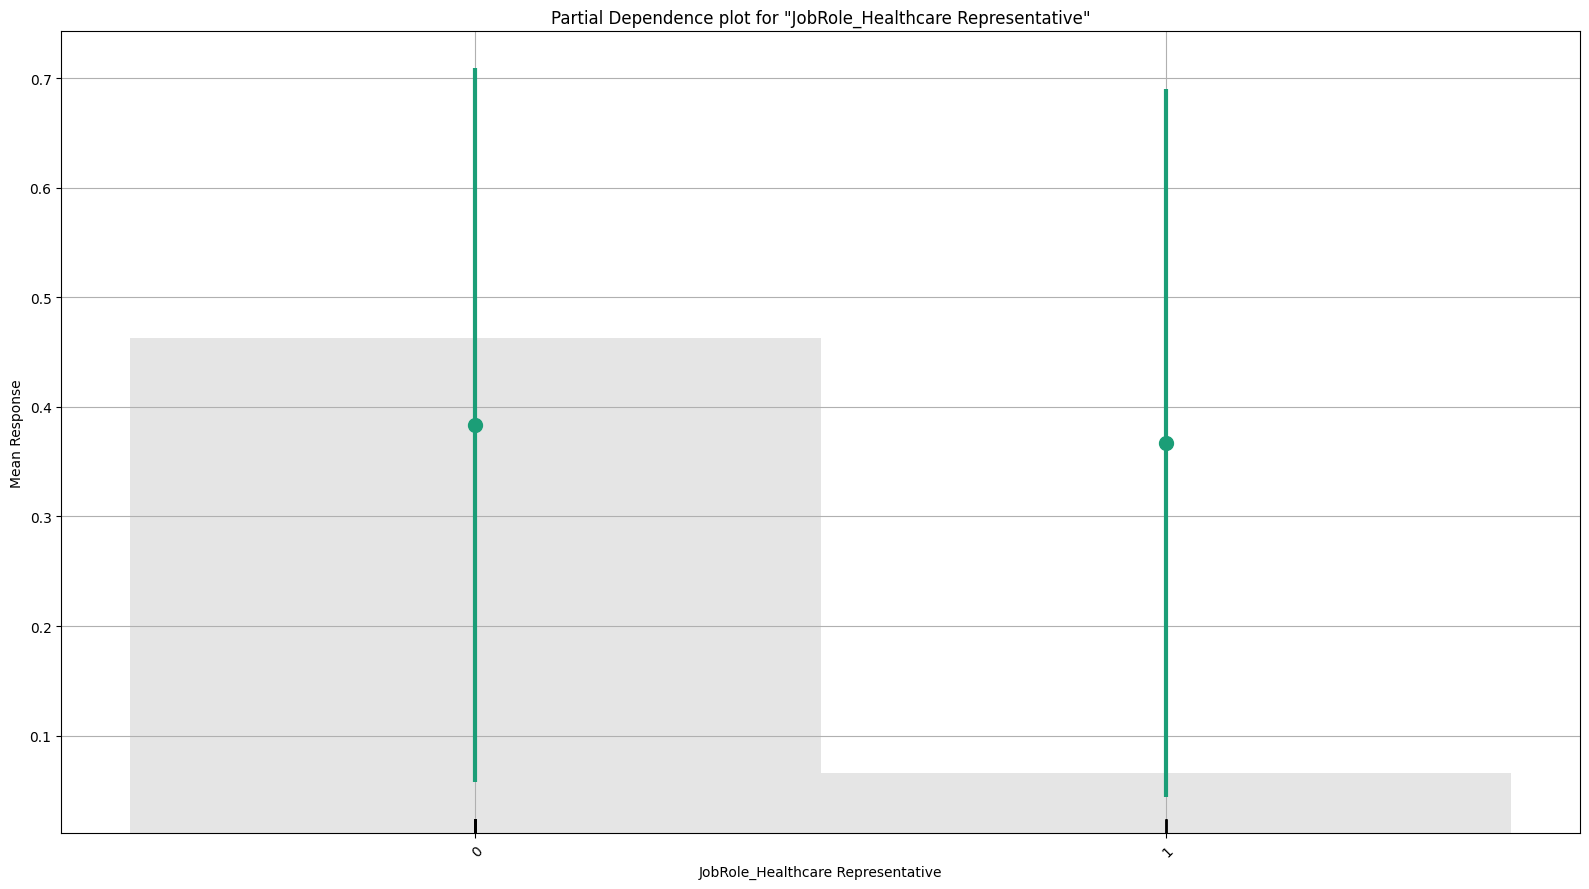

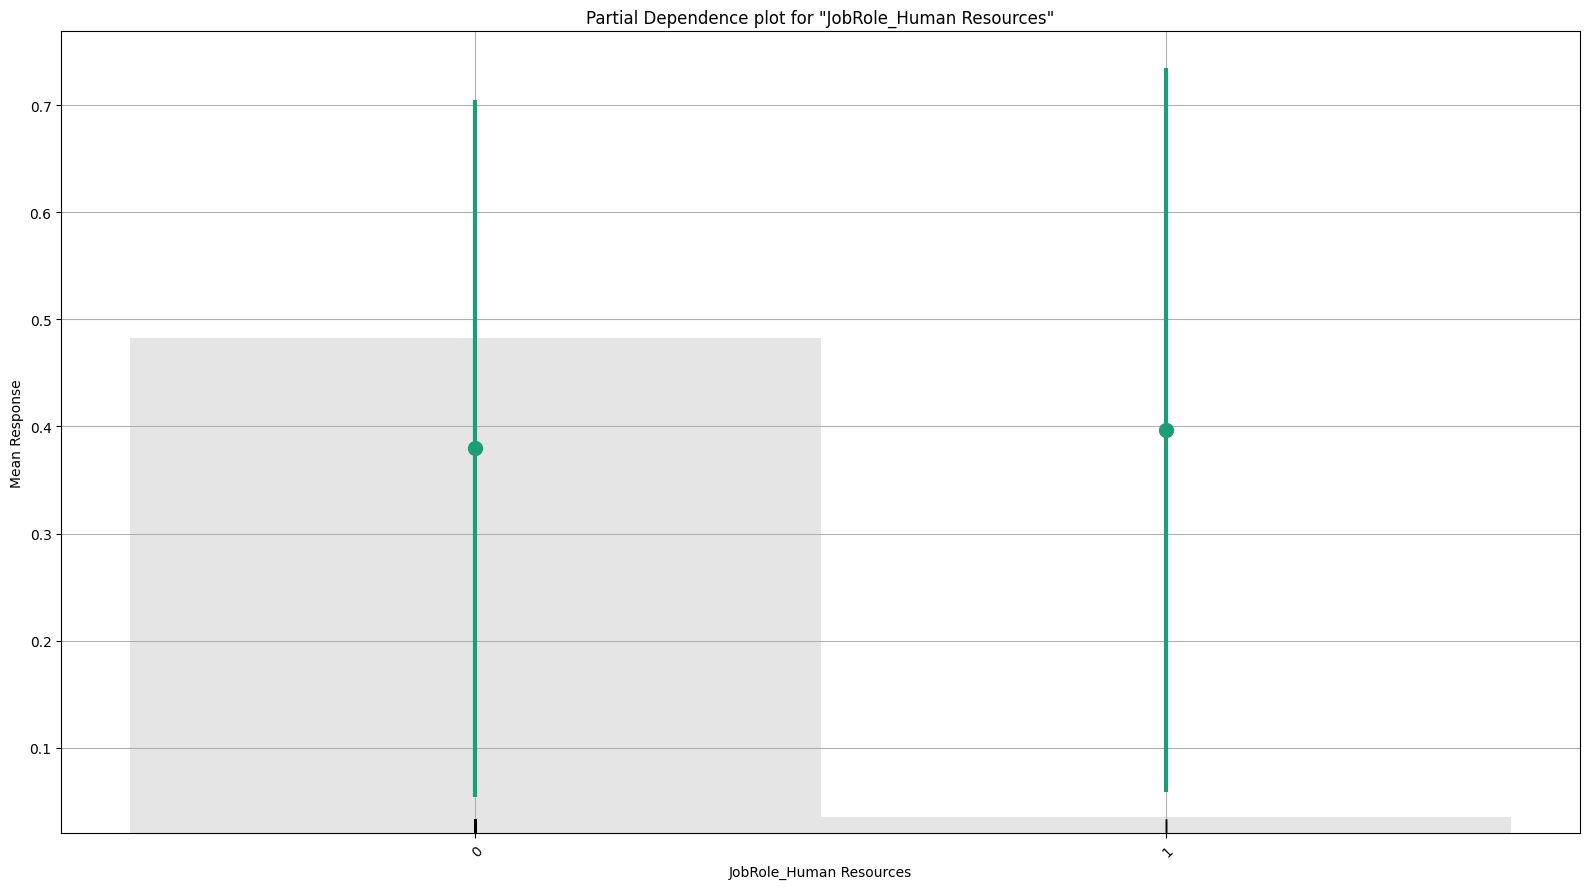

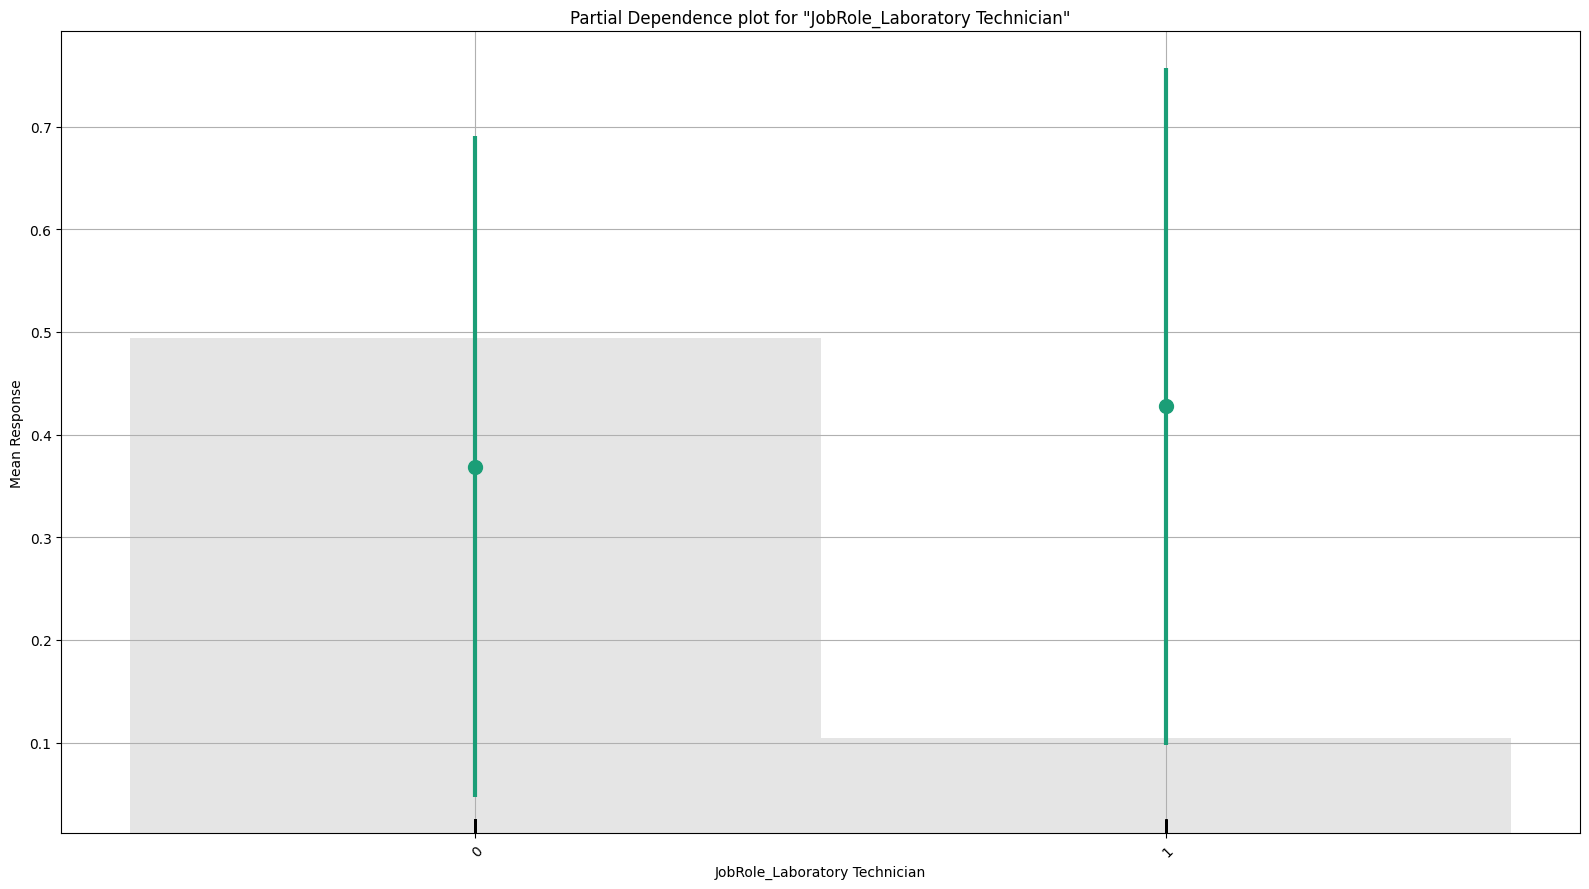

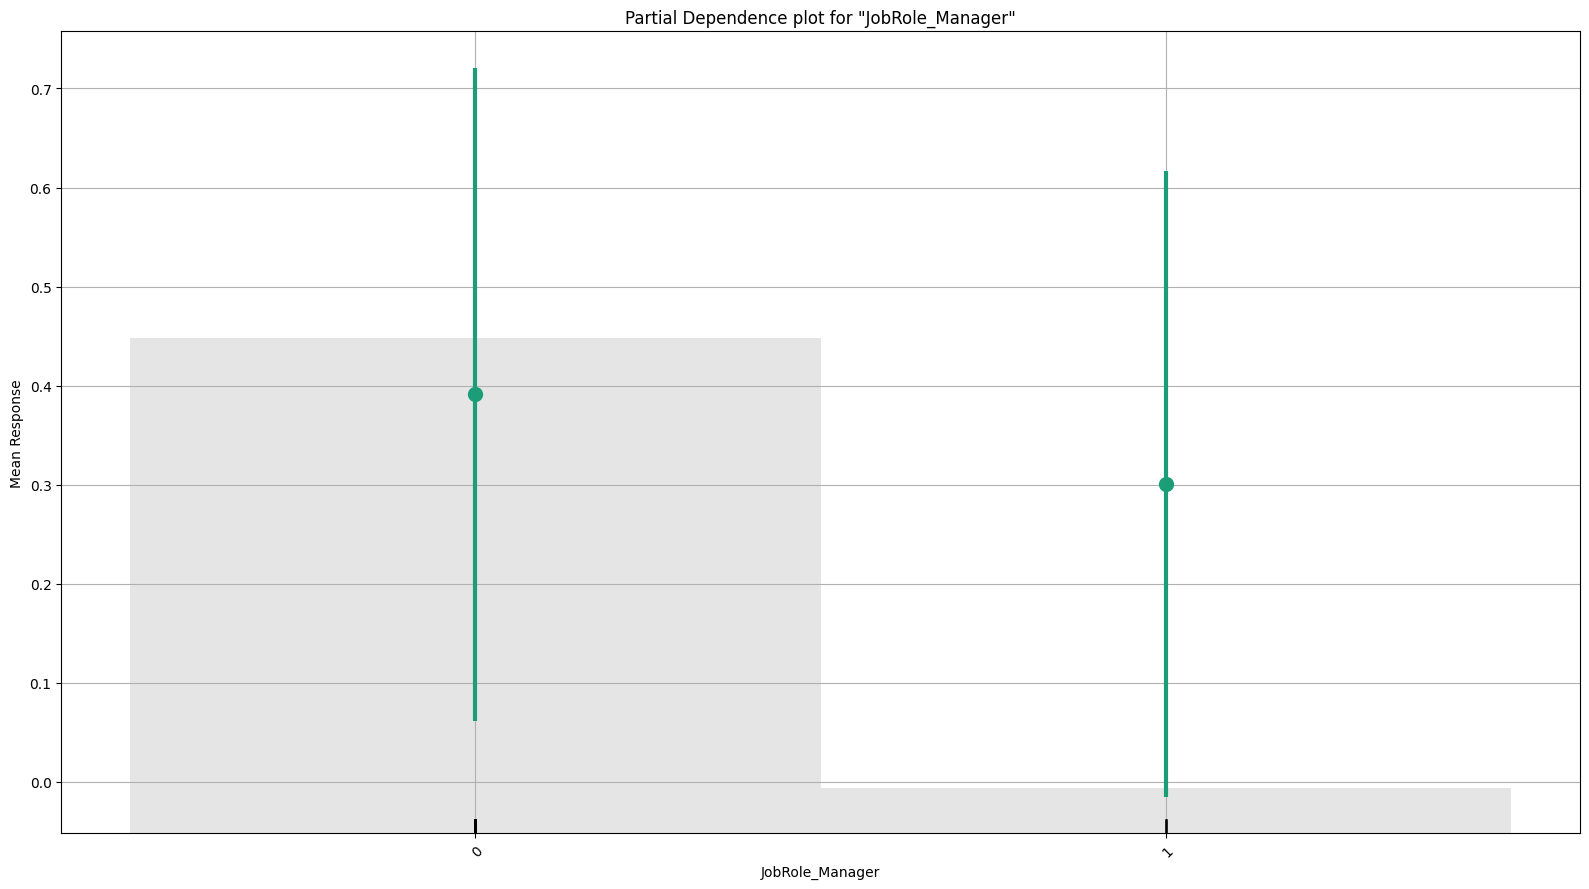

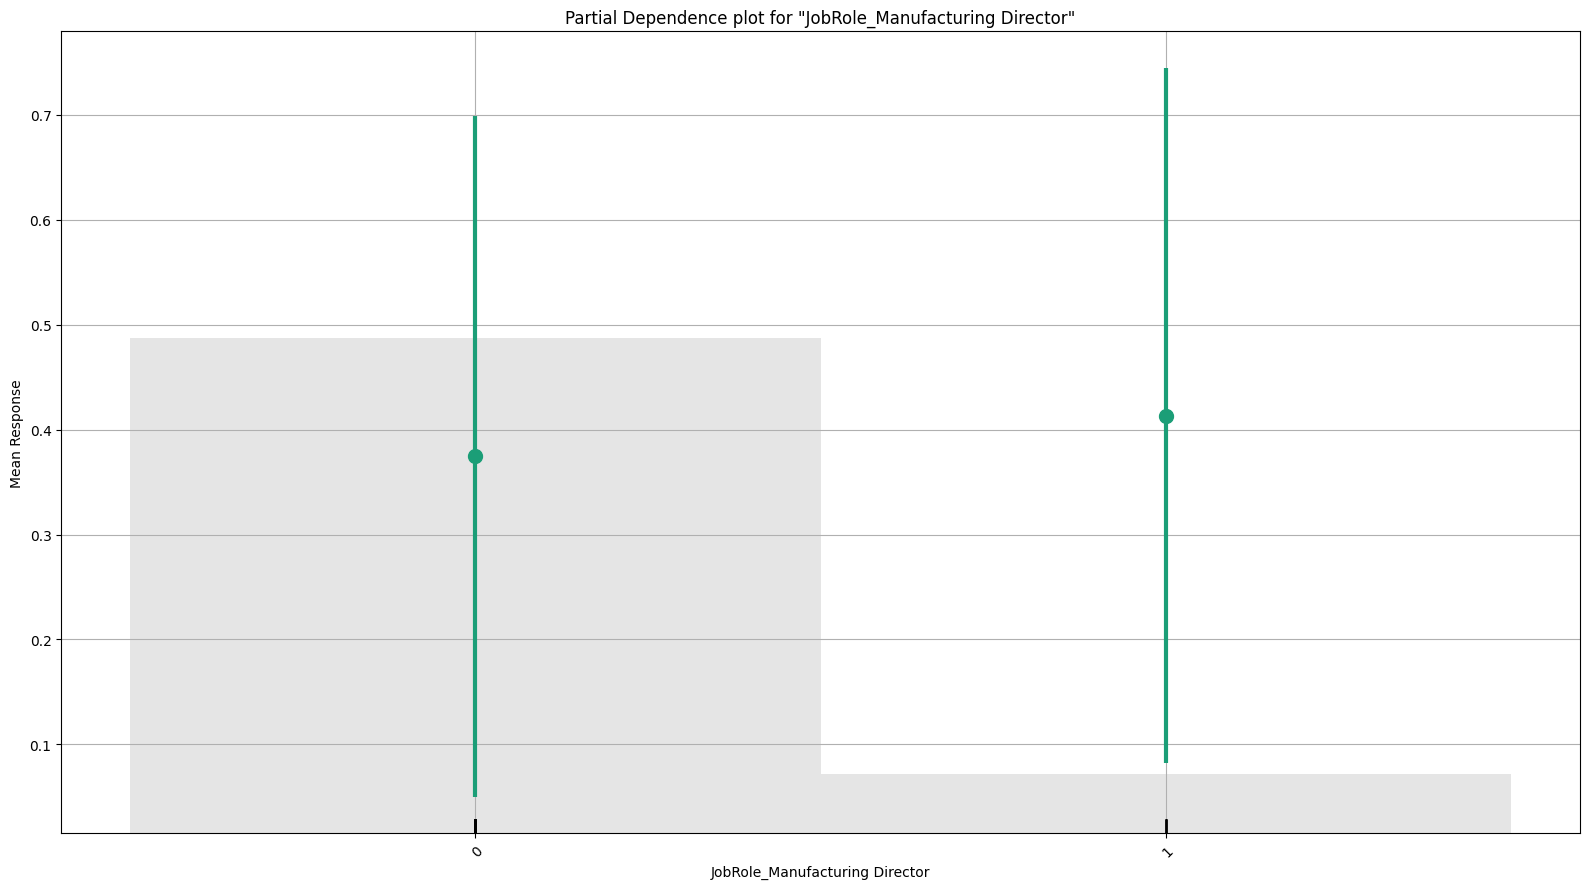

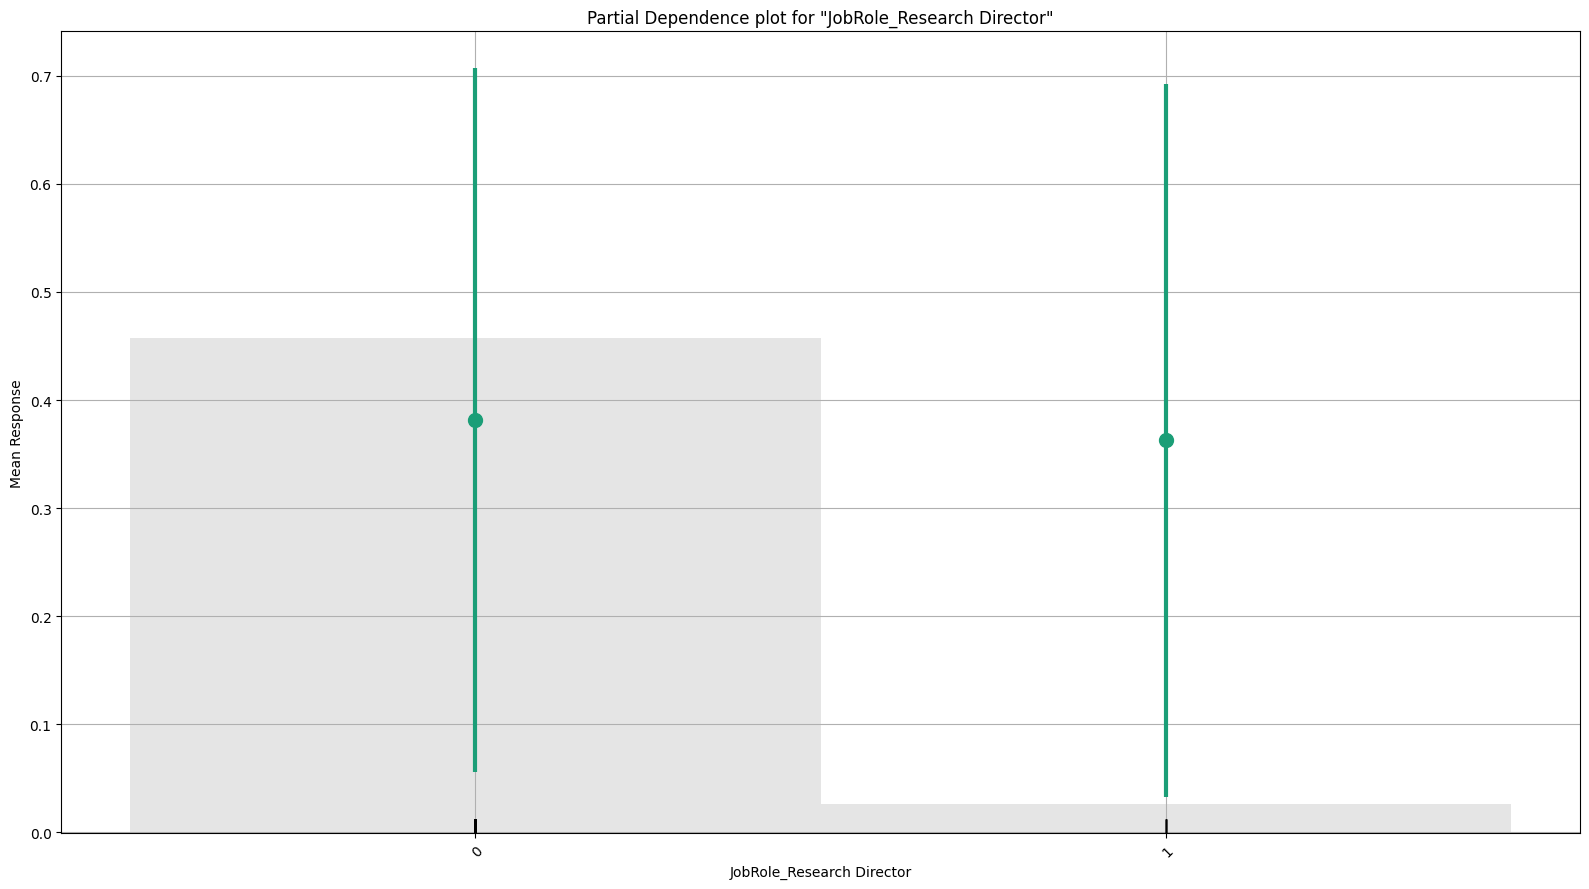

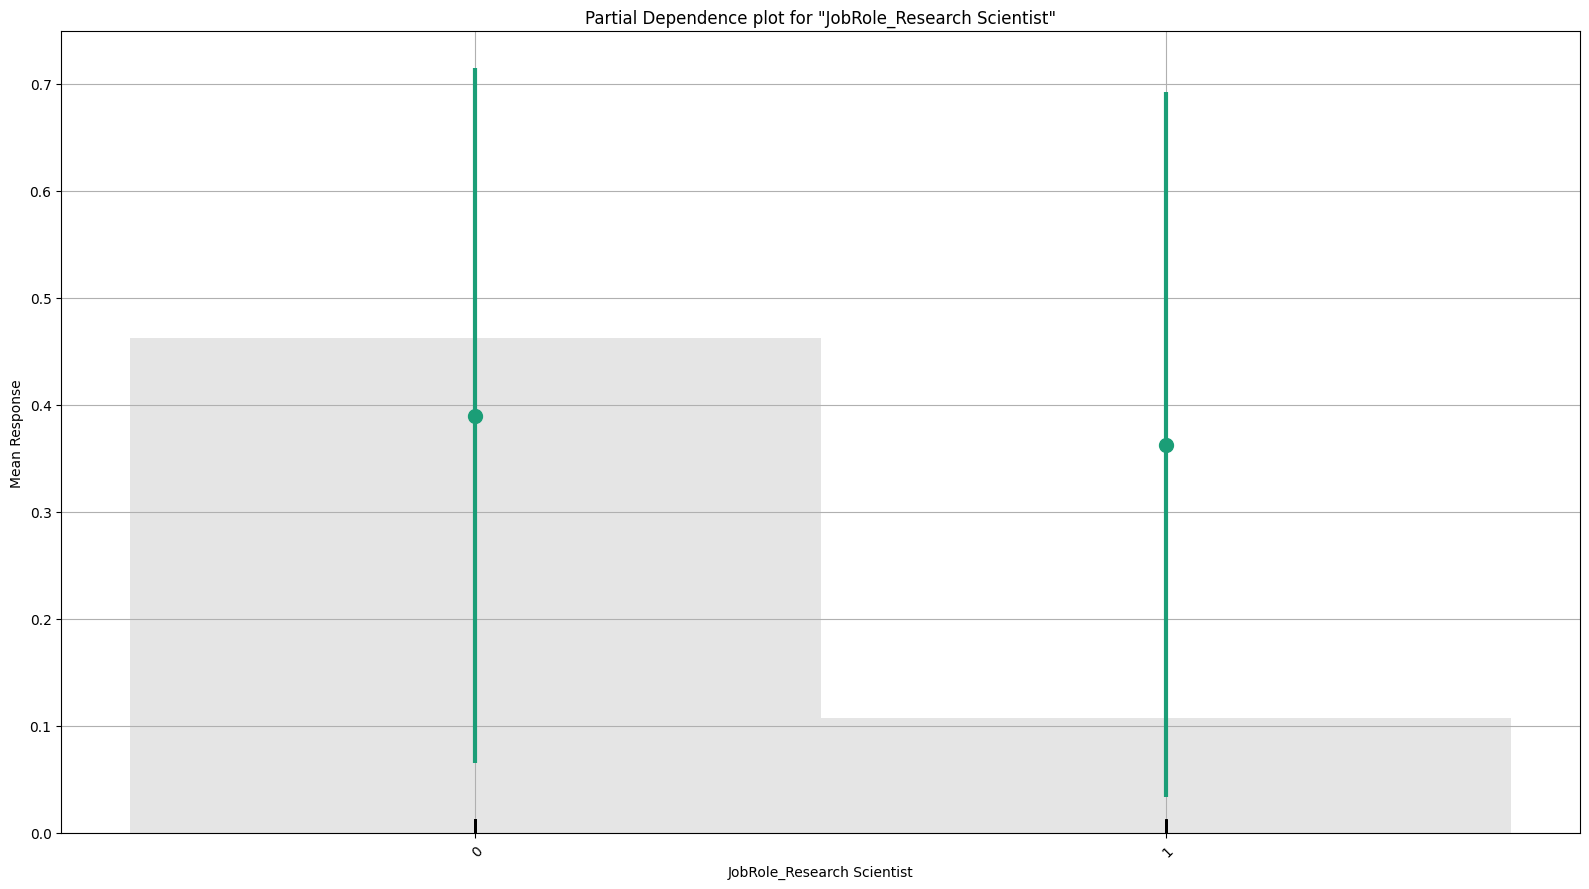

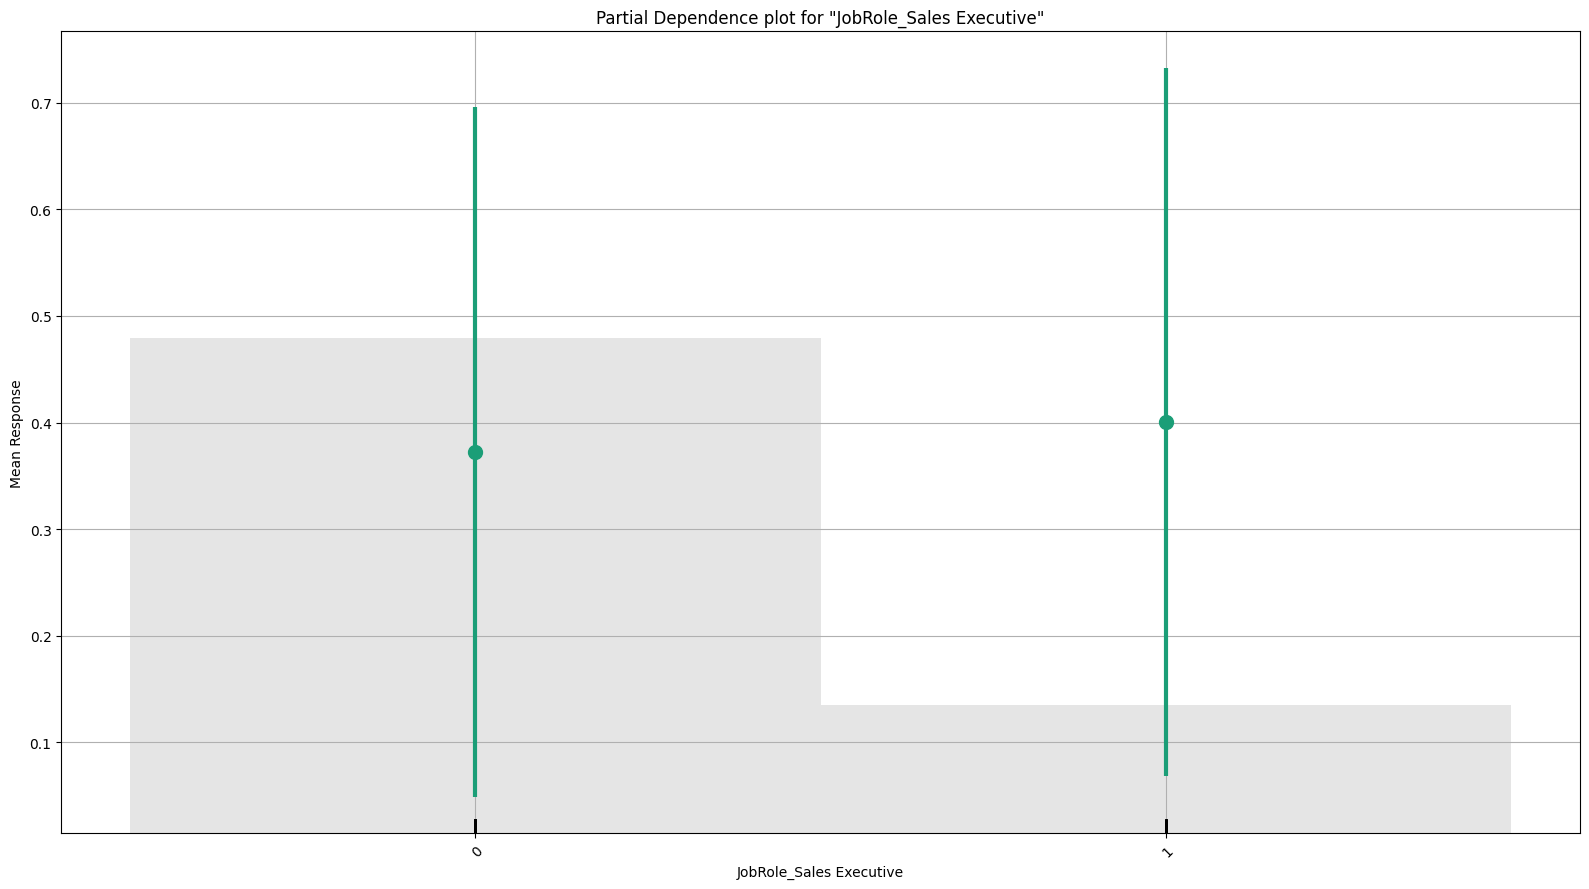

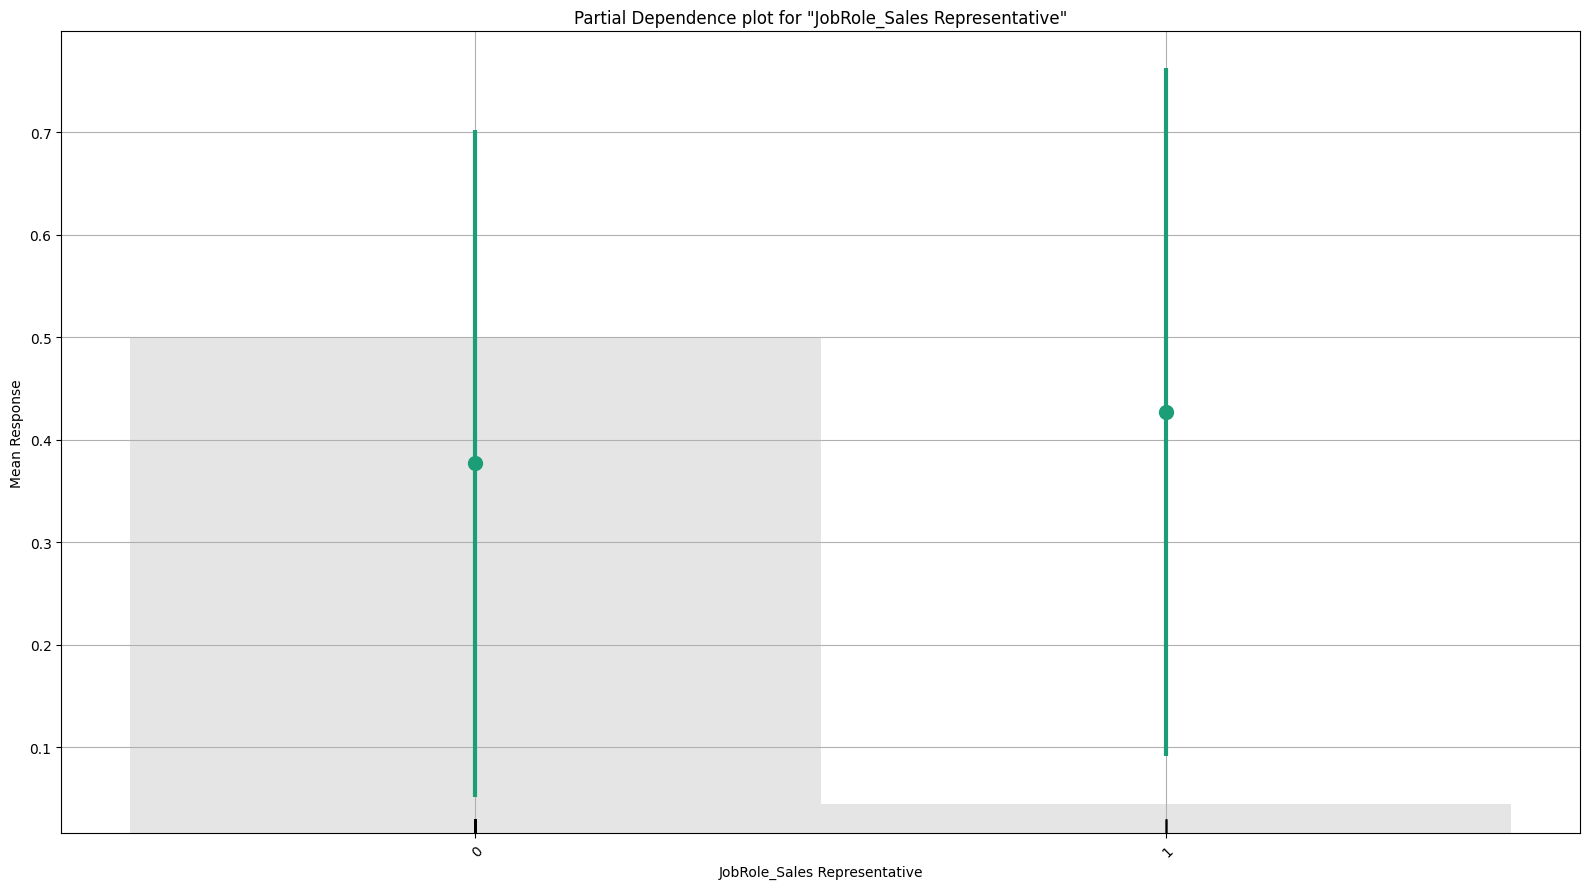

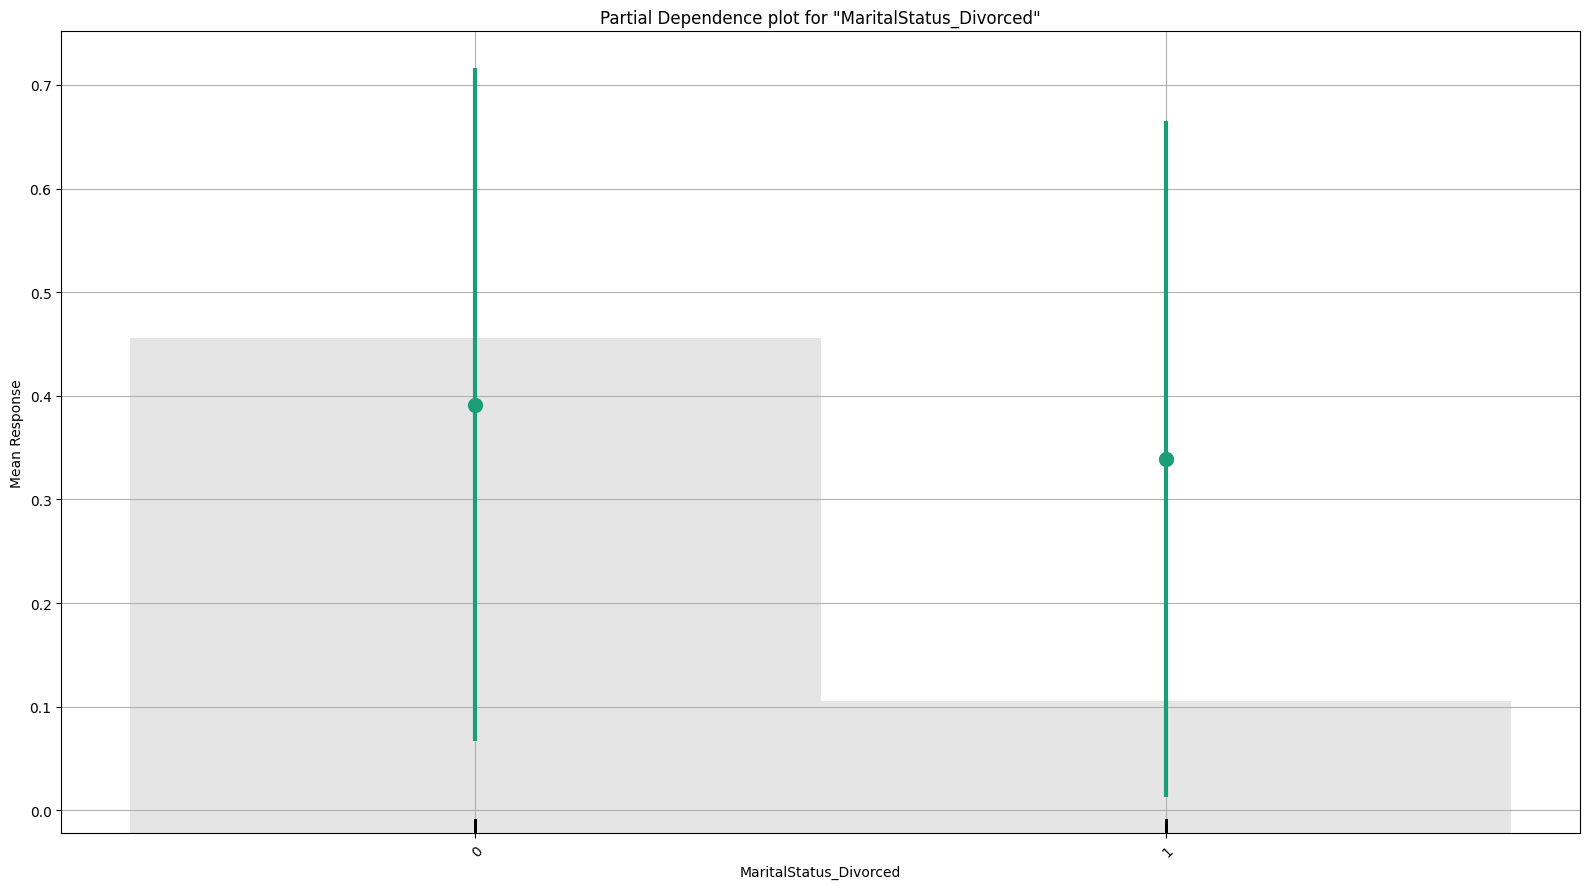

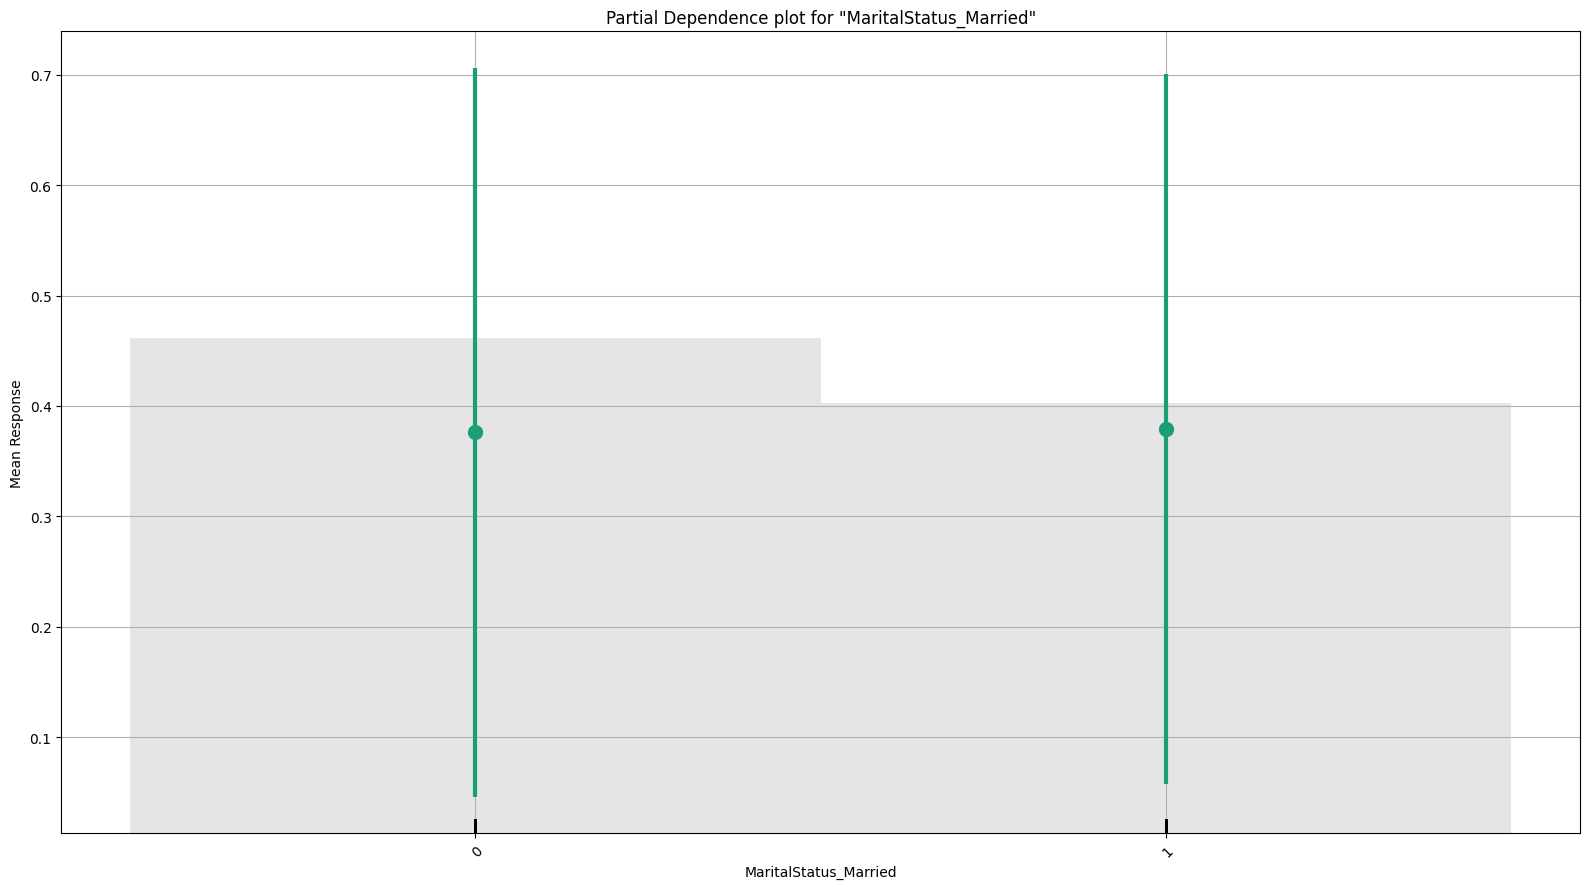

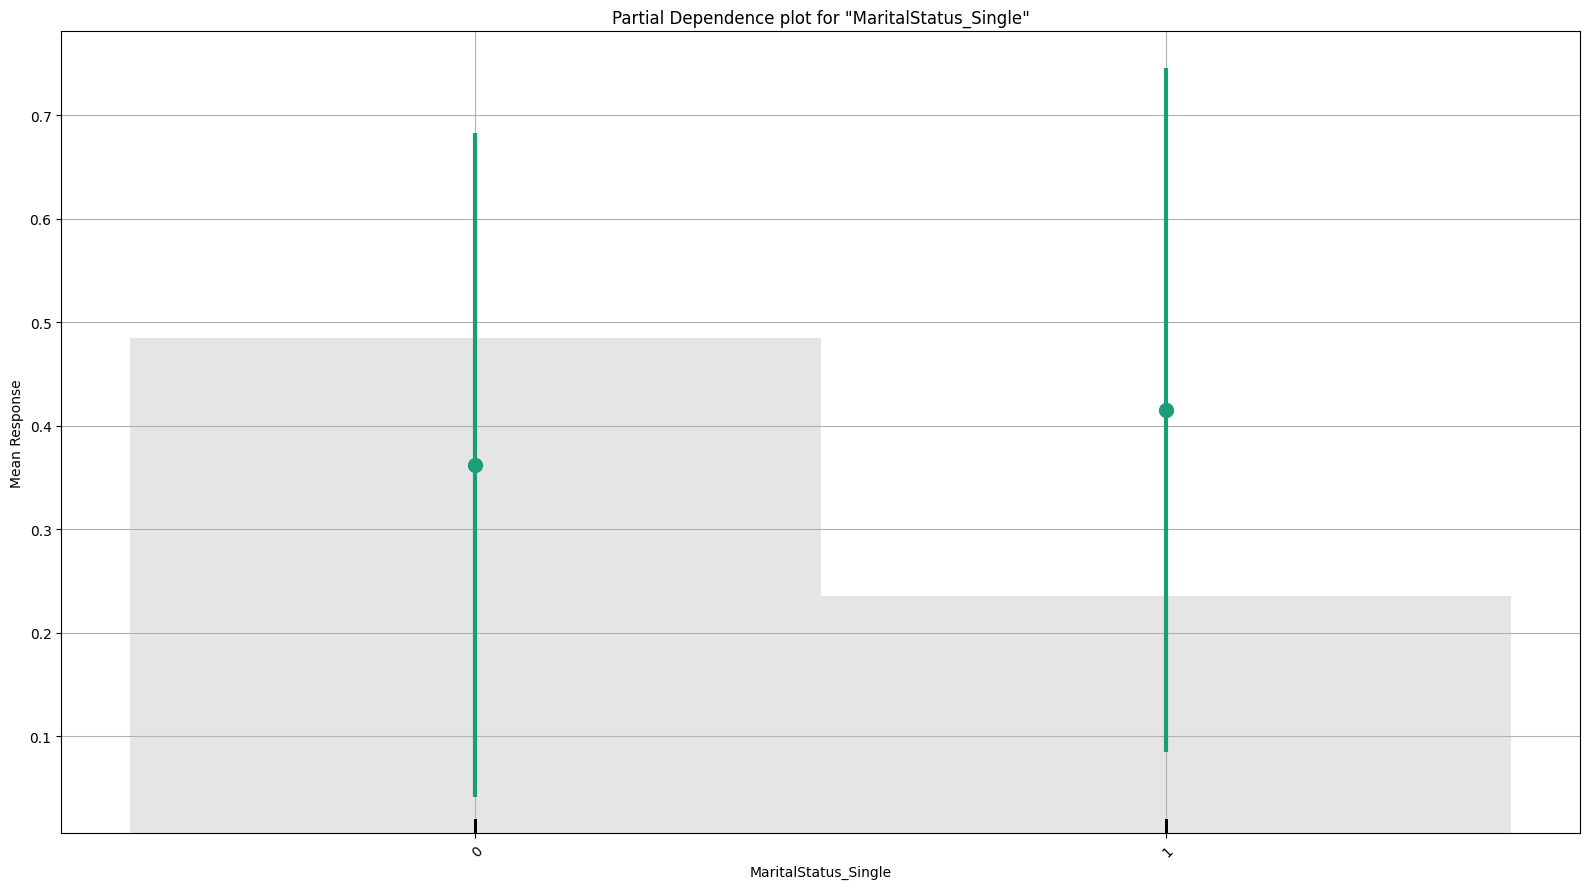

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_133320

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9000002498569855
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      366  18   0.0469   (18.0/384.0)
1      27   30   0.4737   (27.0/57.0)
Total  393  48   0.102    (45.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

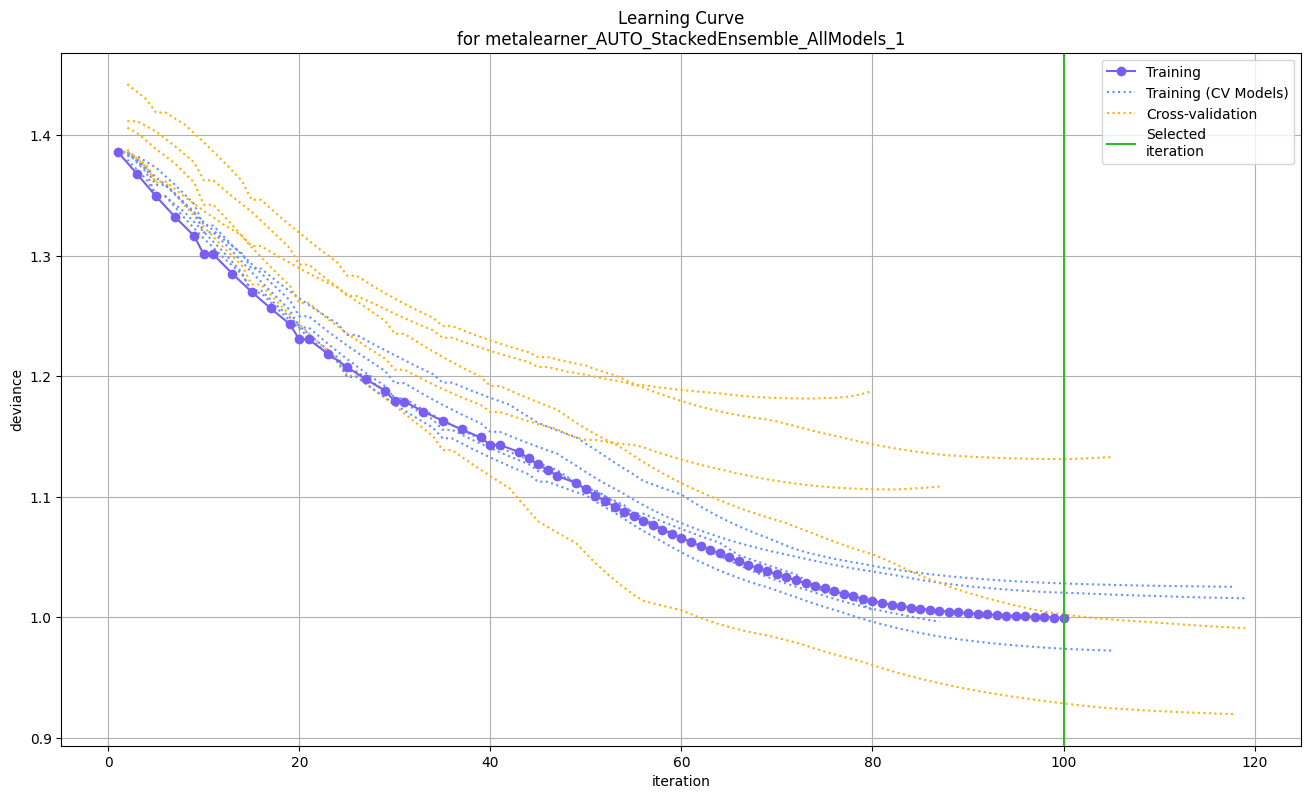

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

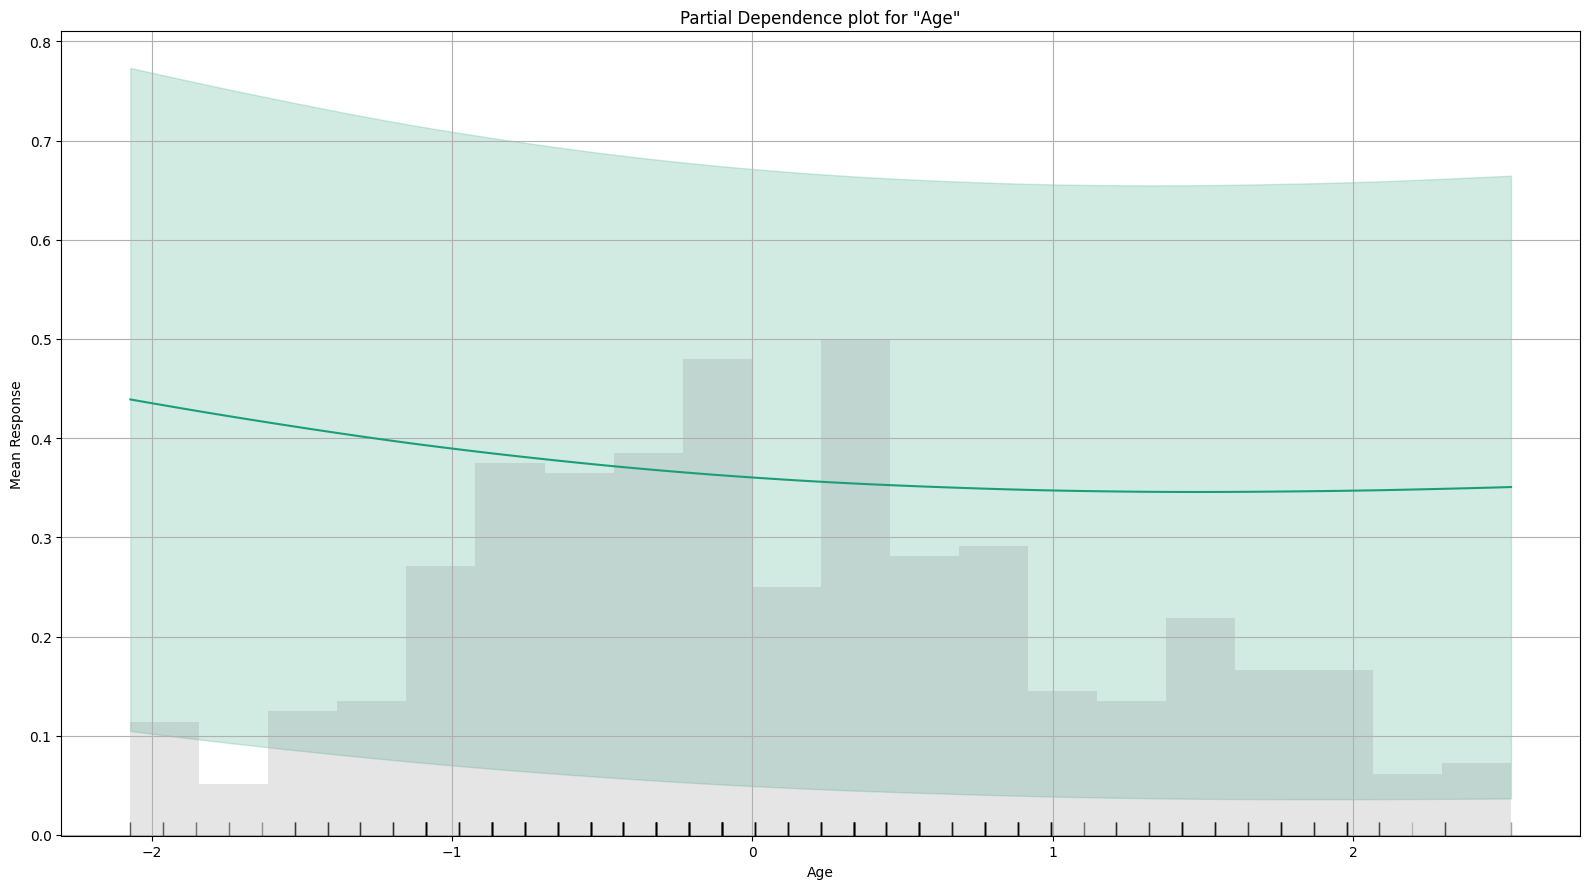

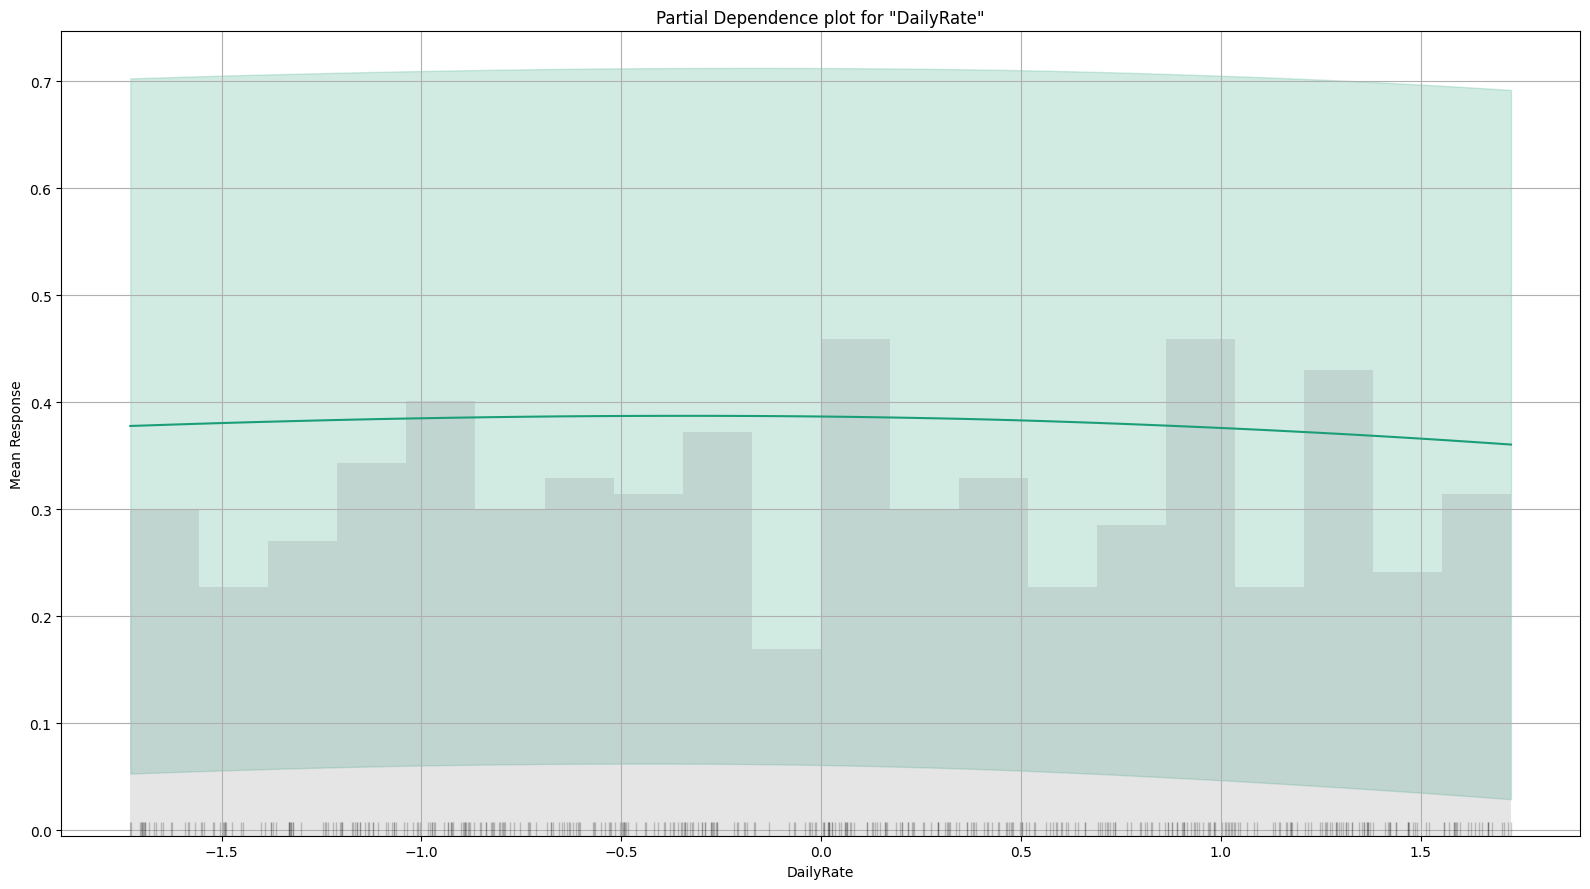

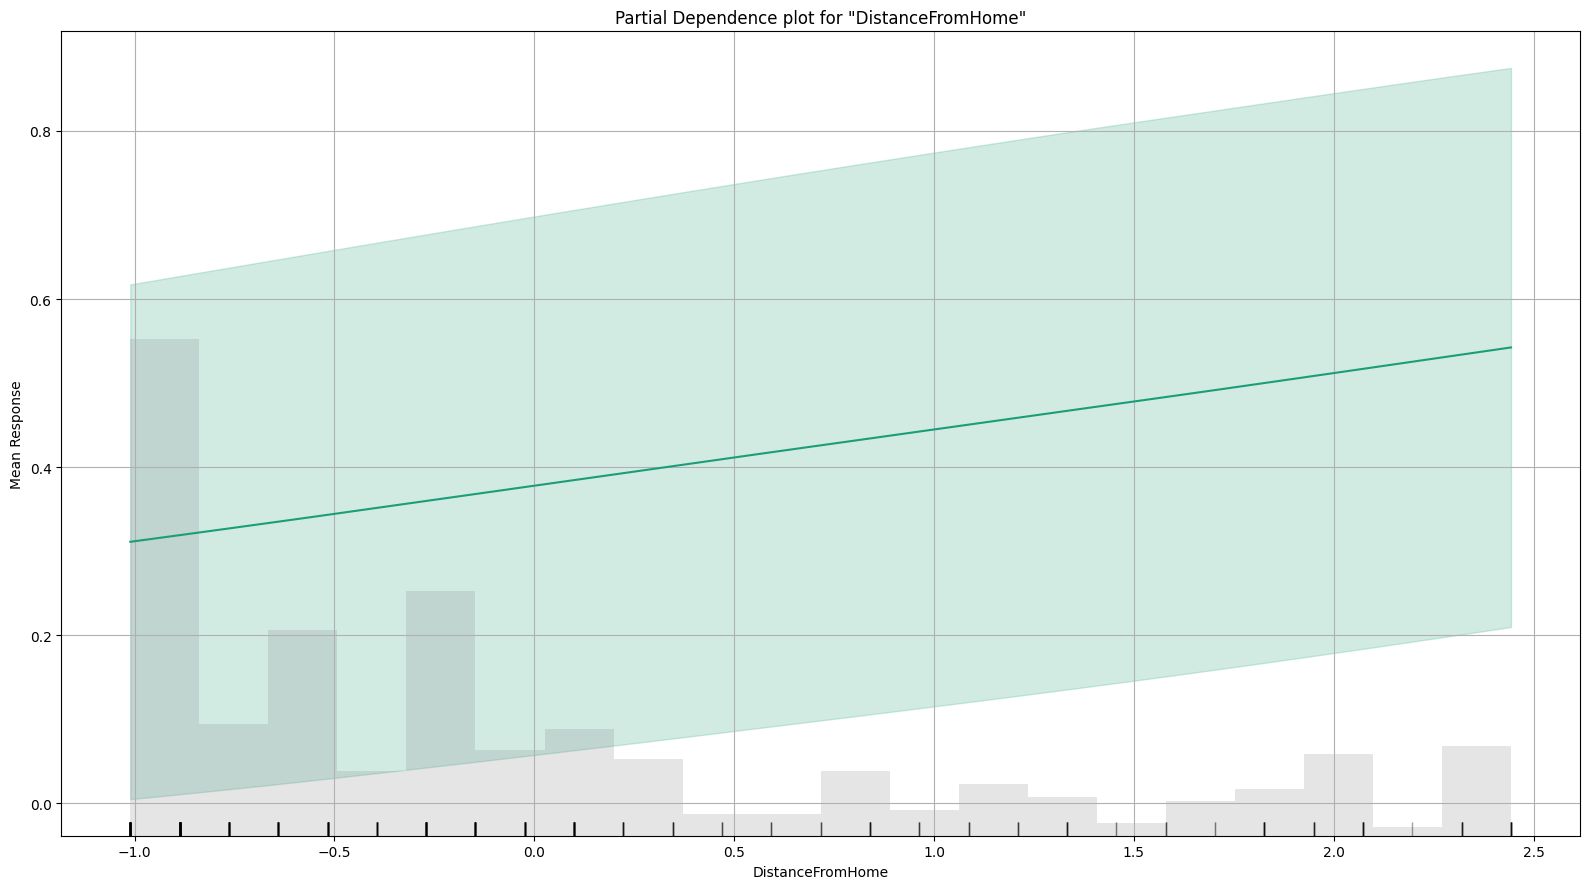

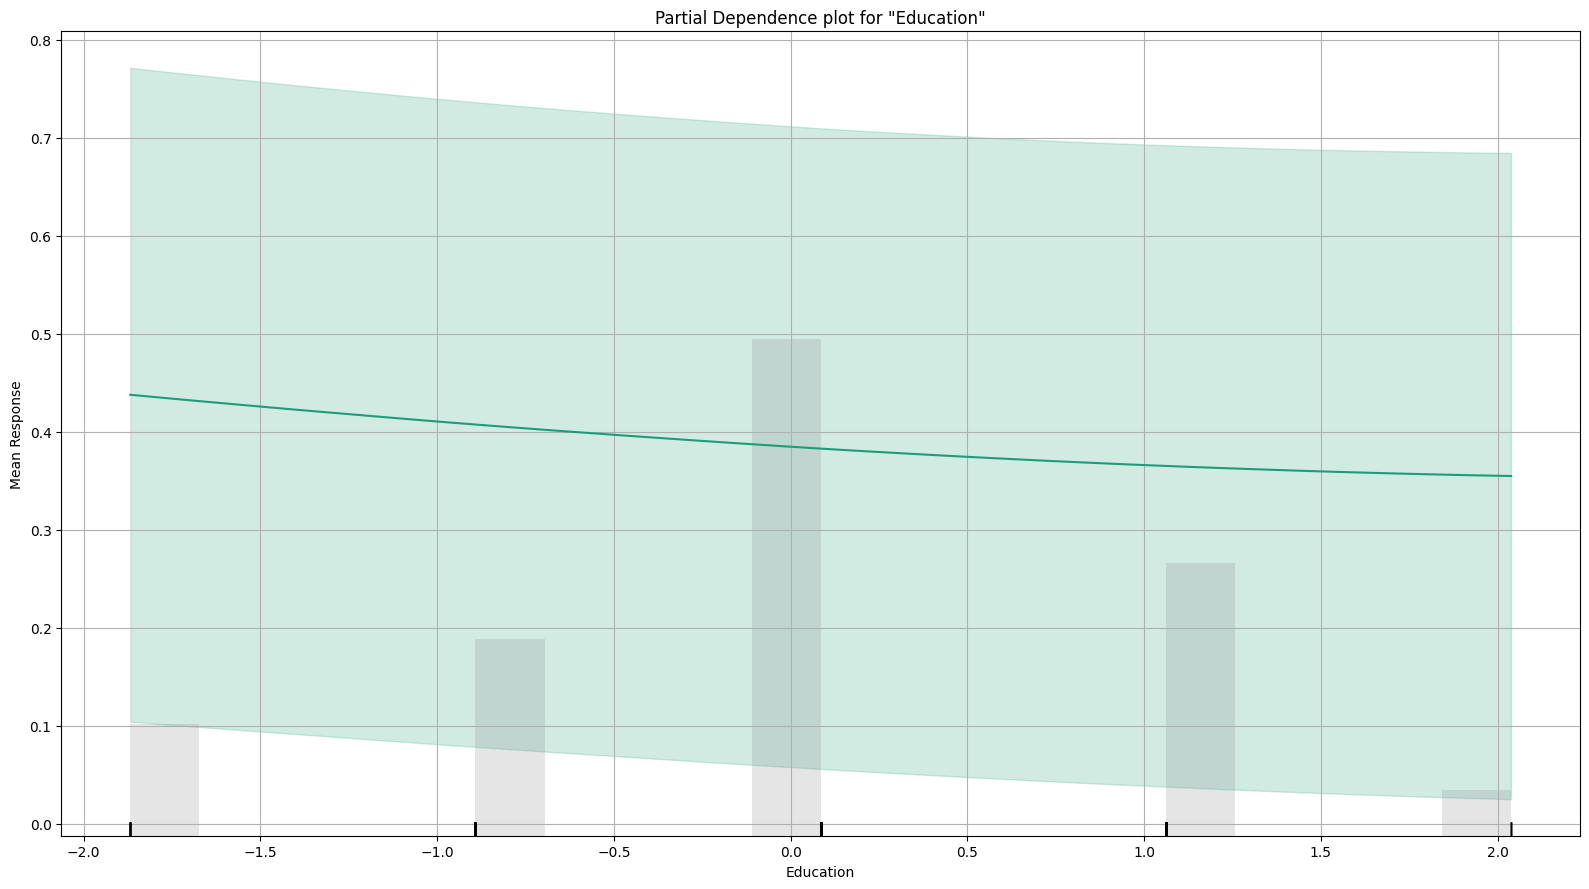

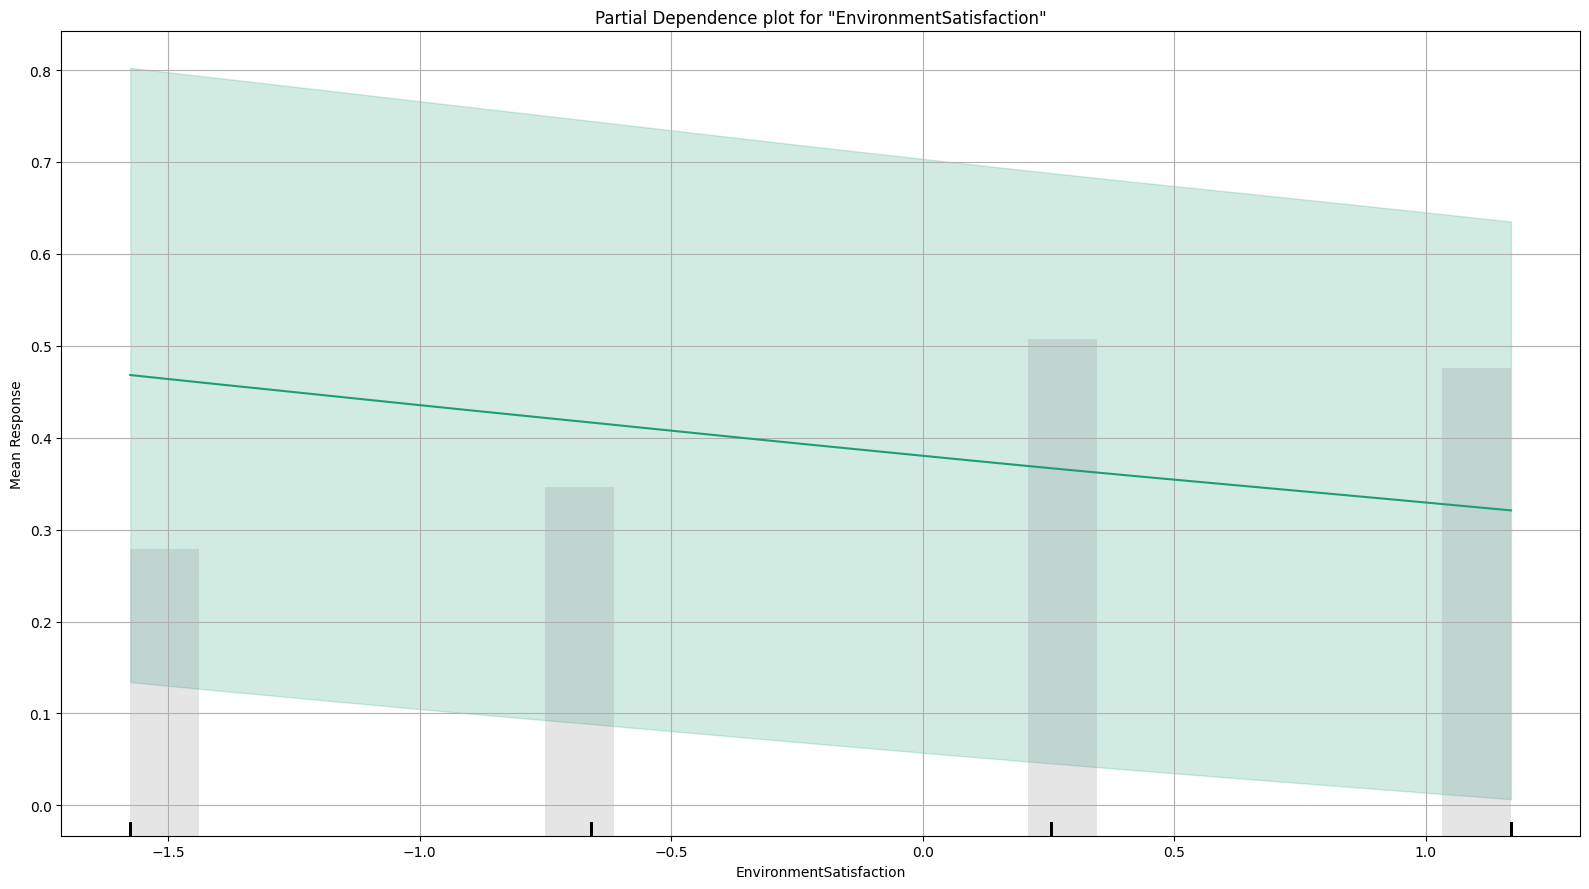

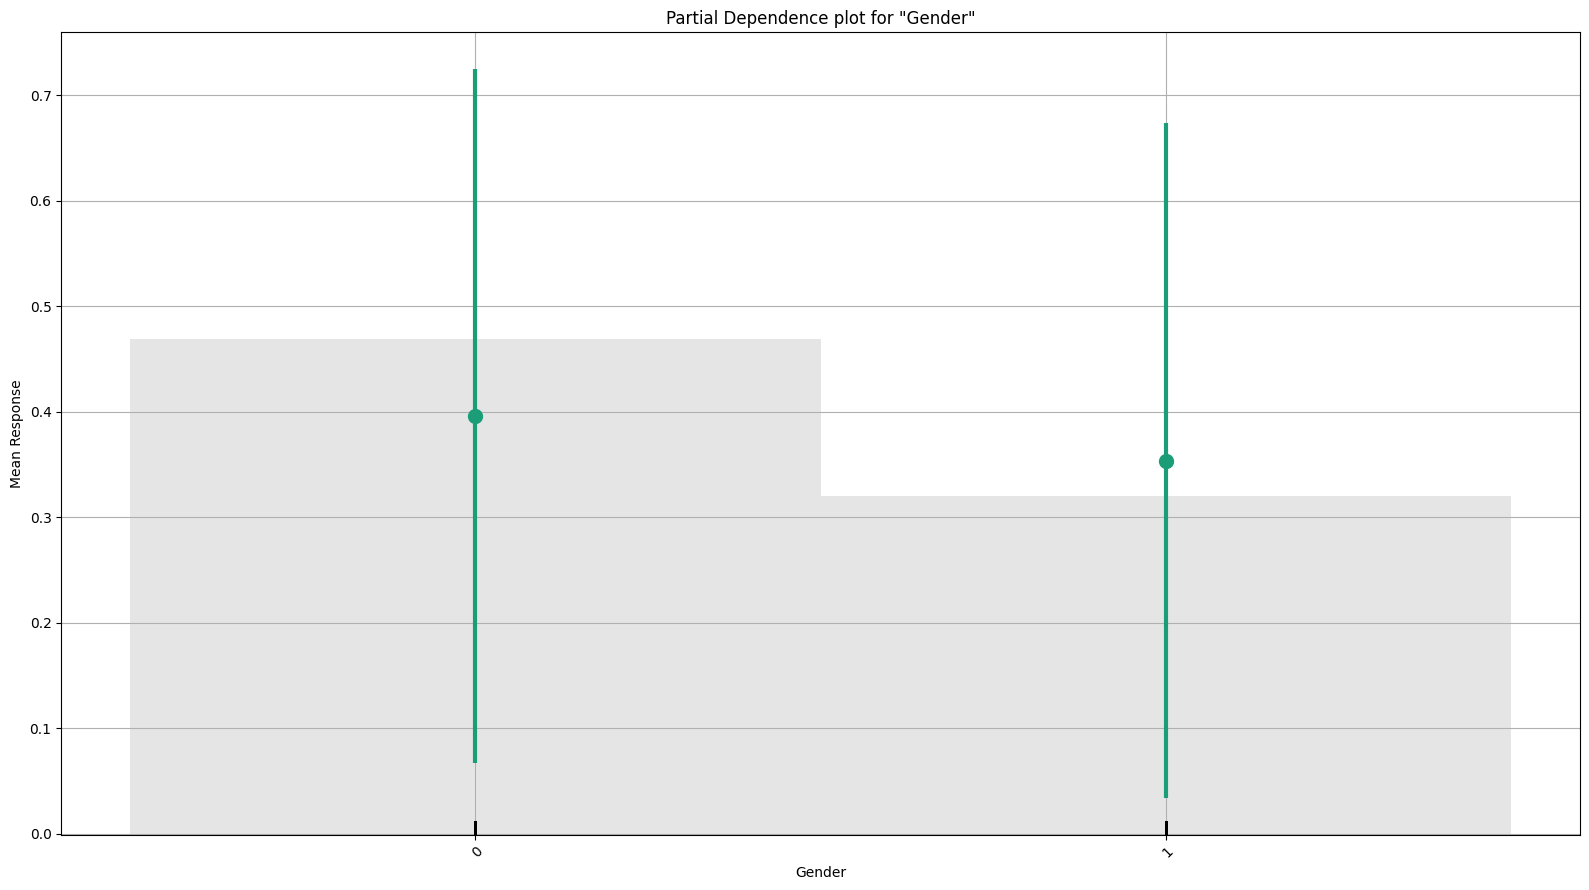

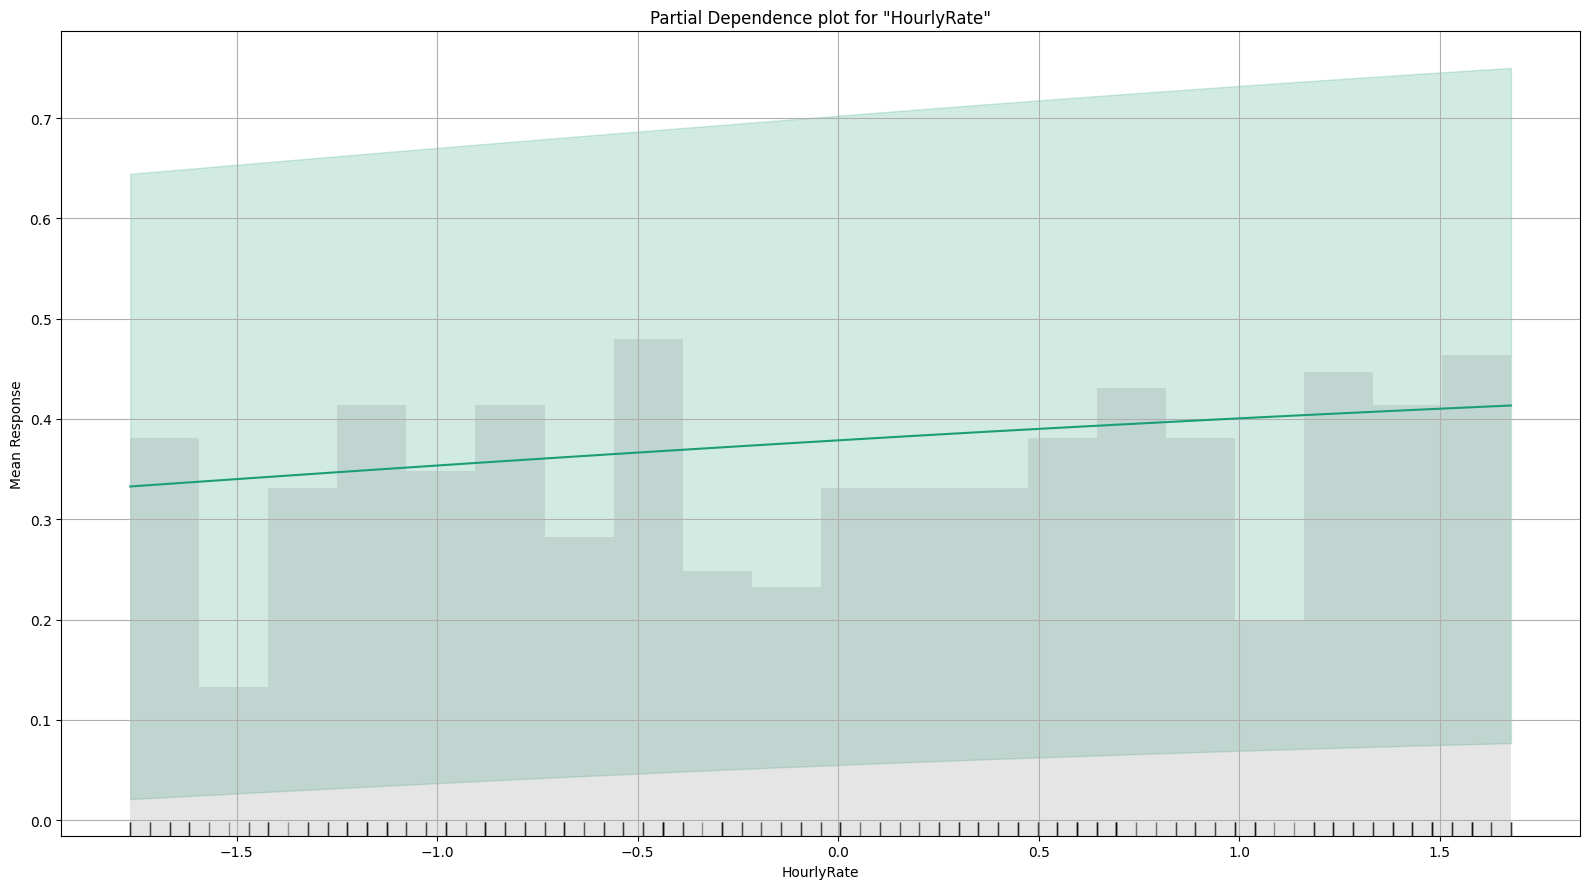

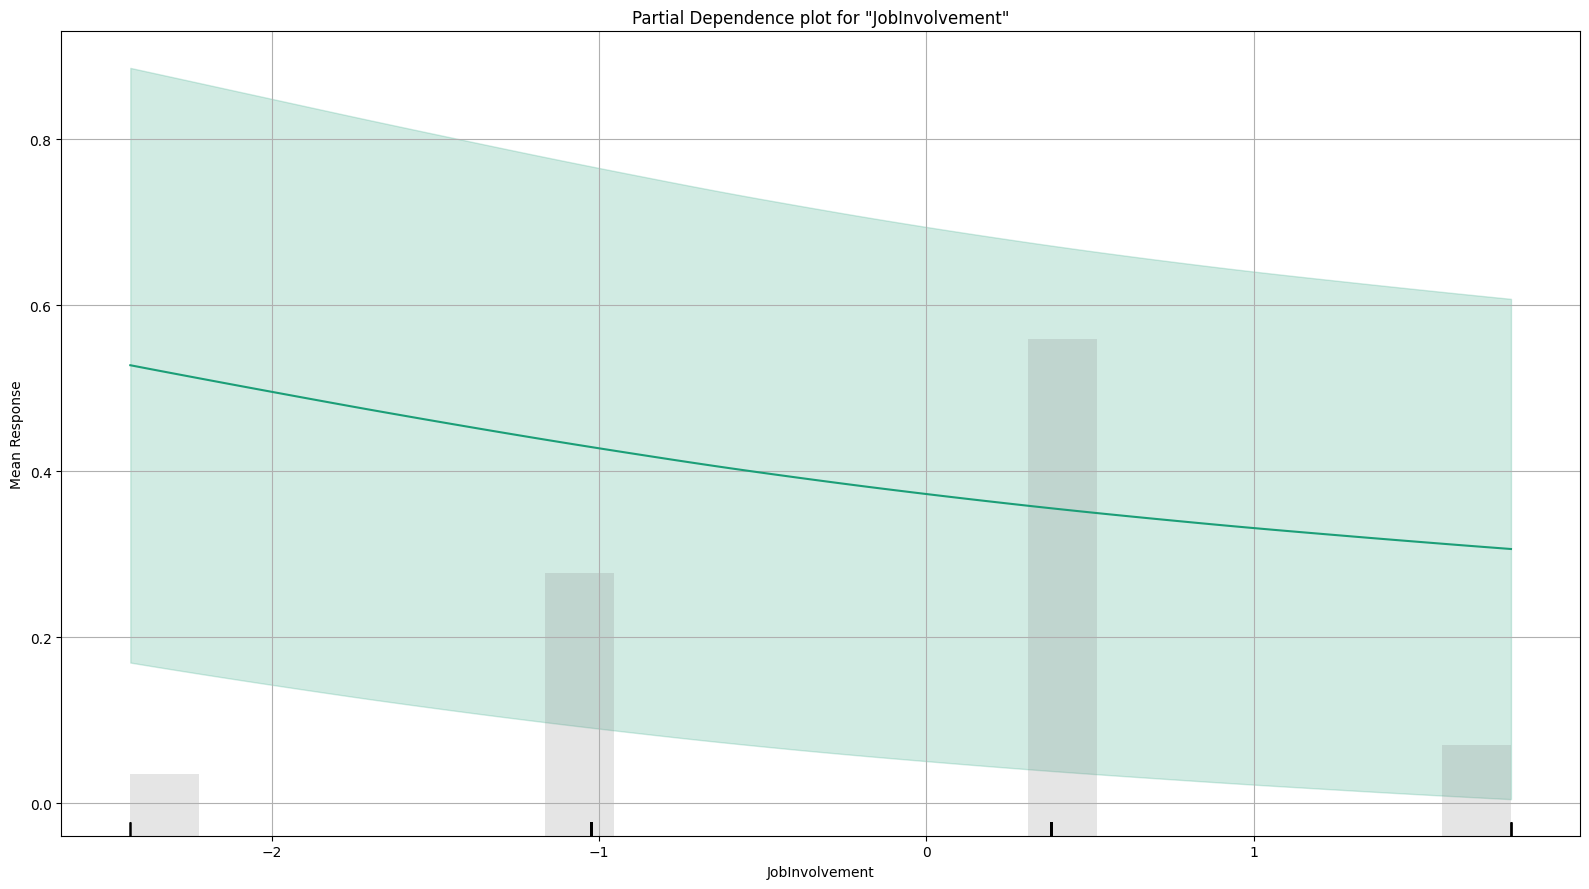

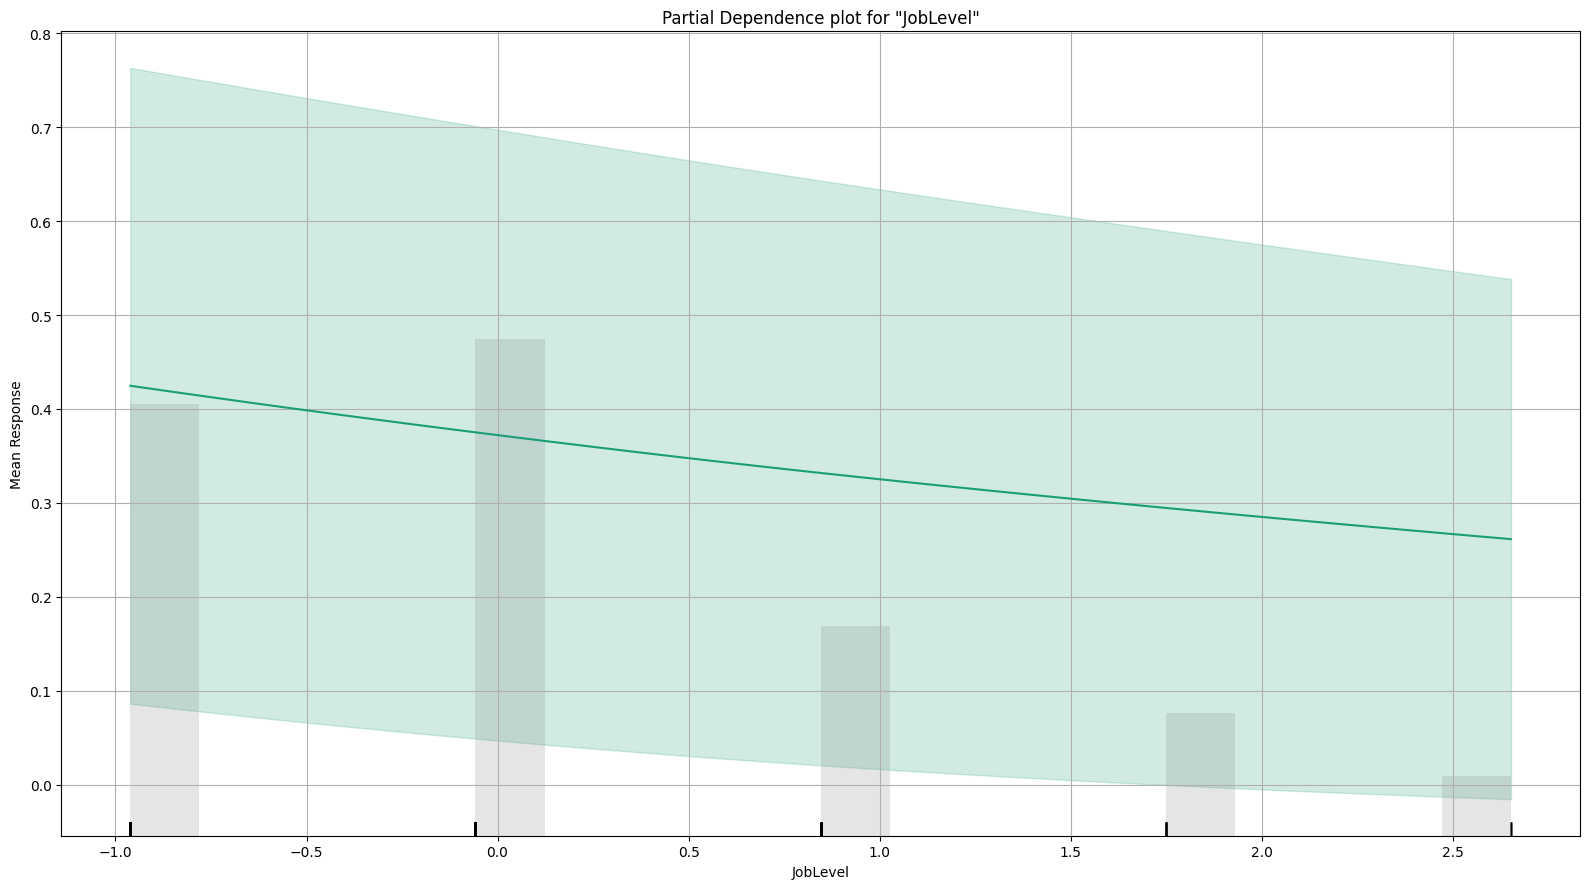

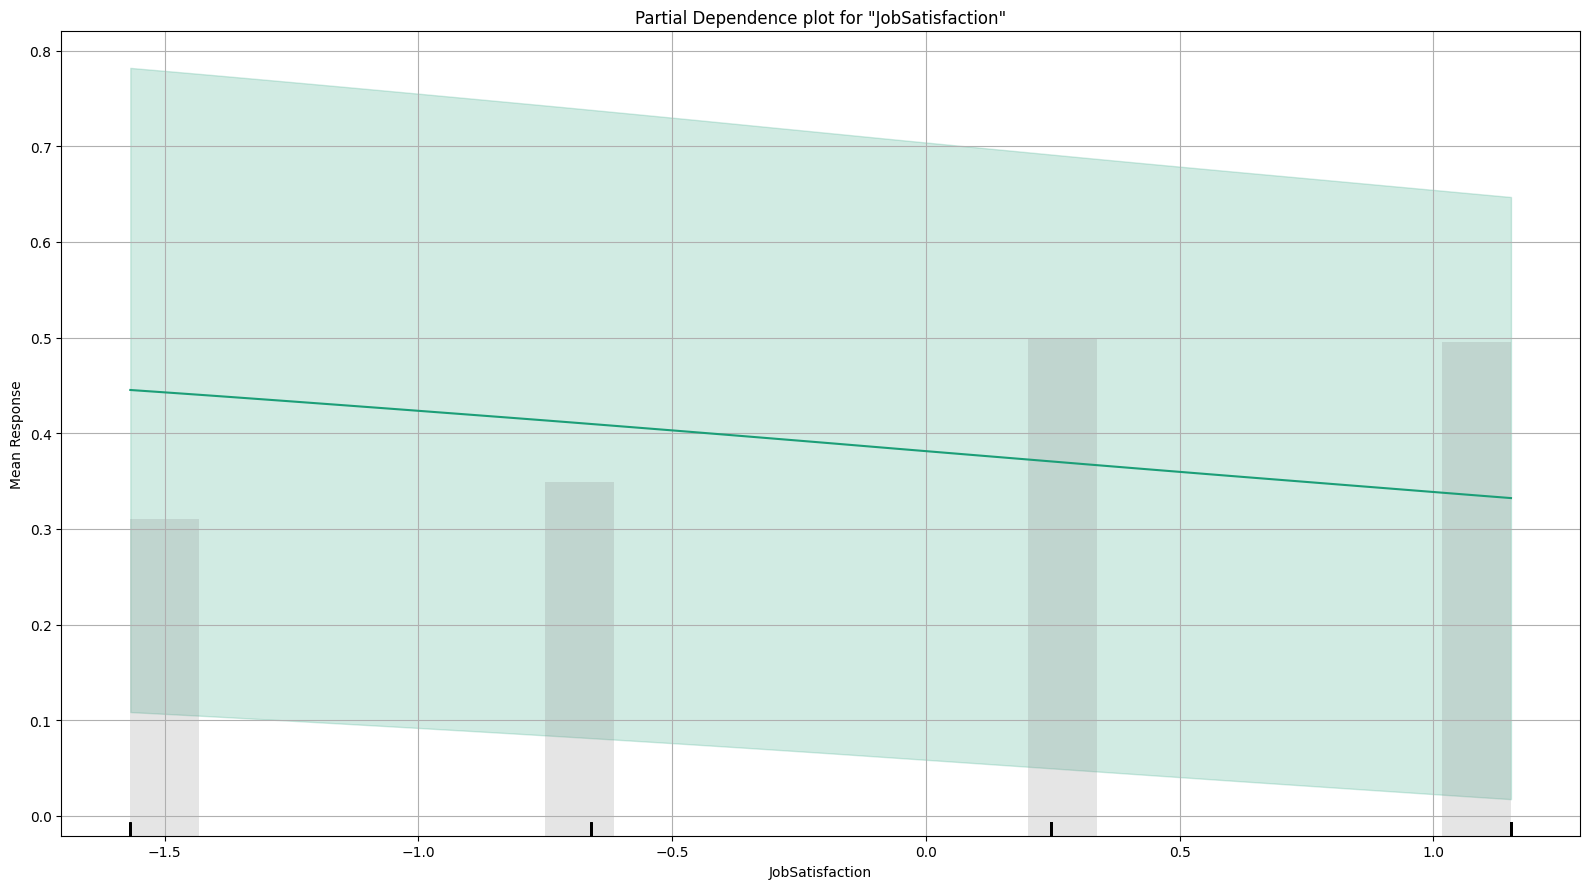

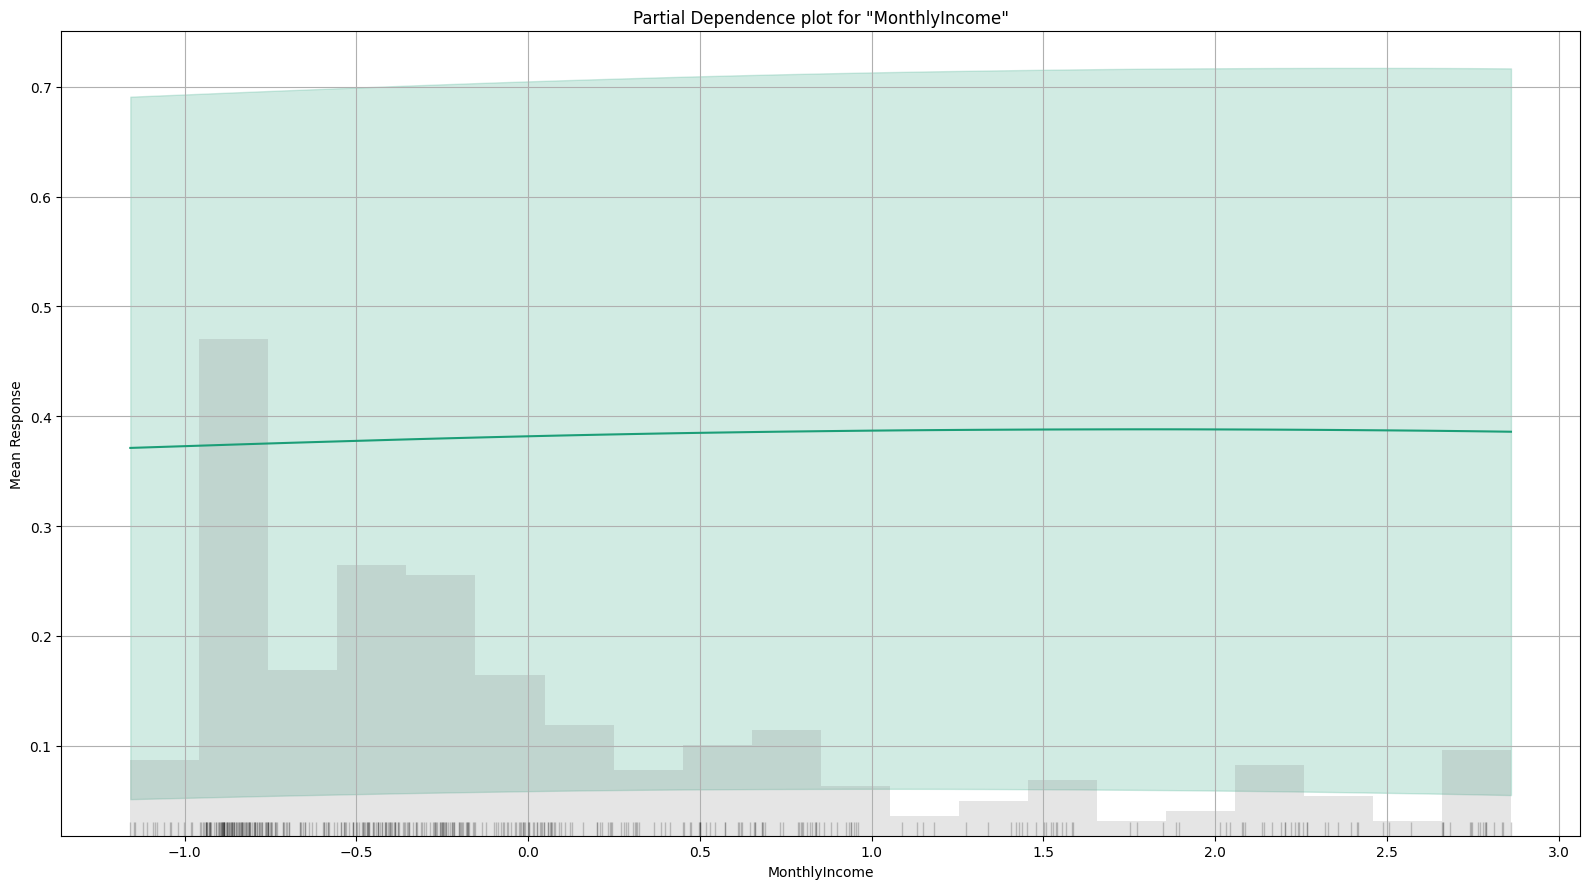

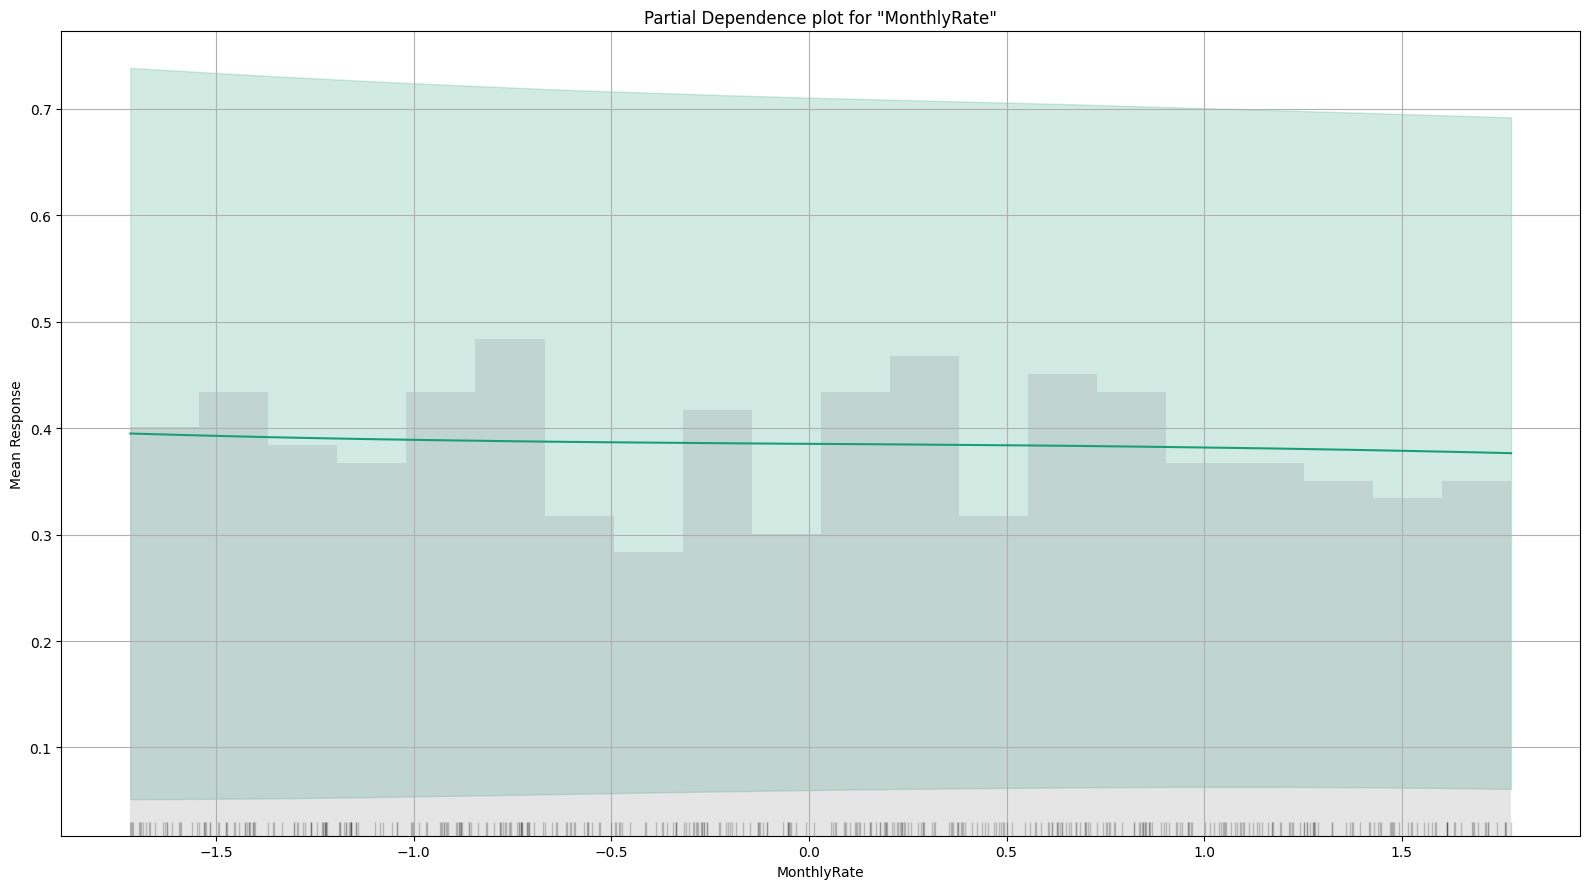

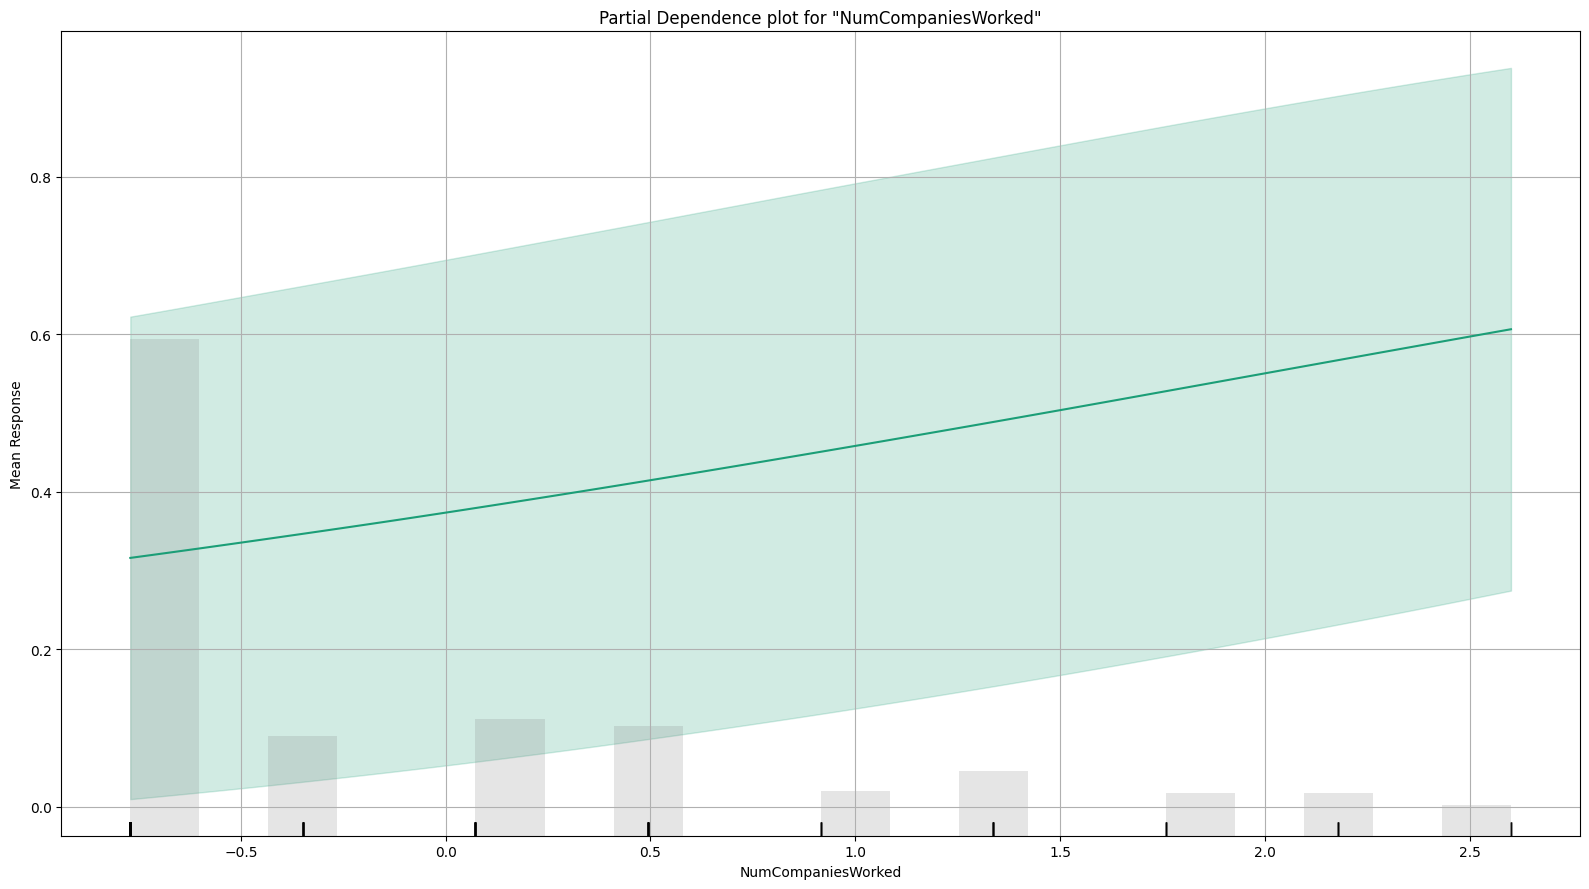

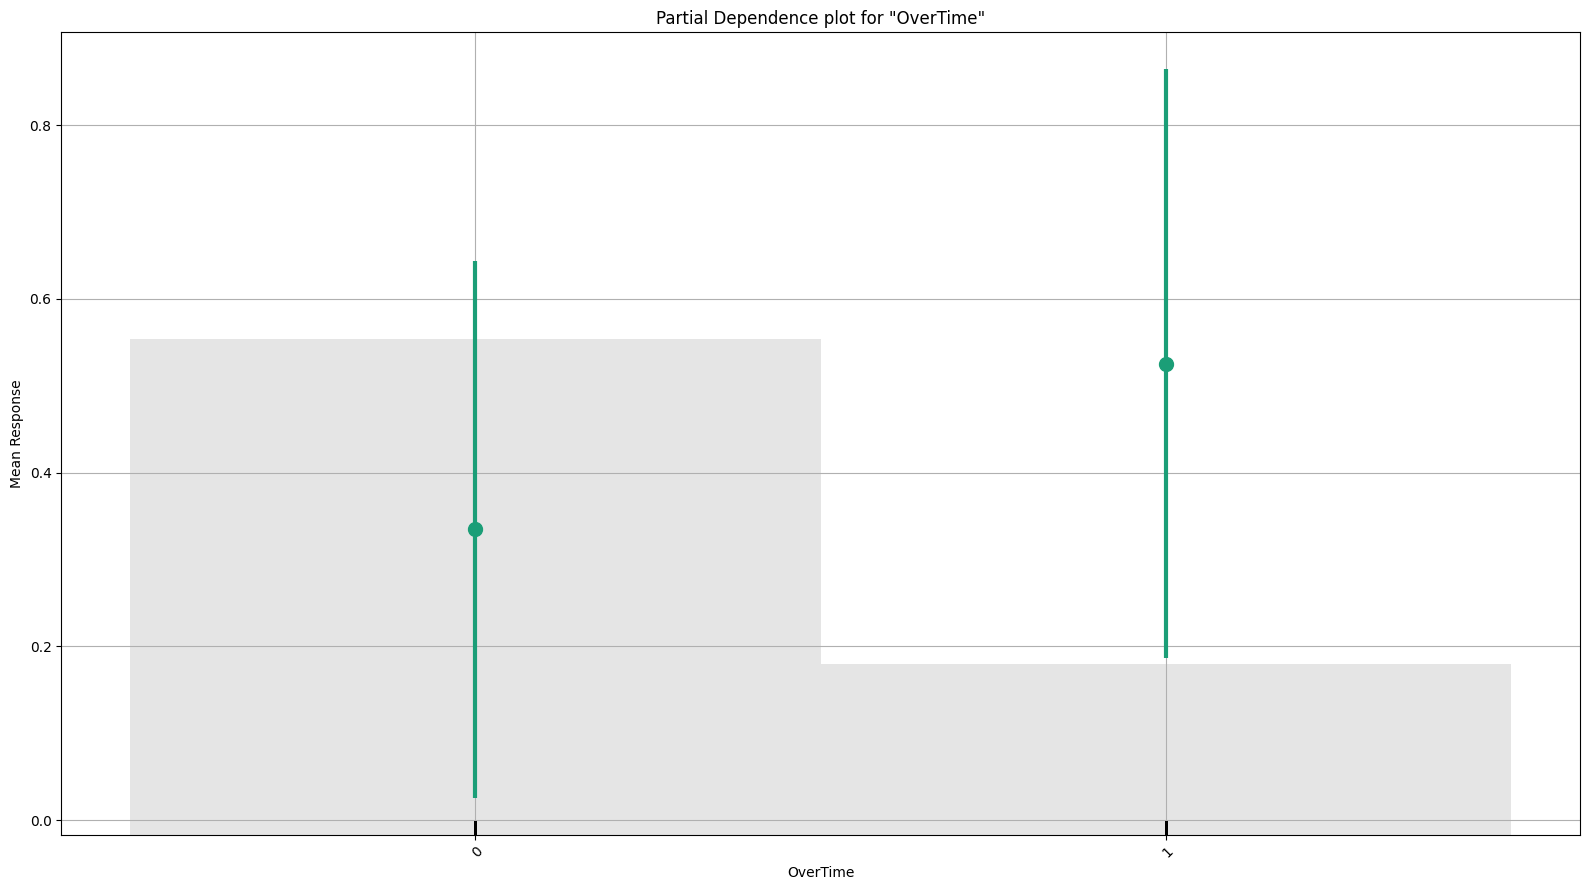

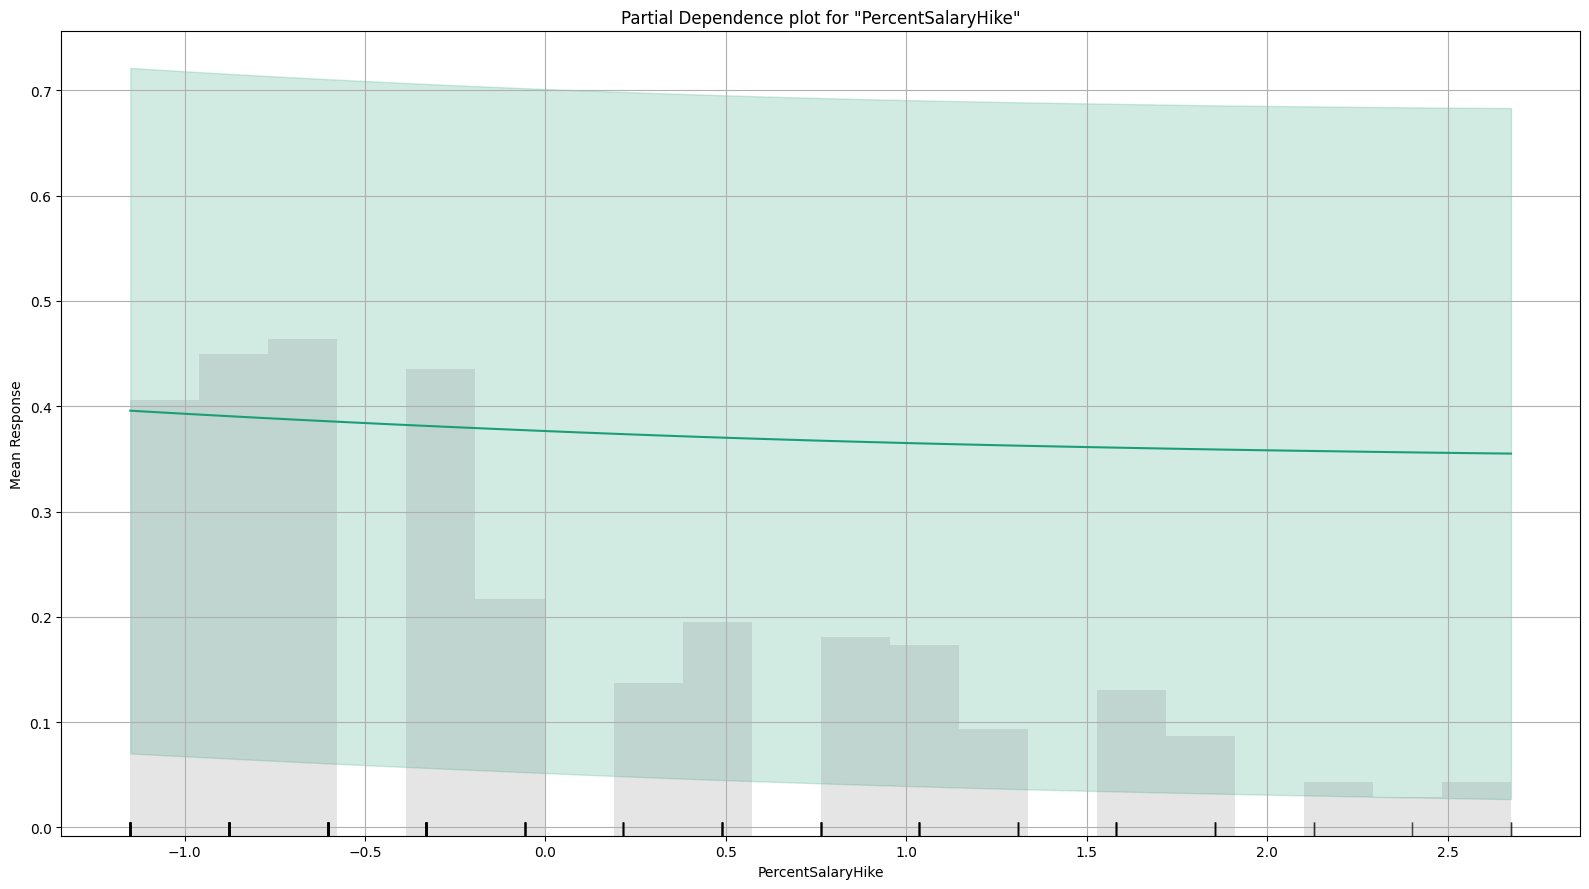

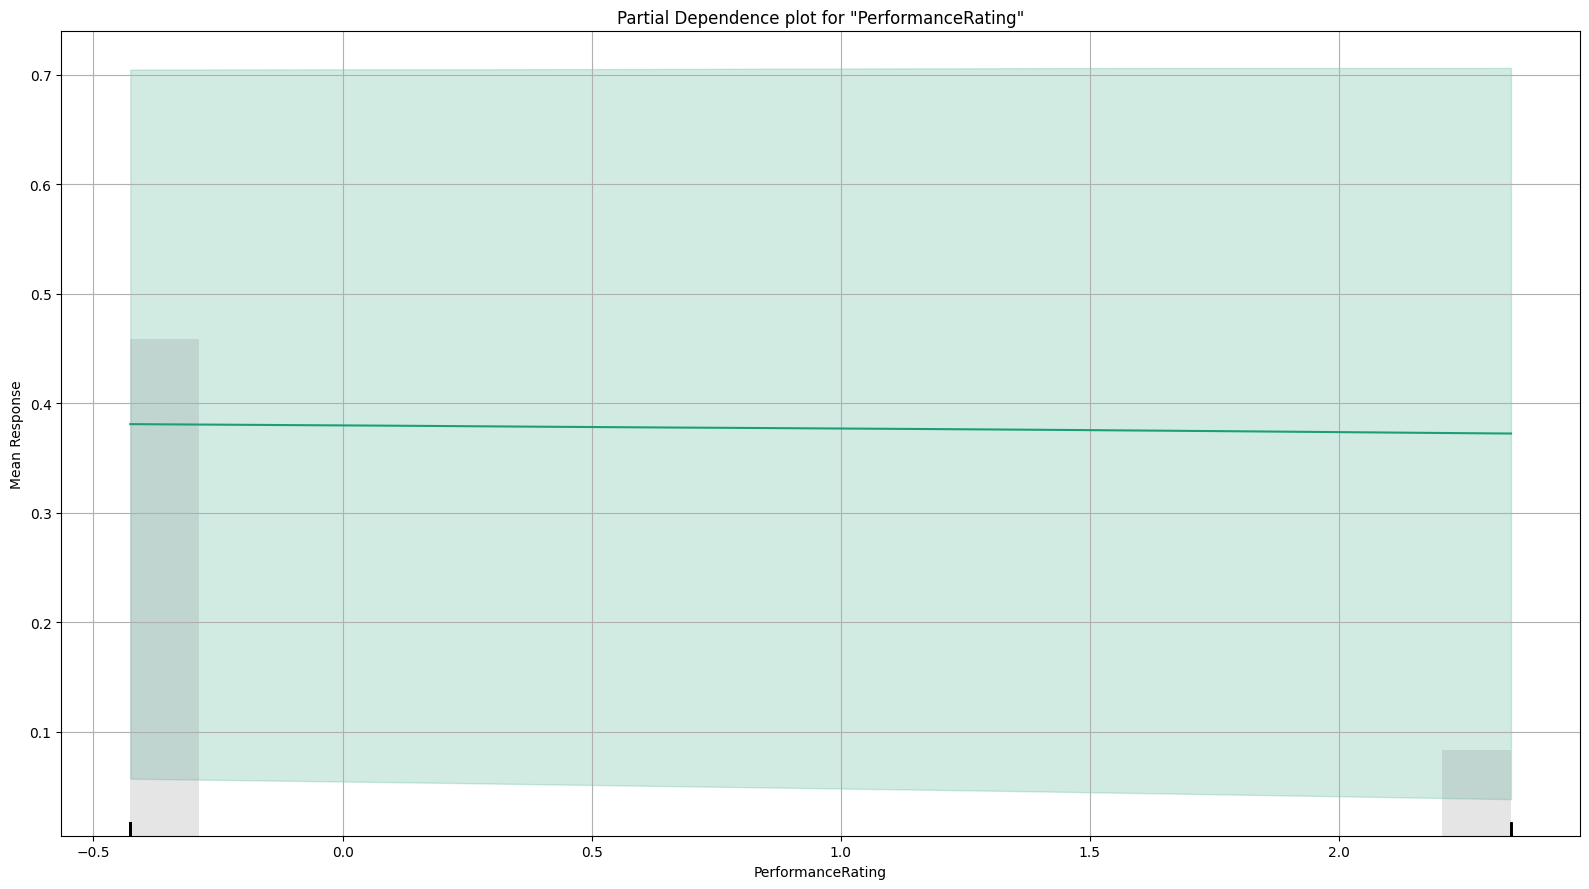

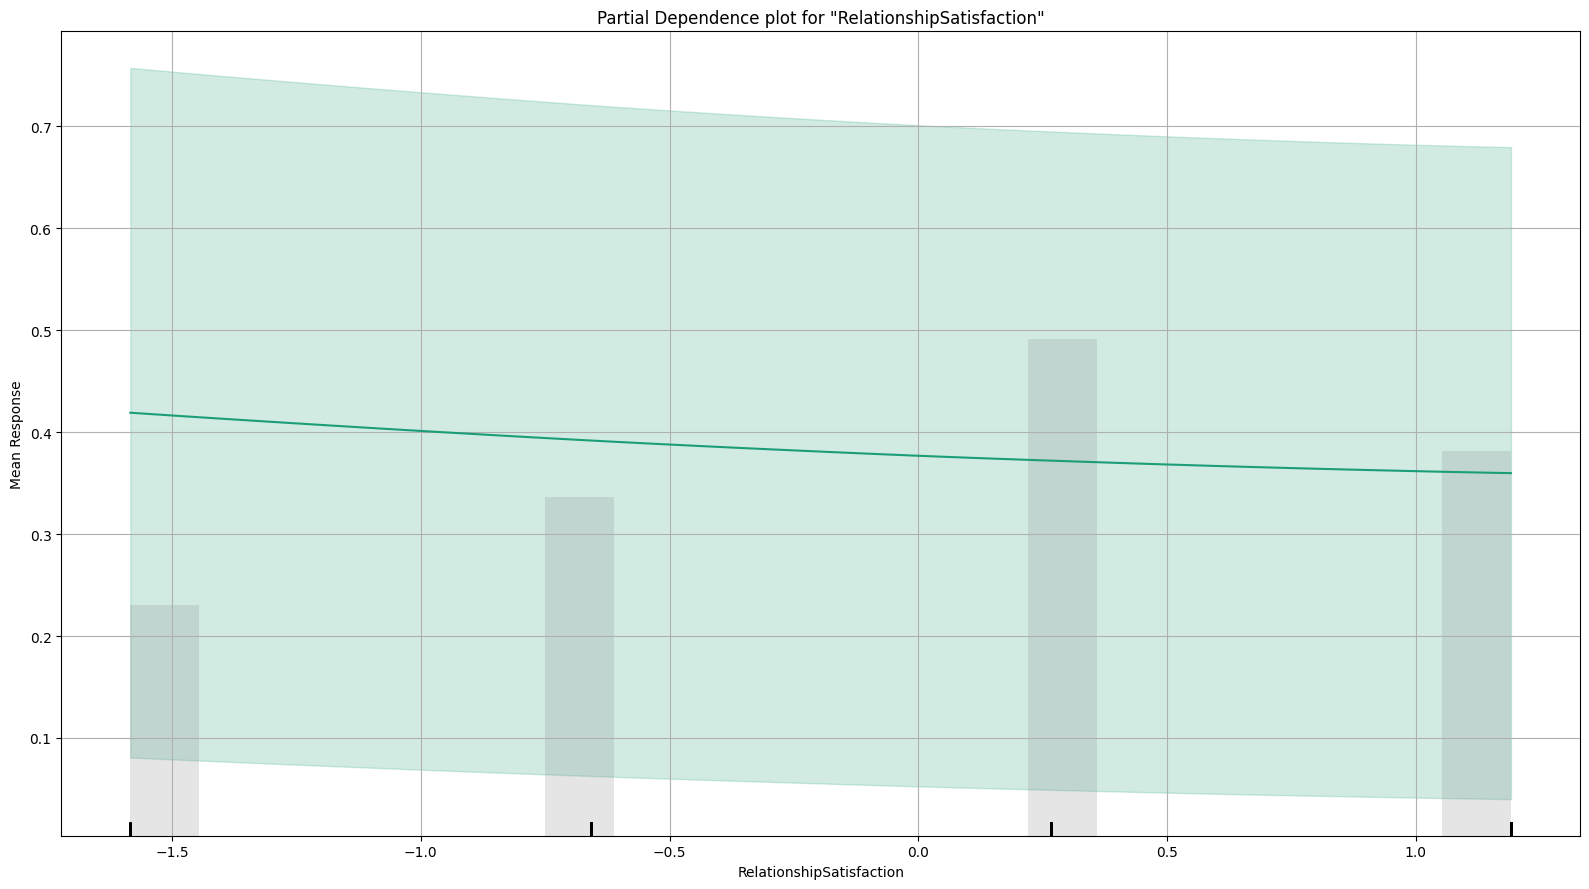

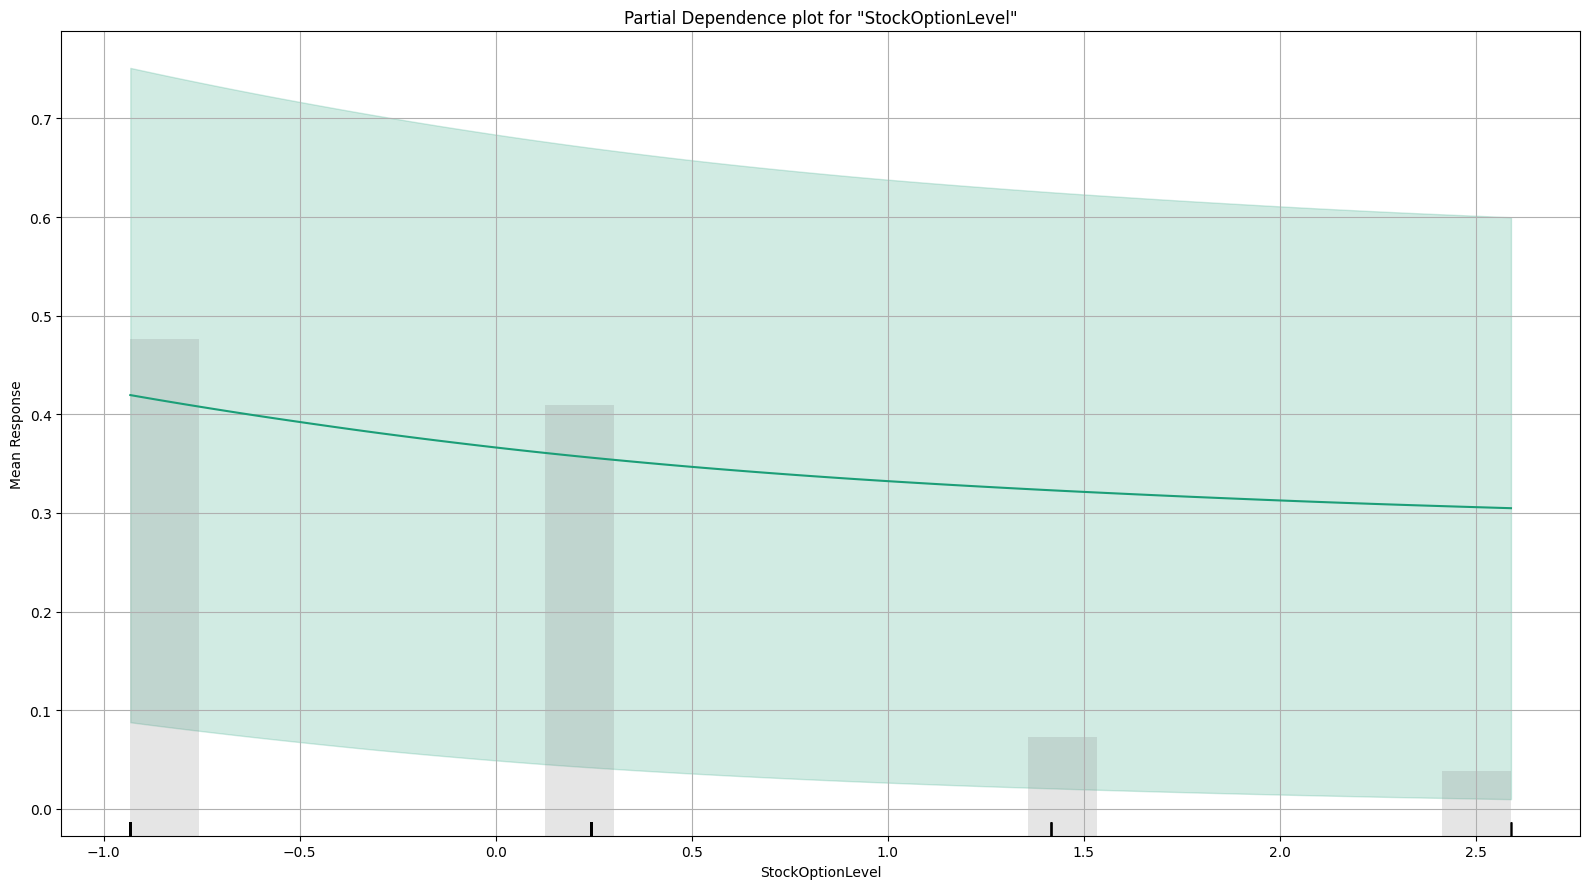

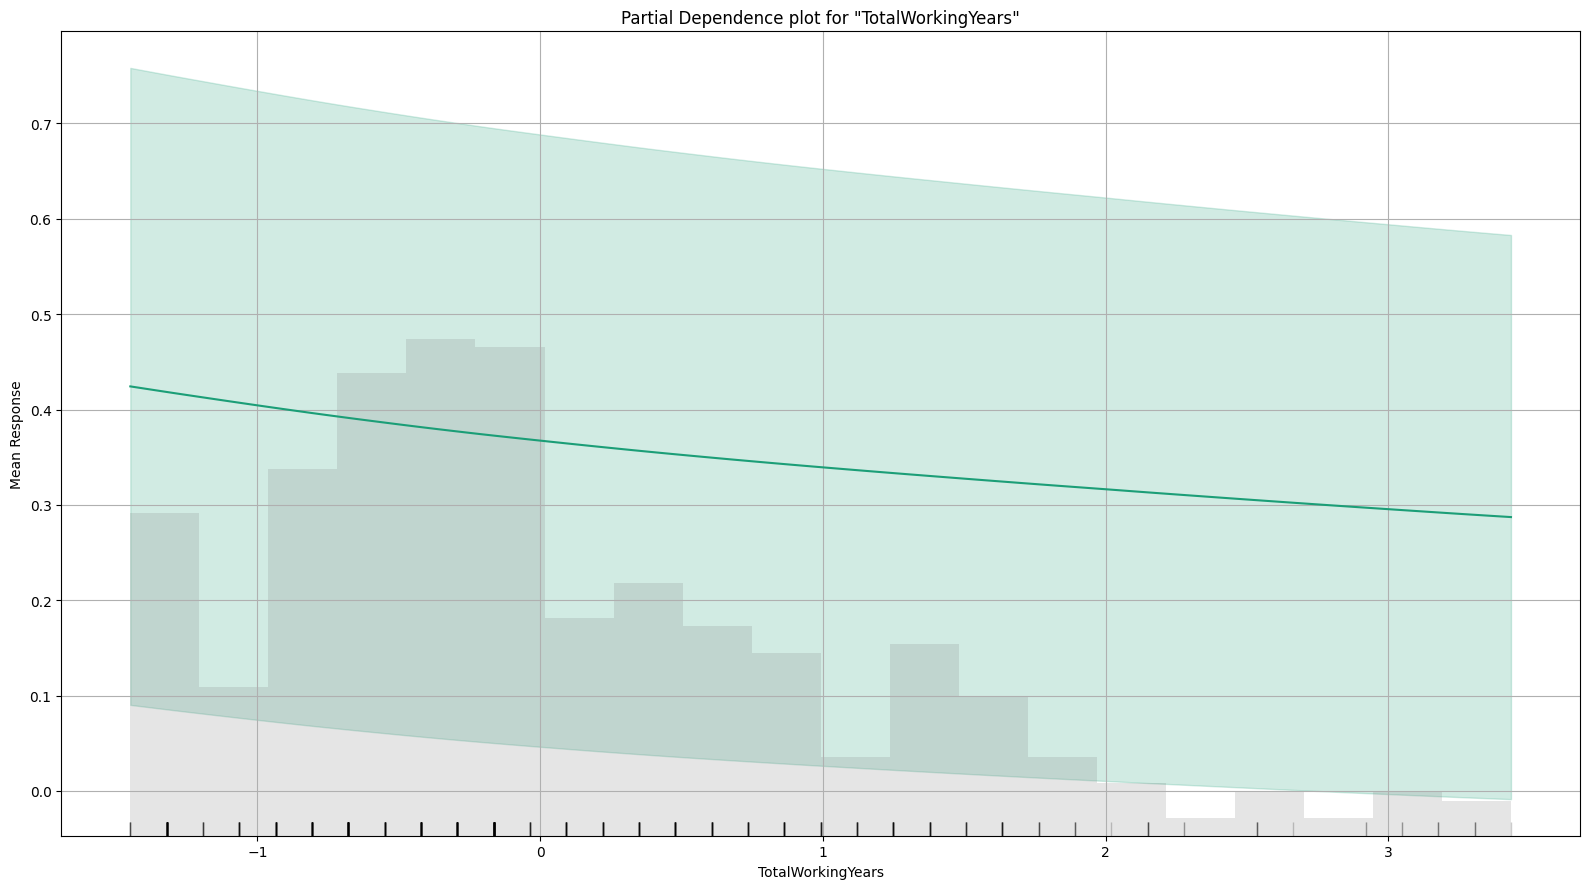

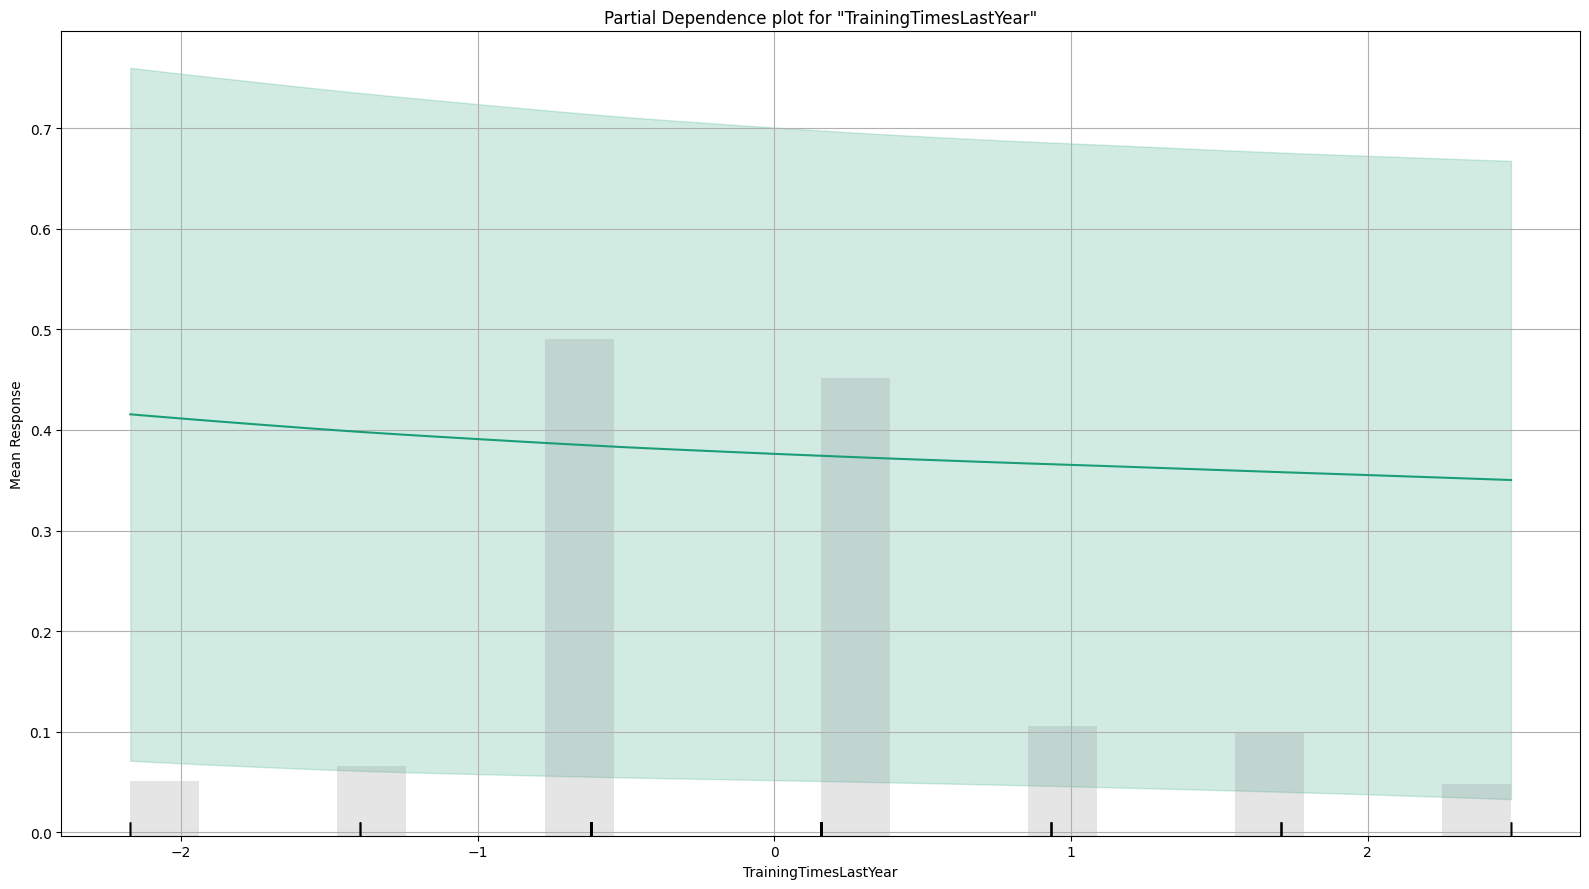

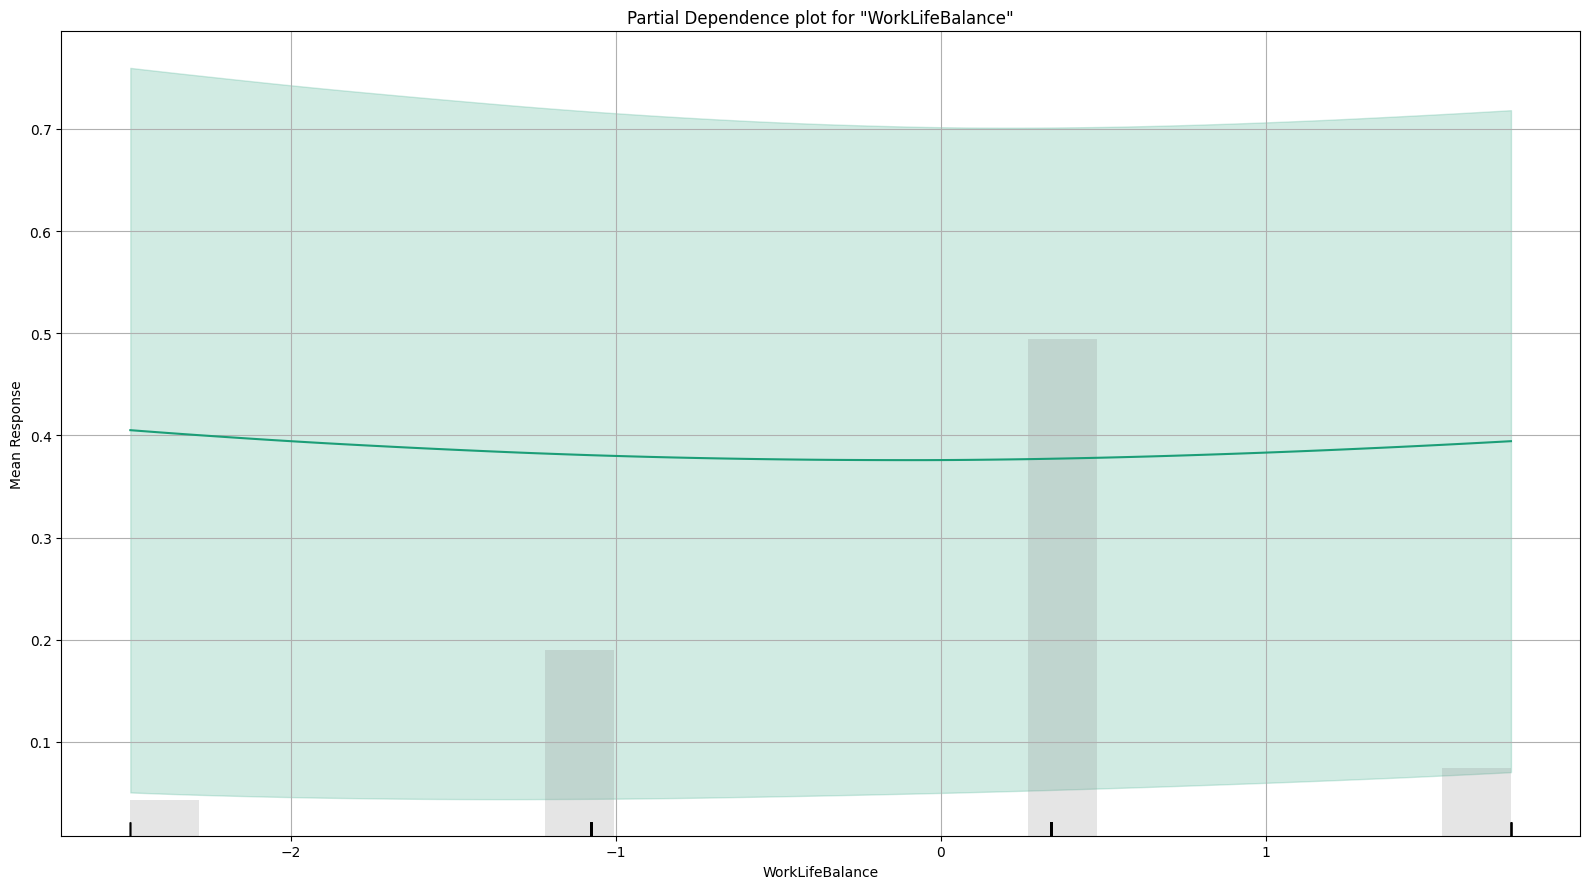

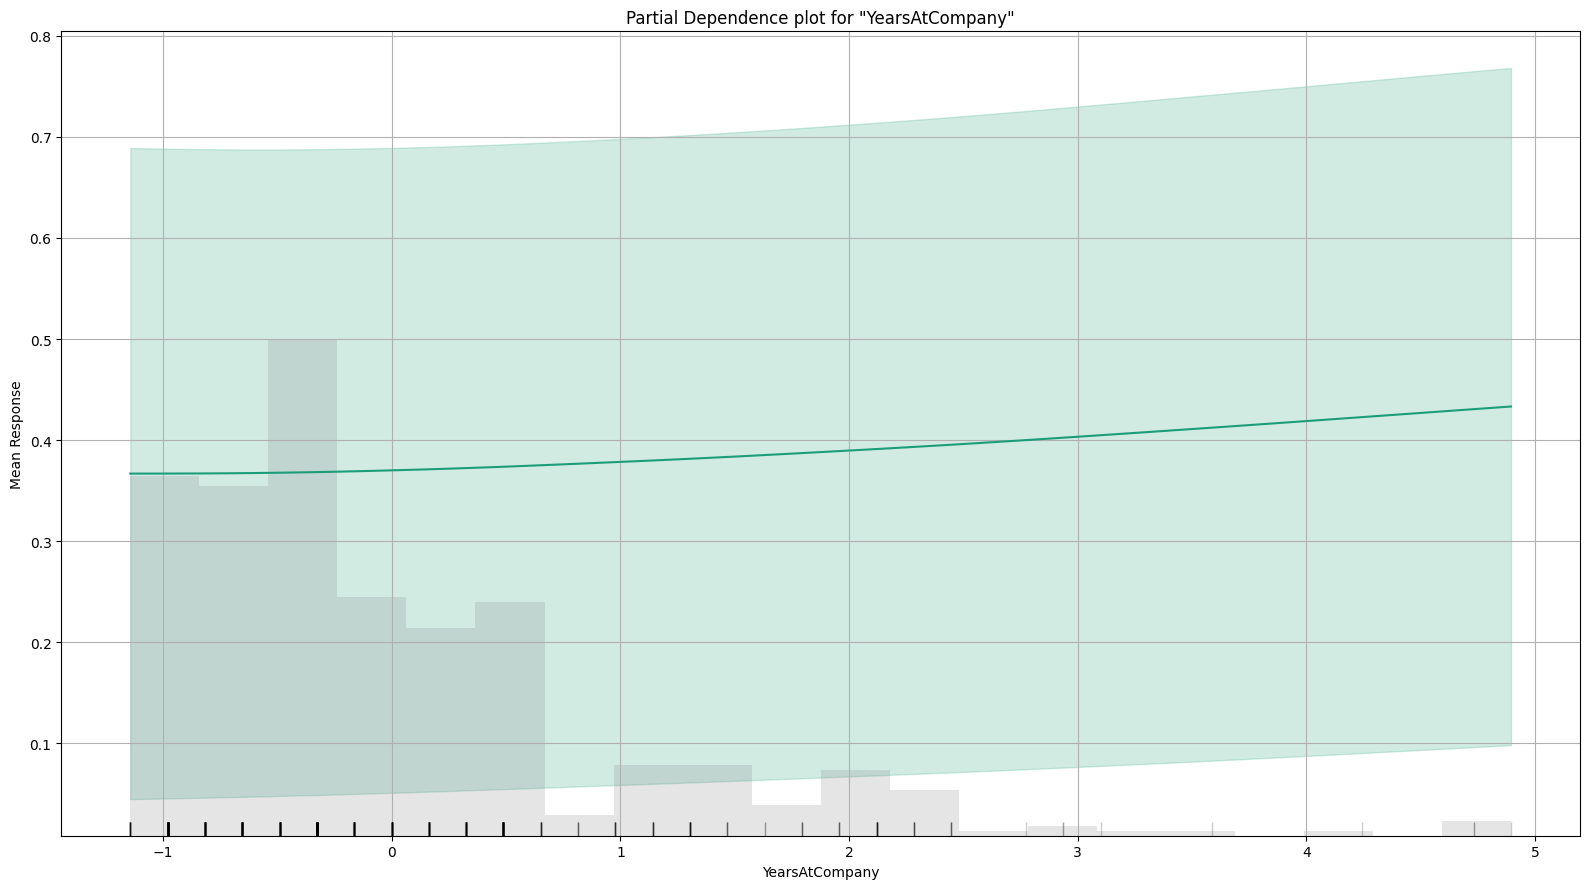

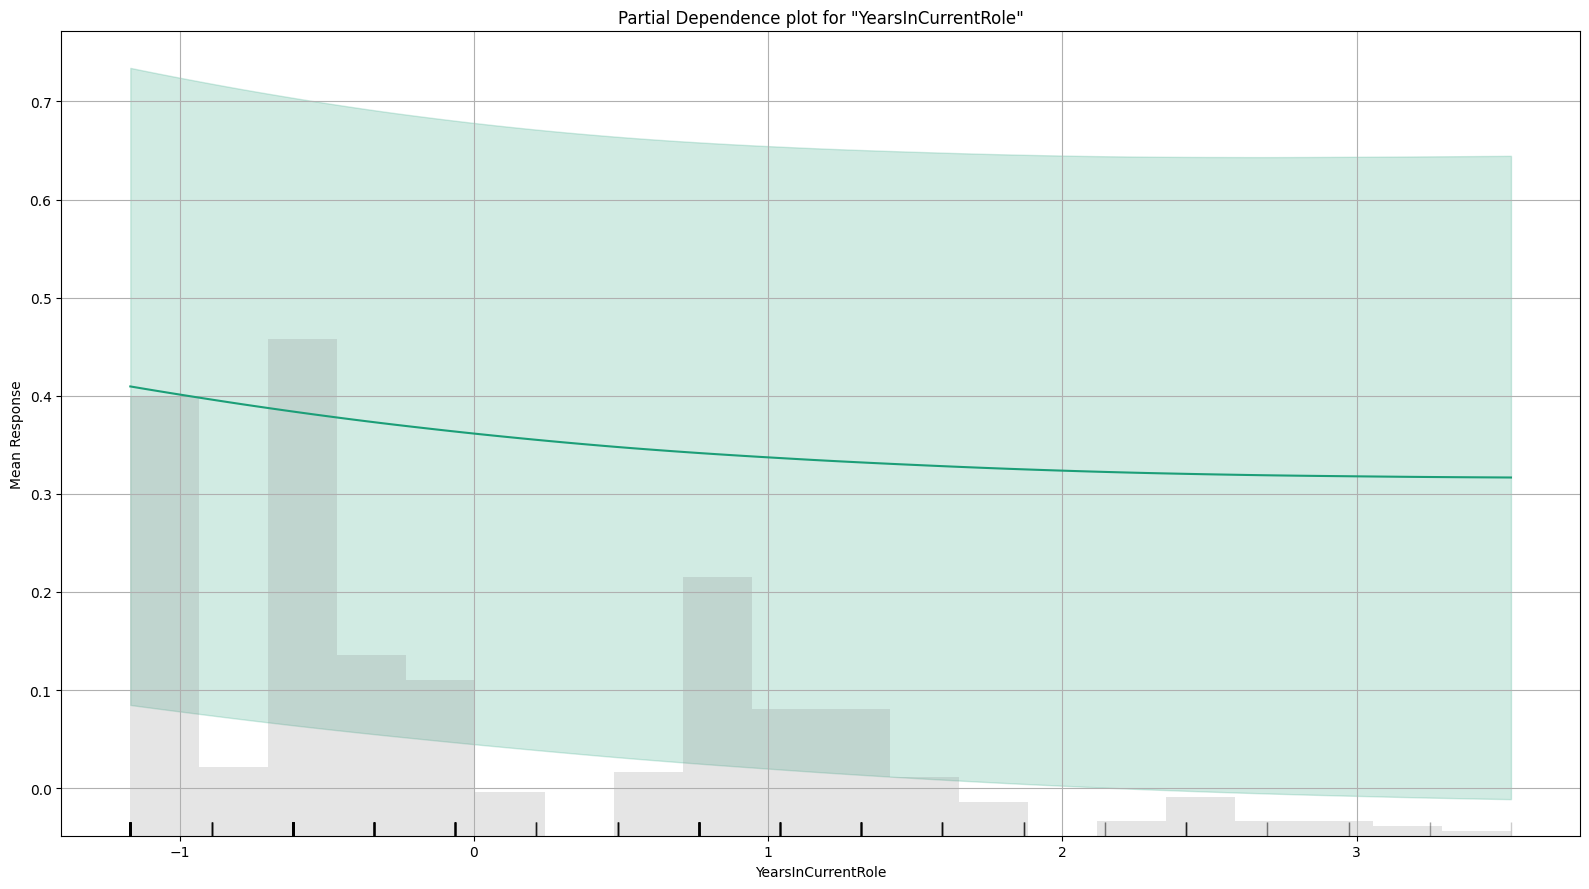

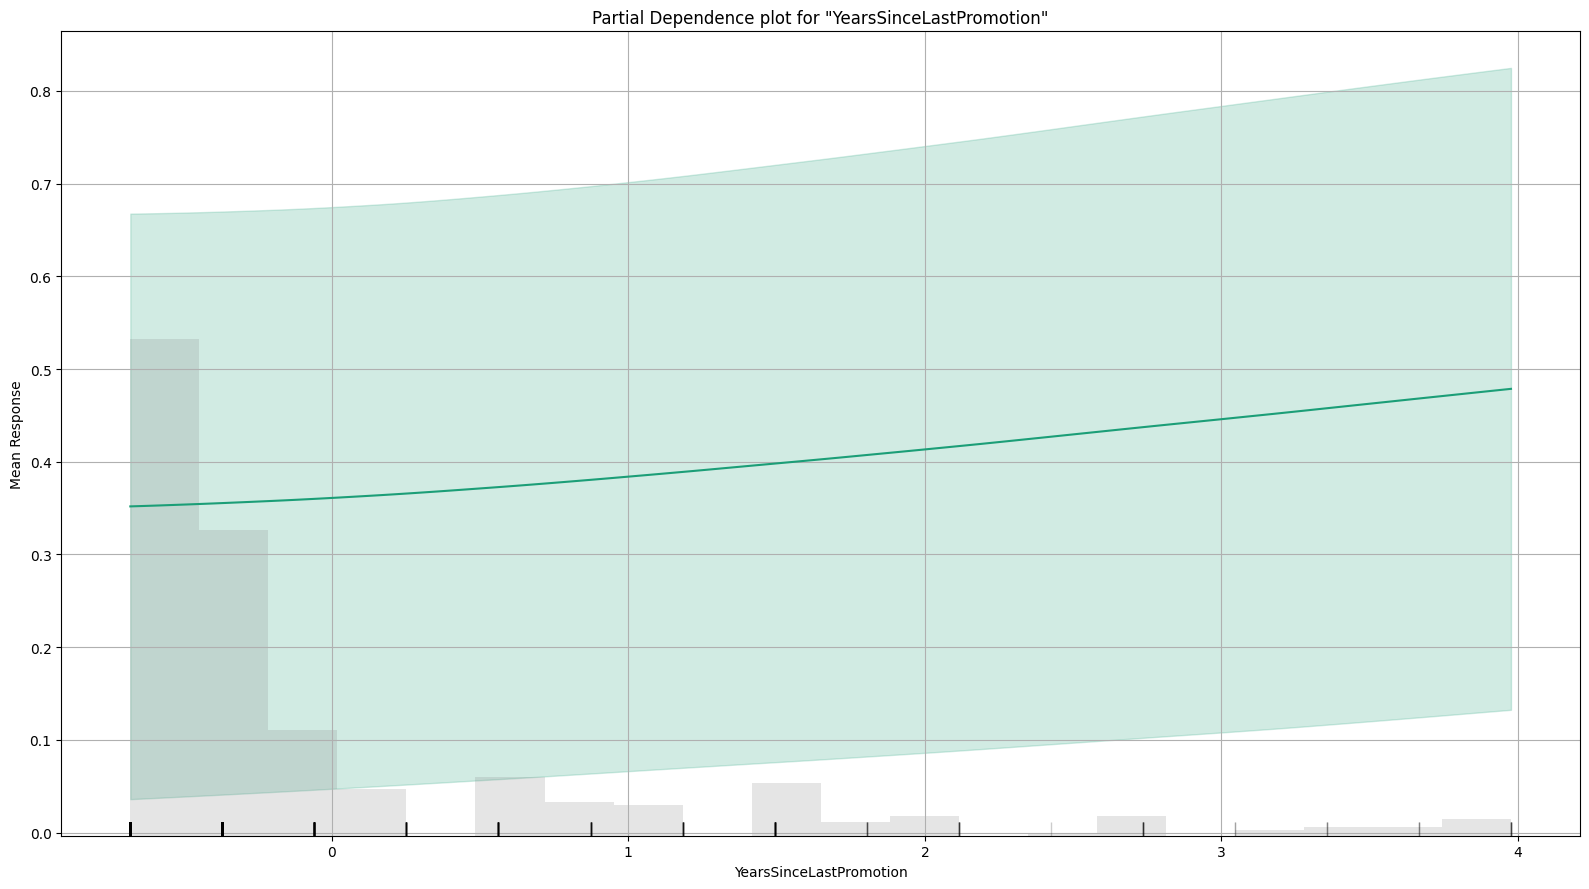

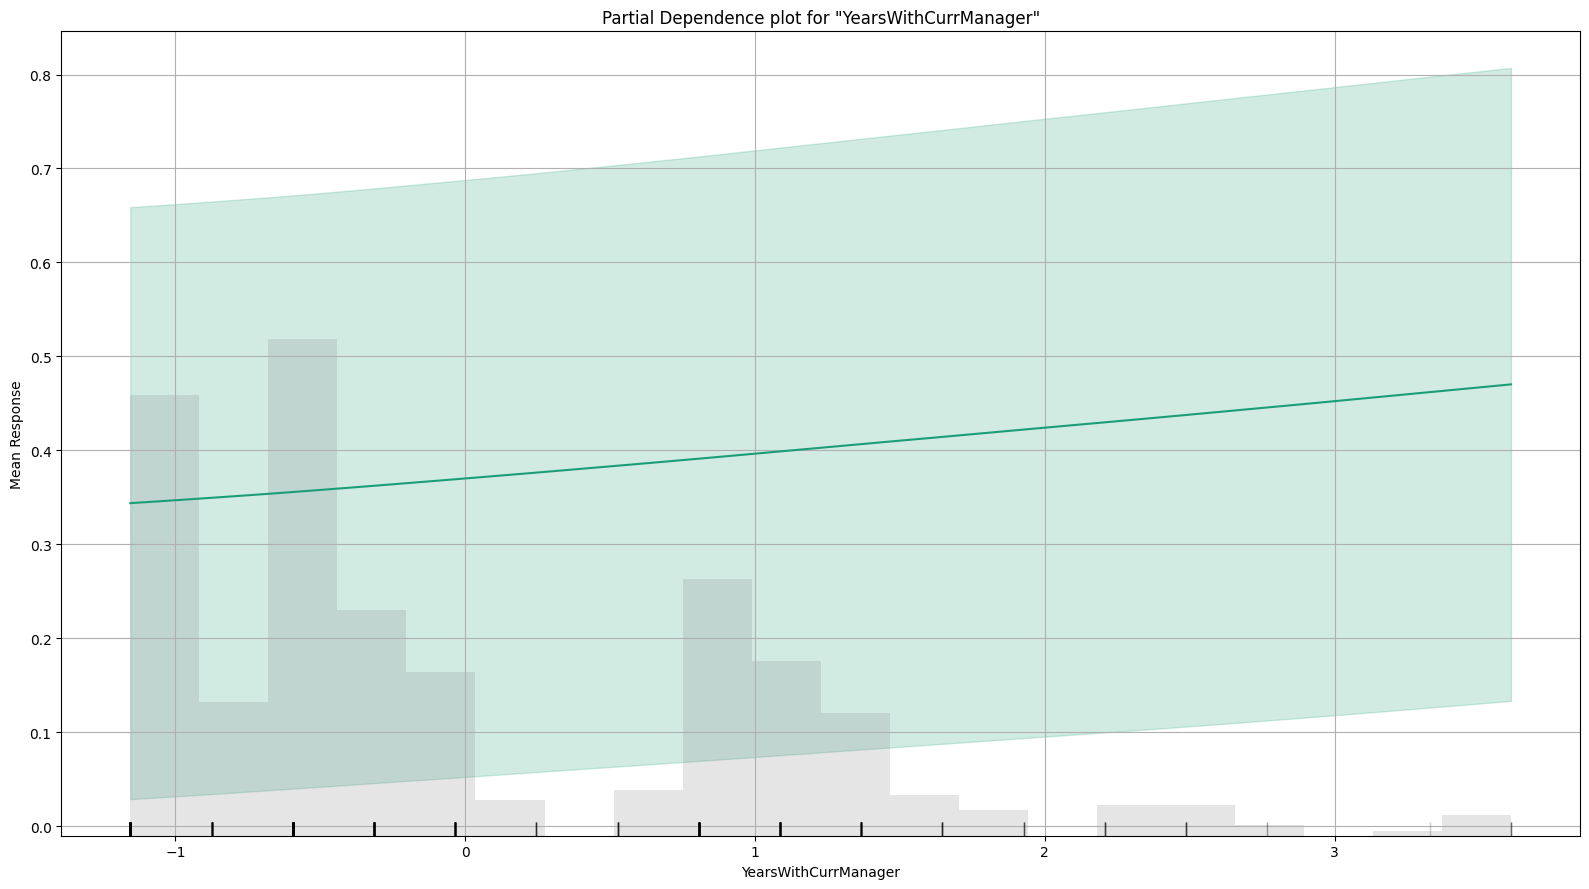

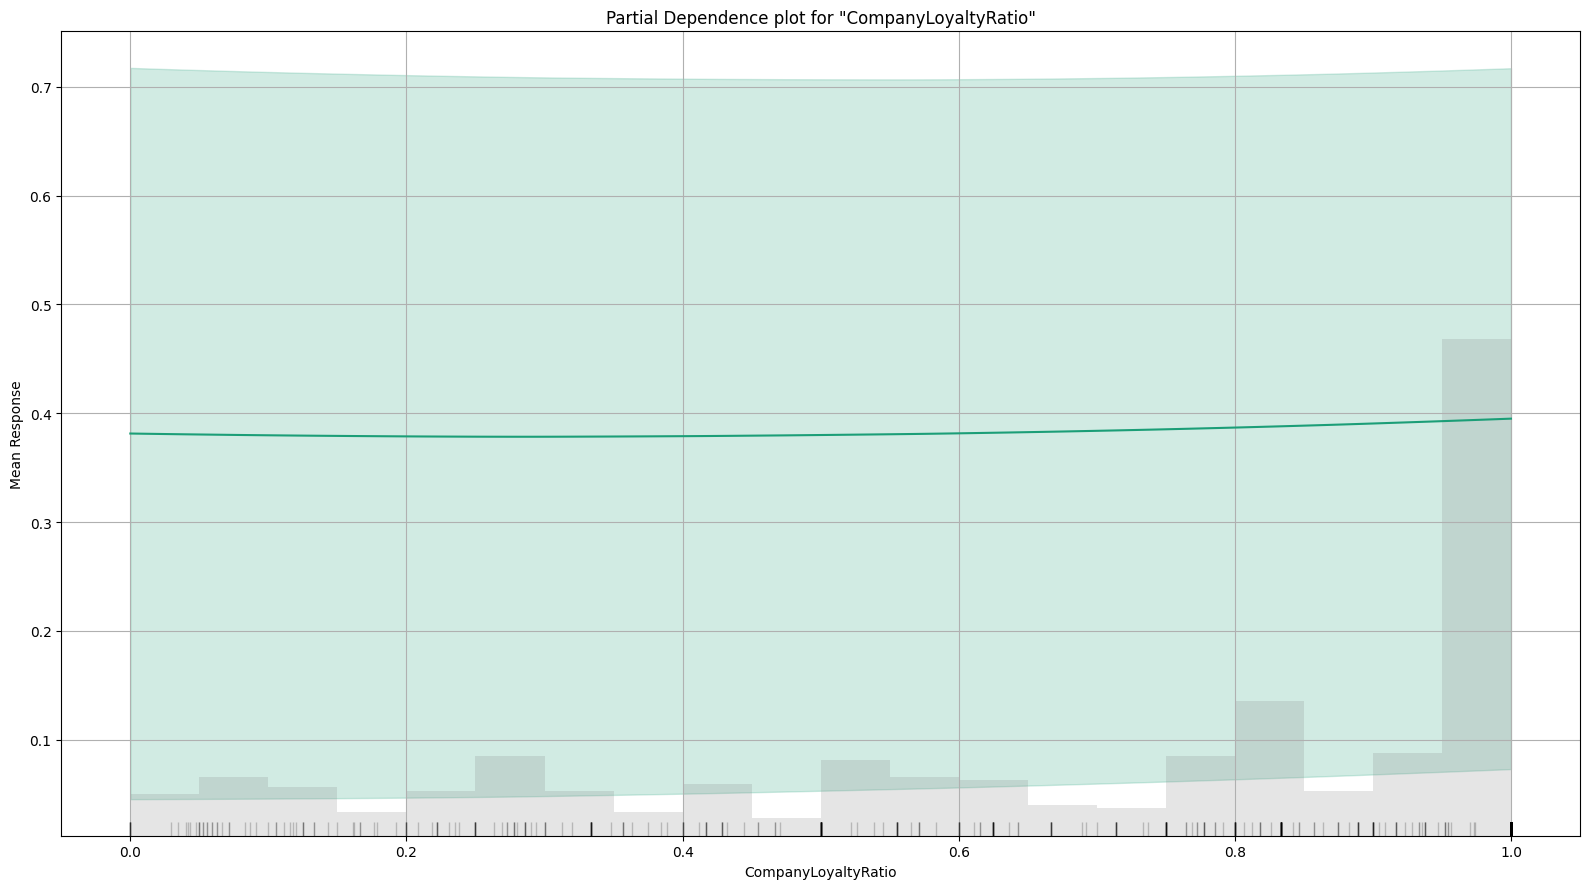

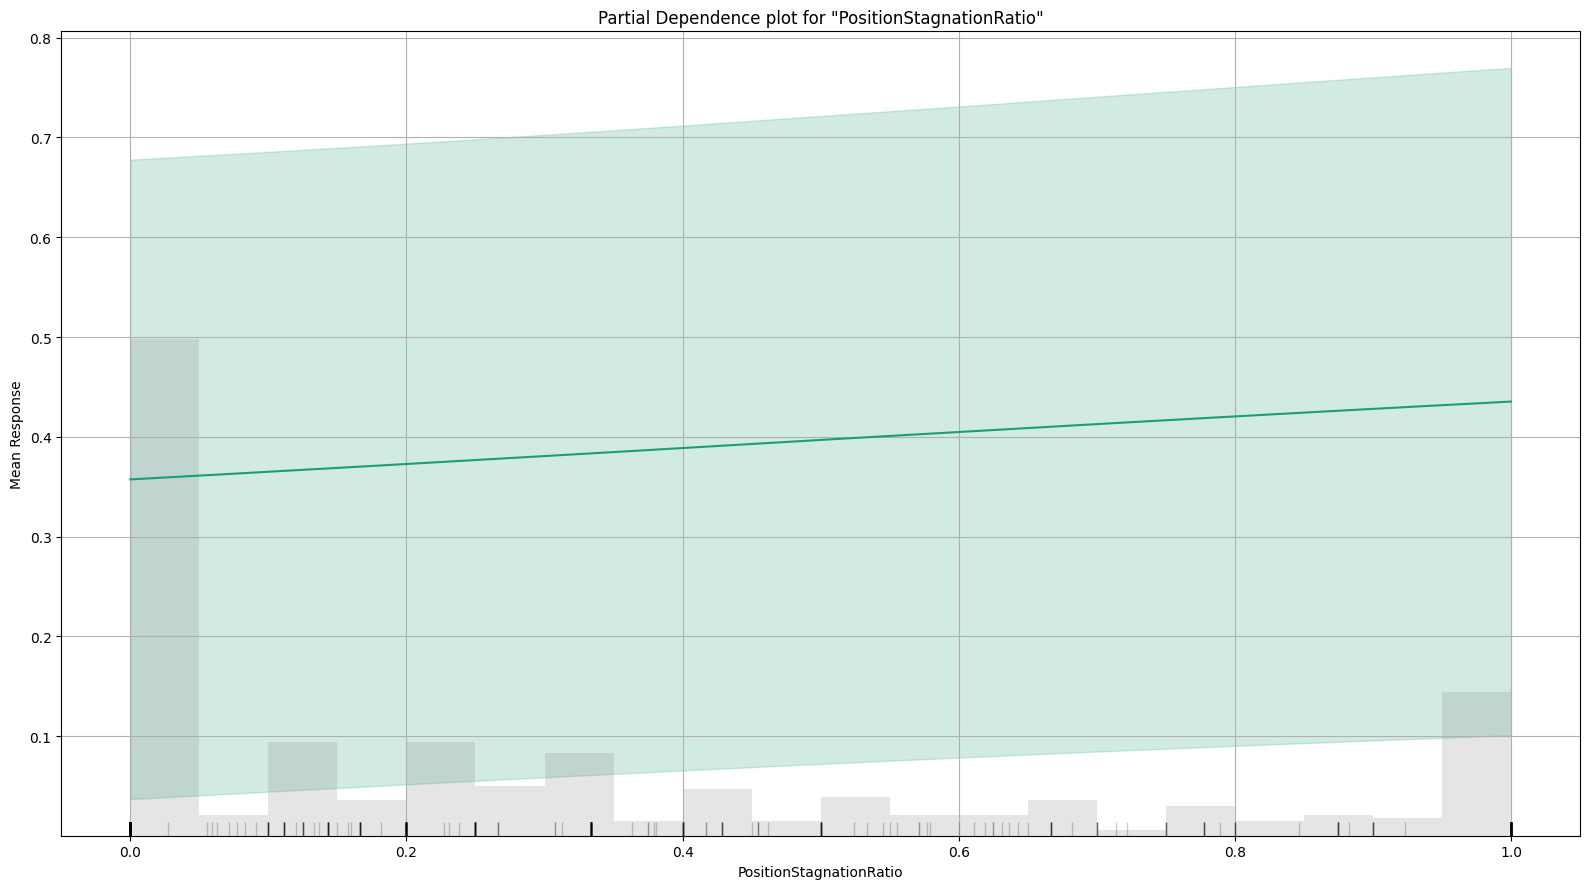

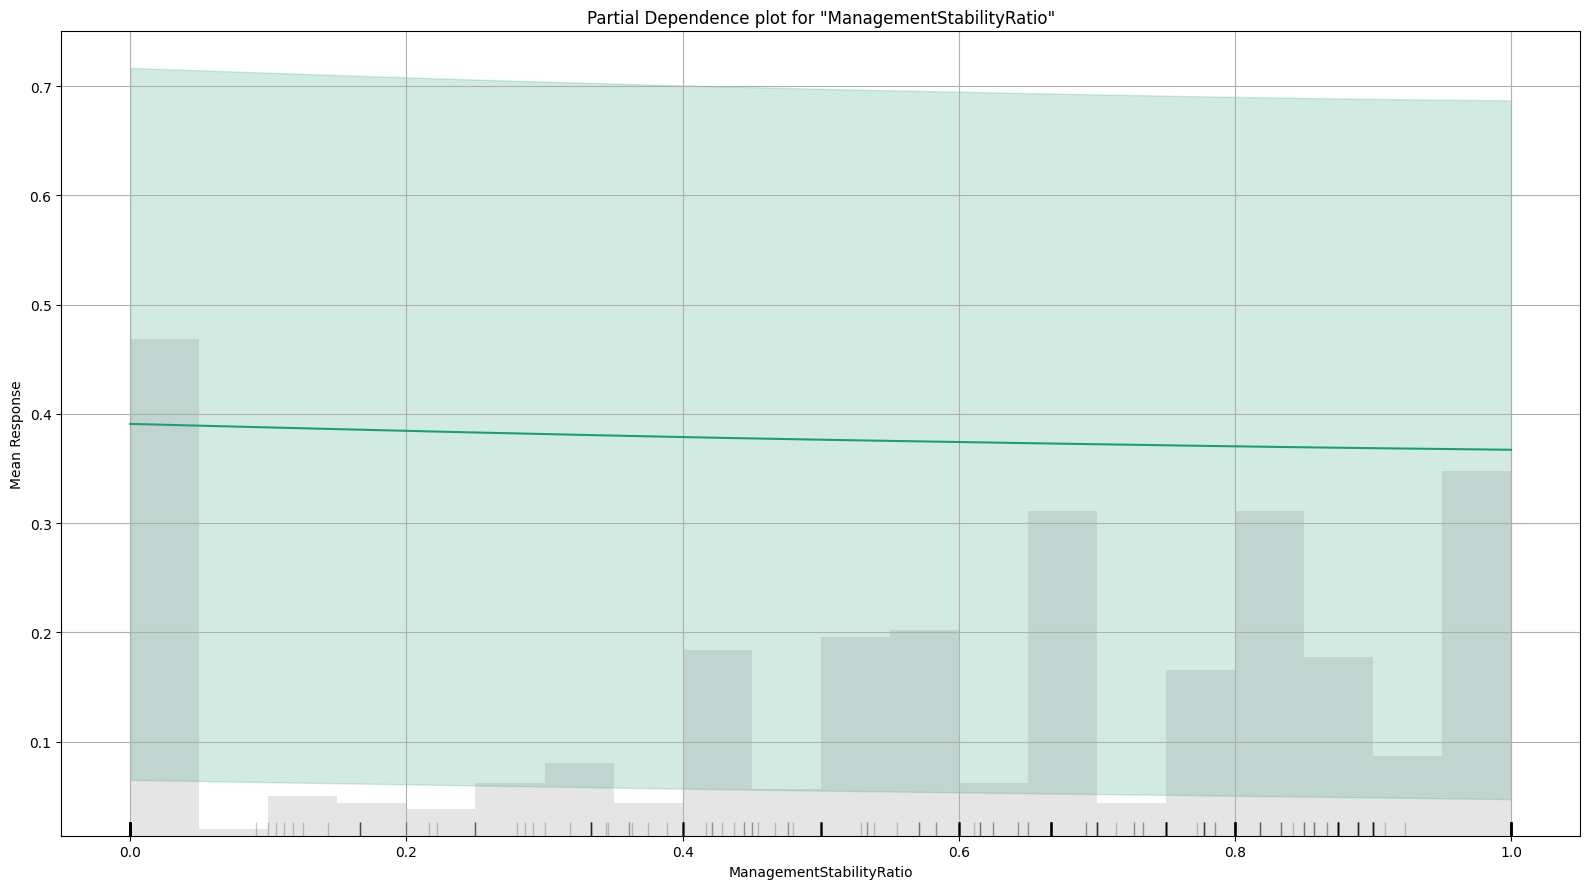

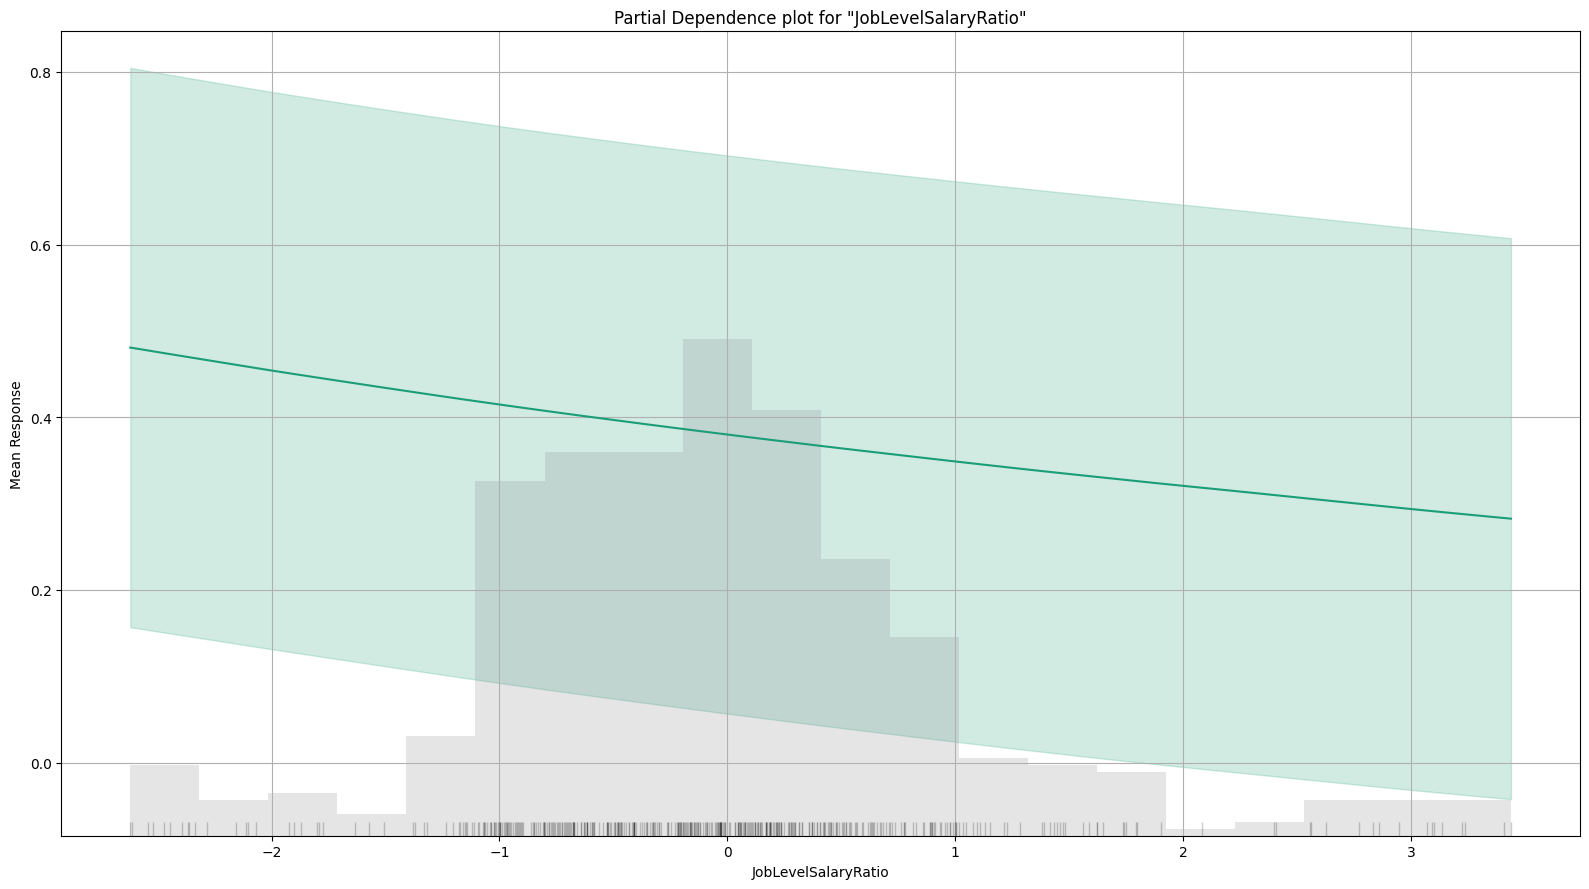

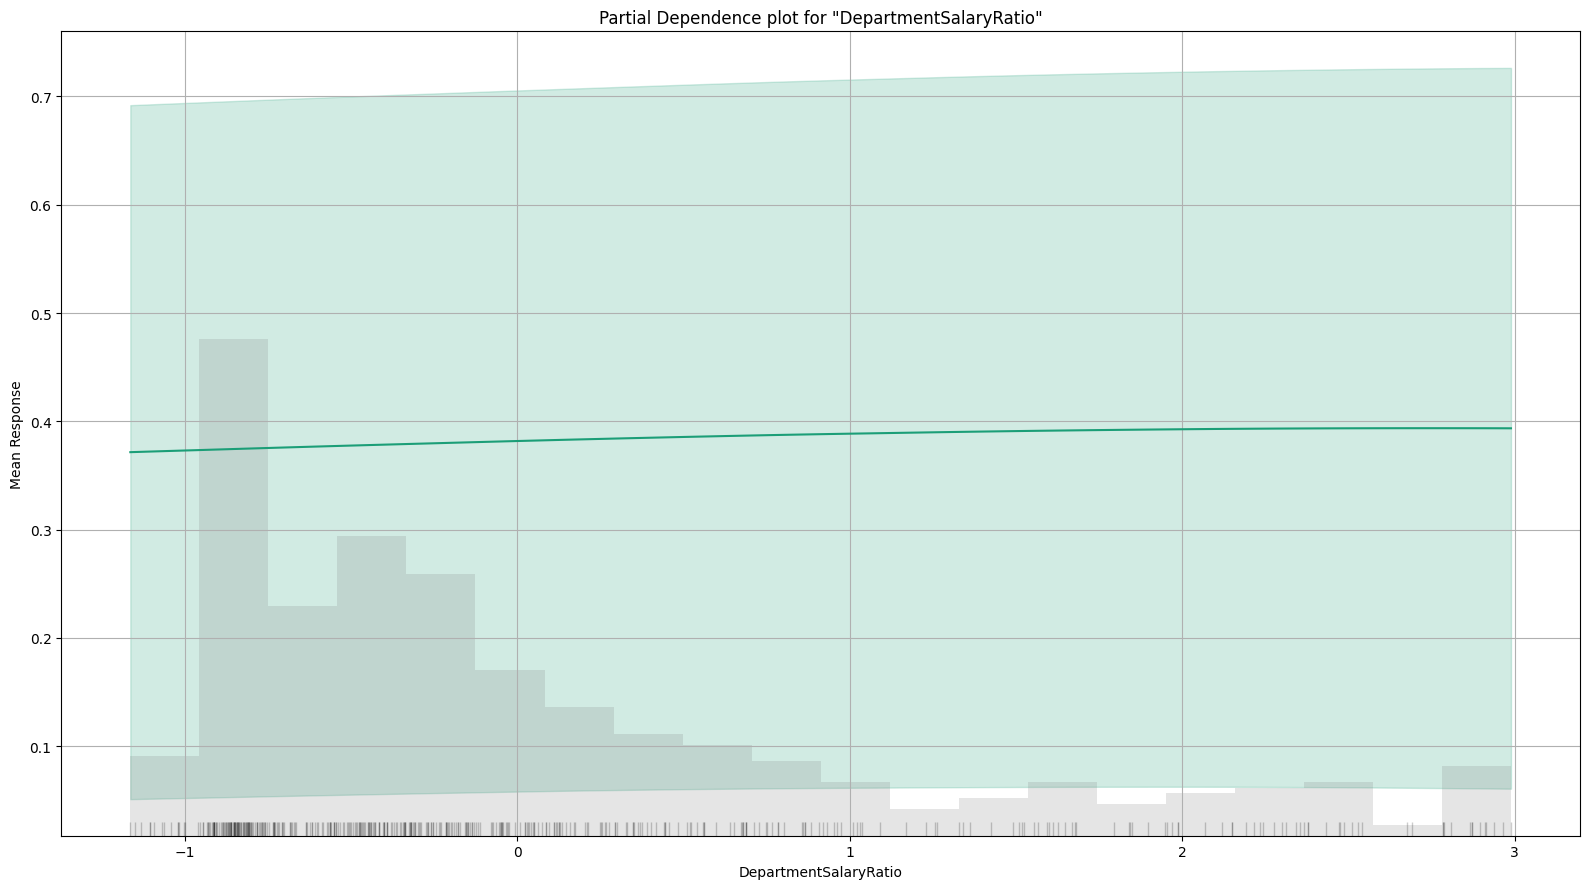

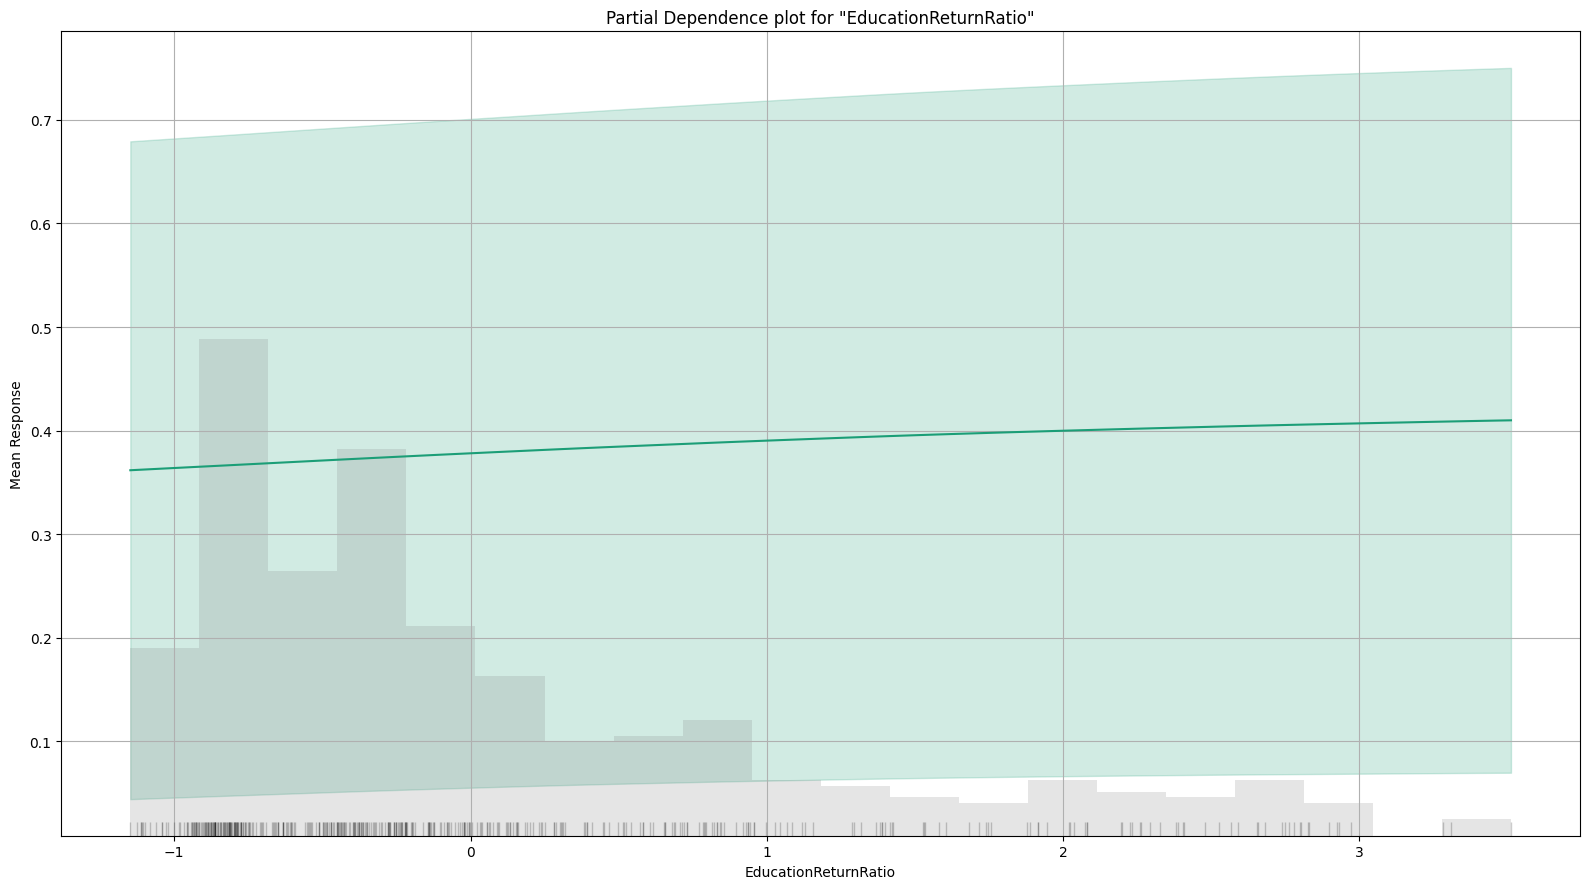

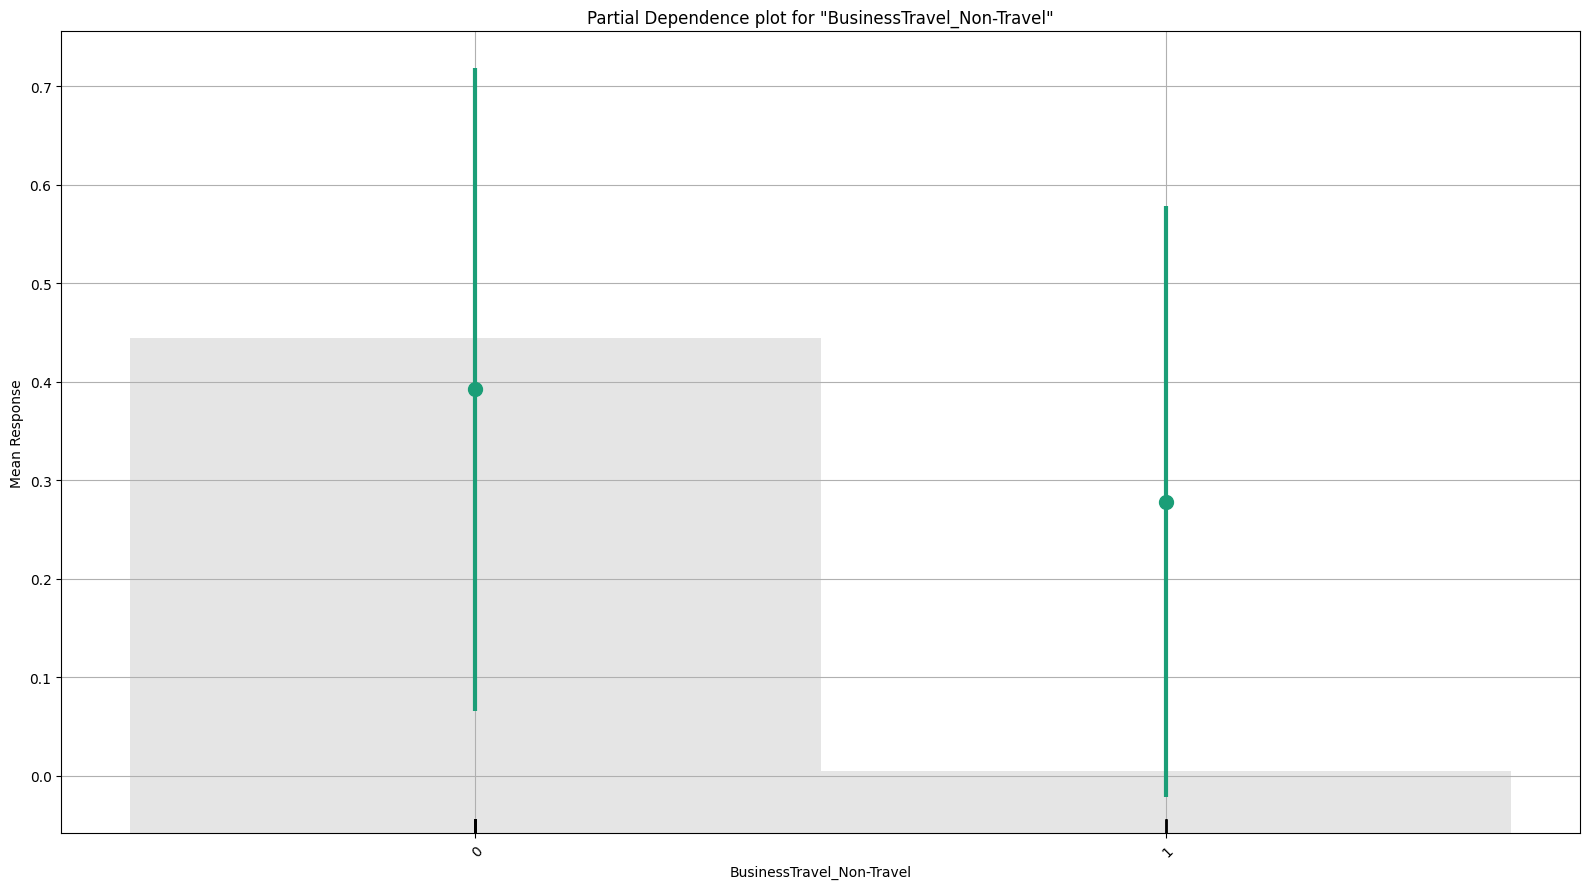

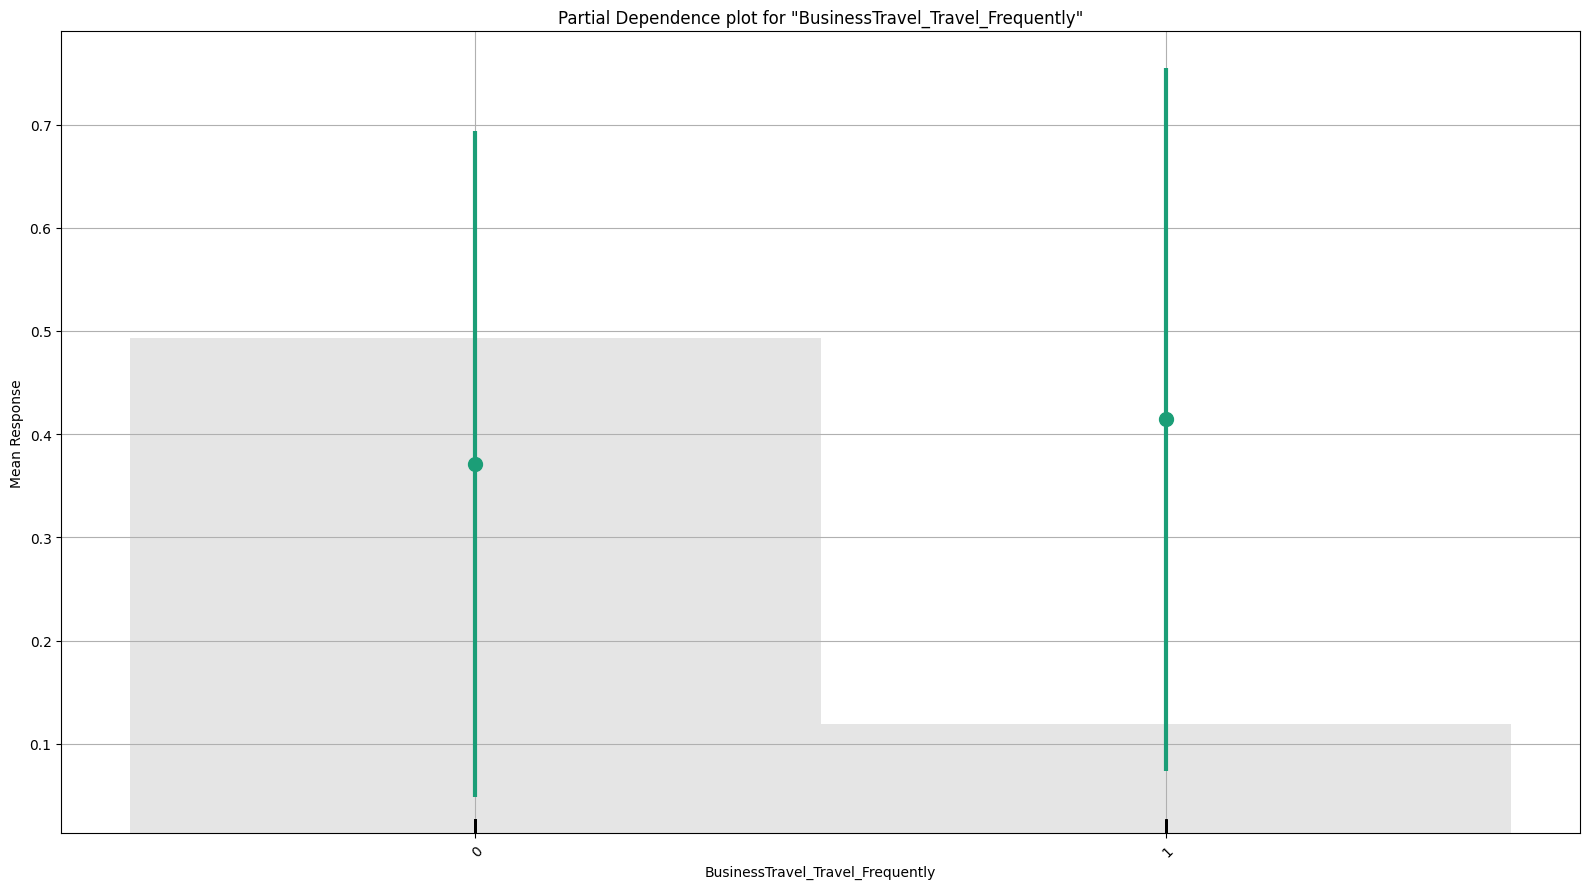

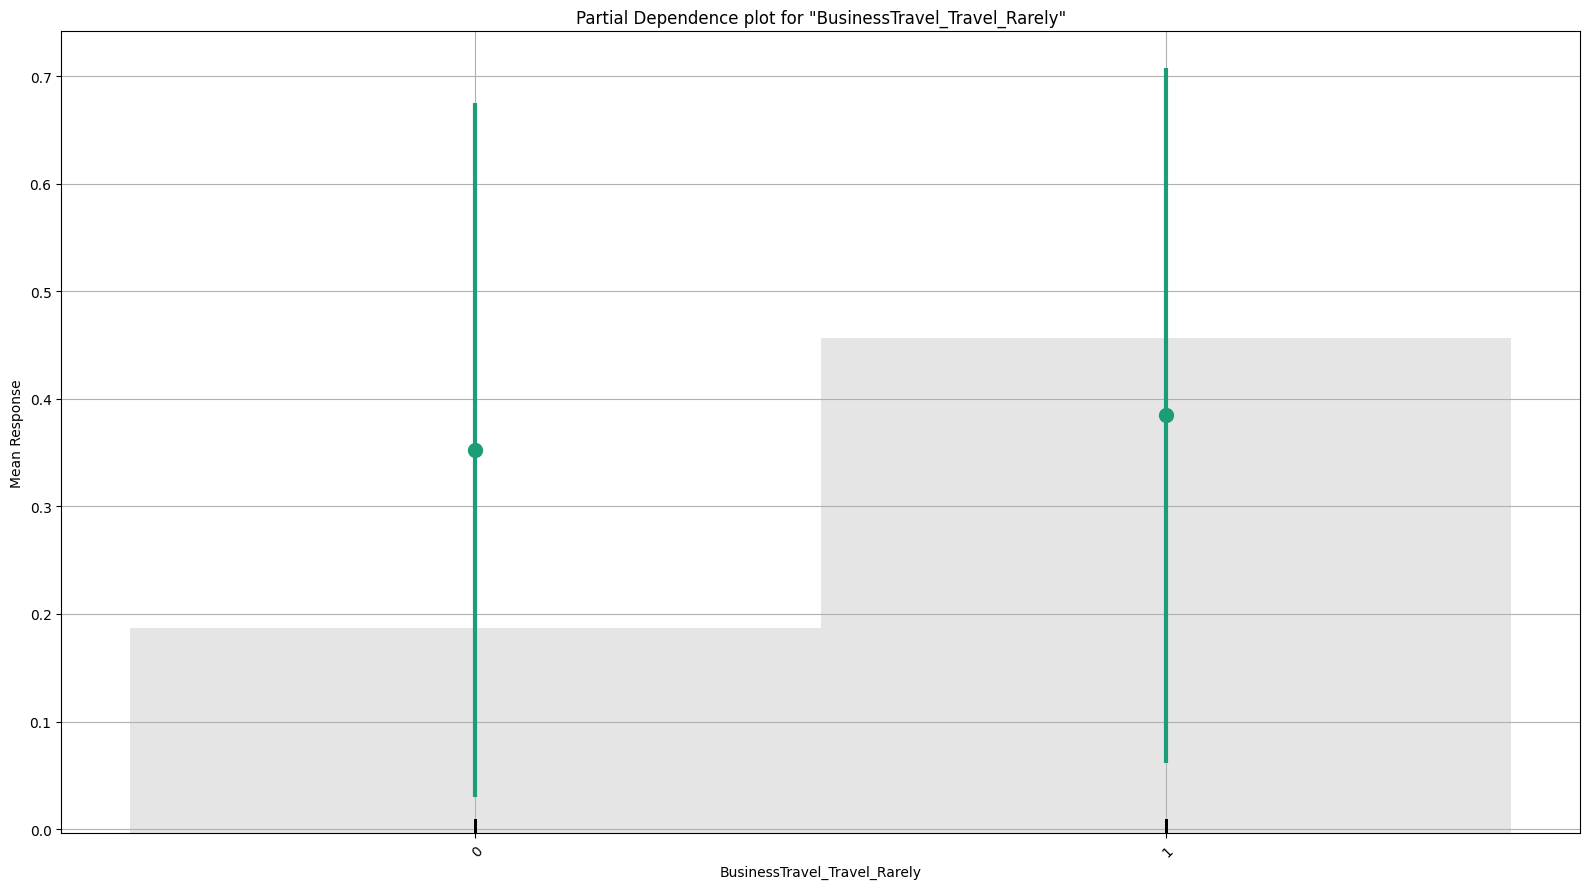

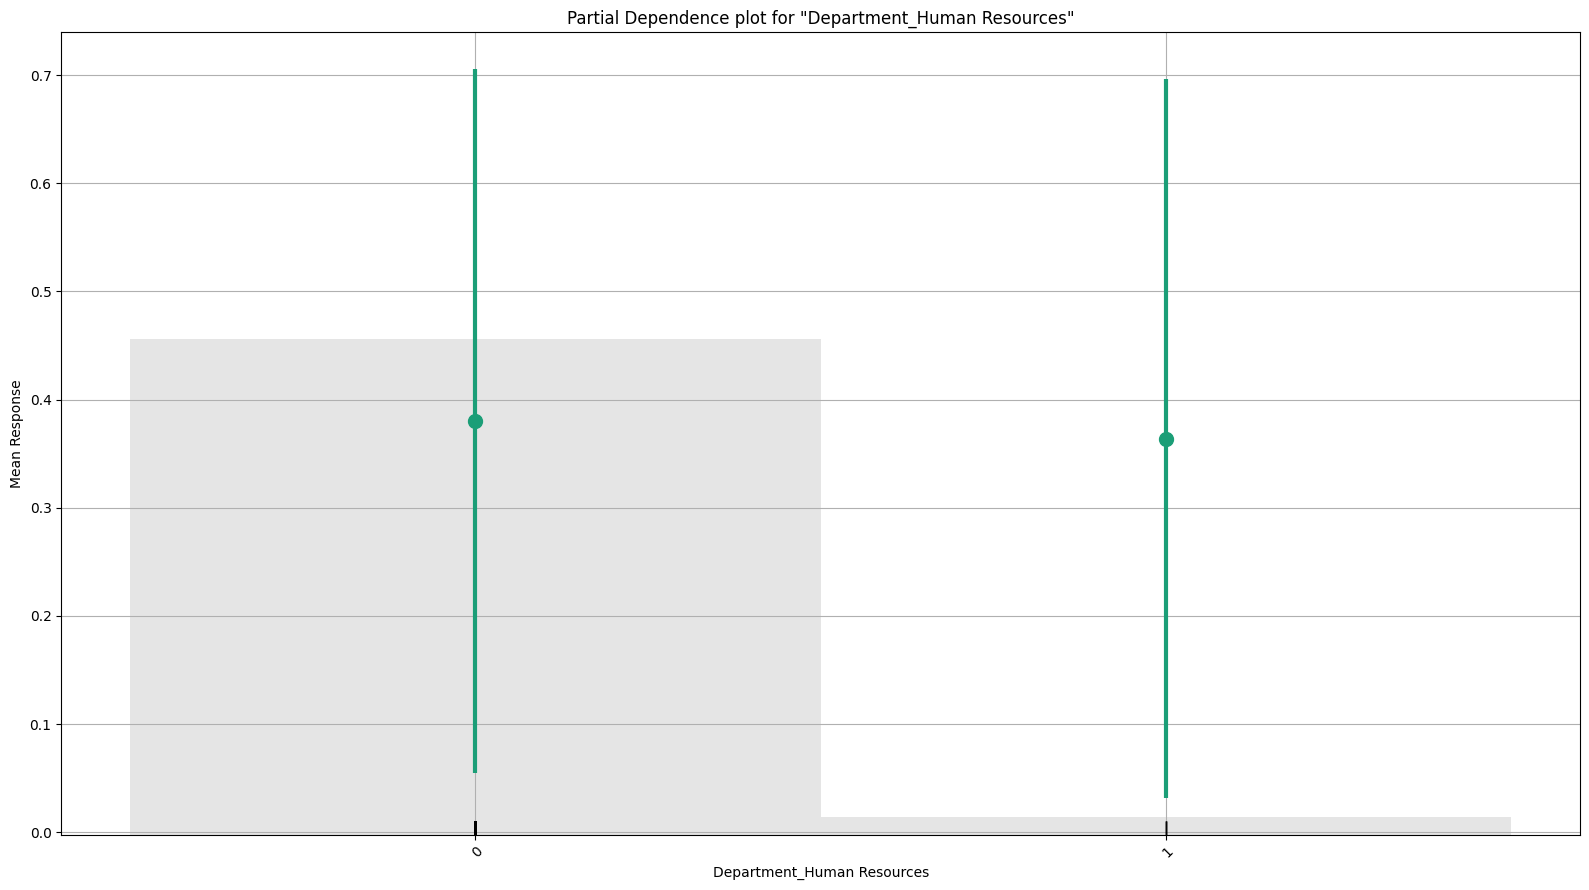

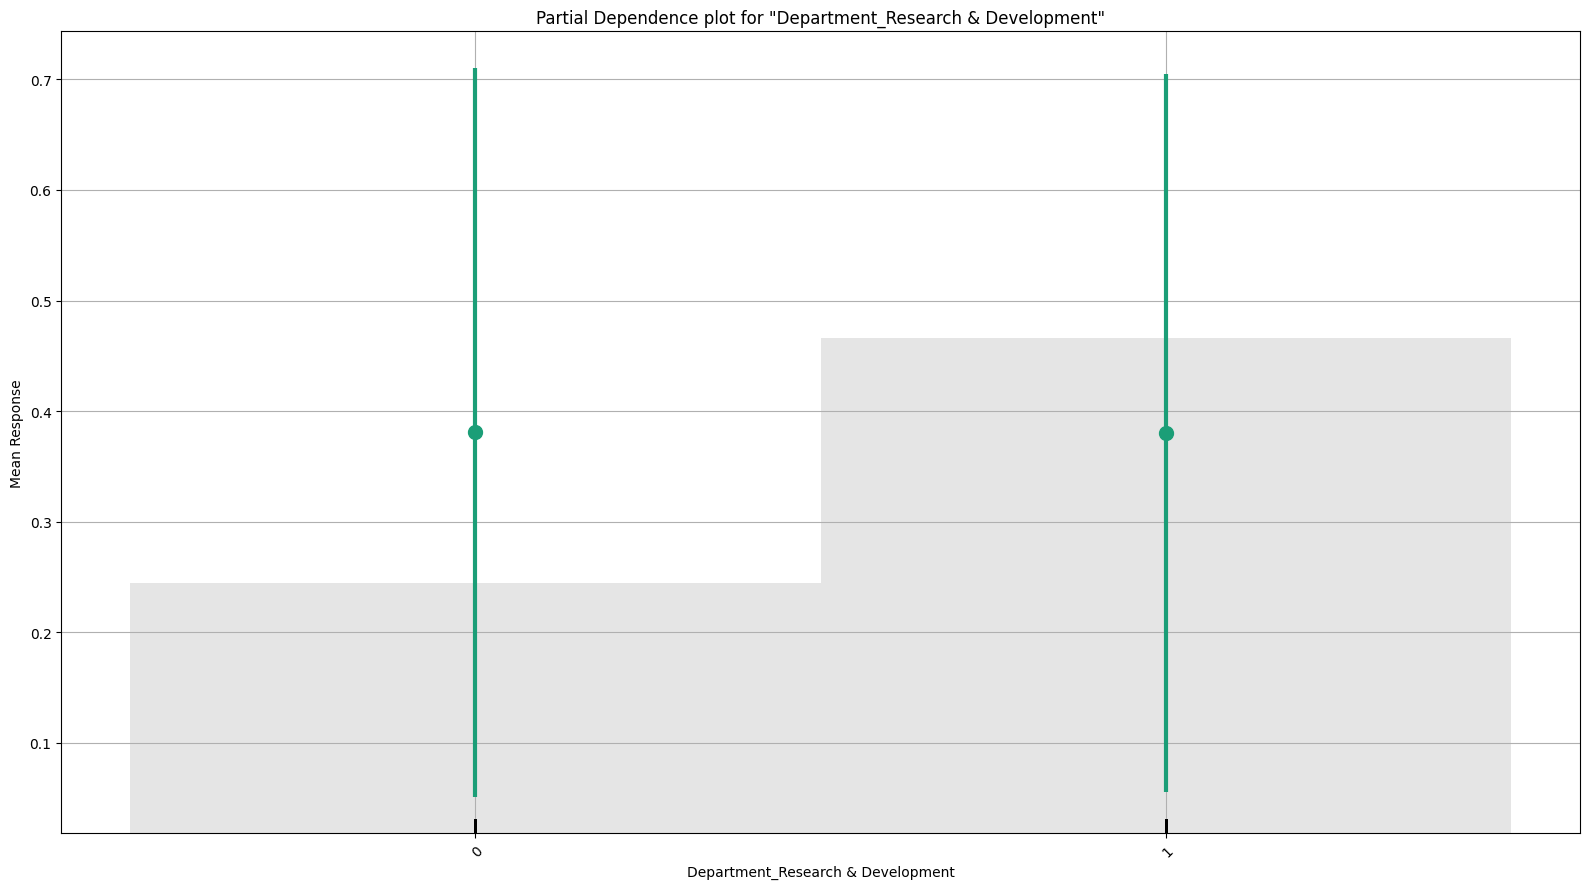

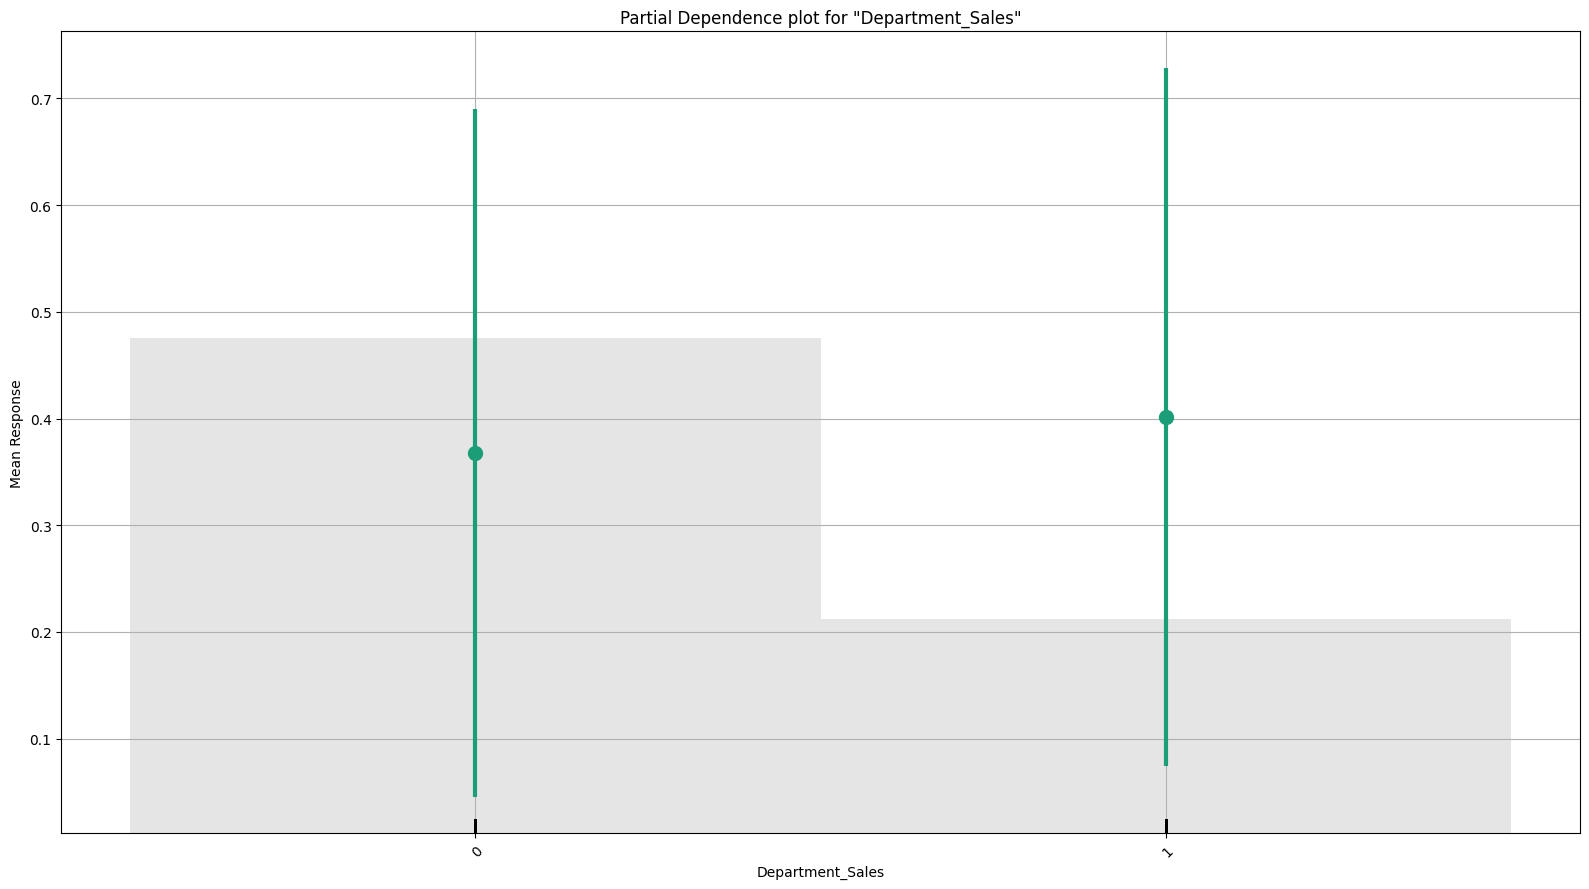

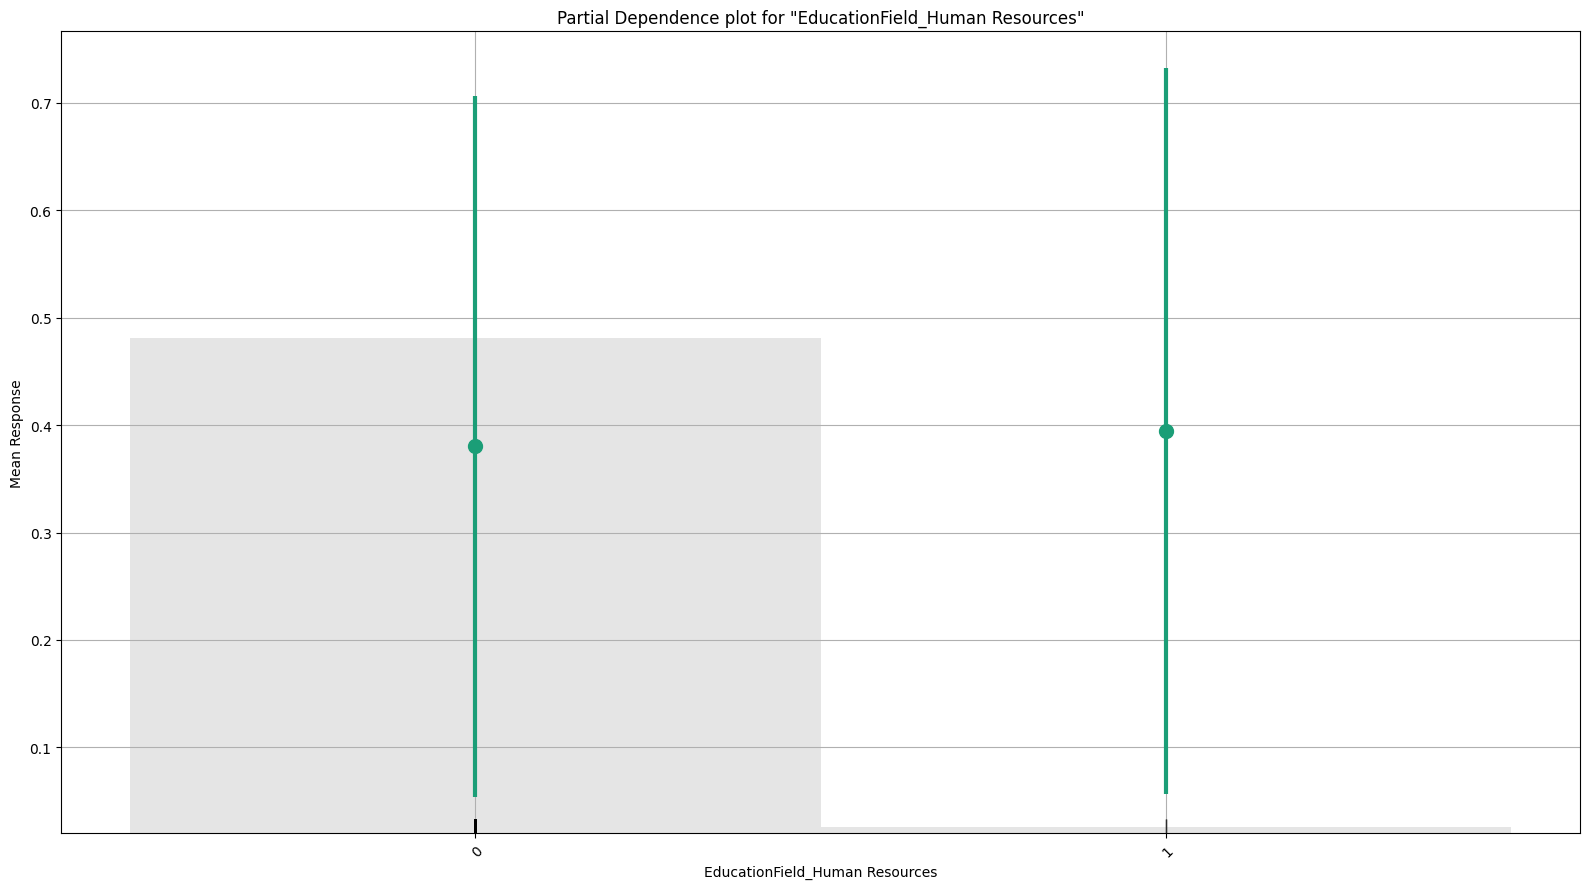

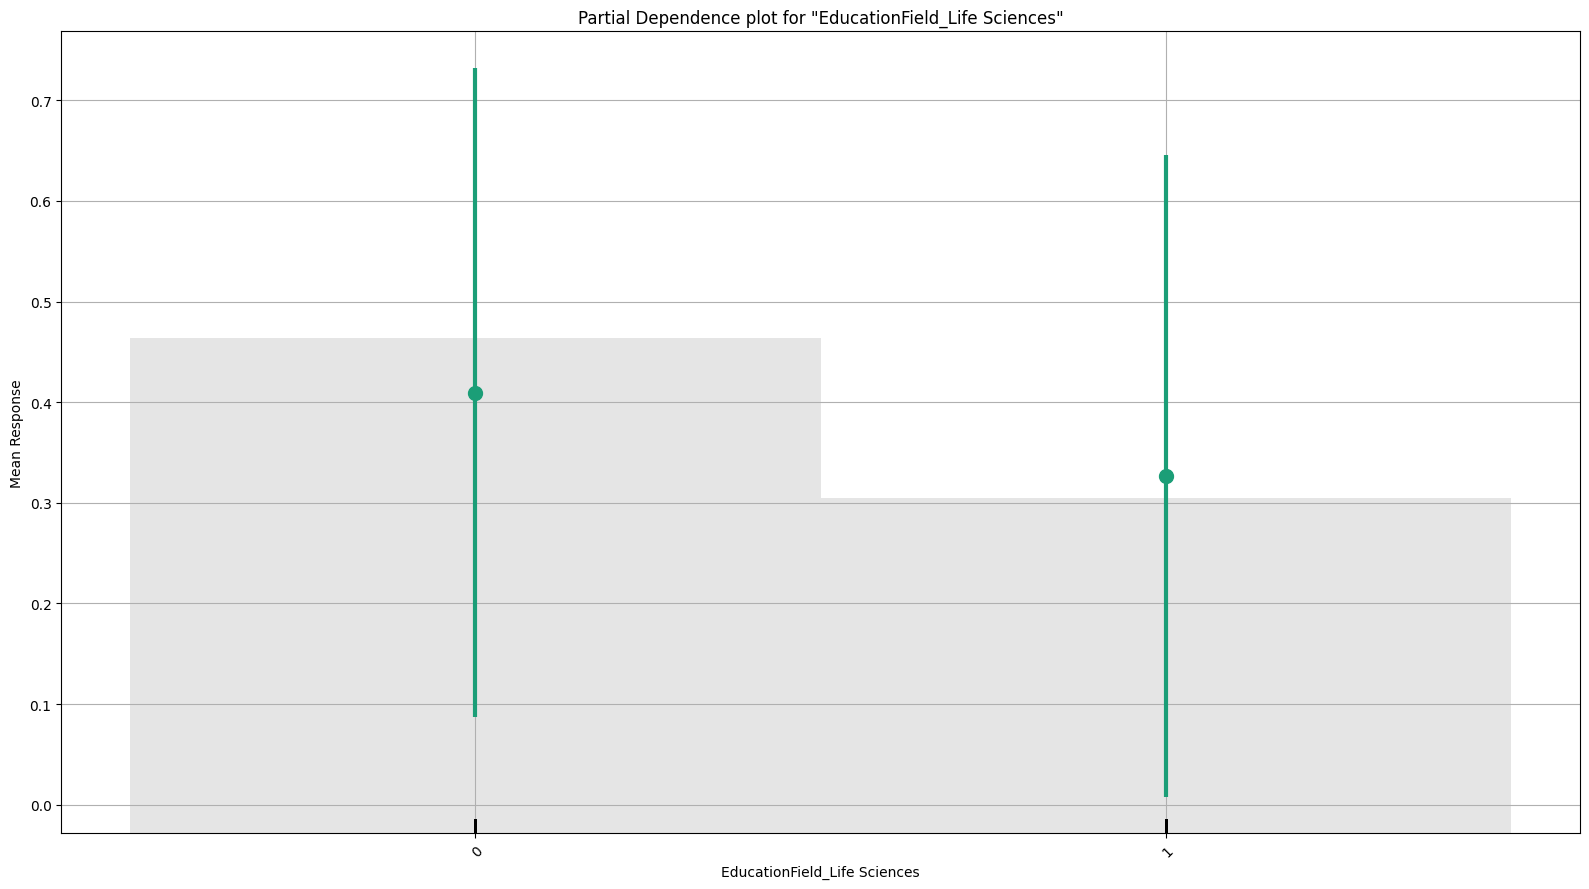

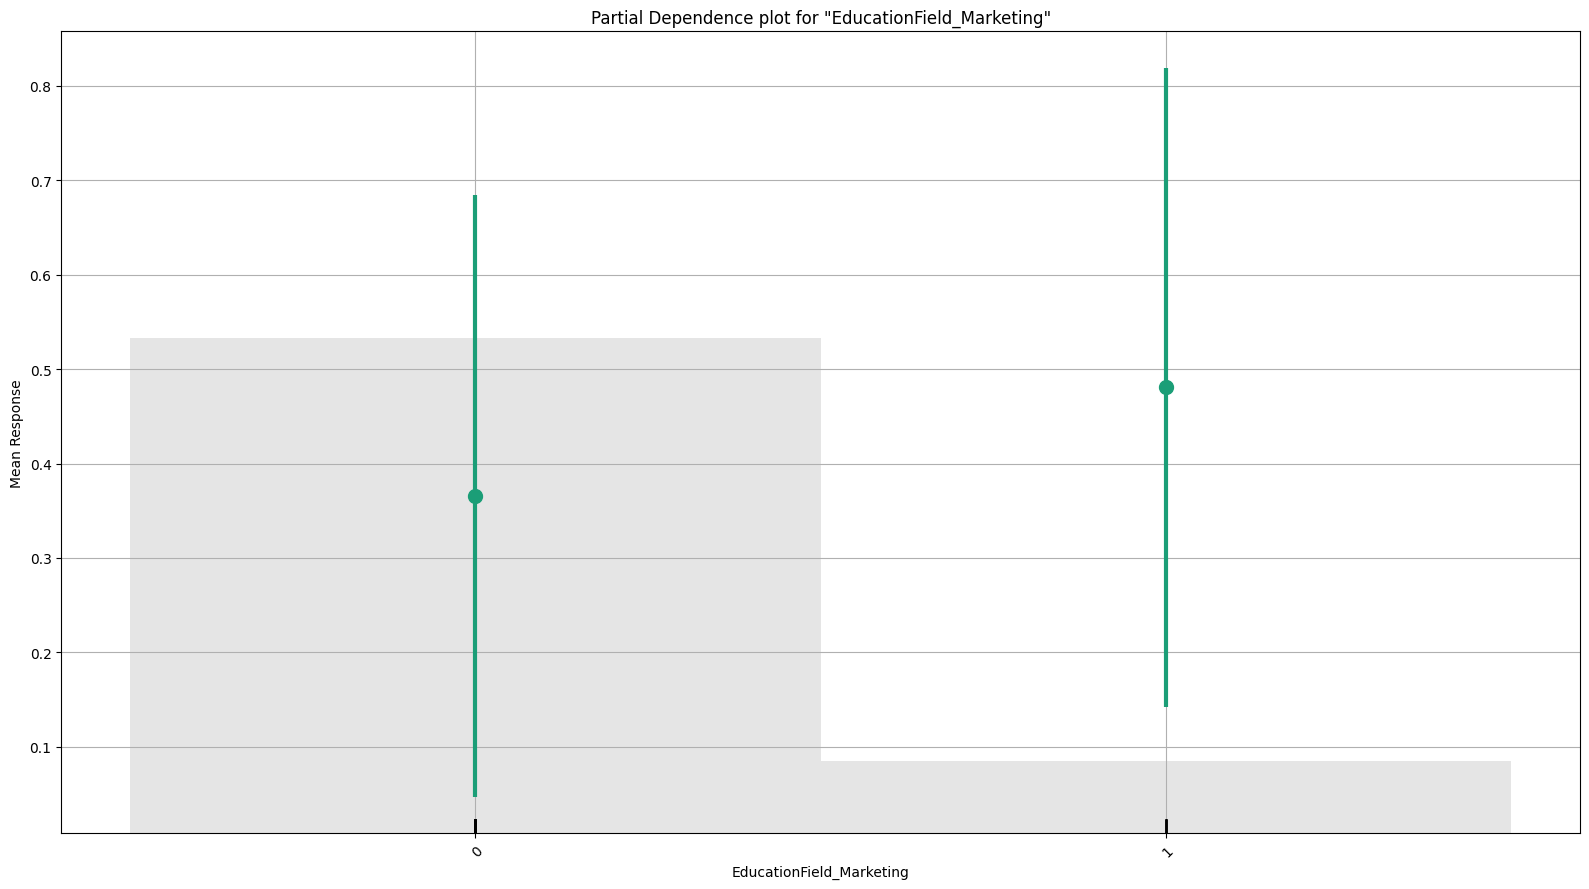

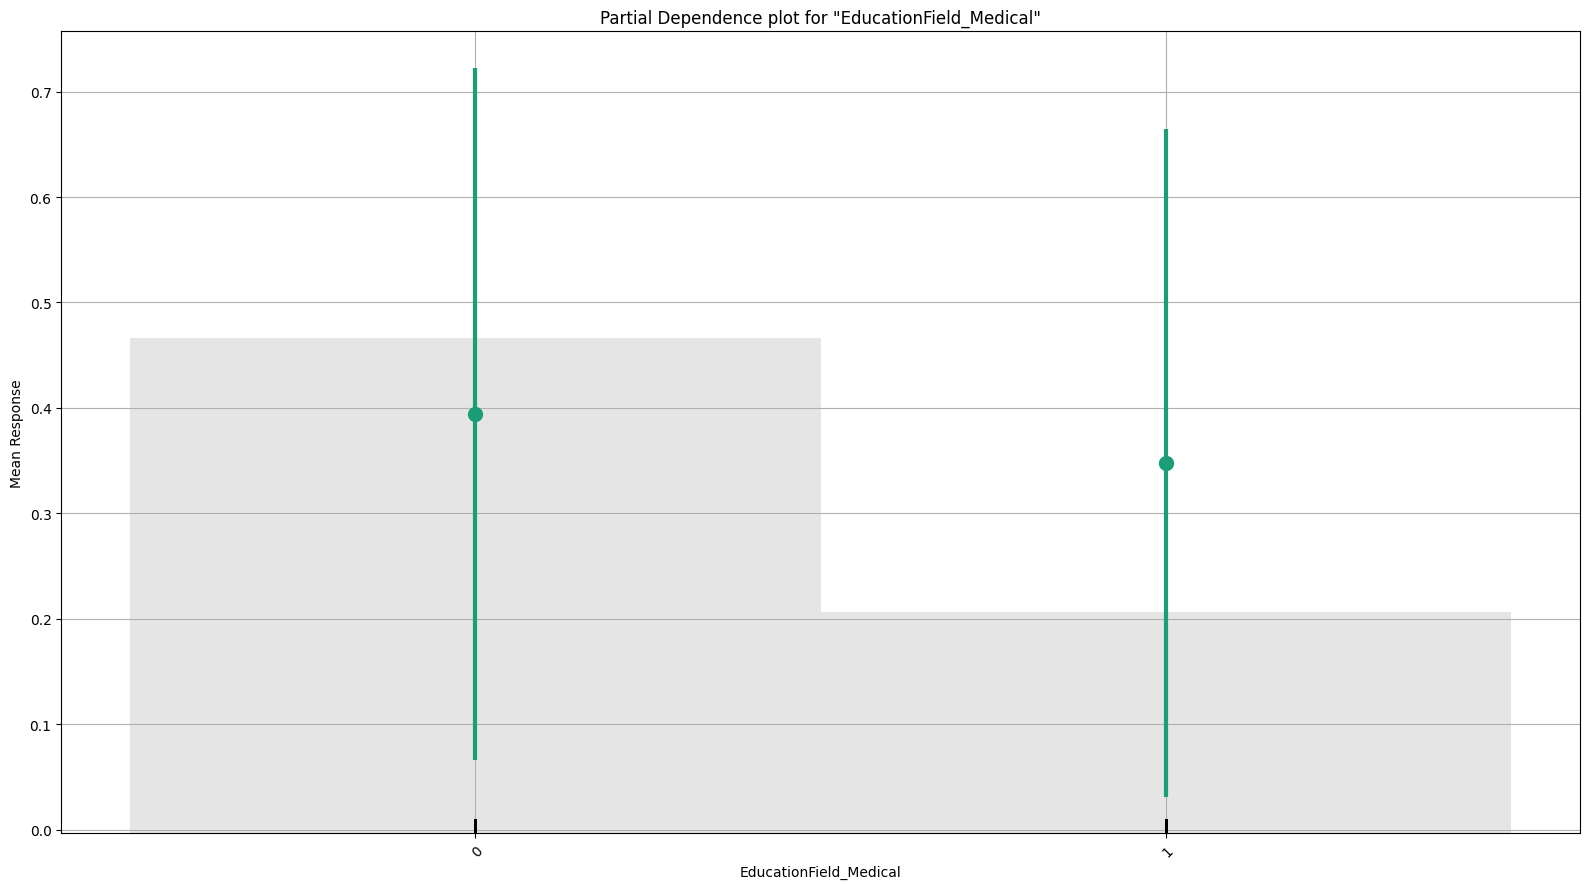

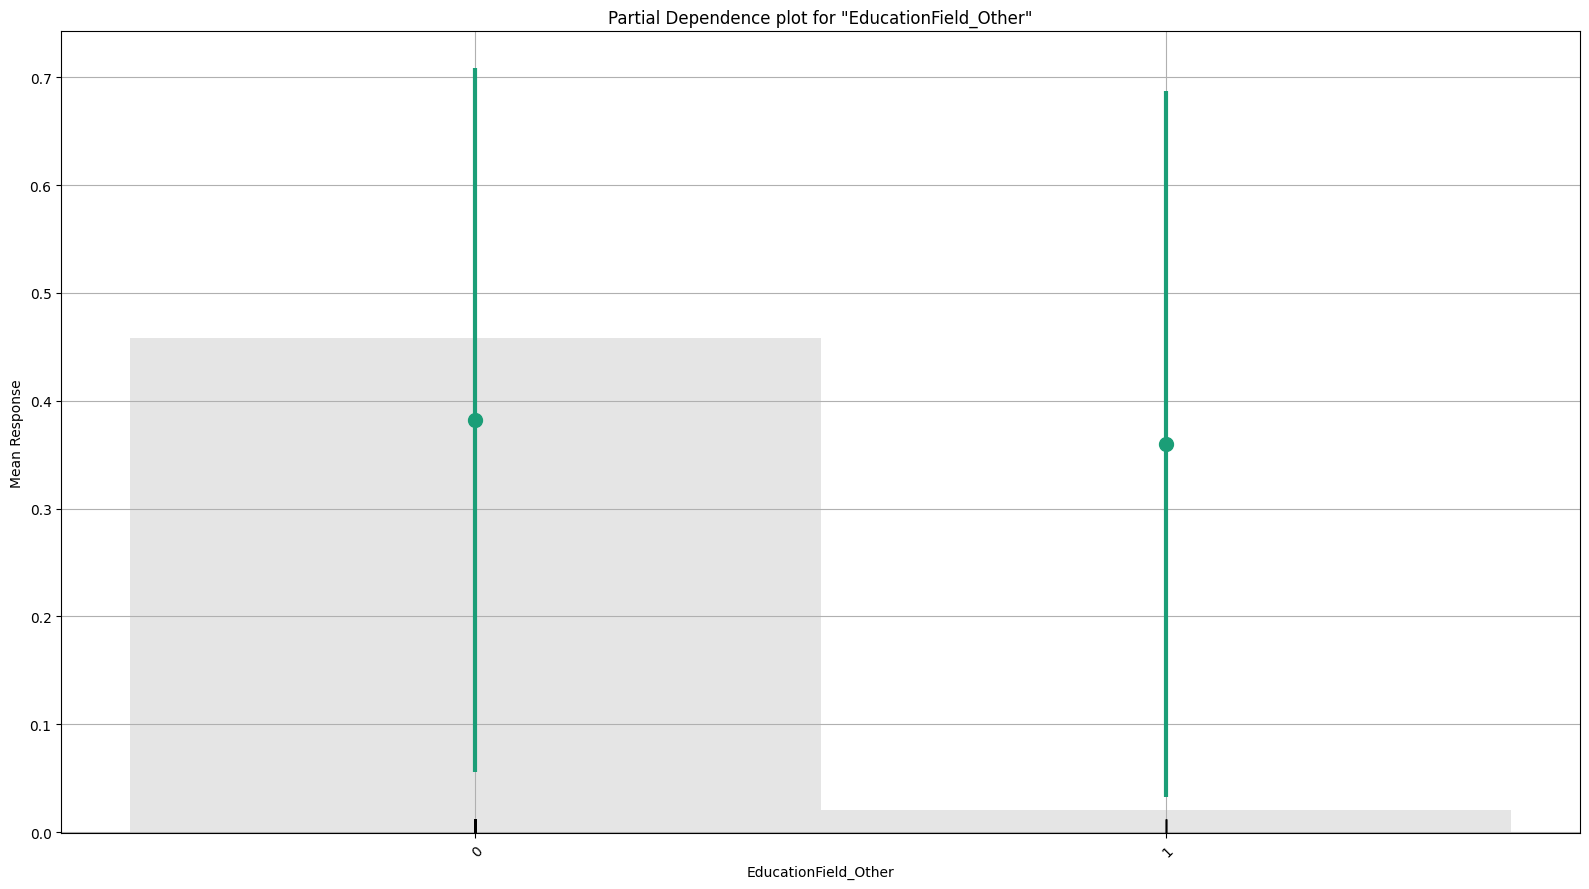

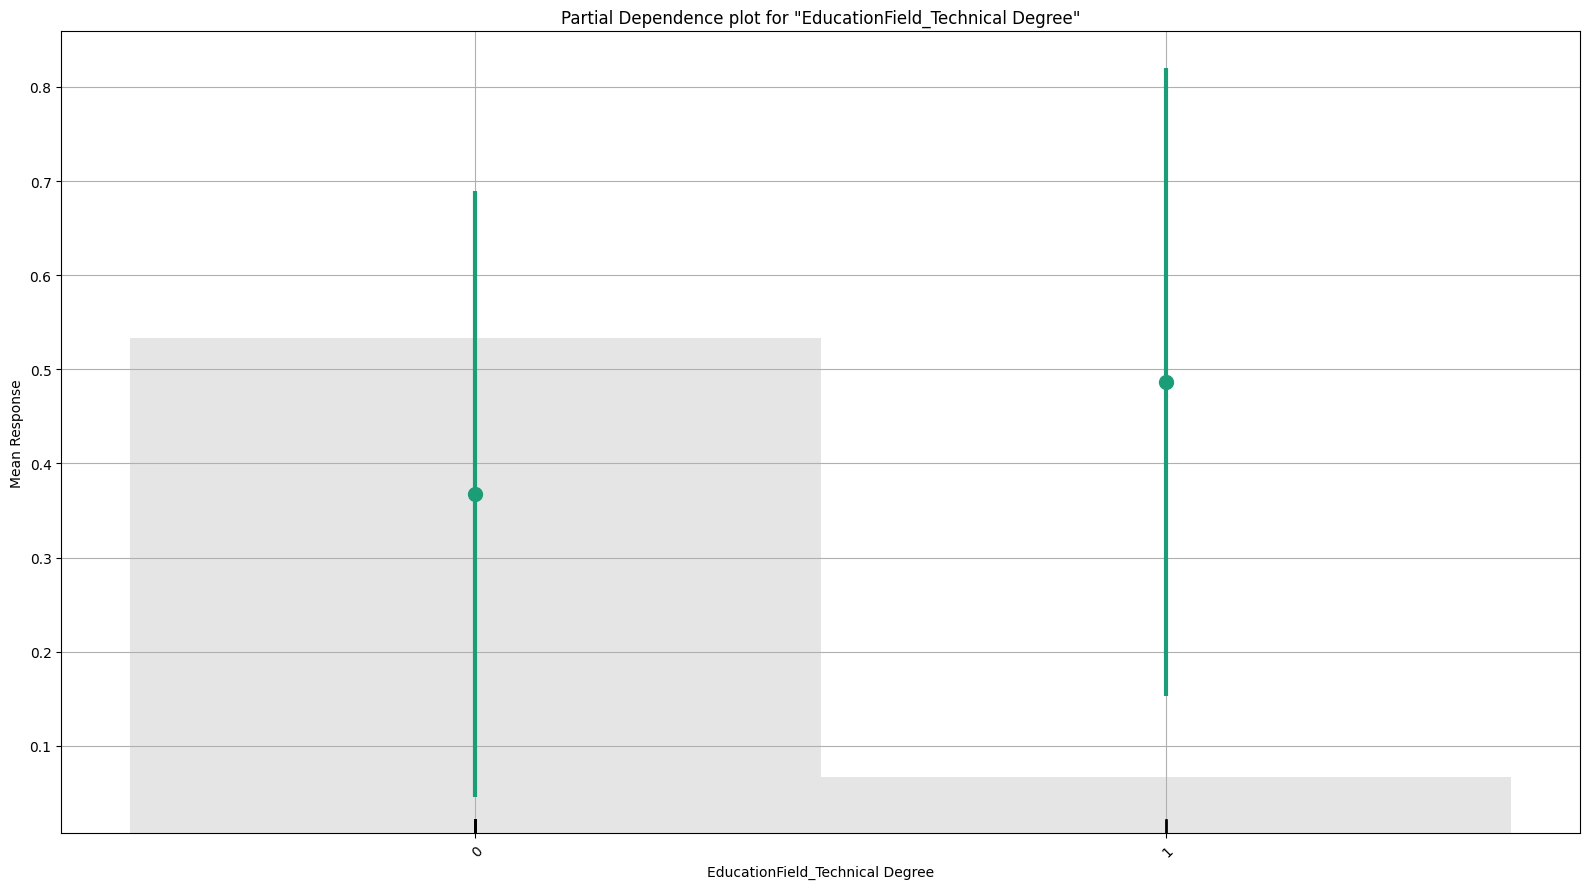

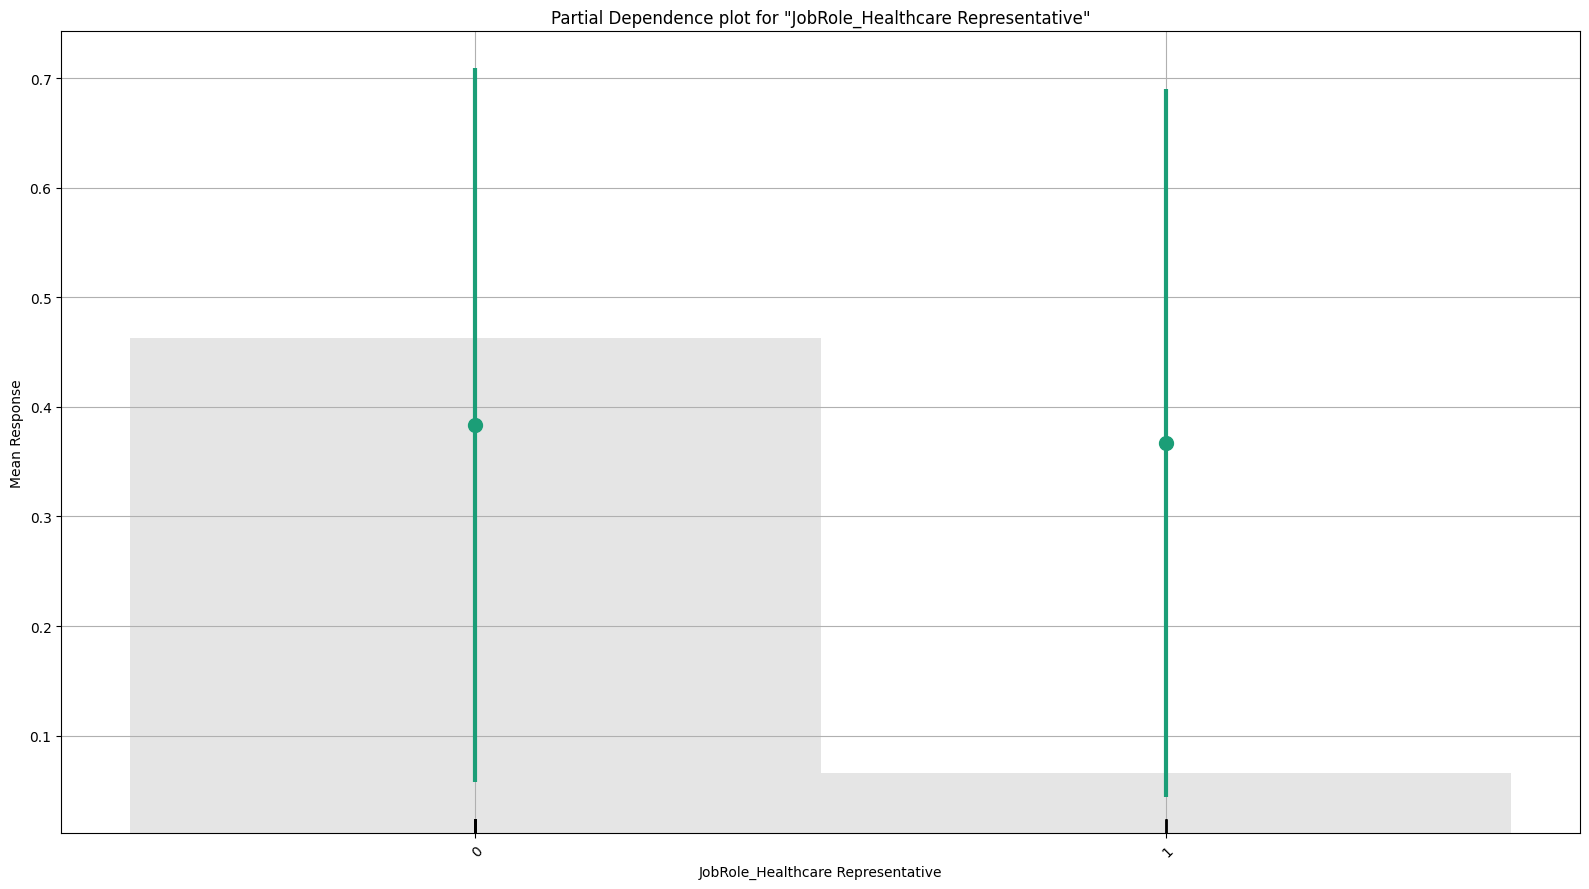

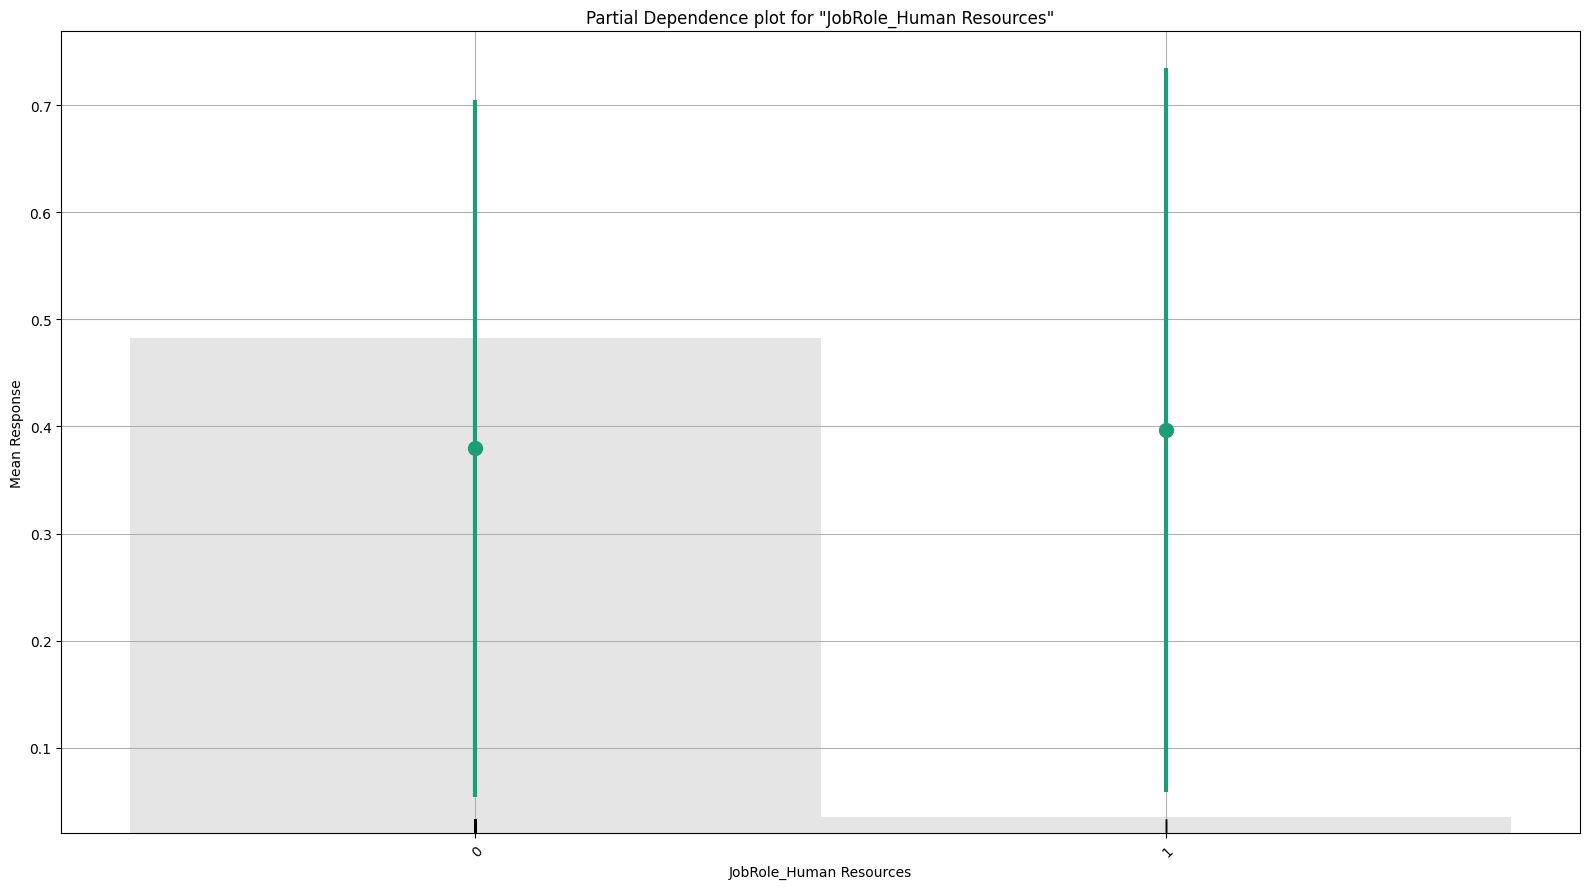

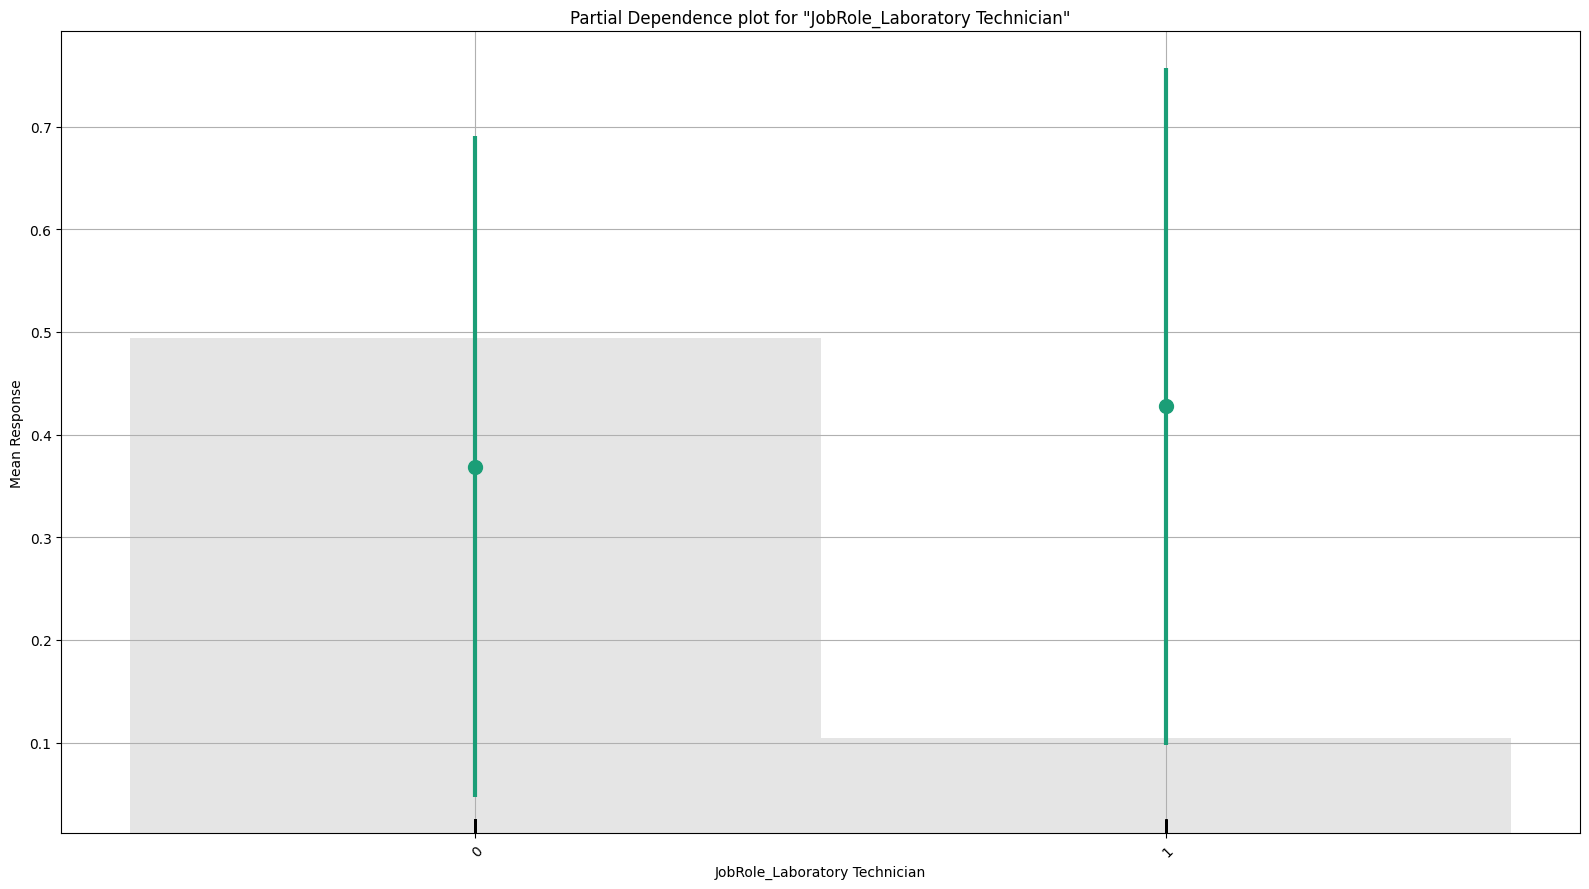

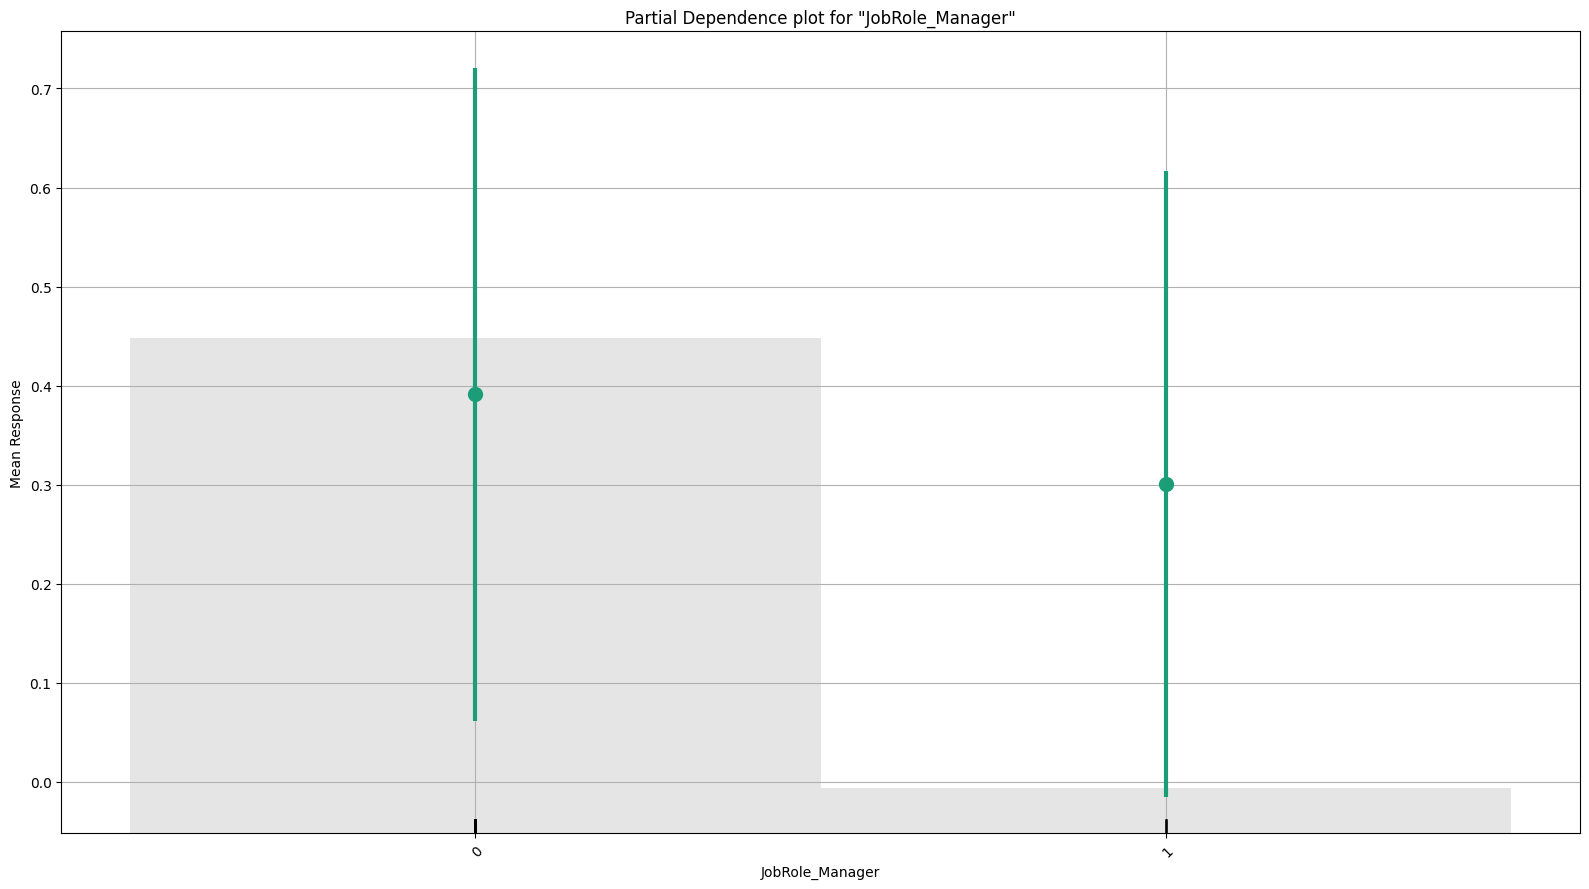

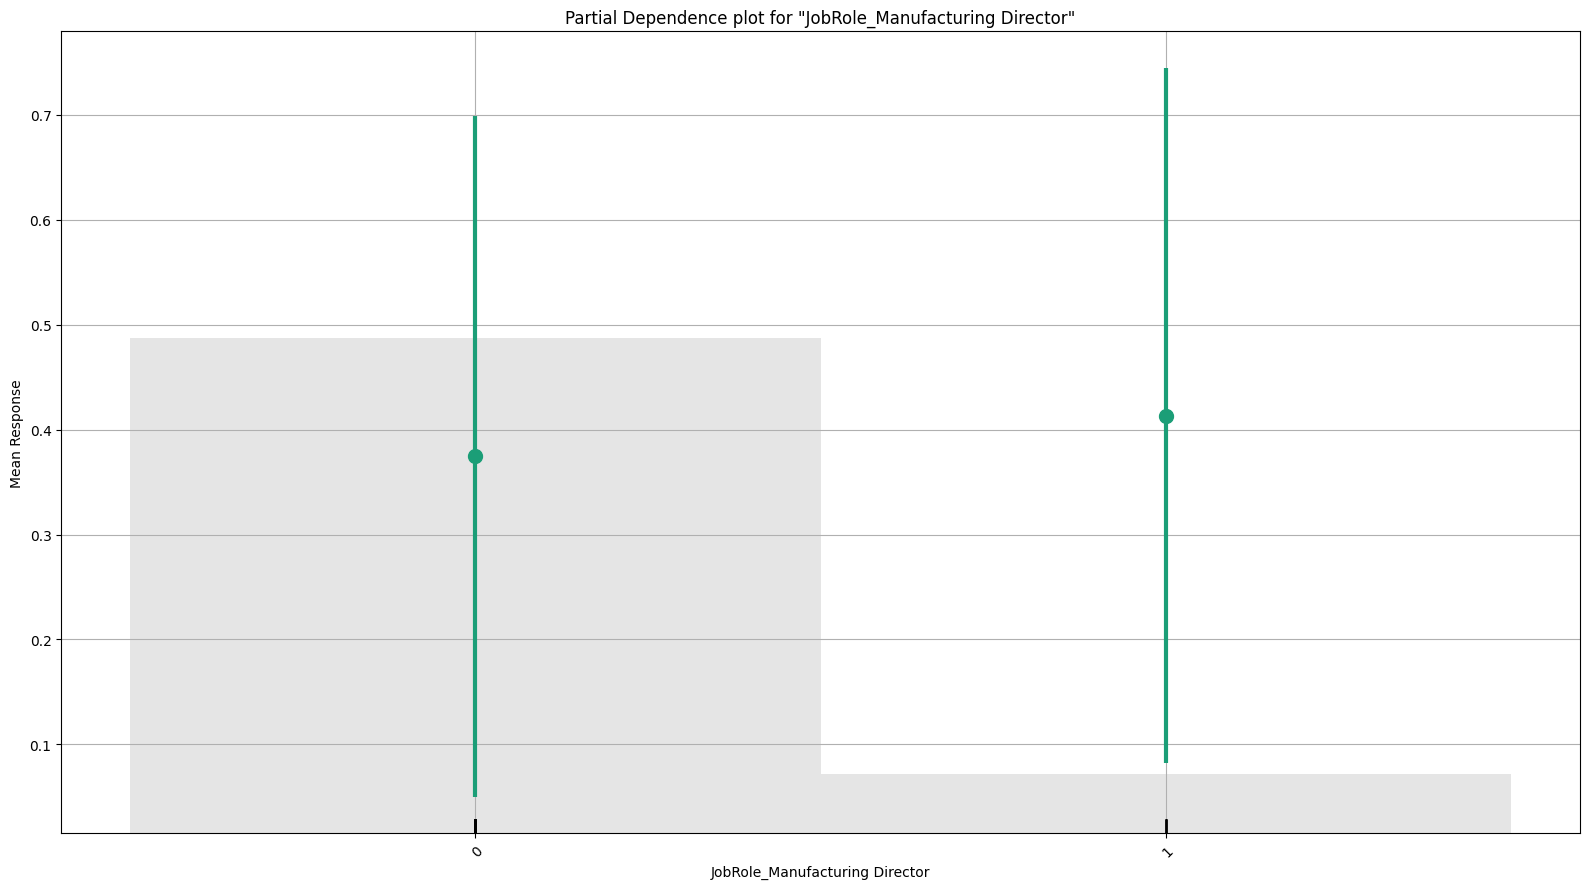

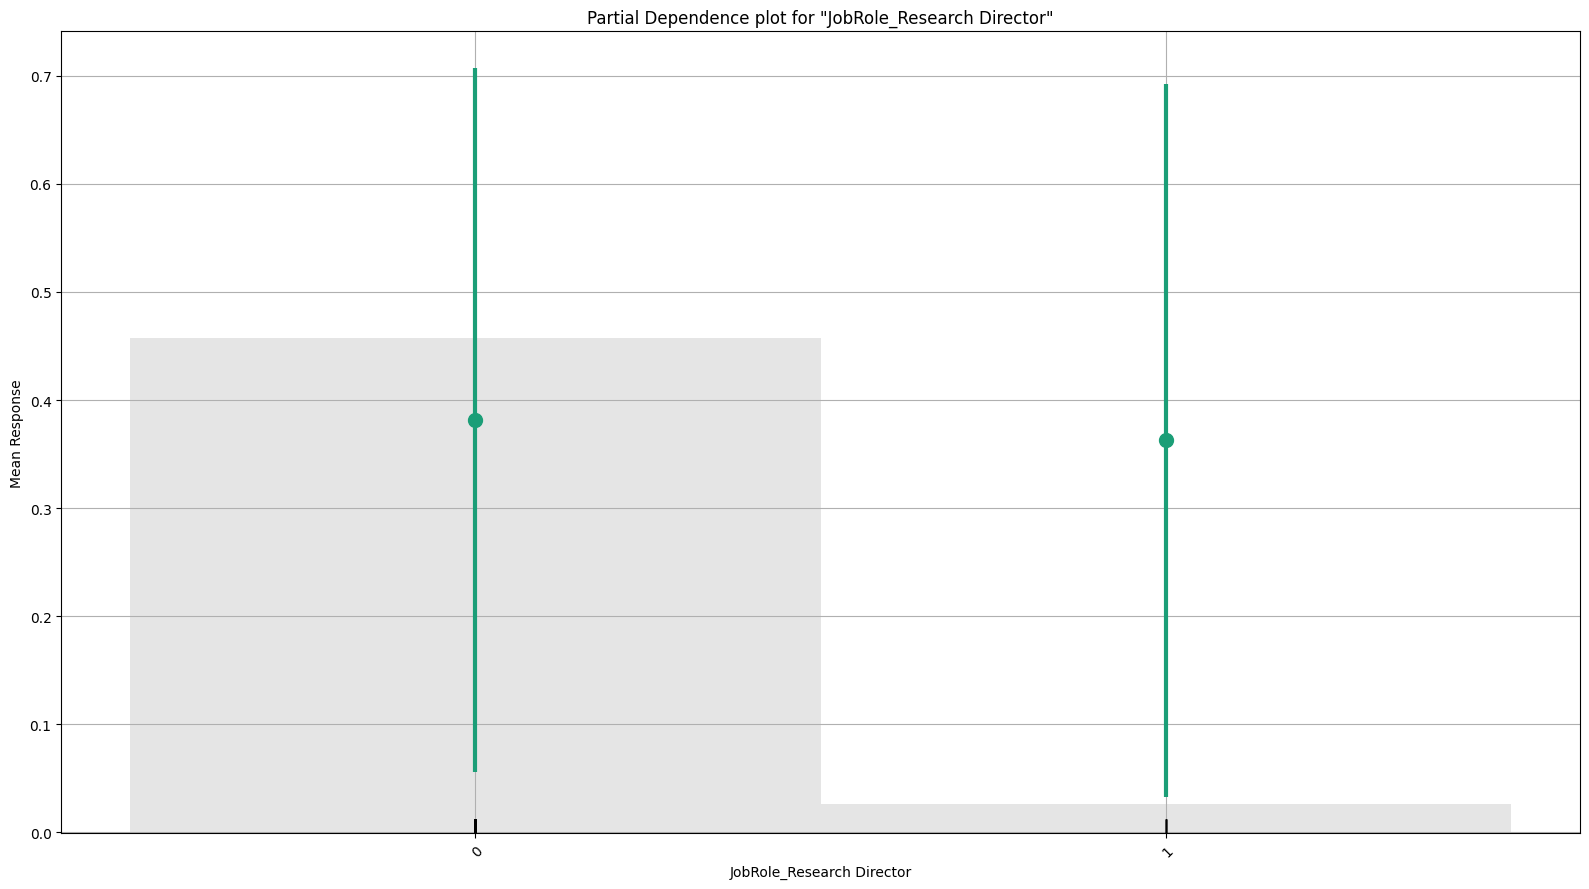

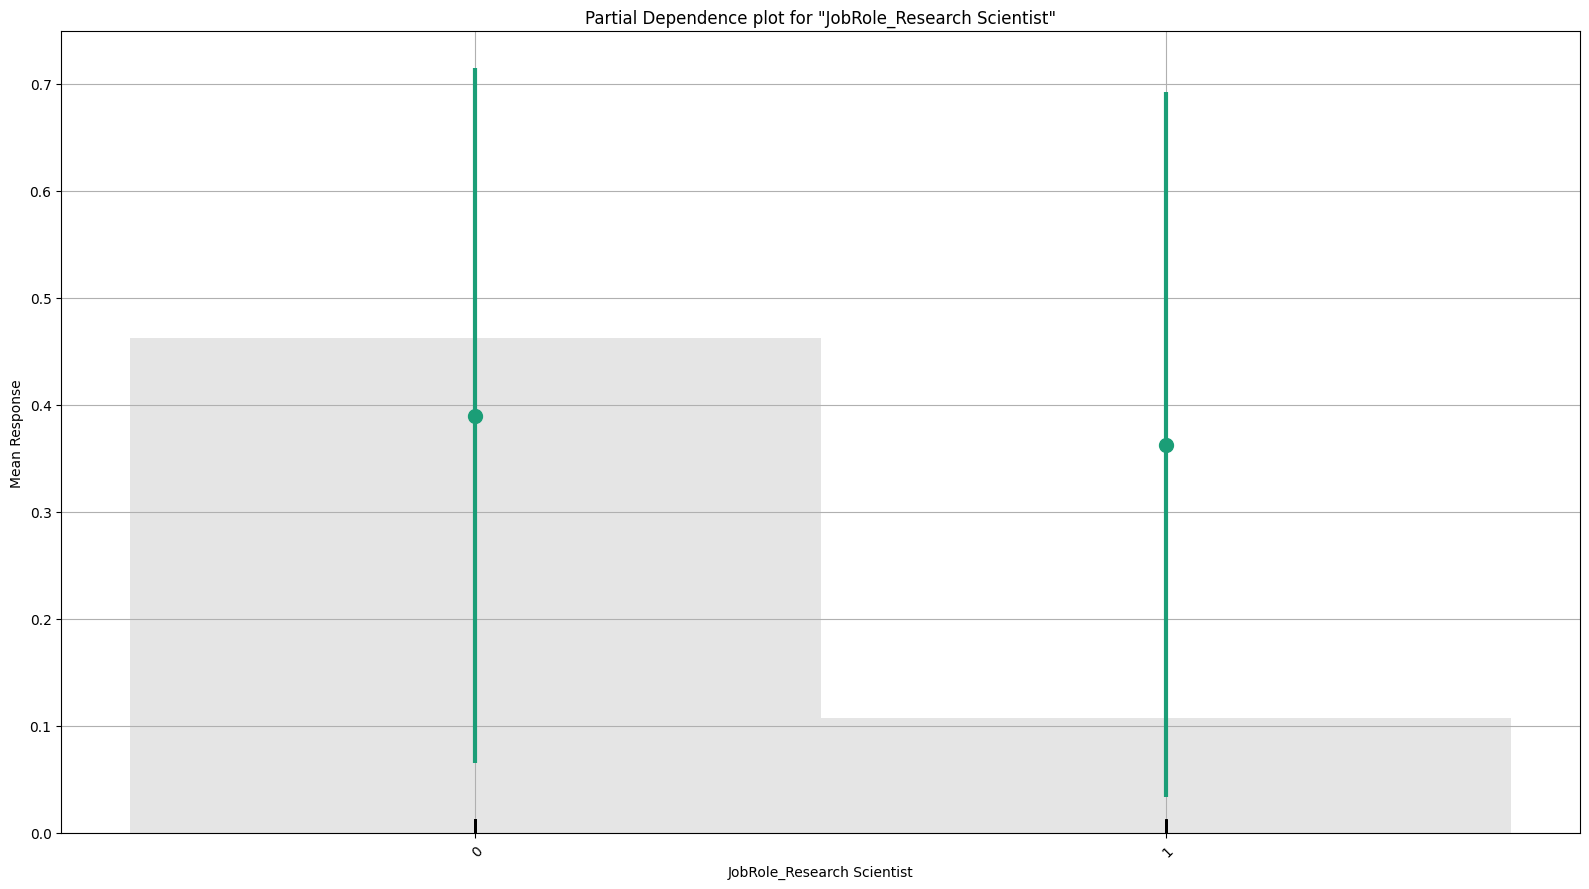

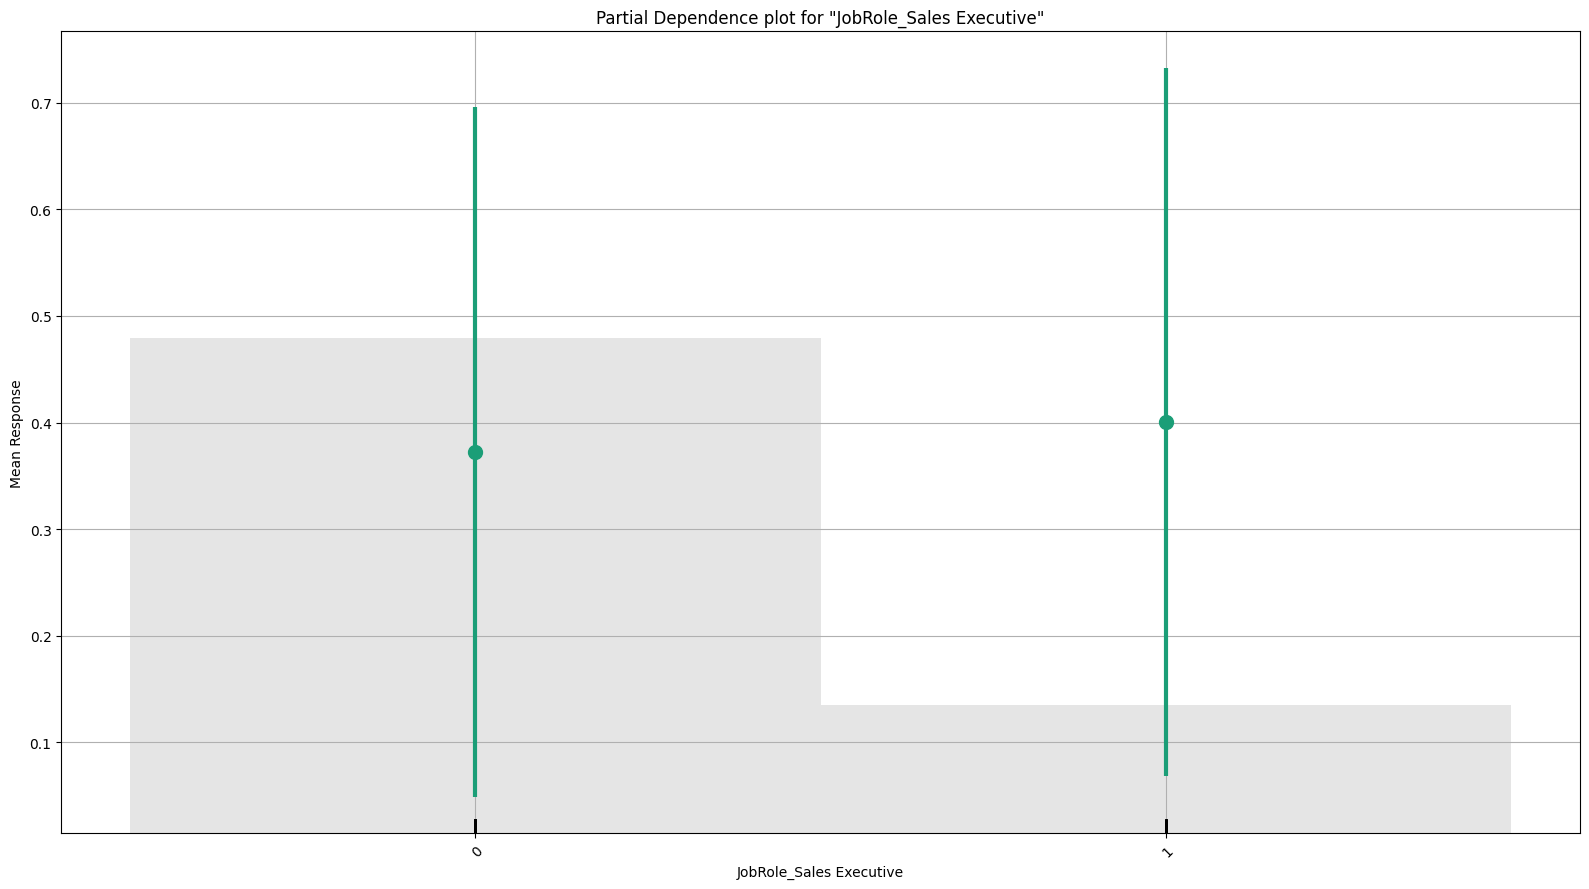

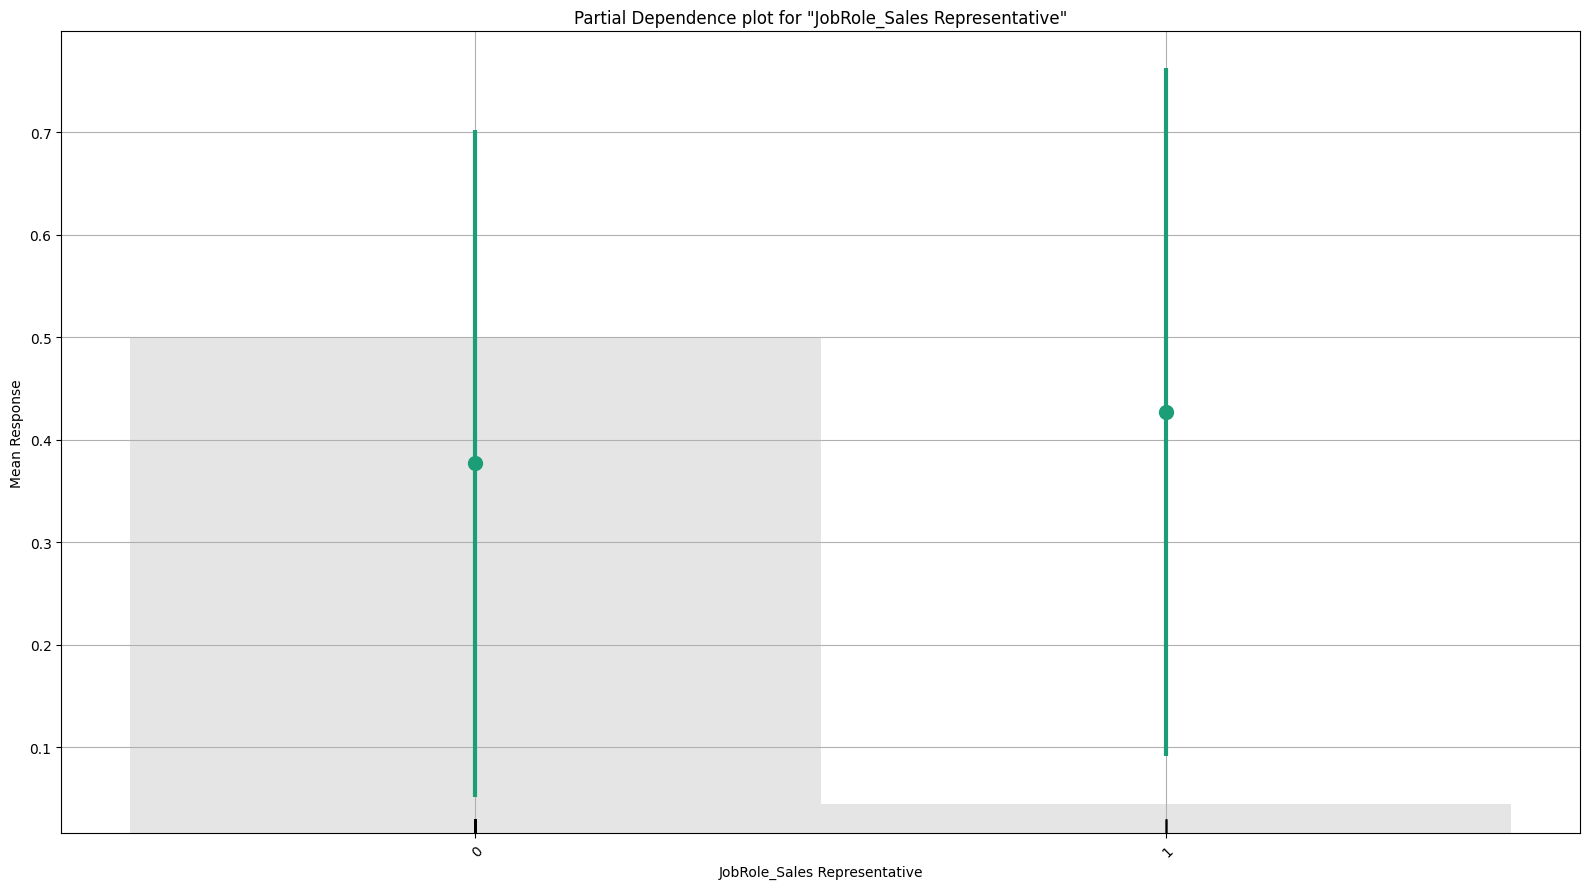

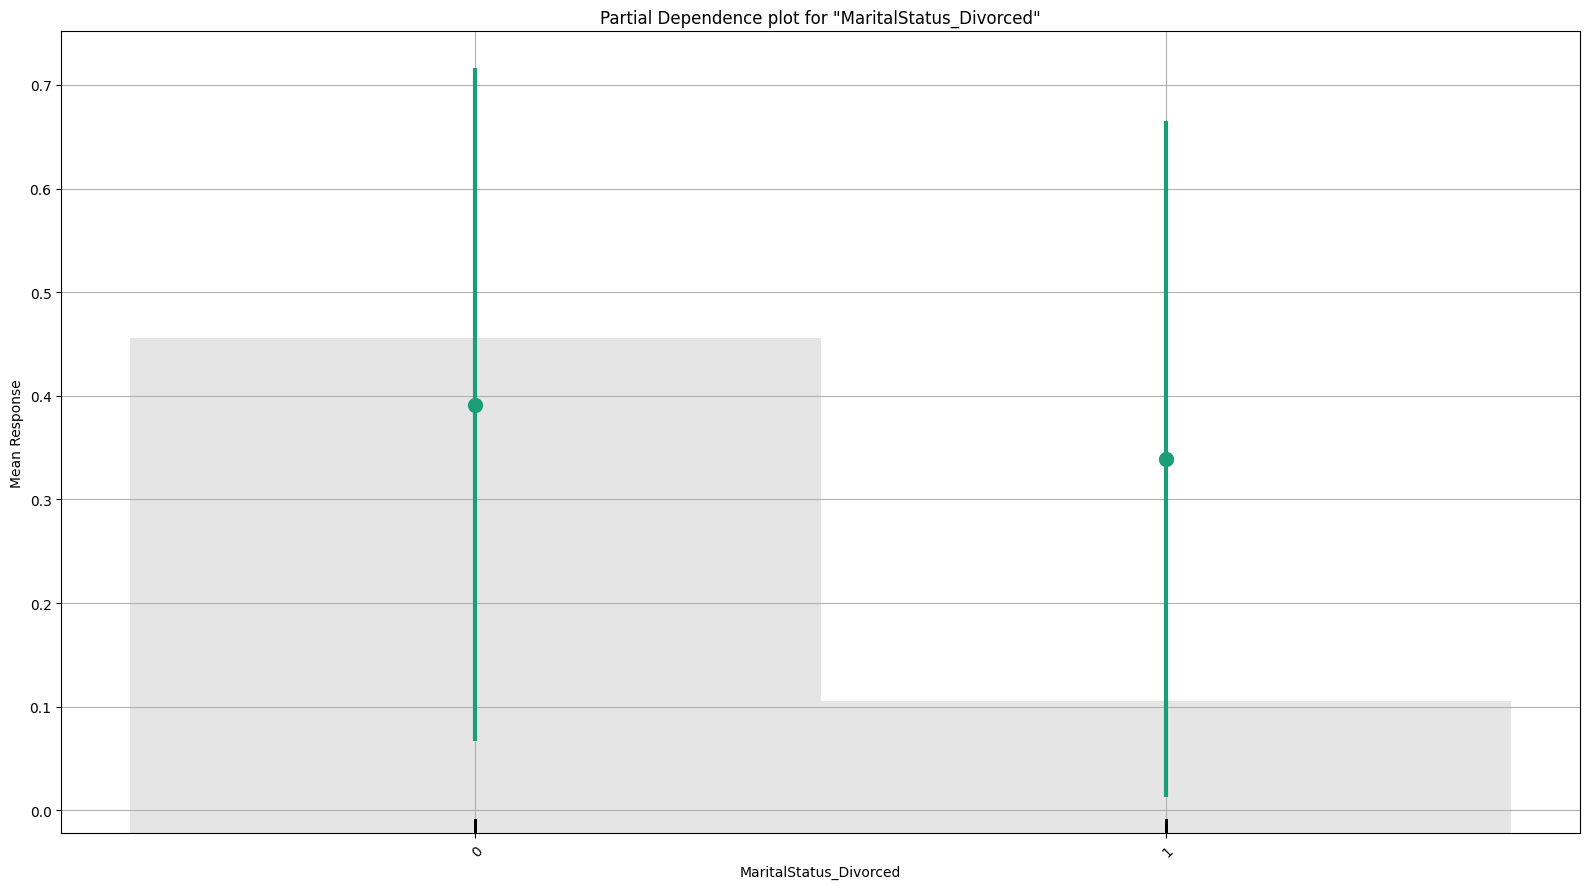

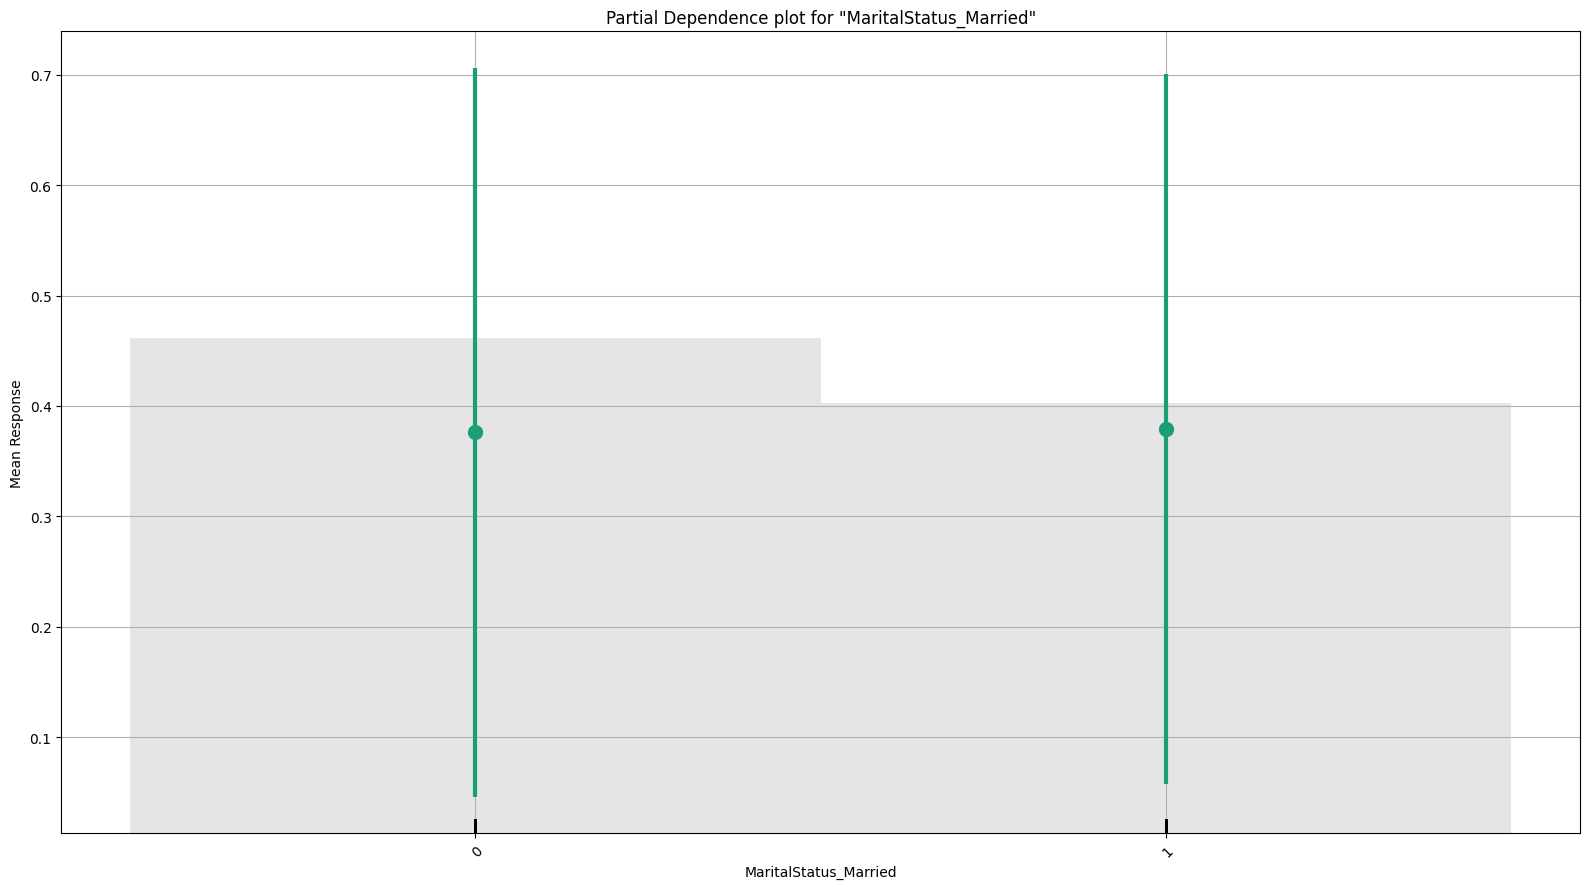

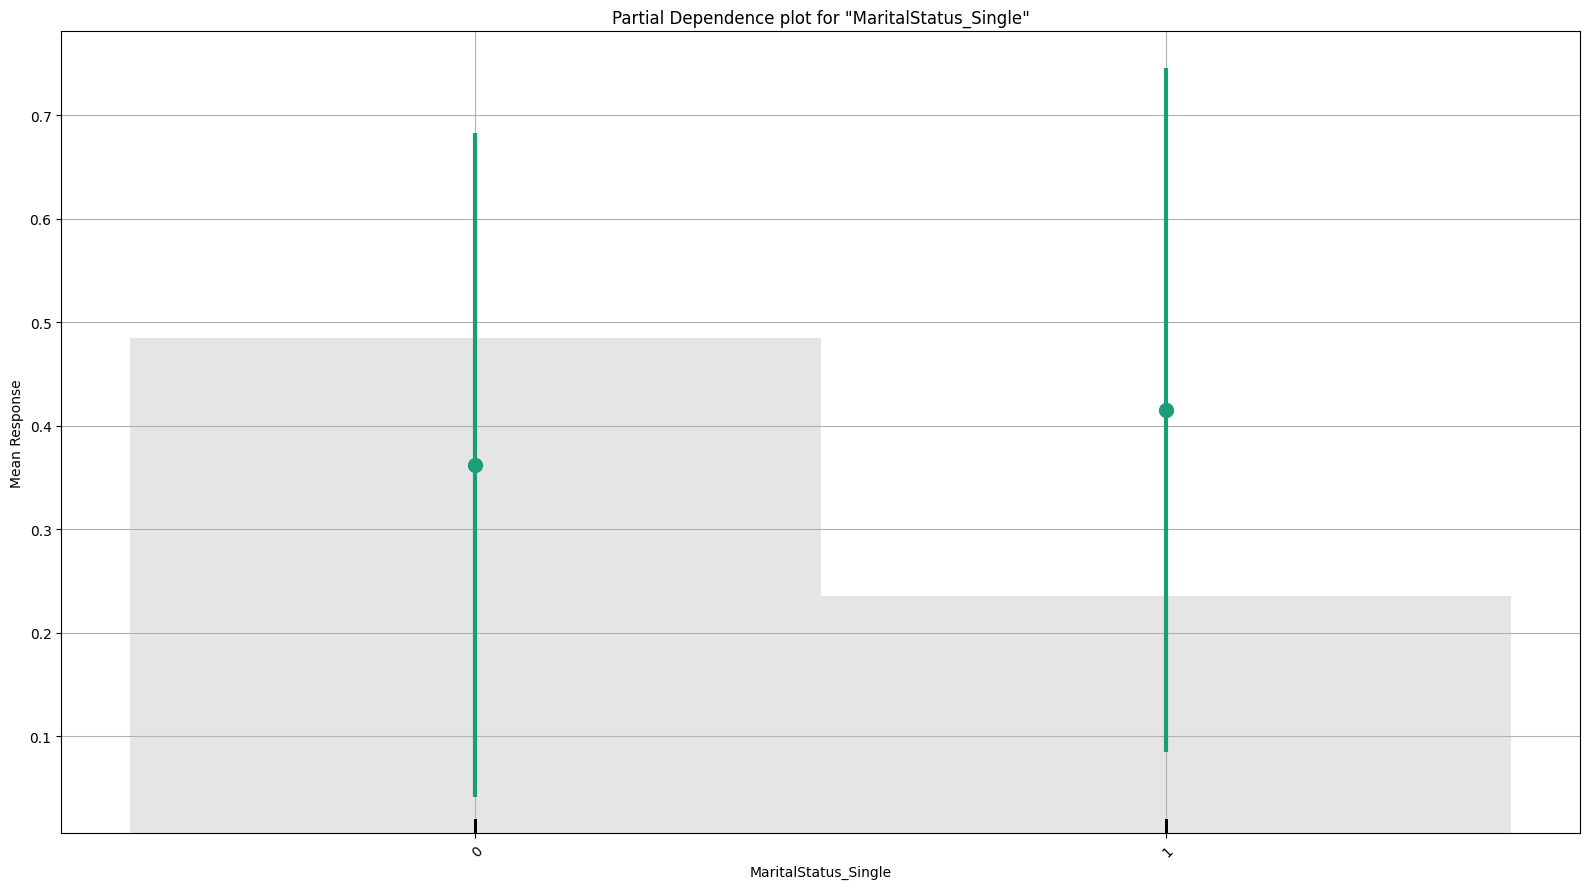

In [14]:
# Display test performance
cv_best_model.explain(test)

# Test Performance of other Models

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-----------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ------------
GBM_2_AutoML_1_20250318_133320                         0.866776   0.518411  0.606002                0.239172  0.41521   0.172399                 534                   0.009507  GBM
GLM_1_AutoML_1_20250318_133320                         0.866274   0.505235  0.676123                0.227453  0.411555  0.169377                 173                   0.010423  GLM
GBM_grid_1_AutoML_1_20250318_133320_model_11           0.866182   0.535463  0.621312                0.220326  0.420178  0.17655                  200                   0.010289  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_4            0.865086   0.54497   0.596356                0.229441  0.425279  0.180862                 208                   0.010317  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_7            0.860928   0.553413  0.595171                0.19634   0.429798  0.184726                 230                   0.009046  GBM
GBM_4_AutoML_1_20250318_133320                         0.855195   0.528484  0.604872                0.19634   0.419477  0.175961                 337                   0.010449  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_9            0.854121   0.530085  0.585287                0.236568  0.419382  0.175881                 212                   0.010508  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_13           0.854007   0.563664  0.527974                0.24116   0.43535   0.18953                  586                   0.010806  GBM
GBM_1_AutoML_1_20250318_133320                         0.853002   0.577526  0.541826                0.248287  0.440392  0.193946                 366                   0.009167  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_6            0.852065   0.597592  0.517158                0.222314  0.4509    0.203311                 188                   0.009616  GBM
GBM_3_AutoML_1_20250318_133320                         0.851311   0.522803  0.584686                0.239172  0.416035  0.173085                 404                   0.010156  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_10           0.850192   0.536493  0.564573                0.206414  0.423071  0.178989                 270                   0.010436  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_5            0.849598   0.527361  0.583443                0.207031  0.417748  0.174514                 400                   0.010221  GBM
GBM_5_AutoML_1_20250318_133320                         0.846971   0.534394  0.563507                0.288857  0.421097  0.177323                 413                   0.01025   GBM
GBM_grid_1_AutoML_1_20250318_133320_model_3            0.846057   0.555059  0.578664                0.240817  0.432785  0.187303                 209                   0.018964  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_2            0.845212   0.557729  0.561866                0.246985  0.432647  0.187183                 275                   0.008931  GBM
DeepLearning_grid_3_AutoML_1_20250318_133320_model_13  0.830958   1.34062   0.616466                0.234306  0.480194  0.230587                4503                   0.016308  DeepLearning
DeepLearning_grid_1_AutoML_1_20250318_133320_model_13  0.830912   1.33006   0.623781                0.231702  0.560016  0.313618                1568                   0.012727  DeepLearning
GBM_grid_1_AutoML_1_20250318_133320_model_1            0.830135   0.528296  0.578666                0.256716  0.419333  0.17584                  300                   0.012951  GBM
DeepLearning_grid_3_AutoML_1_20250318_133320_model_9   0.830112   1.6523    0.57644                 0.251508  0.454397  0.206476                1630                   0.12

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_133320

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9000002498569855
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      366  18   0.0469   (18.0/384.0)
1      27   30   0.4737   (27.0/57.0)
Total  393  48   0.102    (45.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

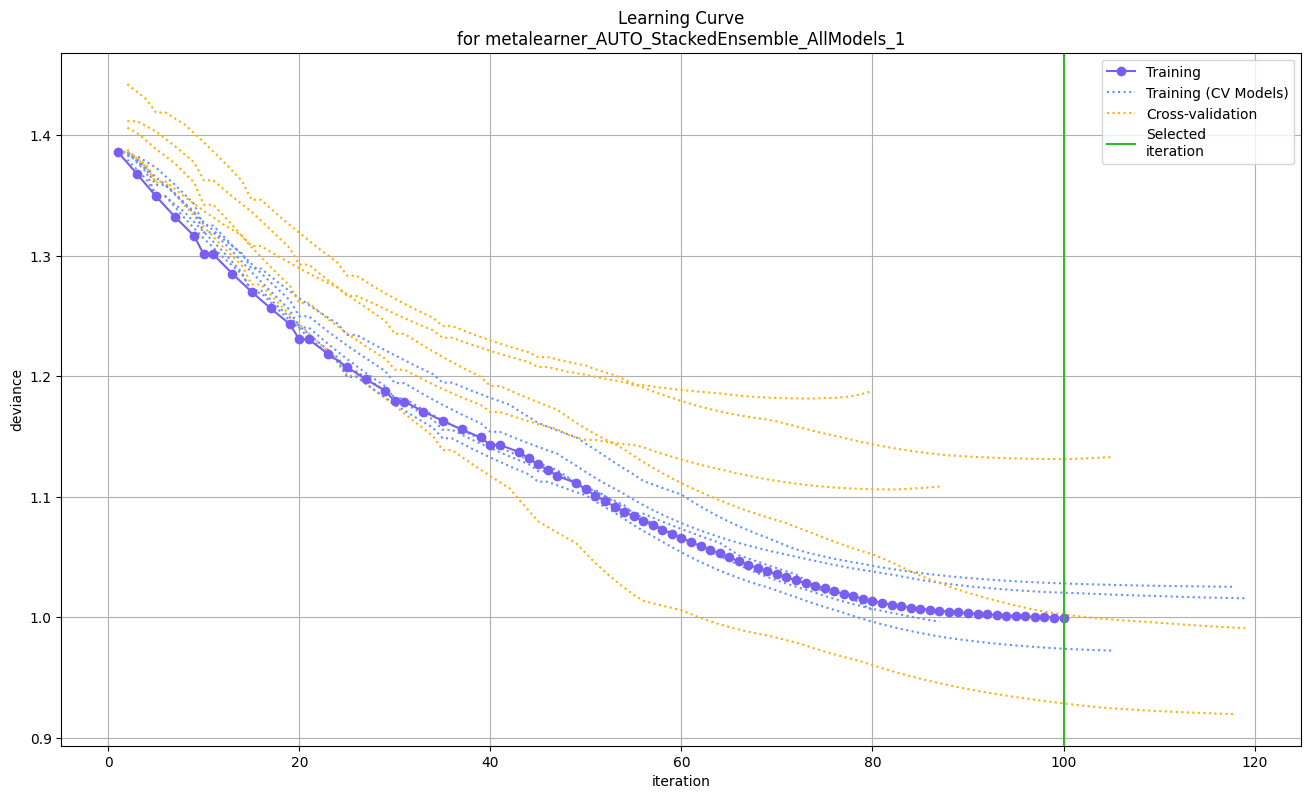

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

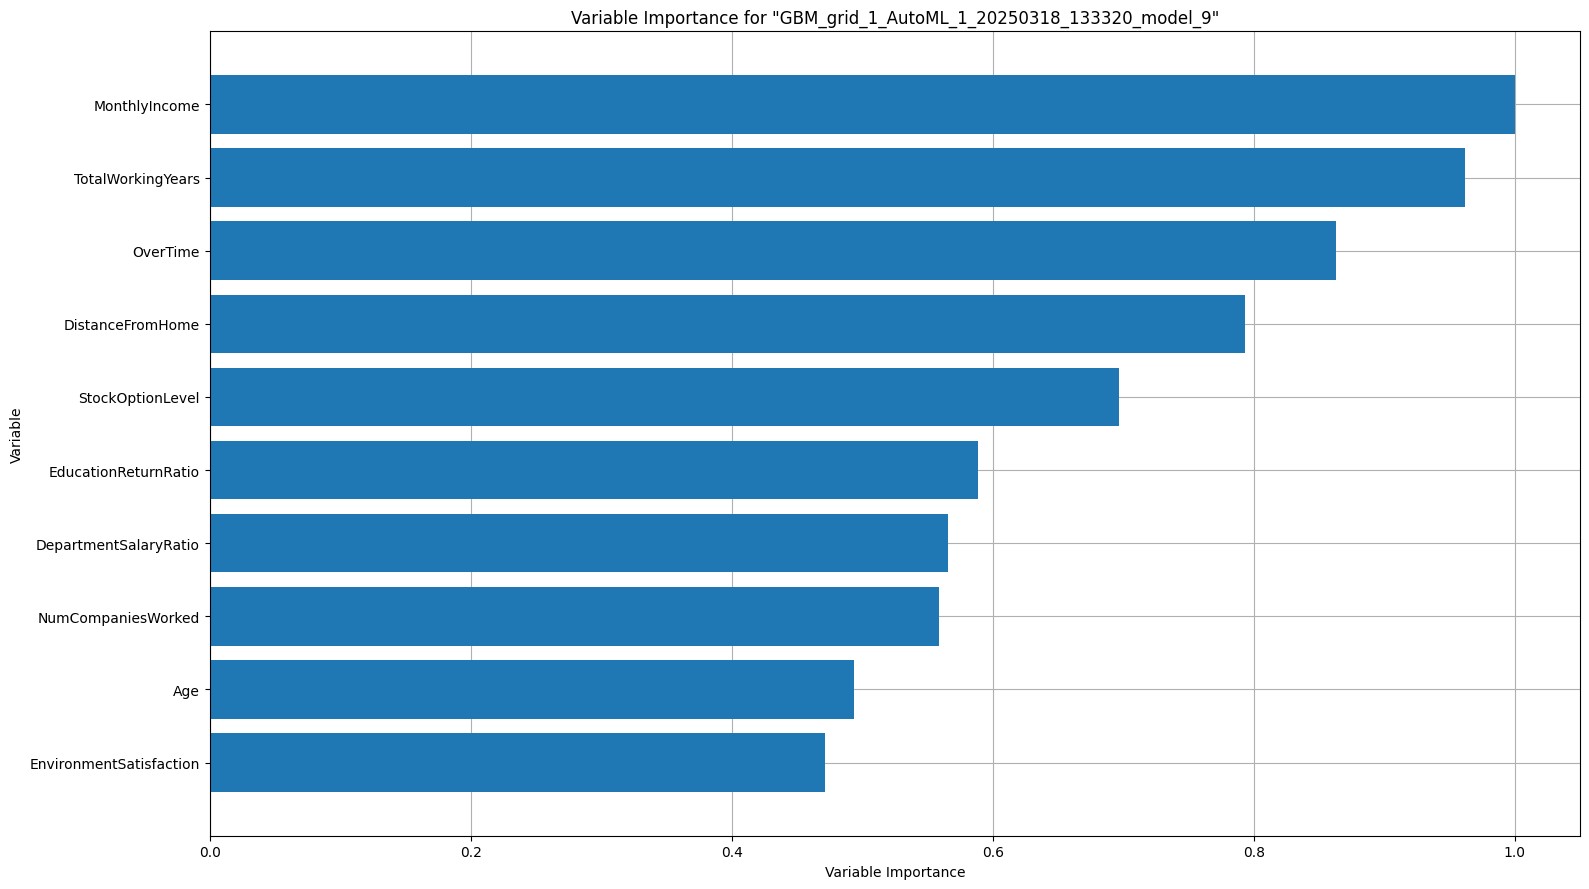

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

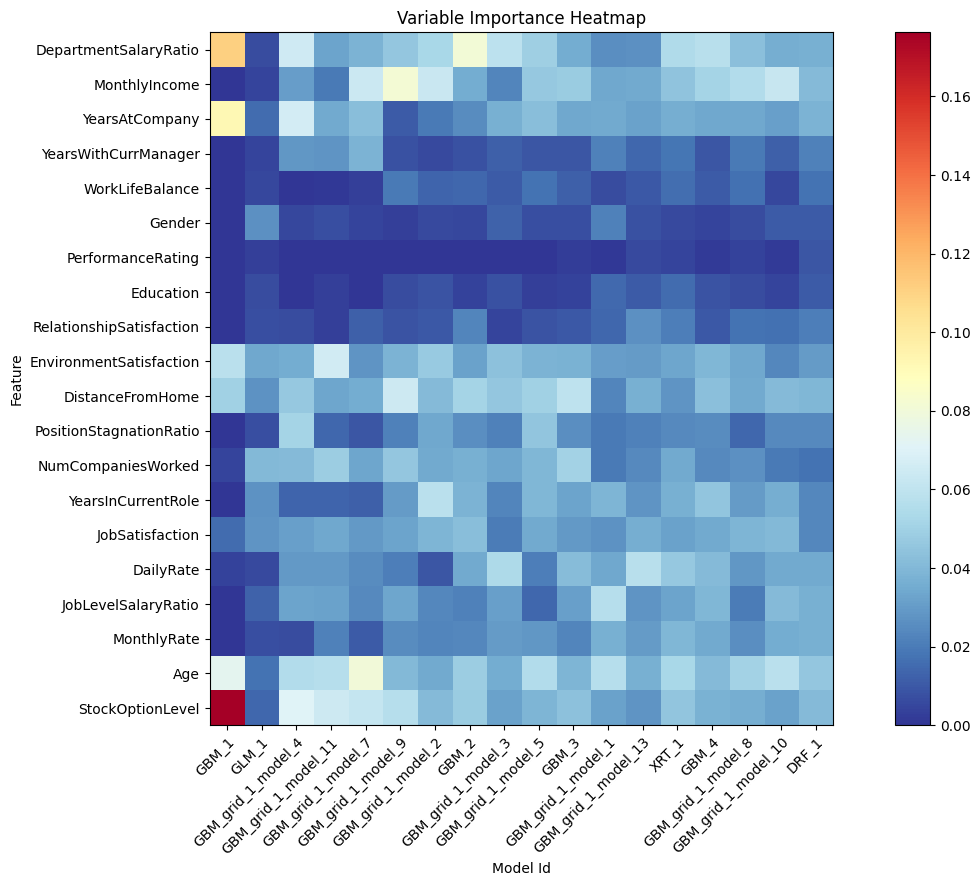

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

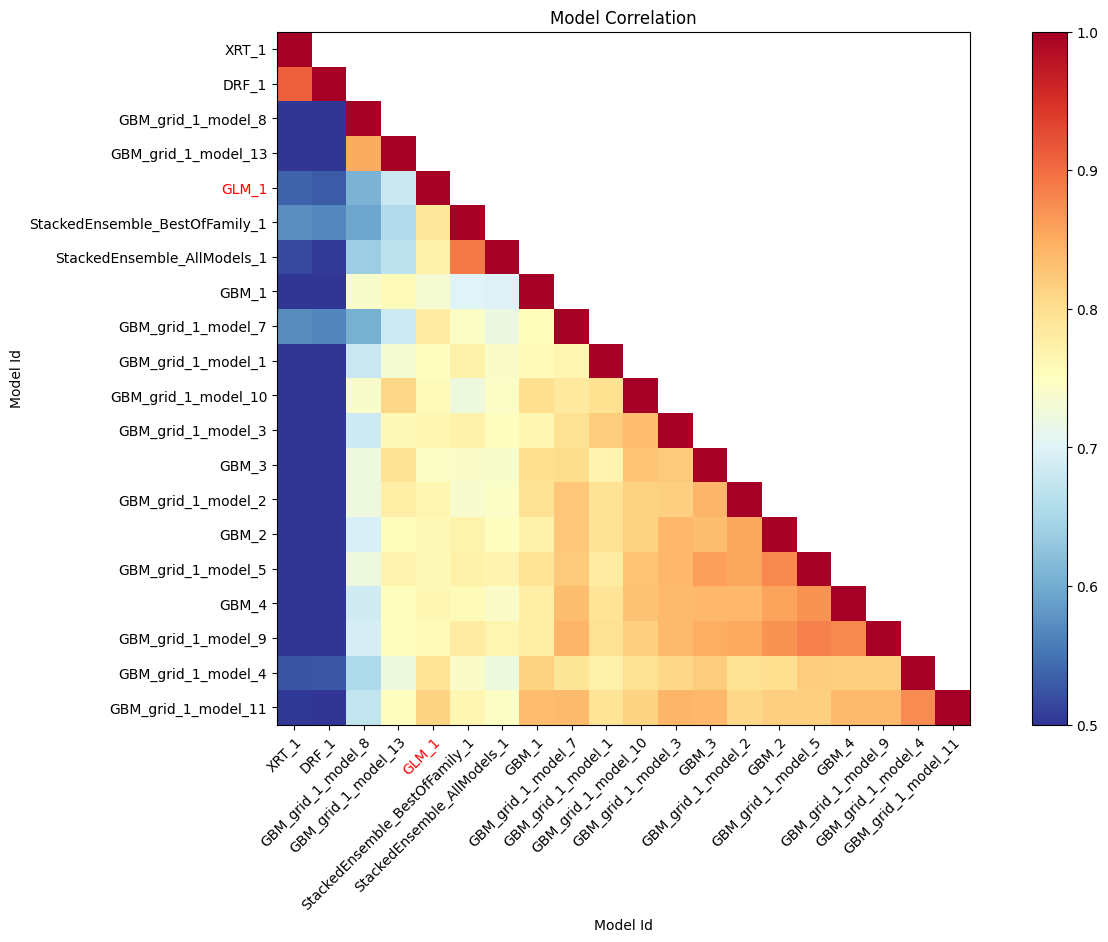

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

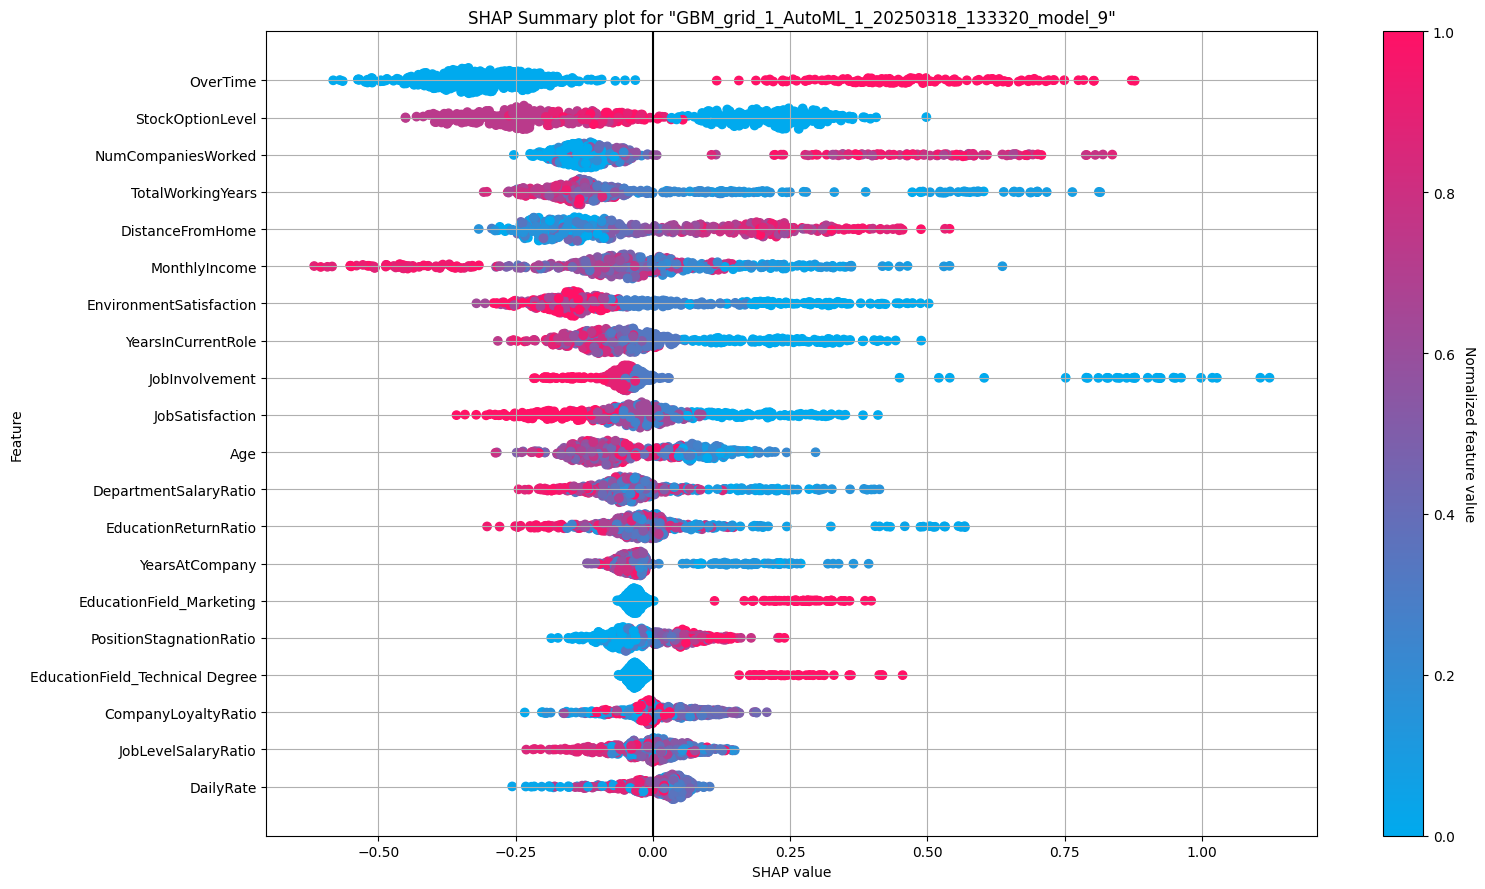

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

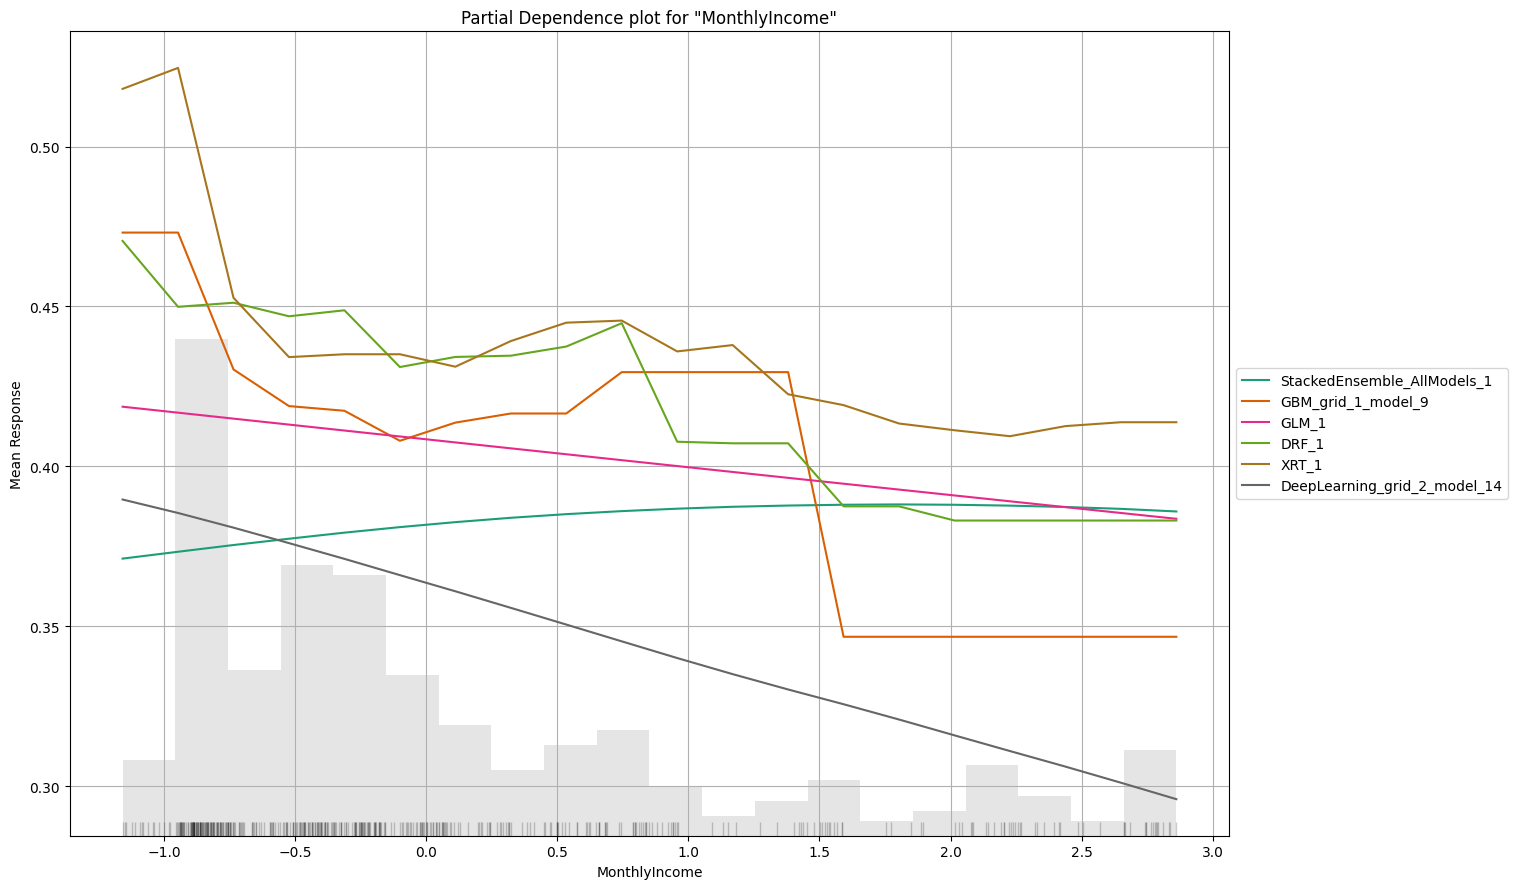

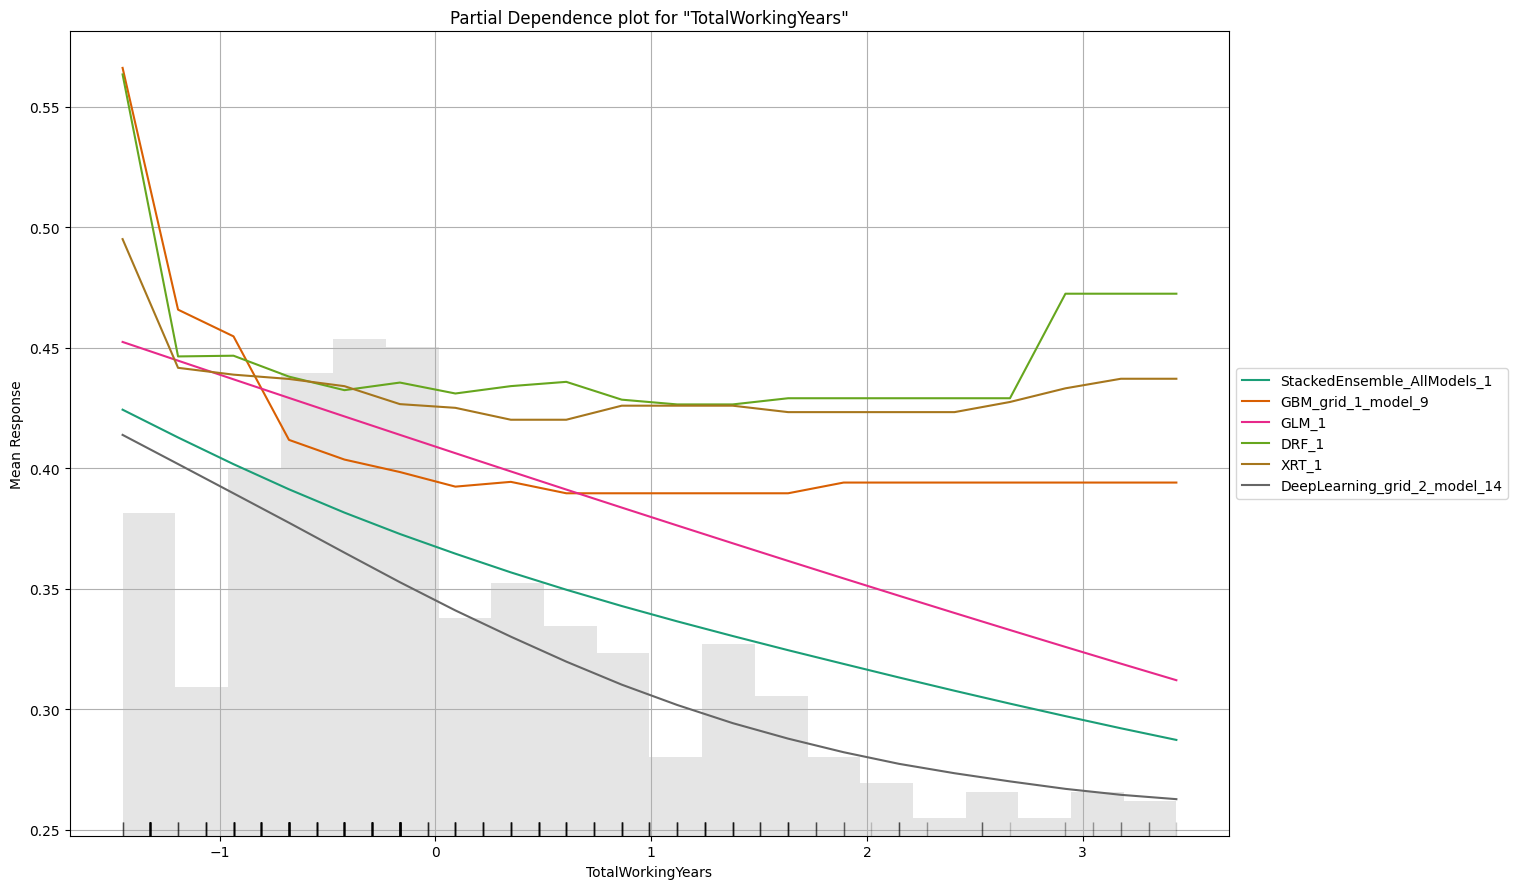

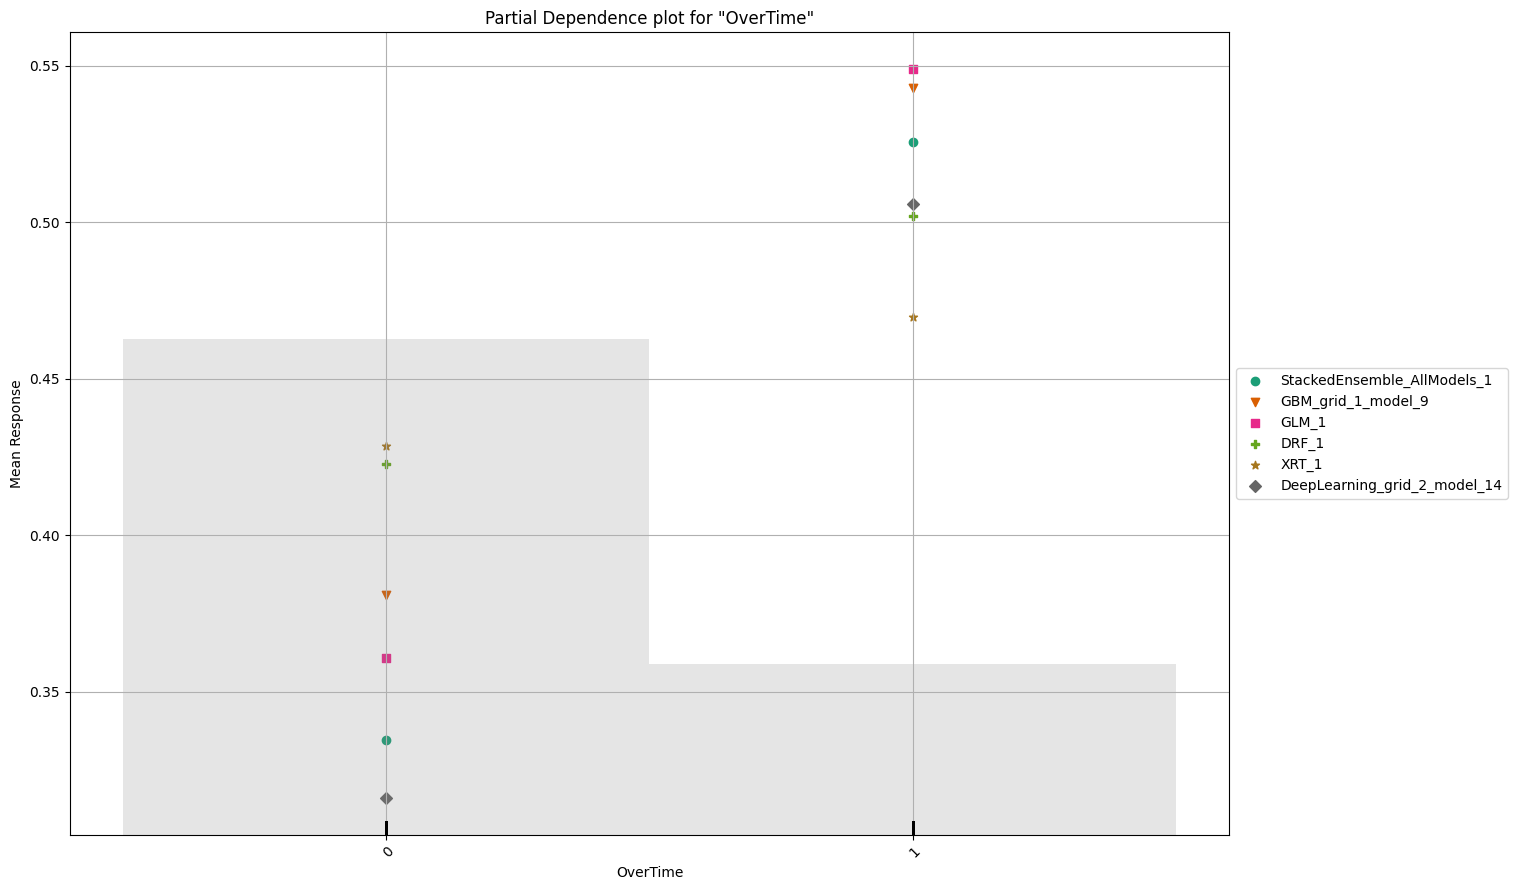

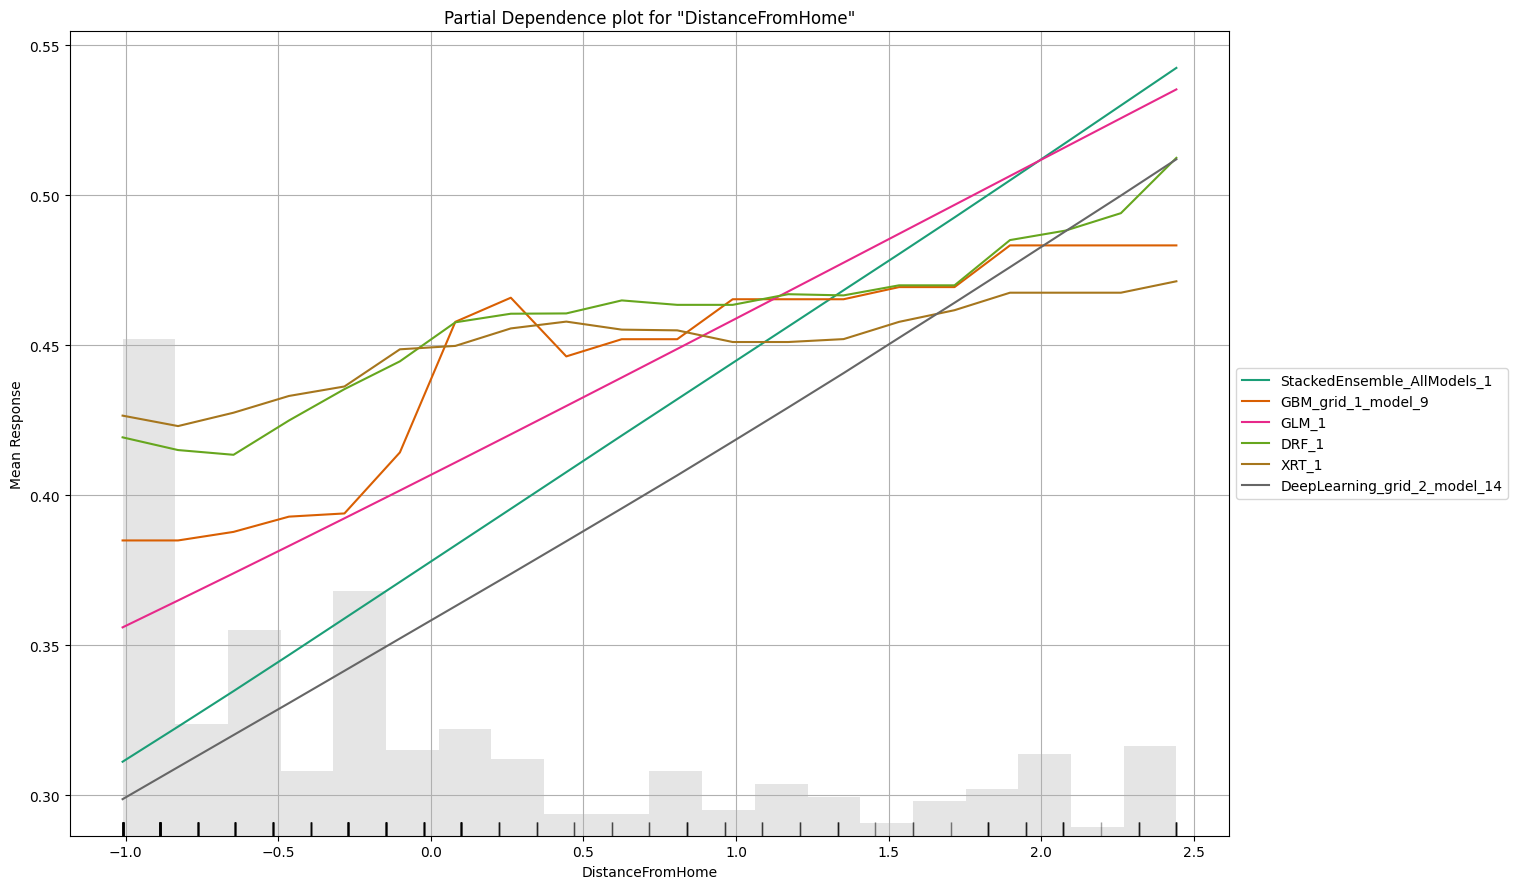

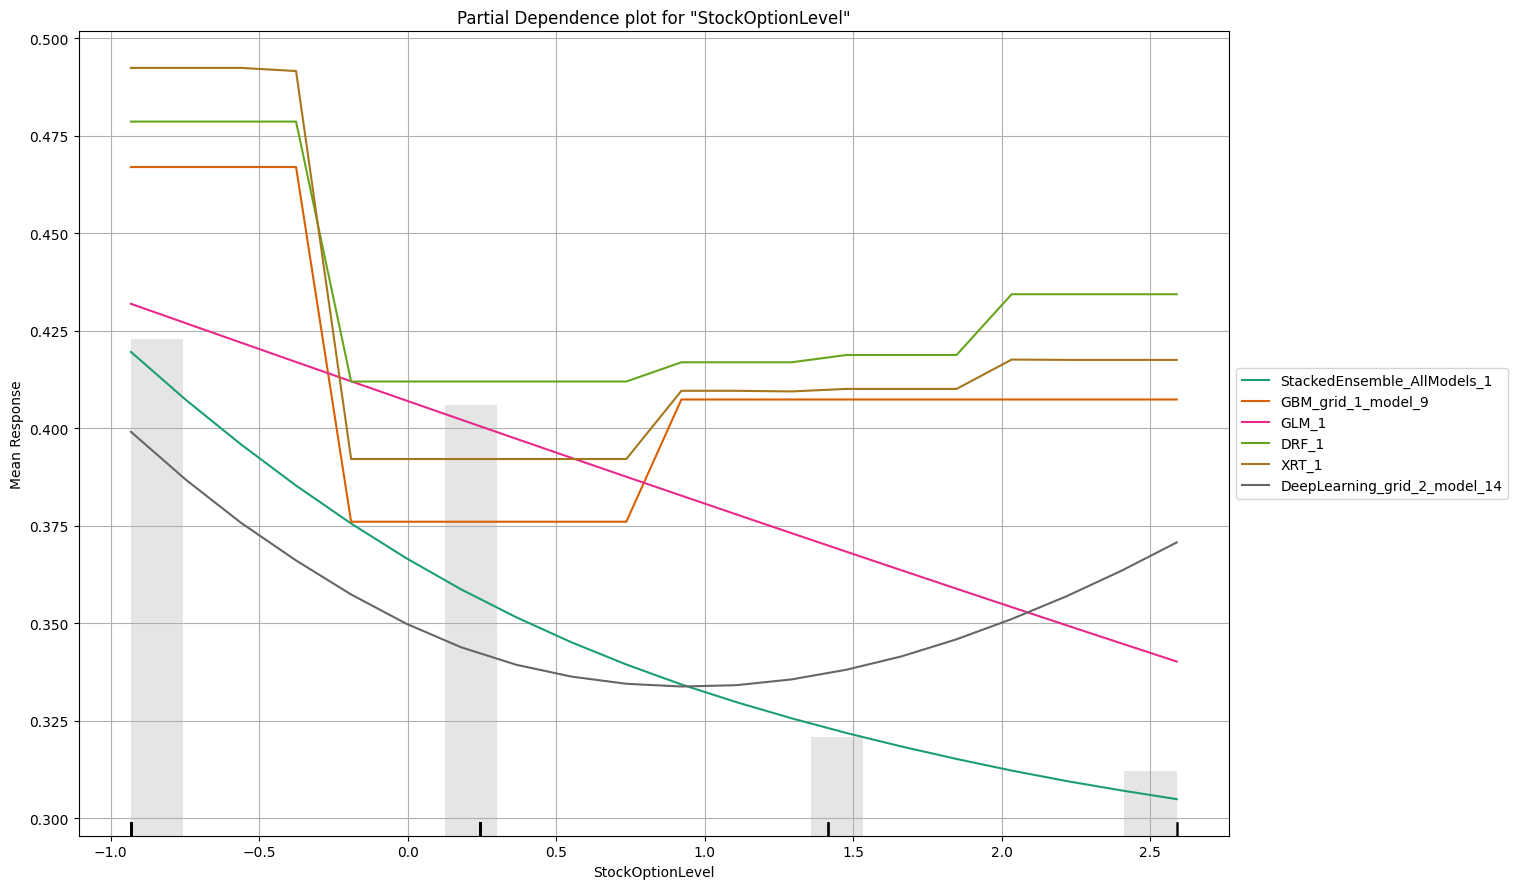

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-----------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ------------
GBM_2_AutoML_1_20250318_133320                         0.866776   0.518411  0.606002                0.239172  0.41521   0.172399                 534                   0.009507  GBM
GLM_1_AutoML_1_20250318_133320                         0.866274   0.505235  0.676123                0.227453  0.411555  0.169377                 173                   0.010423  GLM
GBM_grid_1_AutoML_1_20250318_133320_model_11           0.866182   0.535463  0.621312                0.220326  0.420178  0.17655                  200                   0.010289  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_4            0.865086   0.54497   0.596356                0.229441  0.425279  0.180862                 208                   0.010317  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_7            0.860928   0.553413  0.595171                0.19634   0.429798  0.184726                 230                   0.009046  GBM
GBM_4_AutoML_1_20250318_133320                         0.855195   0.528484  0.604872                0.19634   0.419477  0.175961                 337                   0.010449  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_9            0.854121   0.530085  0.585287                0.236568  0.419382  0.175881                 212                   0.010508  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_13           0.854007   0.563664  0.527974                0.24116   0.43535   0.18953                  586                   0.010806  GBM
GBM_1_AutoML_1_20250318_133320                         0.853002   0.577526  0.541826                0.248287  0.440392  0.193946                 366                   0.009167  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_6            0.852065   0.597592  0.517158                0.222314  0.4509    0.203311                 188                   0.009616  GBM
GBM_3_AutoML_1_20250318_133320                         0.851311   0.522803  0.584686                0.239172  0.416035  0.173085                 404                   0.010156  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_10           0.850192   0.536493  0.564573                0.206414  0.423071  0.178989                 270                   0.010436  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_5            0.849598   0.527361  0.583443                0.207031  0.417748  0.174514                 400                   0.010221  GBM
GBM_5_AutoML_1_20250318_133320                         0.846971   0.534394  0.563507                0.288857  0.421097  0.177323                 413                   0.01025   GBM
GBM_grid_1_AutoML_1_20250318_133320_model_3            0.846057   0.555059  0.578664                0.240817  0.432785  0.187303                 209                   0.018964  GBM
GBM_grid_1_AutoML_1_20250318_133320_model_2            0.845212   0.557729  0.561866                0.246985  0.432647  0.187183                 275                   0.008931  GBM
DeepLearning_grid_3_AutoML_1_20250318_133320_model_13  0.830958   1.34062   0.616466                0.234306  0.480194  0.230587                4503                   0.016308  DeepLearning
DeepLearning_grid_1_AutoML_1_20250318_133320_model_13  0.830912   1.33006   0.623781                0.231702  0.560016  0.313618                1568                   0.012727  DeepLearning
GBM_grid_1_AutoML_1_20250318_133320_model_1            0.830135   0.528296  0.578666                0.256716  0.419333  0.17584                  300                   0.012951  GBM
DeepLearning_grid_3_AutoML_1_20250318_133320_model_9   0.830112   1.6523    0.57644                 0.251508  0.454397  0.206476                1630                   0.12

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20250318_133320

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9000002498569855
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      366  18   0.0469   (18.0/384.0)
1      27   30   0.4737   (27.0/57.0)
Total  393  48   0.102    (45.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

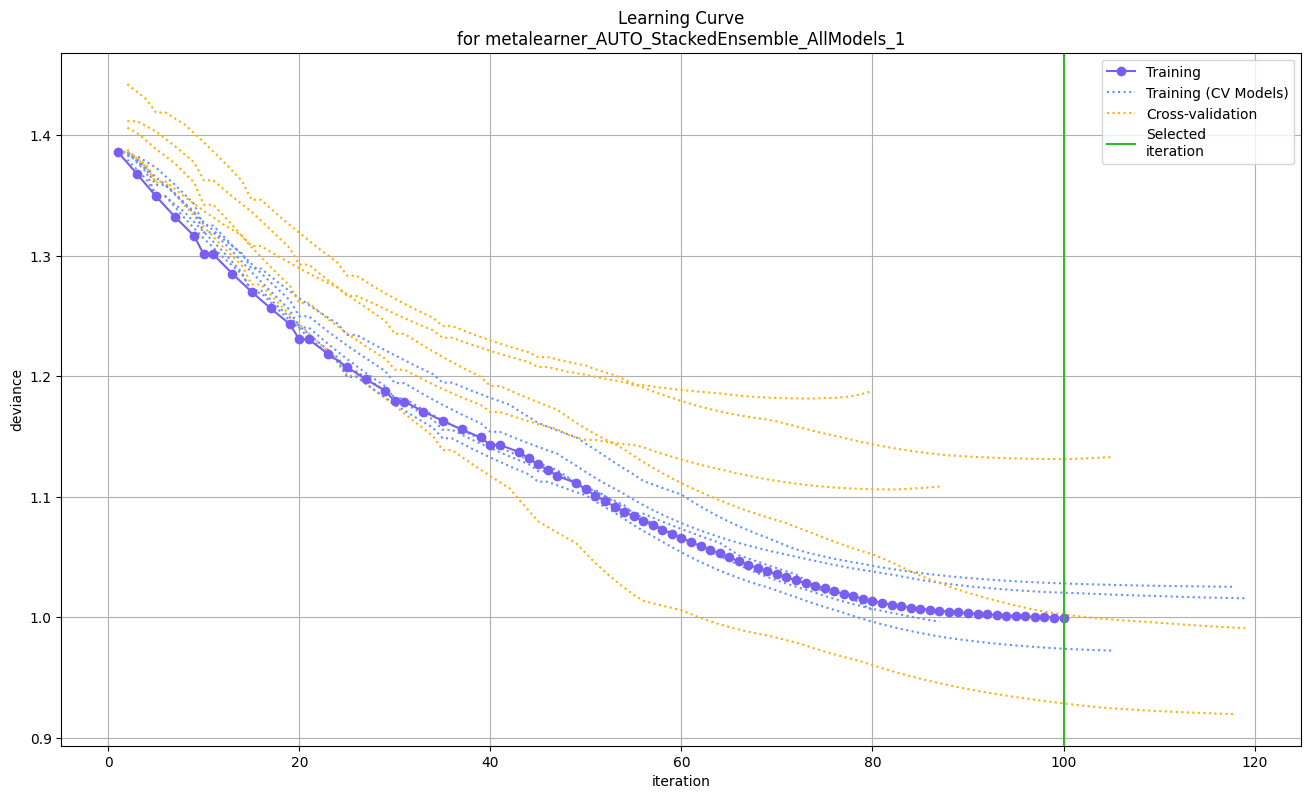

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

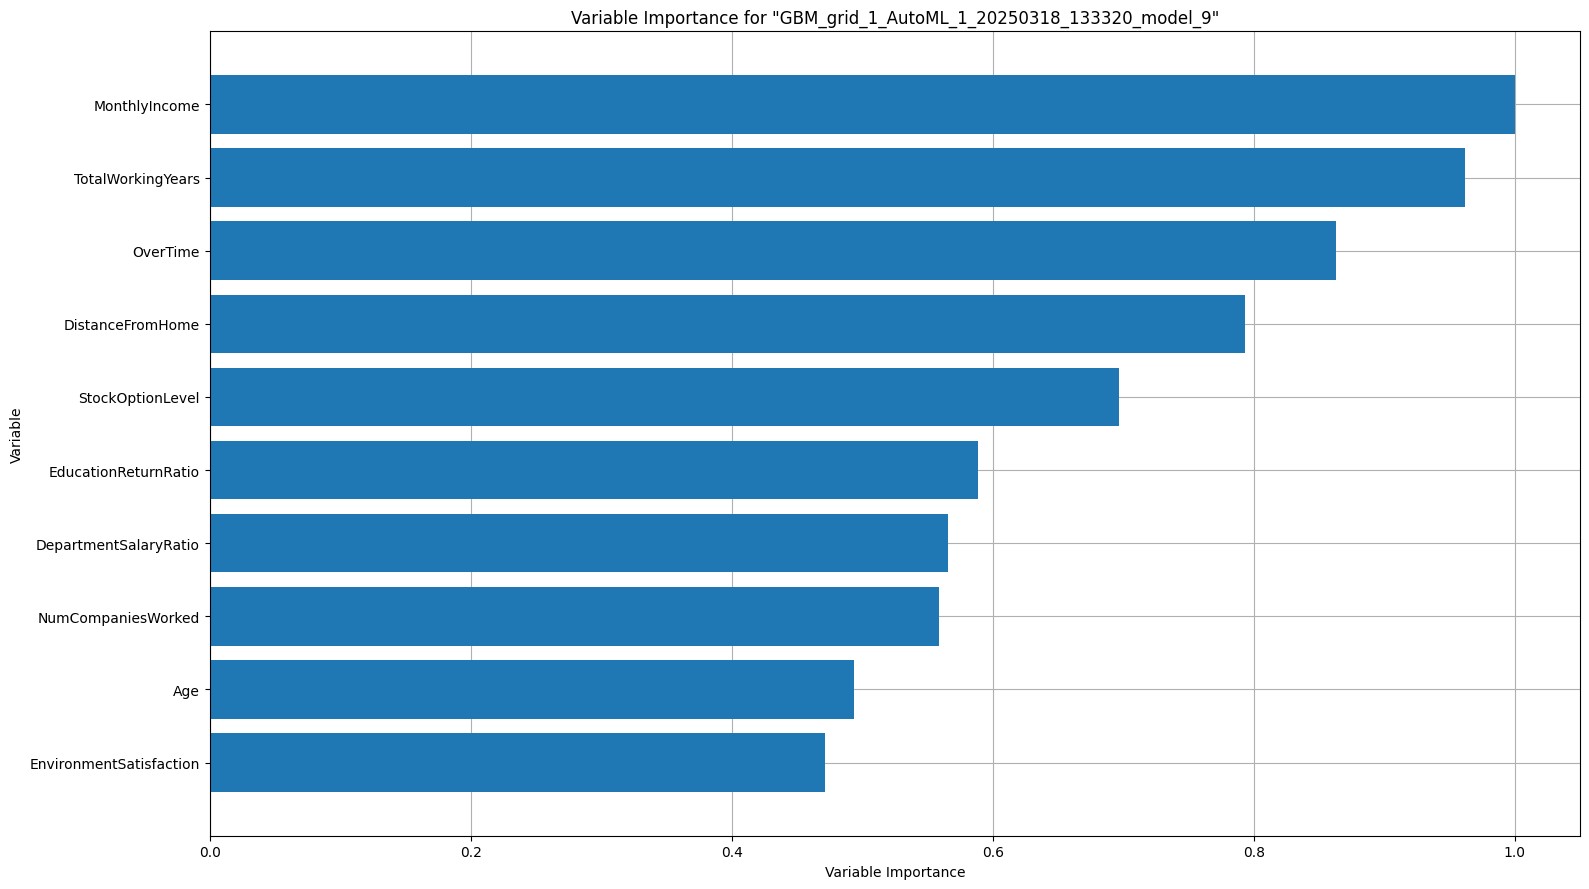

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

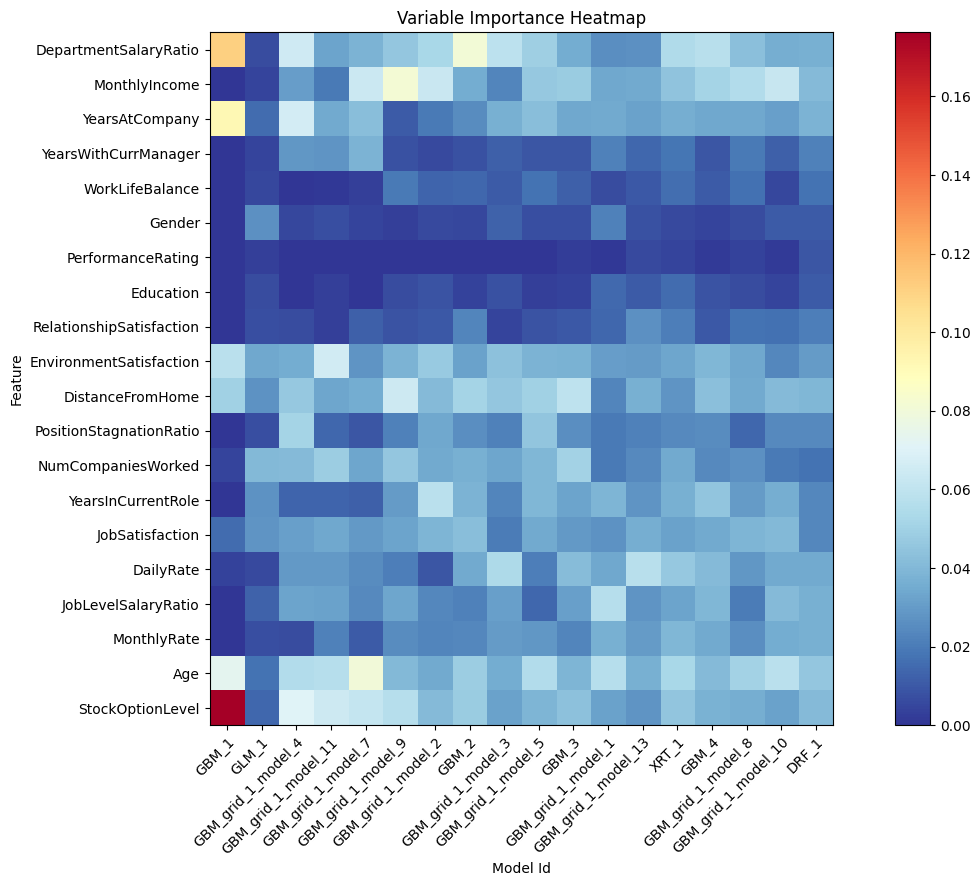

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

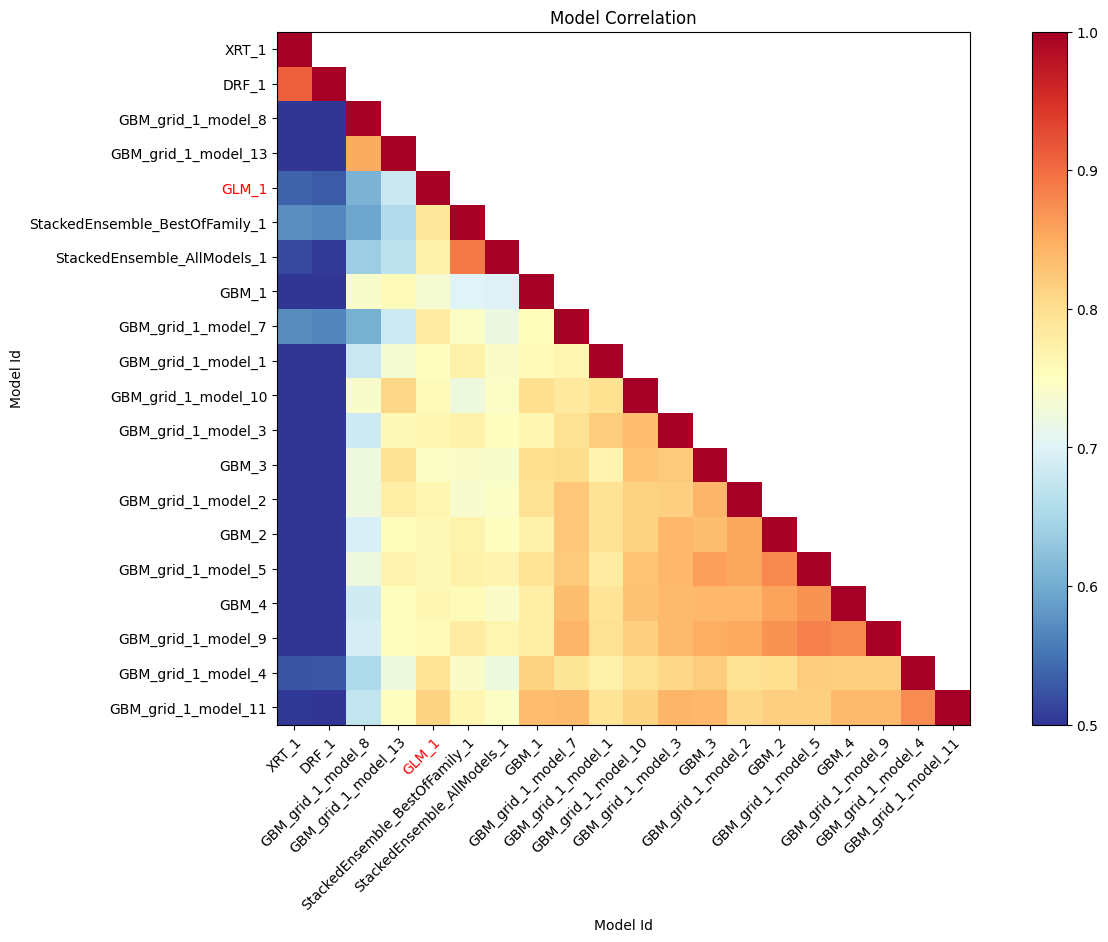

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

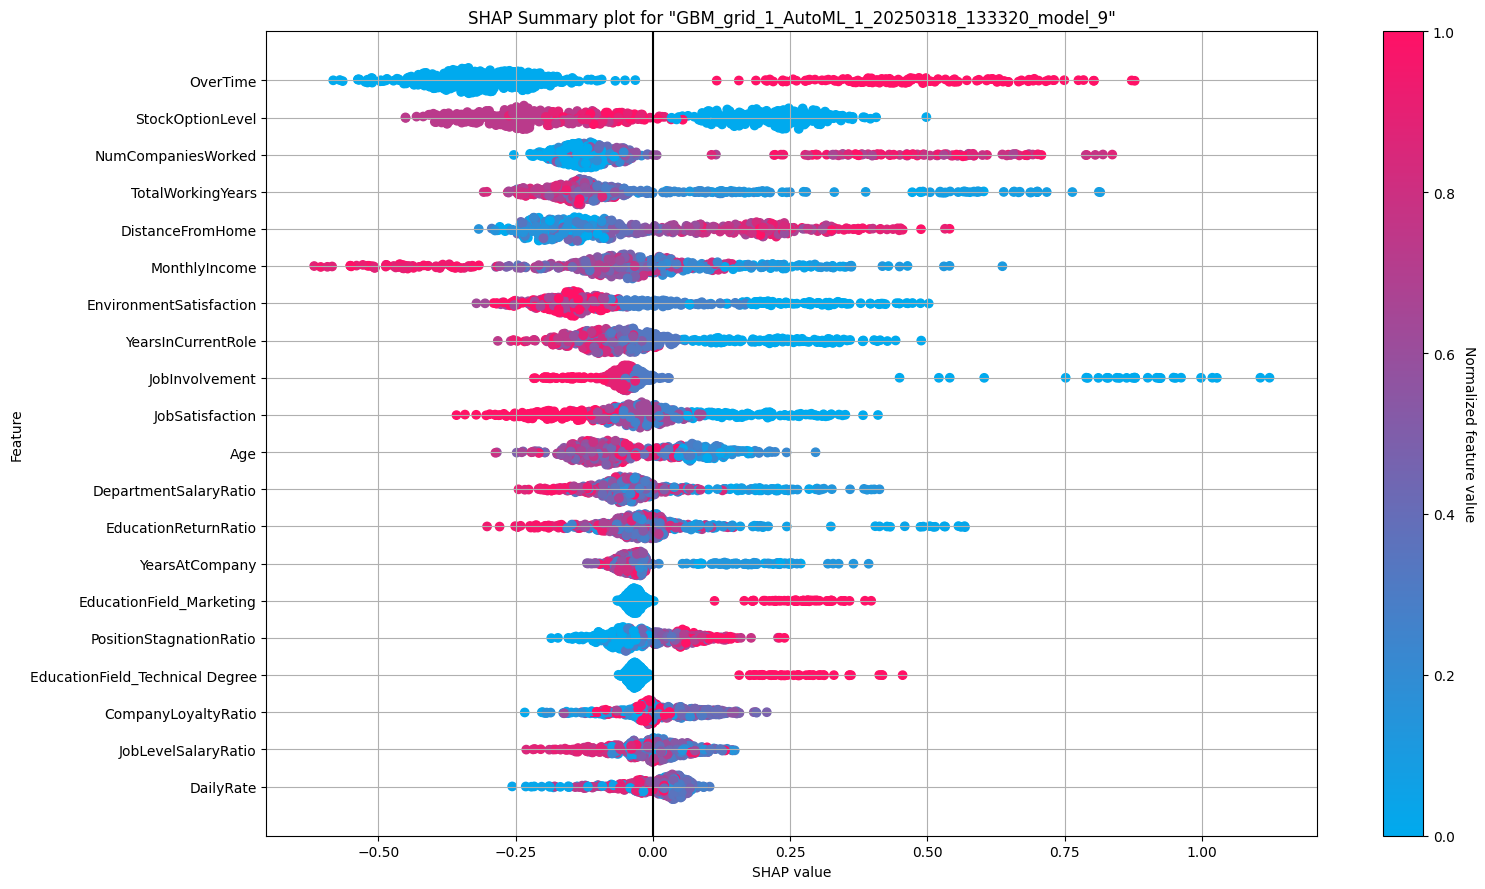

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

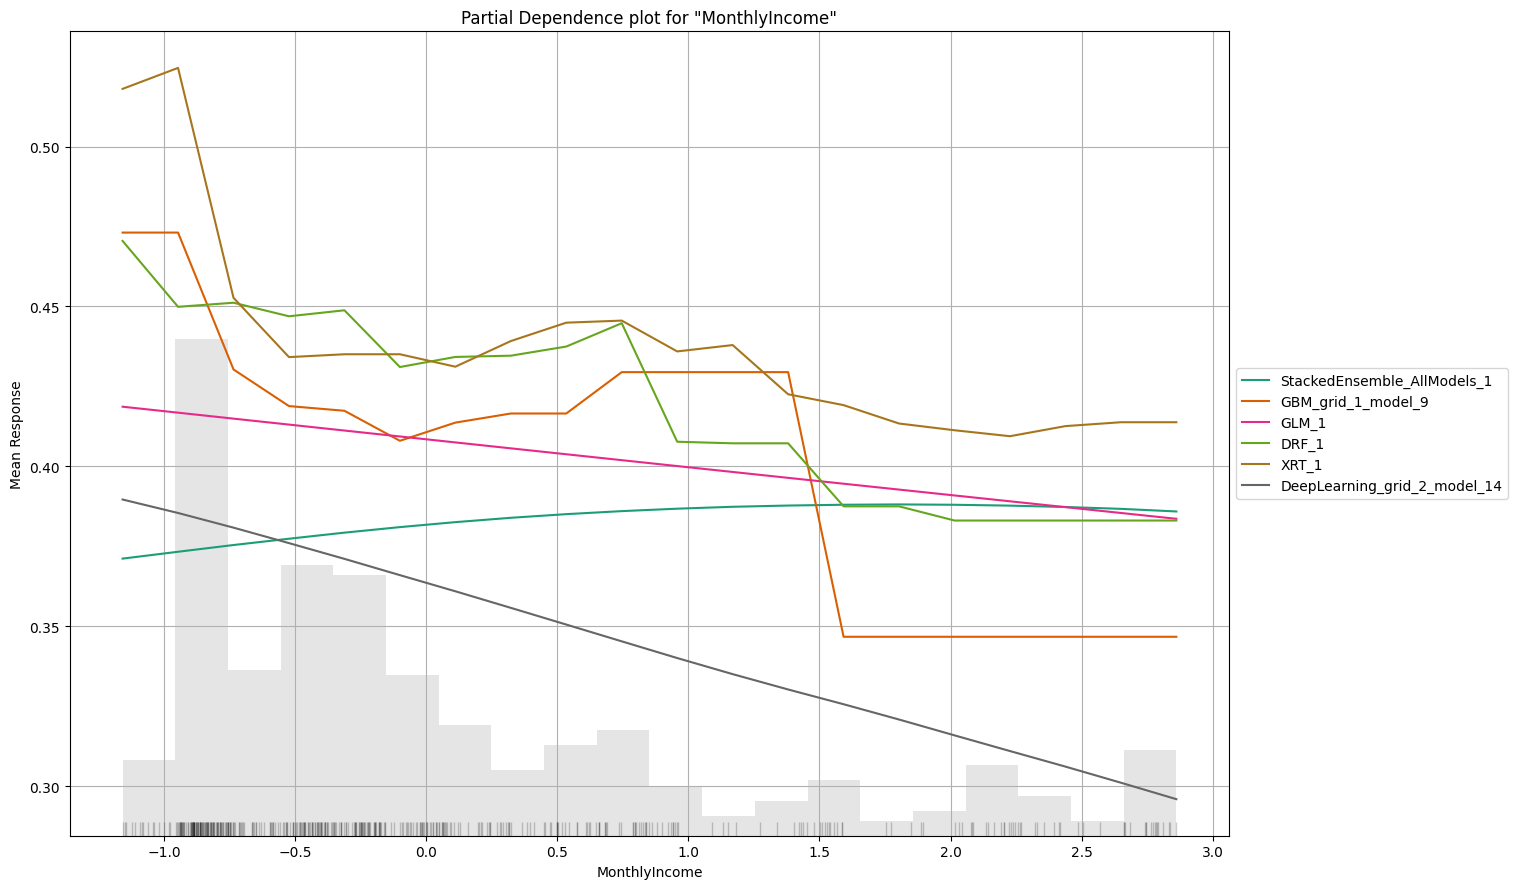

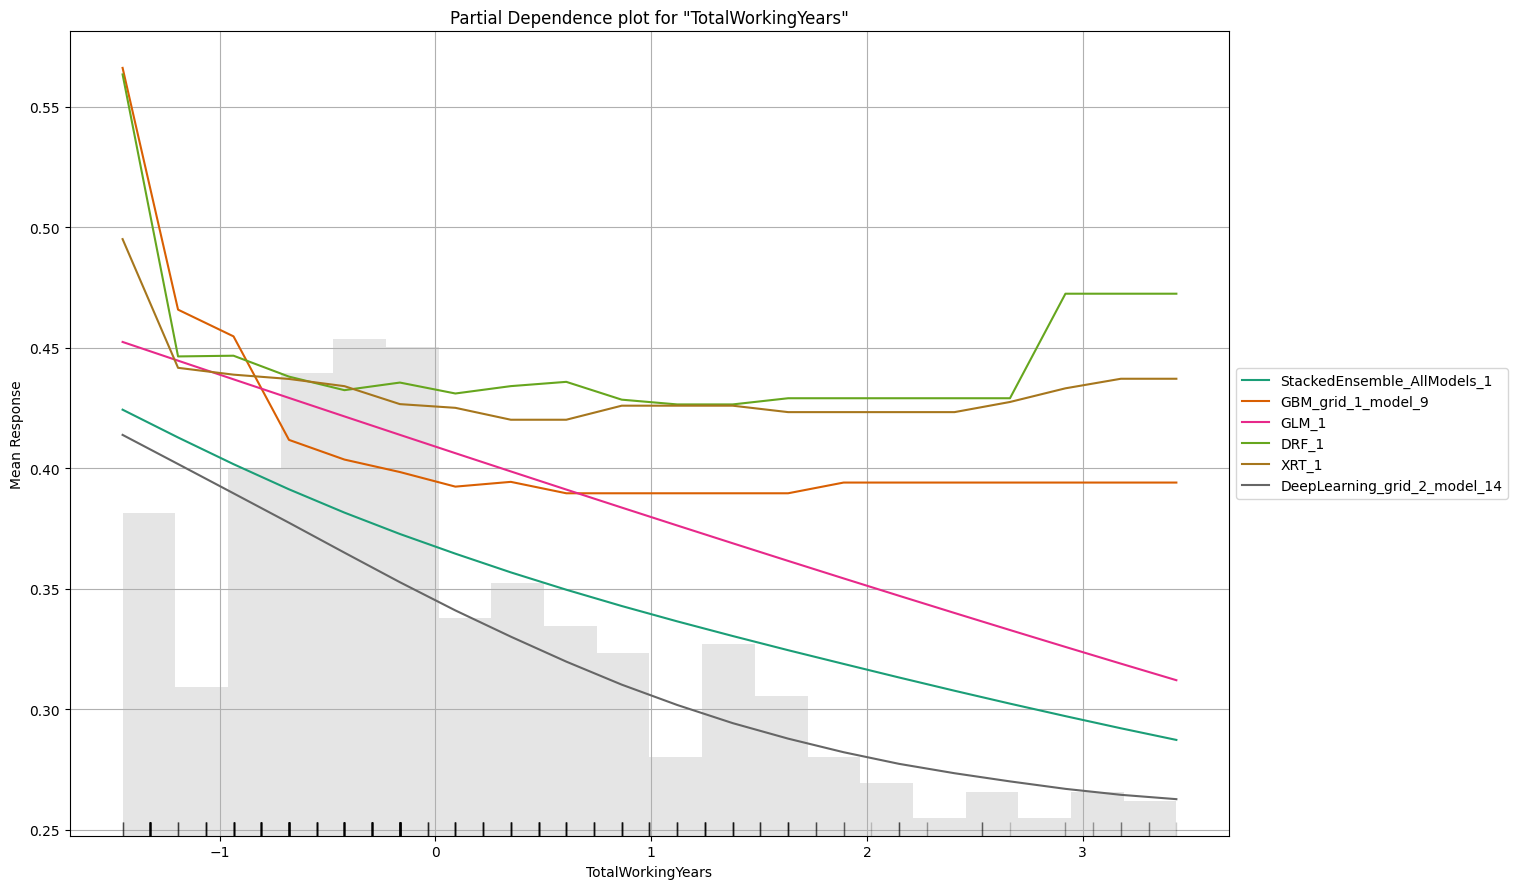

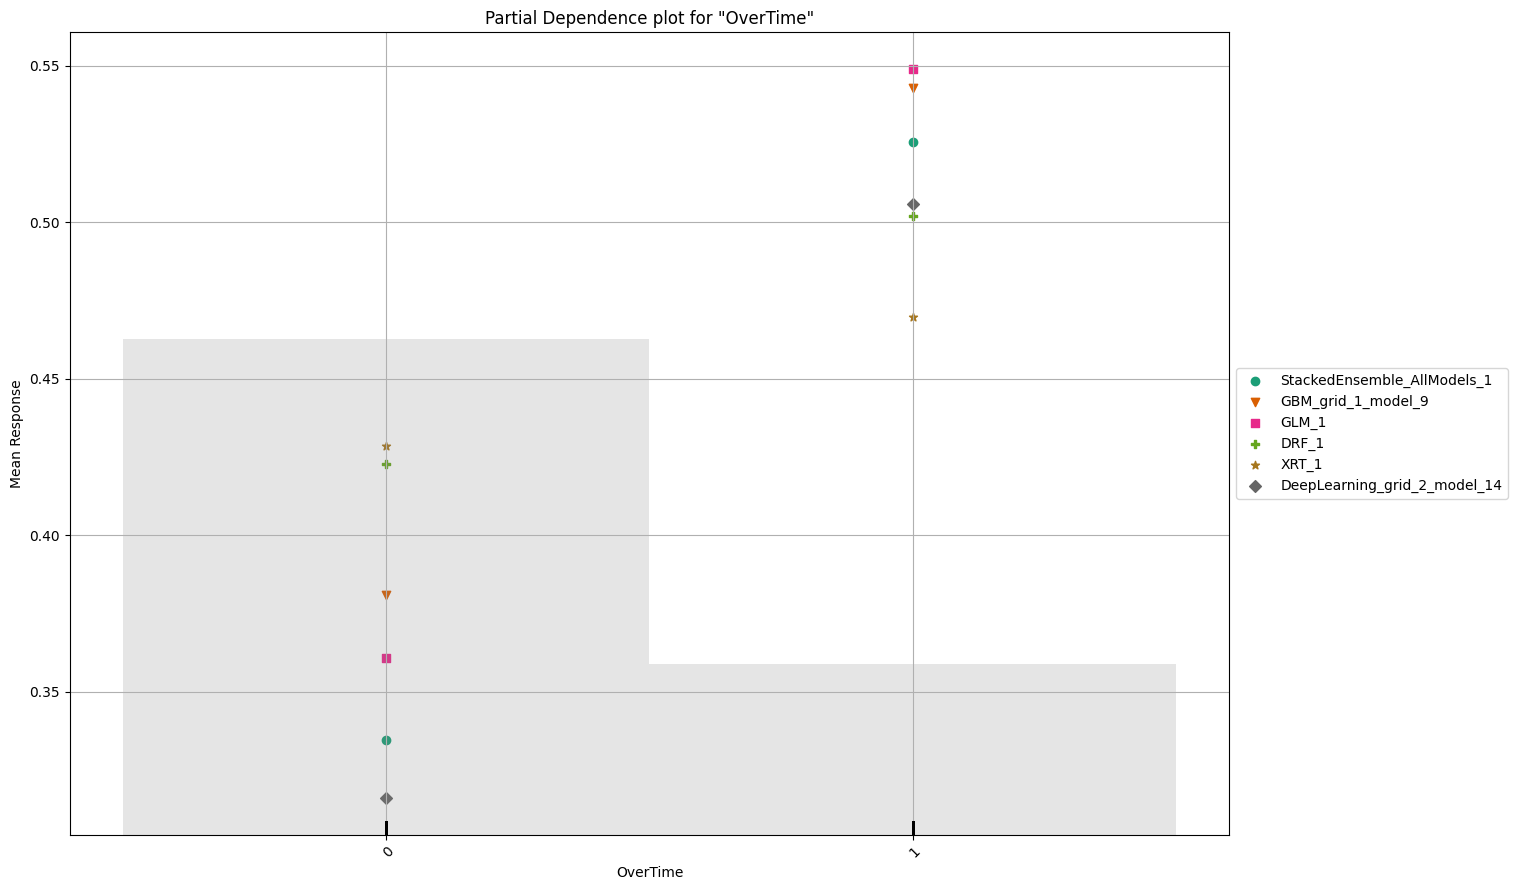

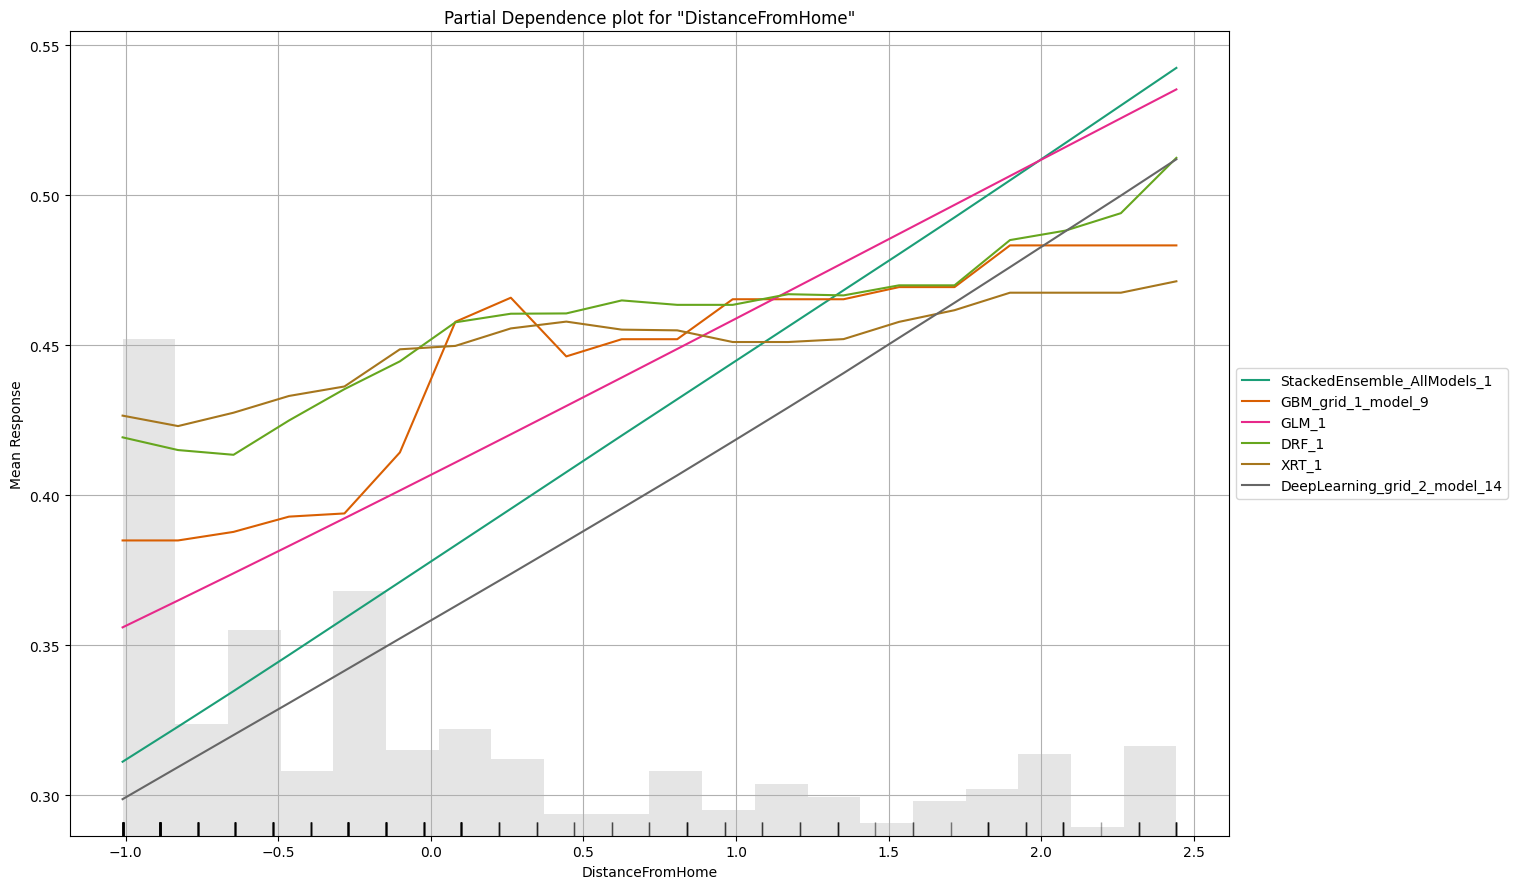

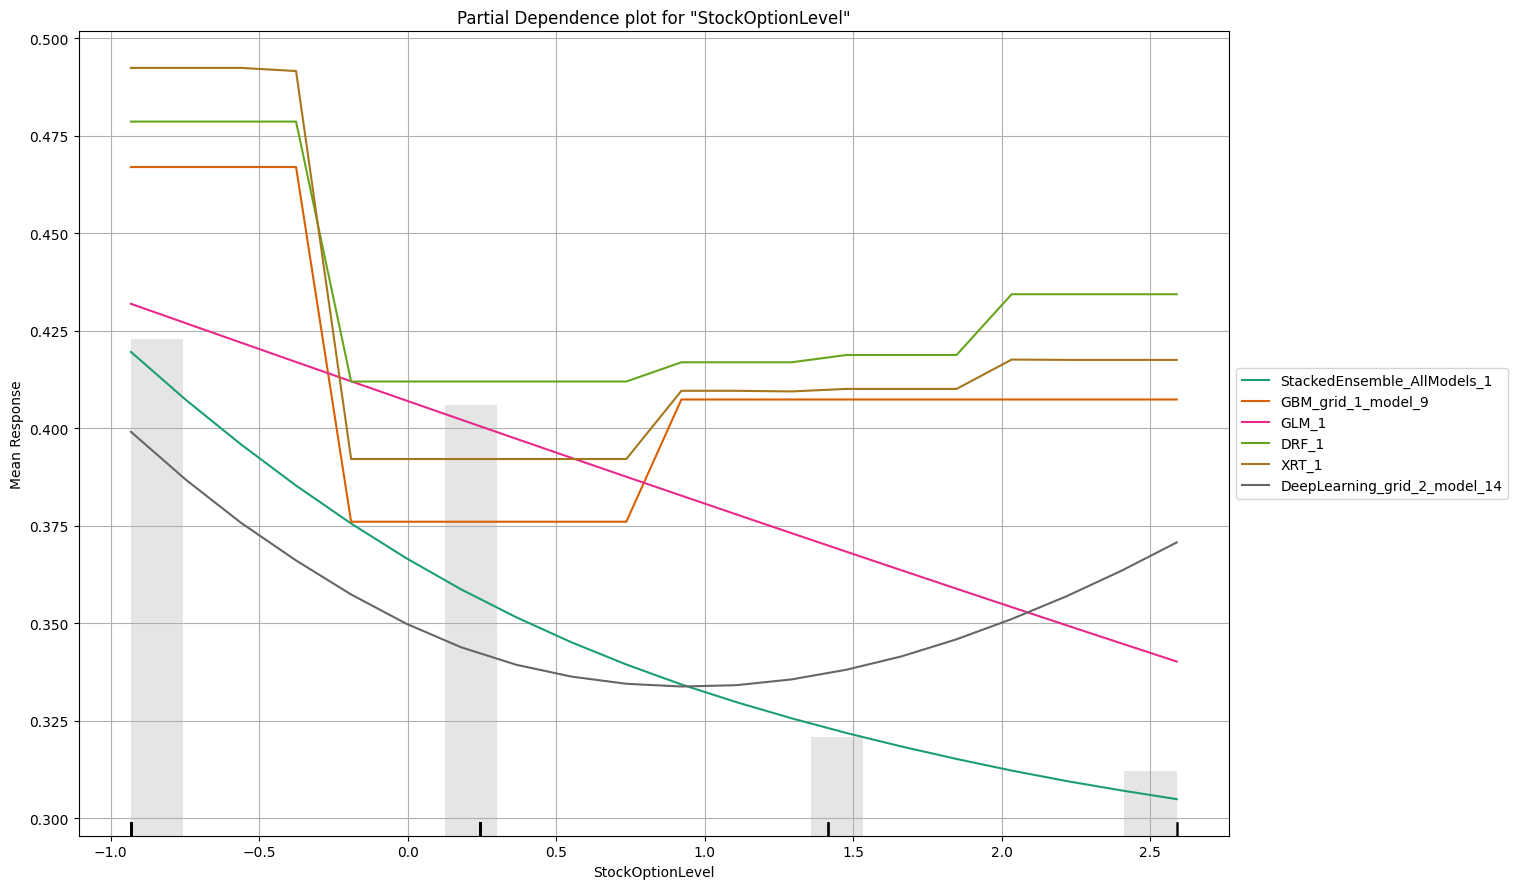

In [15]:
# Leaderboard based on Test results & comparison of models
aml.explain(test)

In [16]:
# Leaderboard for test performance
test_lb = h2o.make_leaderboard(aml, test, sort_metric="logloss")
test_lb.head(rows=test_lb.nrows)  # Print all rows instead of default (10 rows)

model_id                                                   logloss       auc     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  ---------  --------  --------  ----------------------  --------  --------
DeepLearning_grid_1_AutoML_1_20250318_133320_model_14     0.447273  0.799936  0.56665                 0.290159  0.343466  0.117969
DeepLearning_1_AutoML_1_20250318_133320                   0.479564  0.777504  0.46248                 0.311678  0.395884  0.156724
StackedEnsemble_BestOfFamily_1_AutoML_1_20250318_133320   0.484491  0.820541  0.595002                0.265145  0.400474  0.16038
GLM_1_AutoML_1_20250318_133320                            0.505235  0.866274  0.676123                0.227453  0.411555  0.169377
GBM_2_AutoML_1_20250318_133320                            0.518411  0.866776  0.606002                0.239172  0.41521   0.172399
DeepLearning_grid_3_AutoML_1_20250318_133320_model_7      0.519101  0.793974  0.48673                 0.270765  0.35265   0.124362
GBM_3_AutoML_1_20250318_133320                            0.522803  0.851311  0.584686                0.239172  0.416035  0.173085
GBM_grid_1_AutoML_1_20250318_133320_model_5               0.527361  0.849598  0.583443                0.207031  0.417748  0.174514
GBM_grid_1_AutoML_1_20250318_133320_model_1               0.528296  0.830135  0.578666                0.256716  0.419333  0.17584
GBM_4_AutoML_1_20250318_133320                            0.528484  0.855195  0.604872                0.19634   0.419477  0.175961
GBM_grid_1_AutoML_1_20250318_133320_model_9               0.530085  0.854121  0.585287                0.236568  0.419382  0.175881
GBM_5_AutoML_1_20250318_133320                            0.534394  0.846971  0.563507                0.288857  0.421097  0.177323
GBM_grid_1_AutoML_1_20250318_133320_model_11              0.535463  0.866182  0.621312                0.220326  0.420178  0.17655
GBM_grid_1_AutoML_1_20250318_133320_model_10              0.536493  0.850192  0.564573                0.206414  0.423071  0.178989
GBM_grid_1_AutoML_1_20250318_133320_model_4               0.54497   0.865086  0.596356                0.229441  0.425279  0.180862
GBM_grid_1_AutoML_1_20250318_133320_model_12              0.55146   0.803408  0.469035                0.246025  0.427571  0.182817
GBM_grid_1_AutoML_1_20250318_133320_model_7               0.553413  0.860928  0.595171                0.19634   0.429798  0.184726
GBM_grid_1_AutoML_1_20250318_133320_model_3               0.555059  0.846057  0.578664                0.240817  0.432785  0.187303
GBM_grid_1_AutoML_1_20250318_133320_model_8               0.555282  0.81435   0.471219                0.25418   0.429639  0.18459
GBM_grid_1_AutoML_1_20250318_133320_model_2               0.557729  0.845212  0.561866                0.246985  0.432647  0.187183
GBM_grid_1_AutoML_1_20250318_133320_model_13              0.563664  0.854007  0.527974                0.24116   0.43535   0.18953
DRF_1_AutoML_1_20250318_133320                            0.568604  0.826275  0.500836                0.266516  0.438961  0.192686
GBM_1_AutoML_1_20250318_133320                            0.577526  0.853002  0.541826                0.248287  0.440392  0.193946
DeepLearning_grid_1_AutoML_1_20250318_133320_model_7      0.580614  0.813528  0.519232                0.246711  0.403852  0.163096
XRT_1_AutoML_1_20250318_133320                            0.587638  0.777664  0.372803                0.326617  0.447008  0.199816
StackedEnsemble_AllModels_1_AutoML_1_20250318_133320      0.590489  0.811107  0.593091                0.26028   0.441272  0.194721
GBM_grid_1_AutoML_1_20250318_133320_model_6               0.597592  0.852065  0.517158                0.222314  0.4509    0.203311
DeepLearning_grid_1_AutoML_1_20250318_133320_model_8      0.646579  0.786001  0.473238                0.335321  0.405147  0.164144
DeepLearning_grid_1_AutoML_1_20250318_133320_model_2      0.713939  0.79395

In [17]:
# Getting best model for test
test_best_model_ID = test_lb[0, 0]
test_best_model = h2o.get_model(test_best_model_ID)

# Display Training and CV performance
test_best_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20250318_133320_model_14


Status of Neuron Layers: predicting Attrition, 2-class classification, bernoulli distribution, CrossEntropy loss, 11,002 weights/biases, 149.0 KB, 126,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  -------------------
    1        107      Input             15.0
    2        100      RectifierDropout  40.0       0.0   0.0   0.24614471434639215   0.42738282680511475    0.0         -0.016974963290437284  0.12482714653015137  0.38665723978017913   0.05376248061656952
    3        2        Softmax                      0.0   0.0   0.002866193290683441  0.0009764707647264004  0.0         -0.0144845954090124    0.6850051879882812   0.017586262740697772  0.32886314392089844

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.01722789646025847
RMSE: 0.13125508165499145
LogLoss: 0.07399242575478736
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31509182925131957
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      180  0    0        (0.0/180.0)
1      0    180  0        (0.0/180.0)
Total  180  180  0        (0.0/360.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.315092     1         179
max f2                       0.315092     1         179
max f0point5                 0.315092     1         179
max accuracy                 0.315092     1         179
max precision                0.999991     1         0
max recall                   0.315092     1         179
max specificity              0.999991     1         0
max absolute_mcc             0.315092     1         179
max min_per_class_accuracy   0.315092     1         179
max mean_per_class_accuracy  0.315092     1         179
max tns                      0.999991     180       0
max fns                      0.999991     179       0
max fps                      1.43099e-10  180       359
max tps                      0.315092     180       179
max tnr                      0.999991     1         0
max fnr                      0.999991     0.994444  0
max fpr                      1.43099e-10  1         359
max tpr                      0.315092     1         179

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 44.11 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.0111111                   0.999877           2       2                  1                0.999961     1                           0.999961            0.0222222       0.0222222                  100     100                0.0222222
2        0.0222222                   0.999655           2       2                  1                0.999782     1                           0.999871            0.0222222       0.0444444                  100     100                0.0444444
3        0.0305556                   0.998919           2       2                  1                0.999241     1                

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_1_20250318_133320_model_14

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8302336317504012
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      370  14   0.0365   (14.0/384.0)
1      31   26   0.5439   (31.0/57.0)
Total  401  40   0.102    (45.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

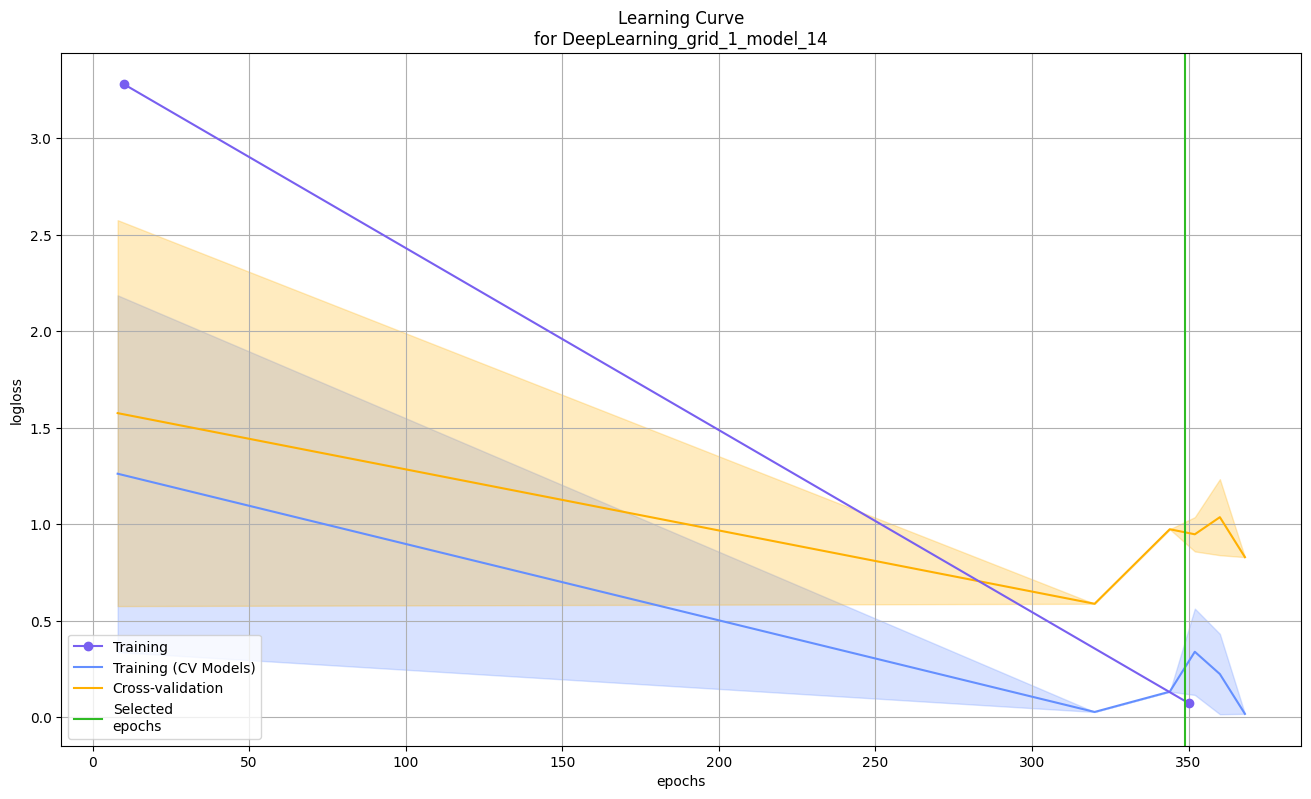

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

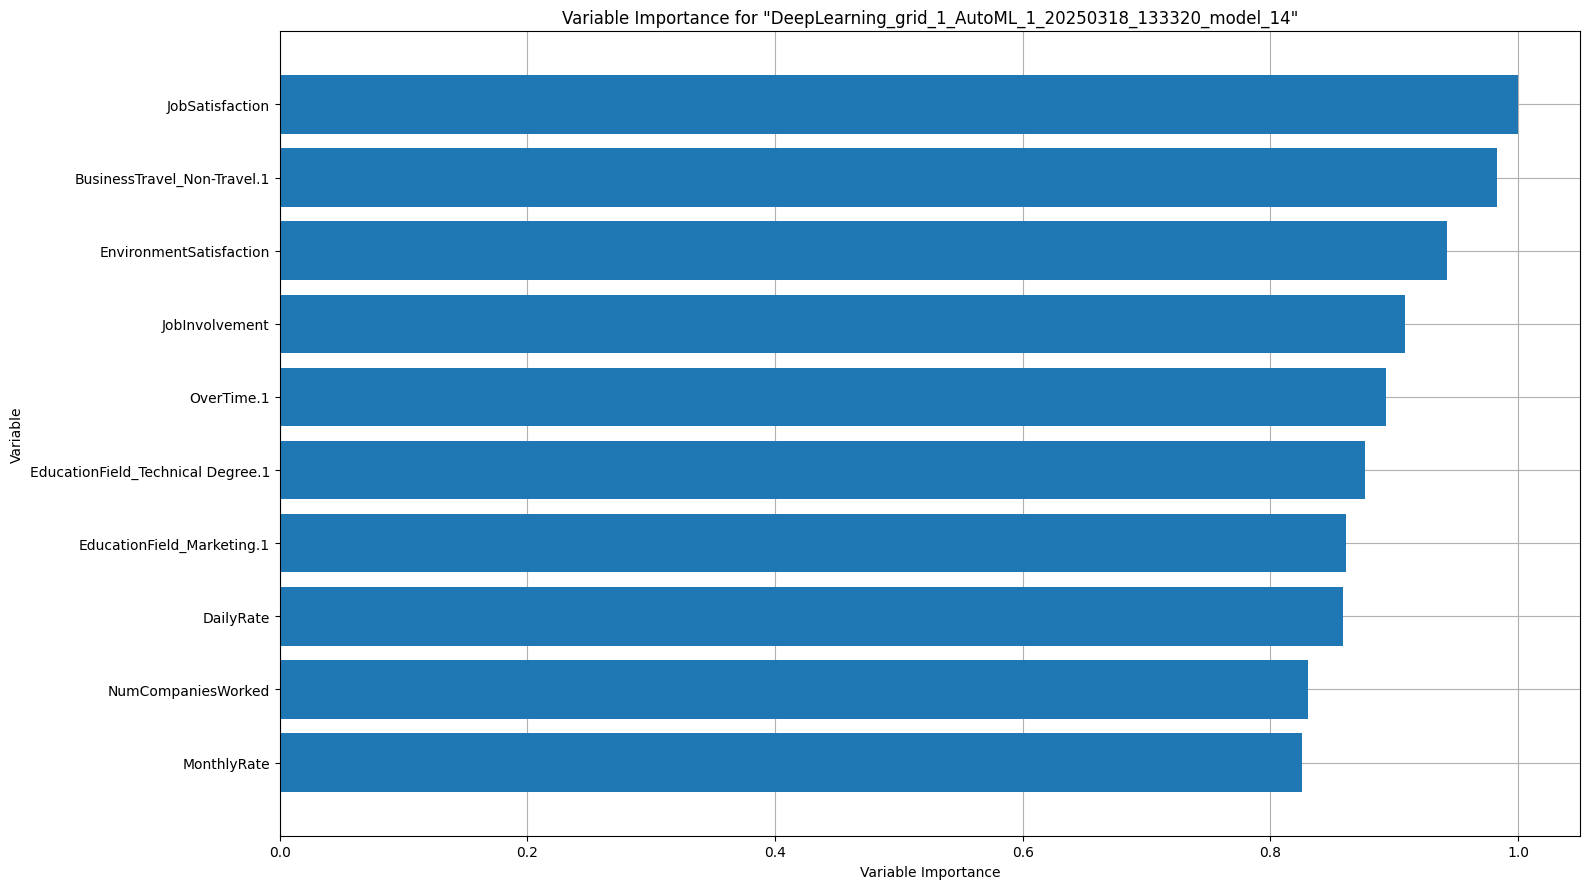

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

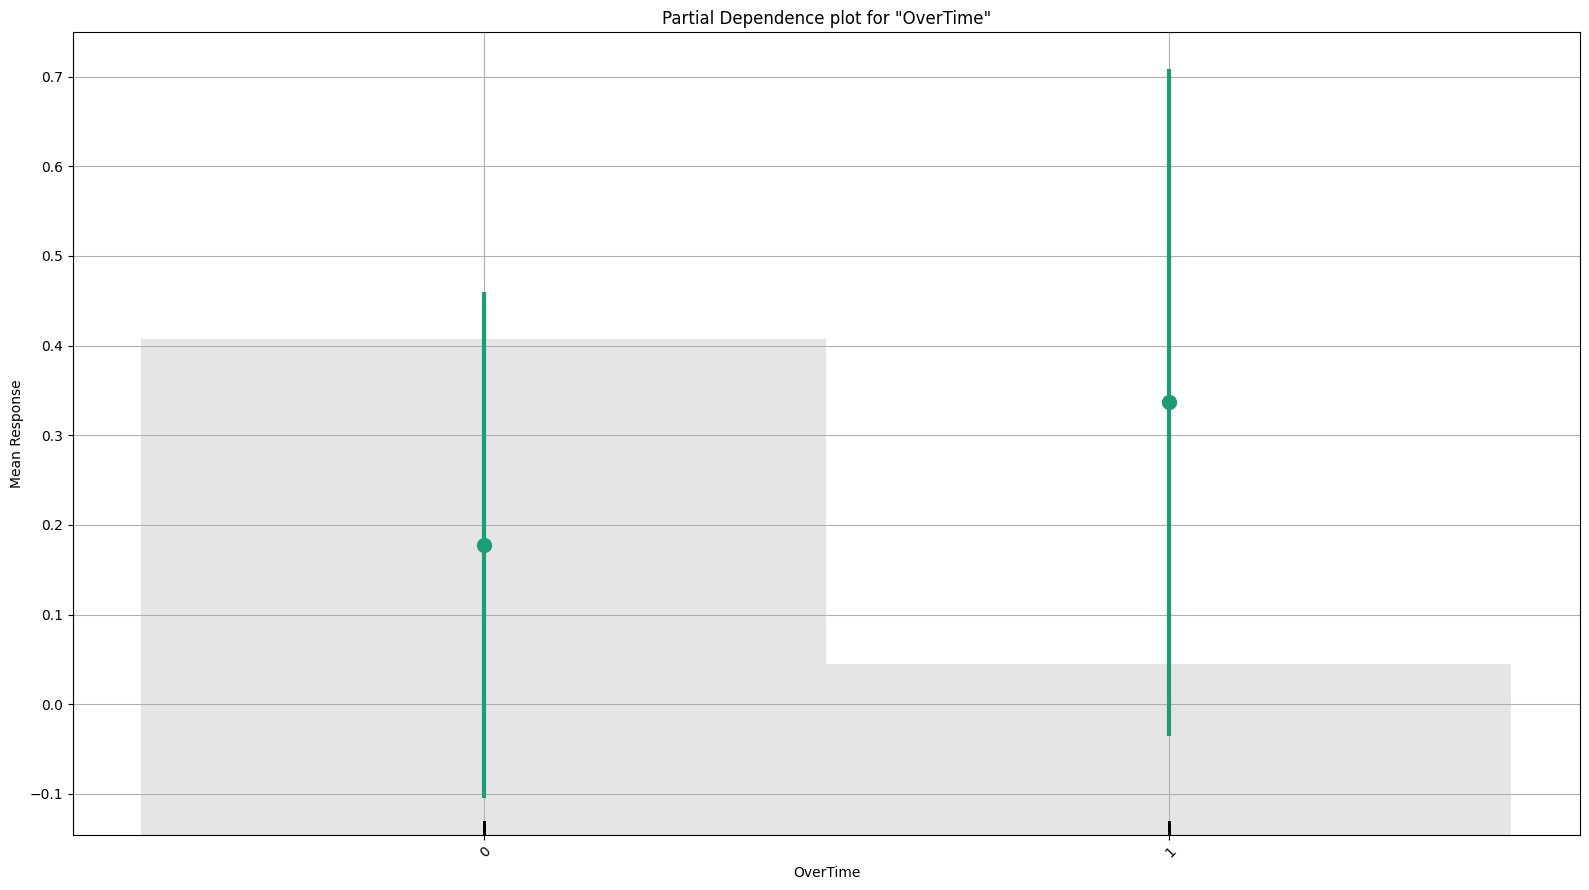

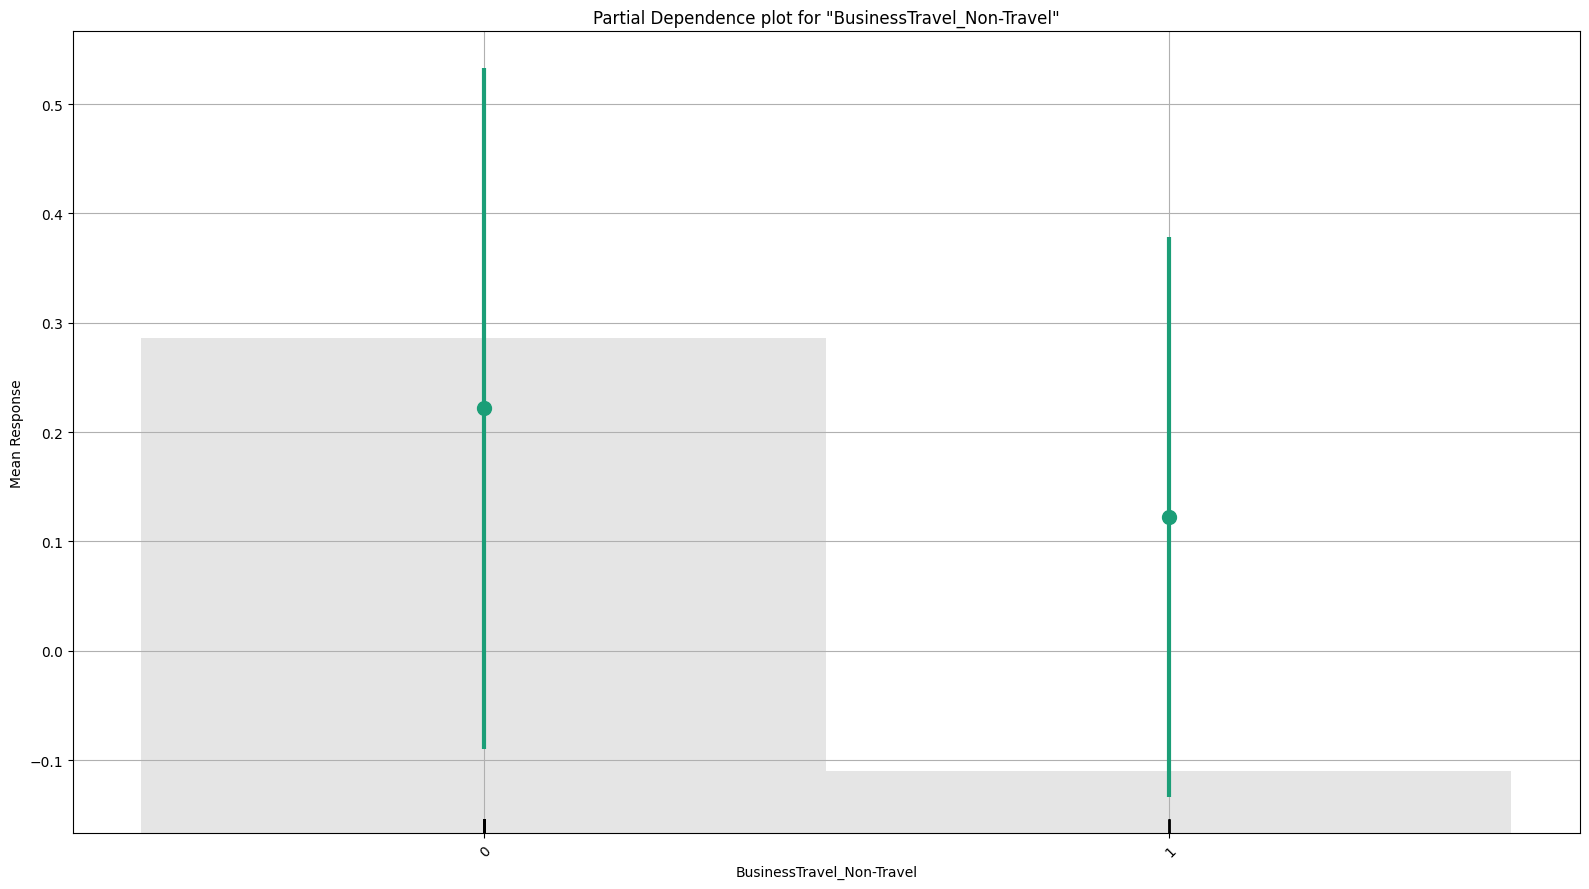

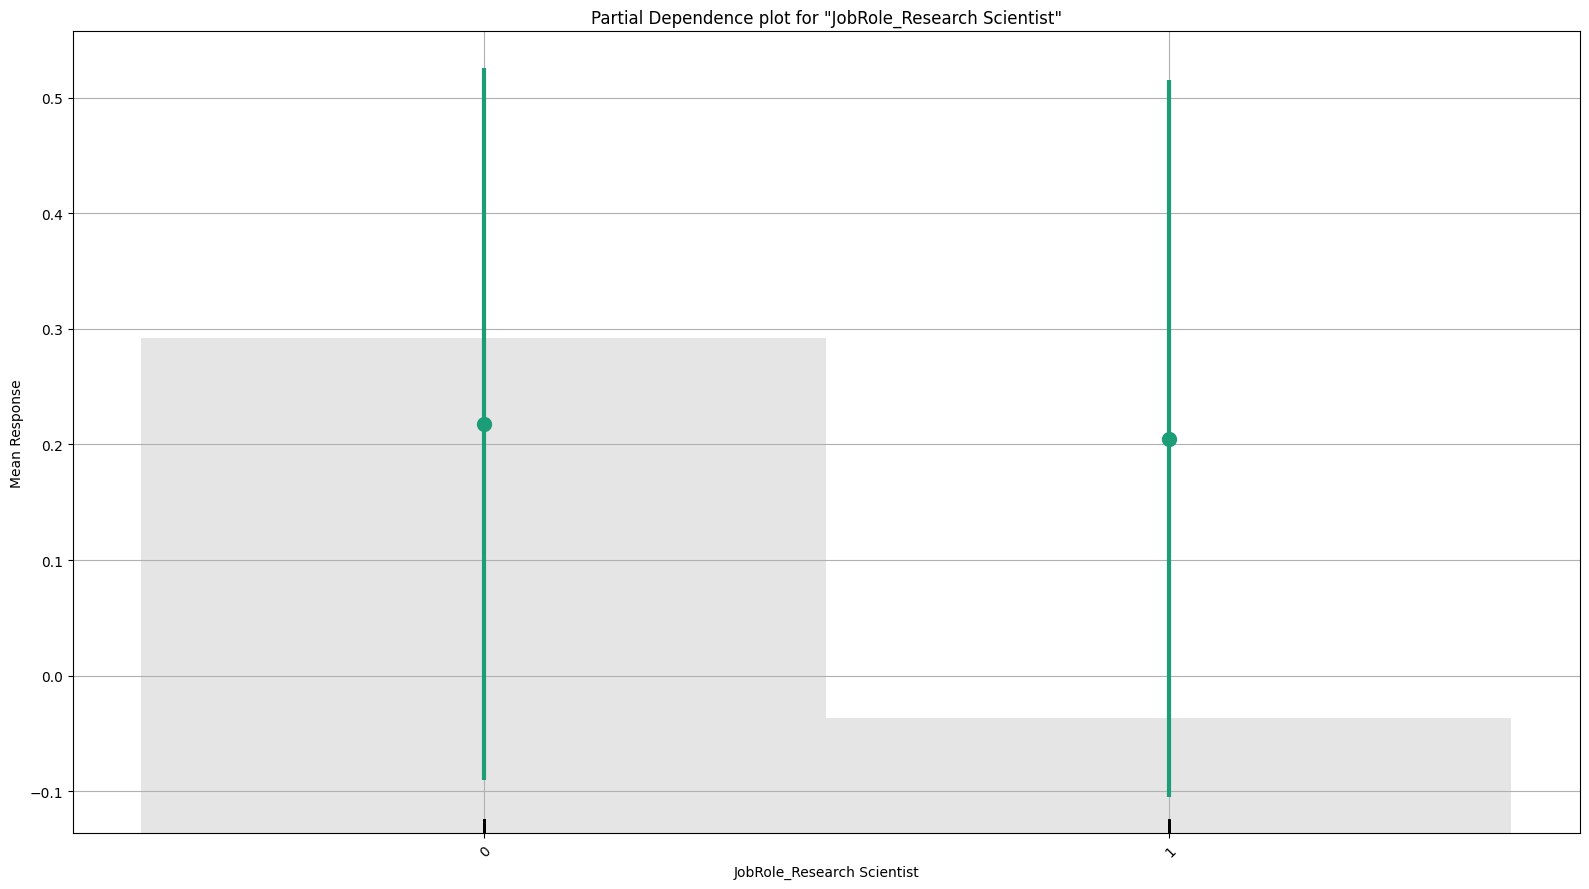

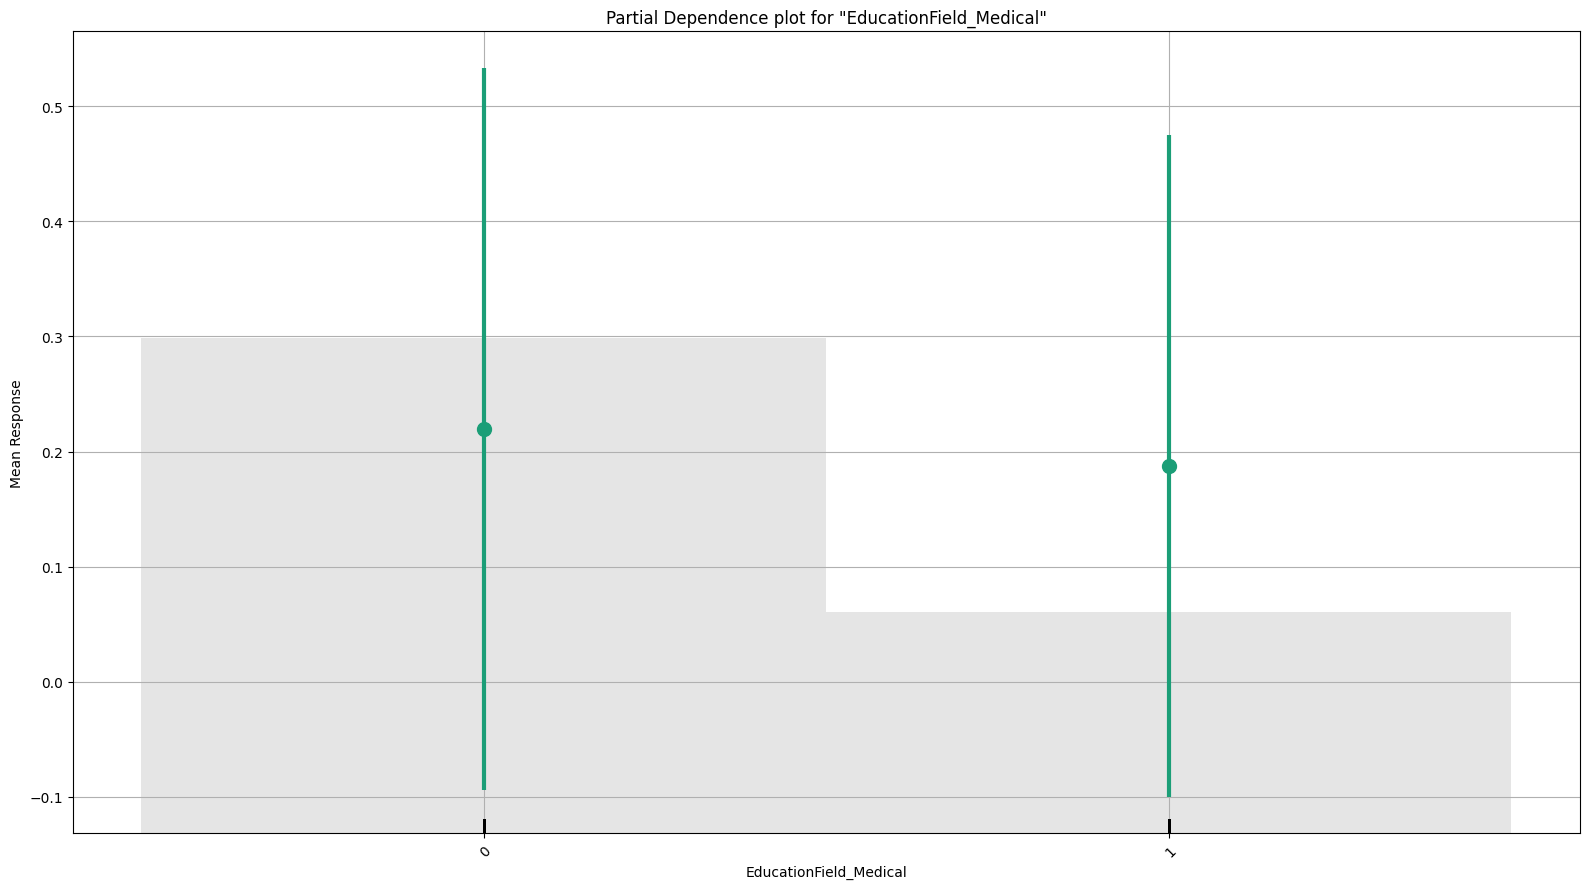

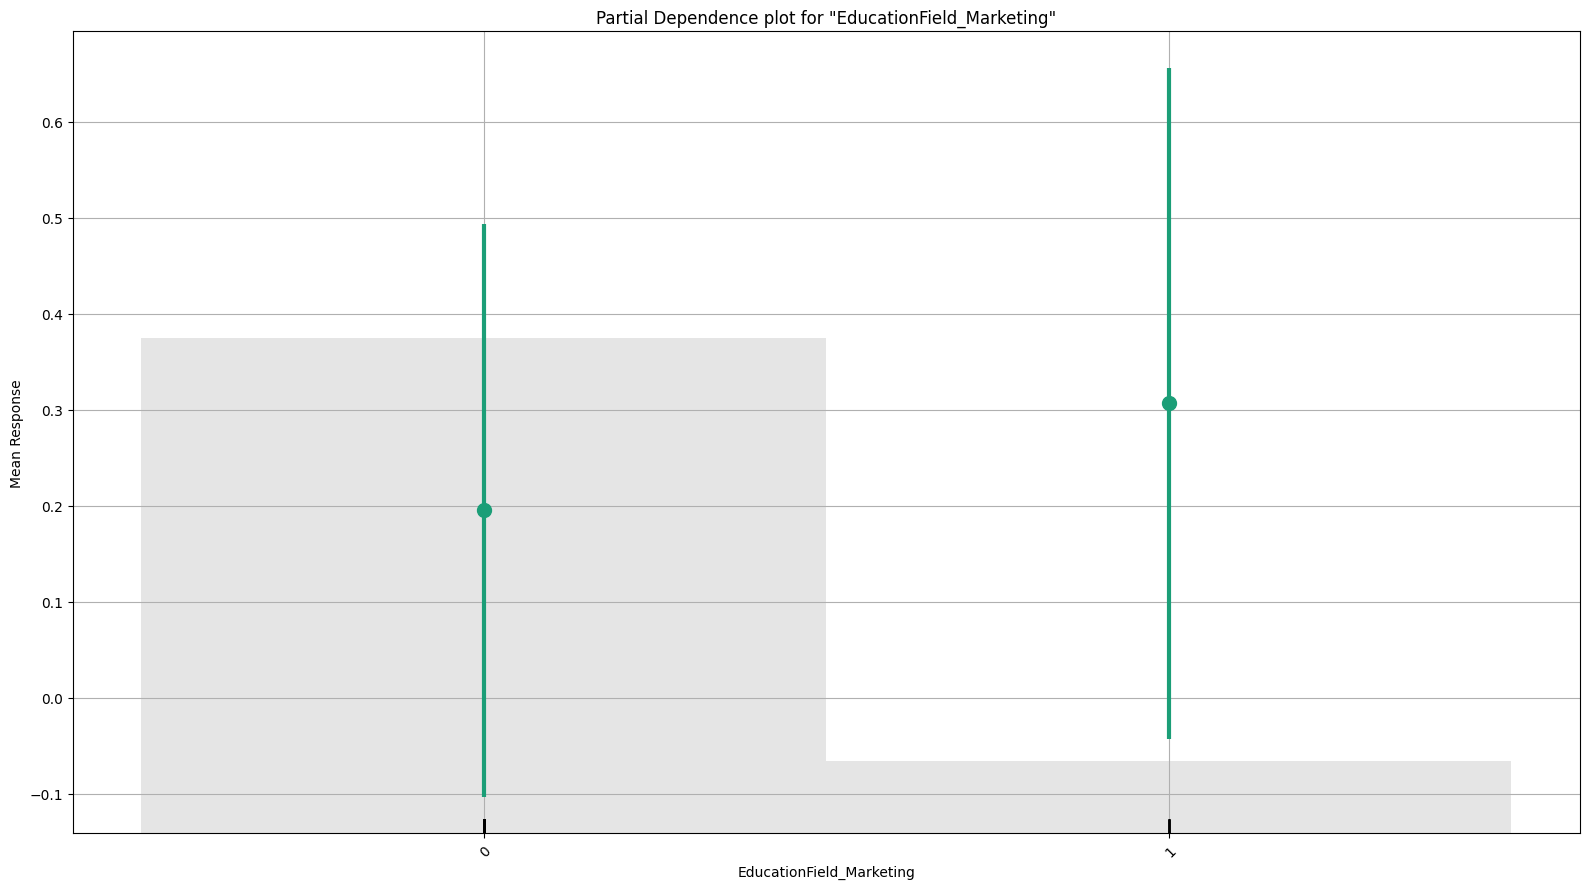

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_1_20250318_133320_model_14

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8302336317504012
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      370  14   0.0365   (14.0/384.0)
1      31   26   0.5439   (31.0/57.0)
Total  401  40   0.102    (45.0/441.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

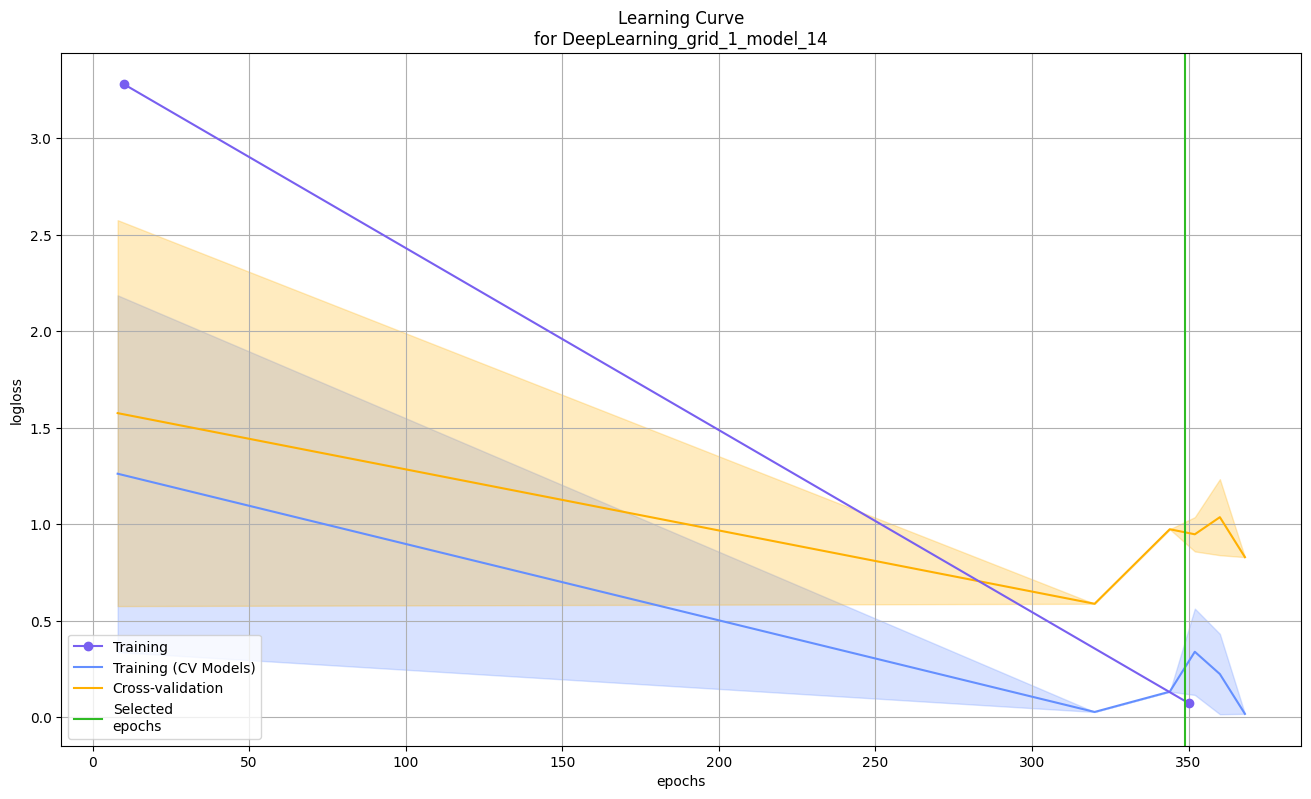

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

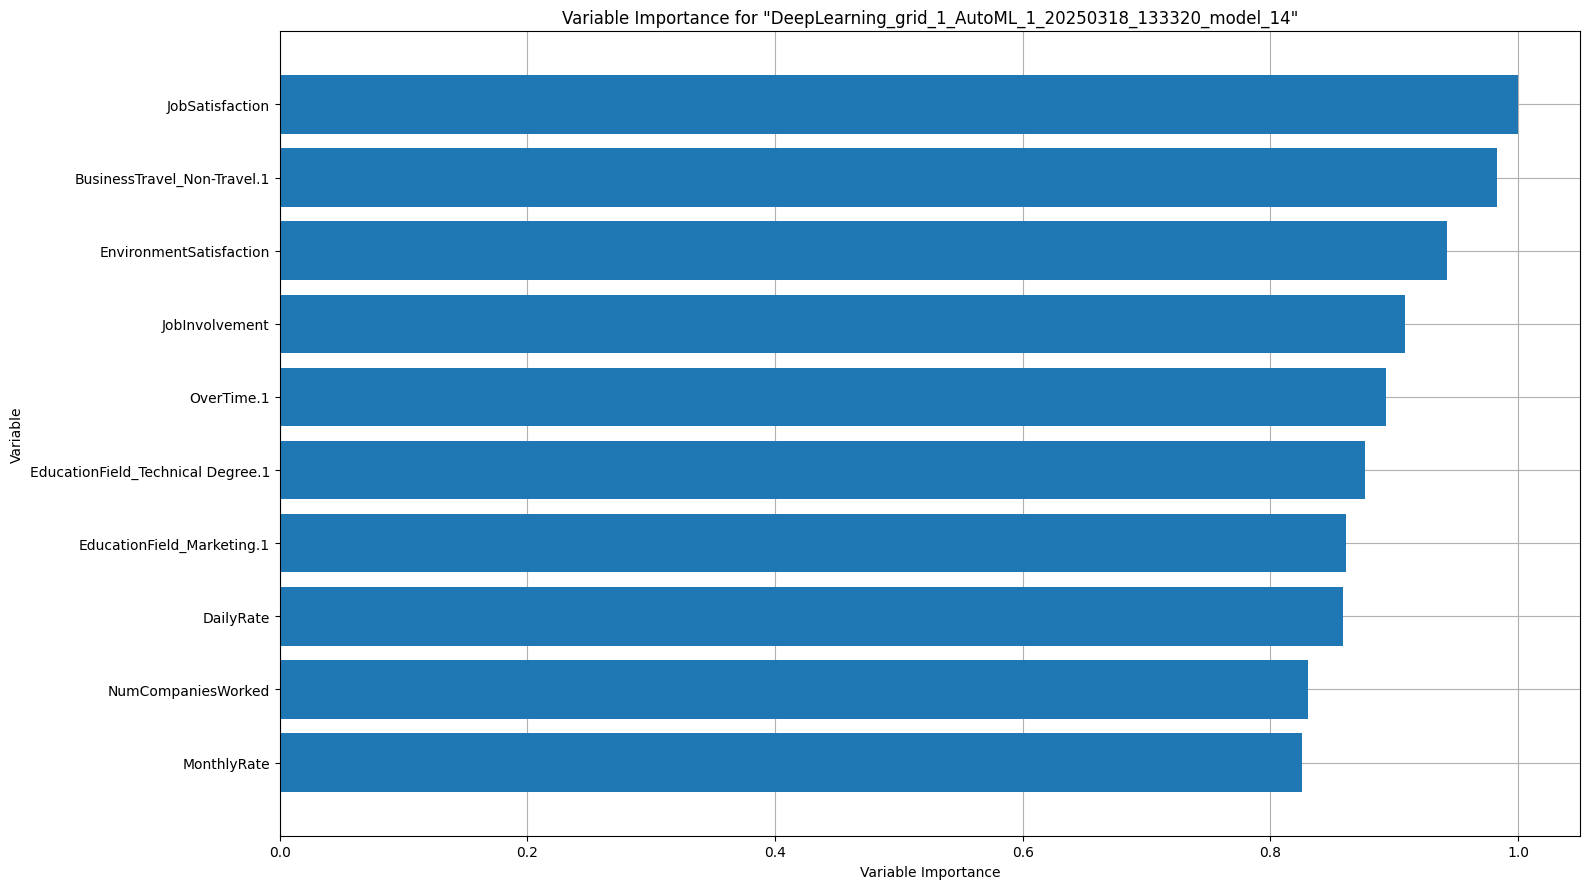

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

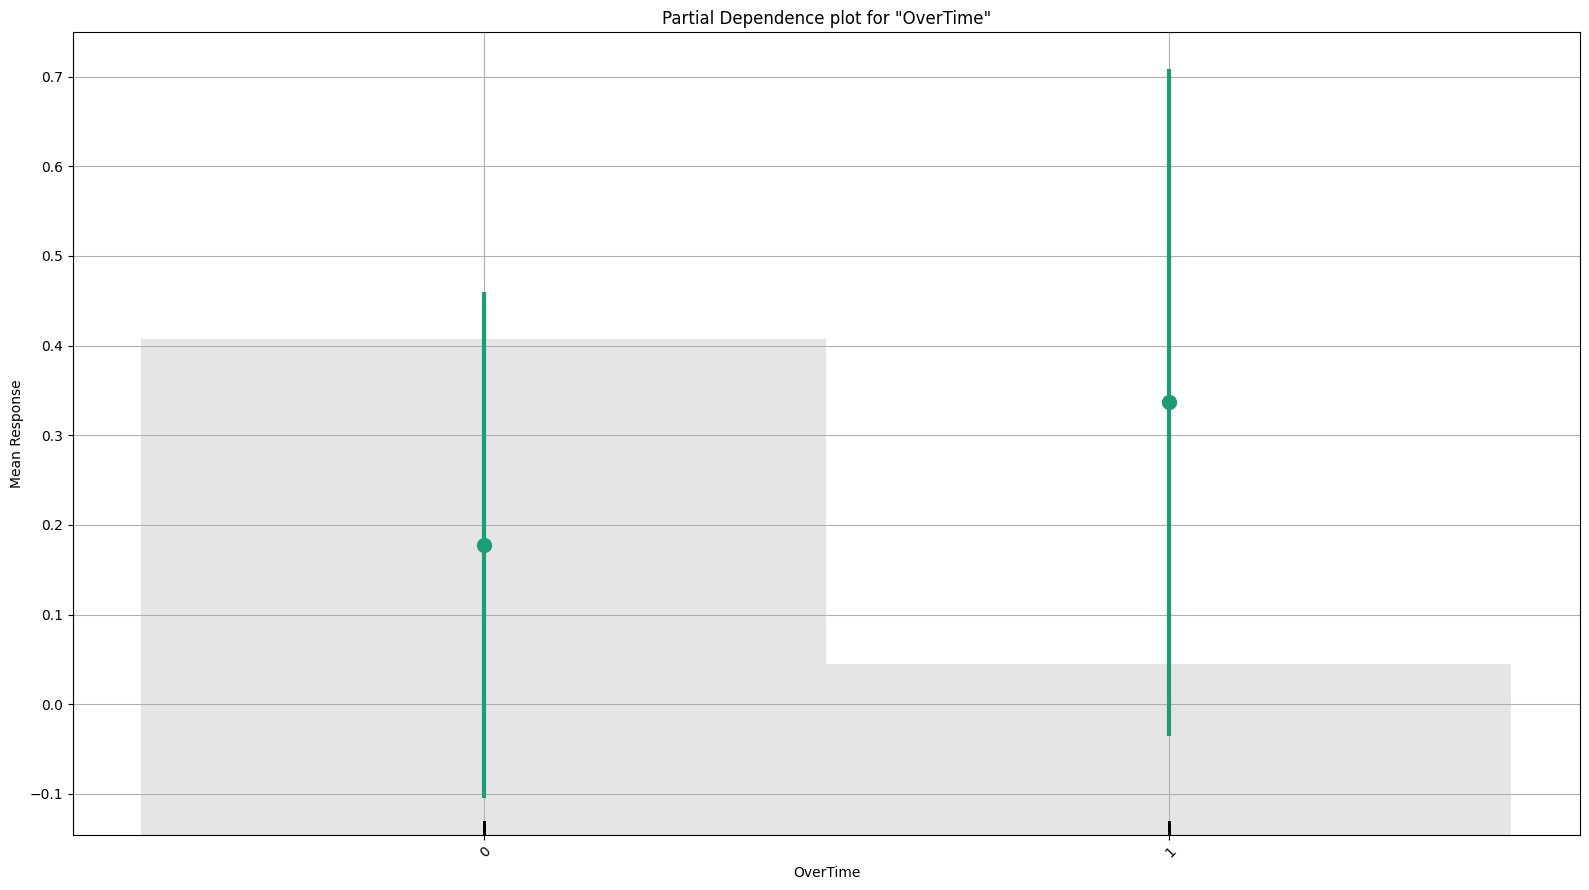

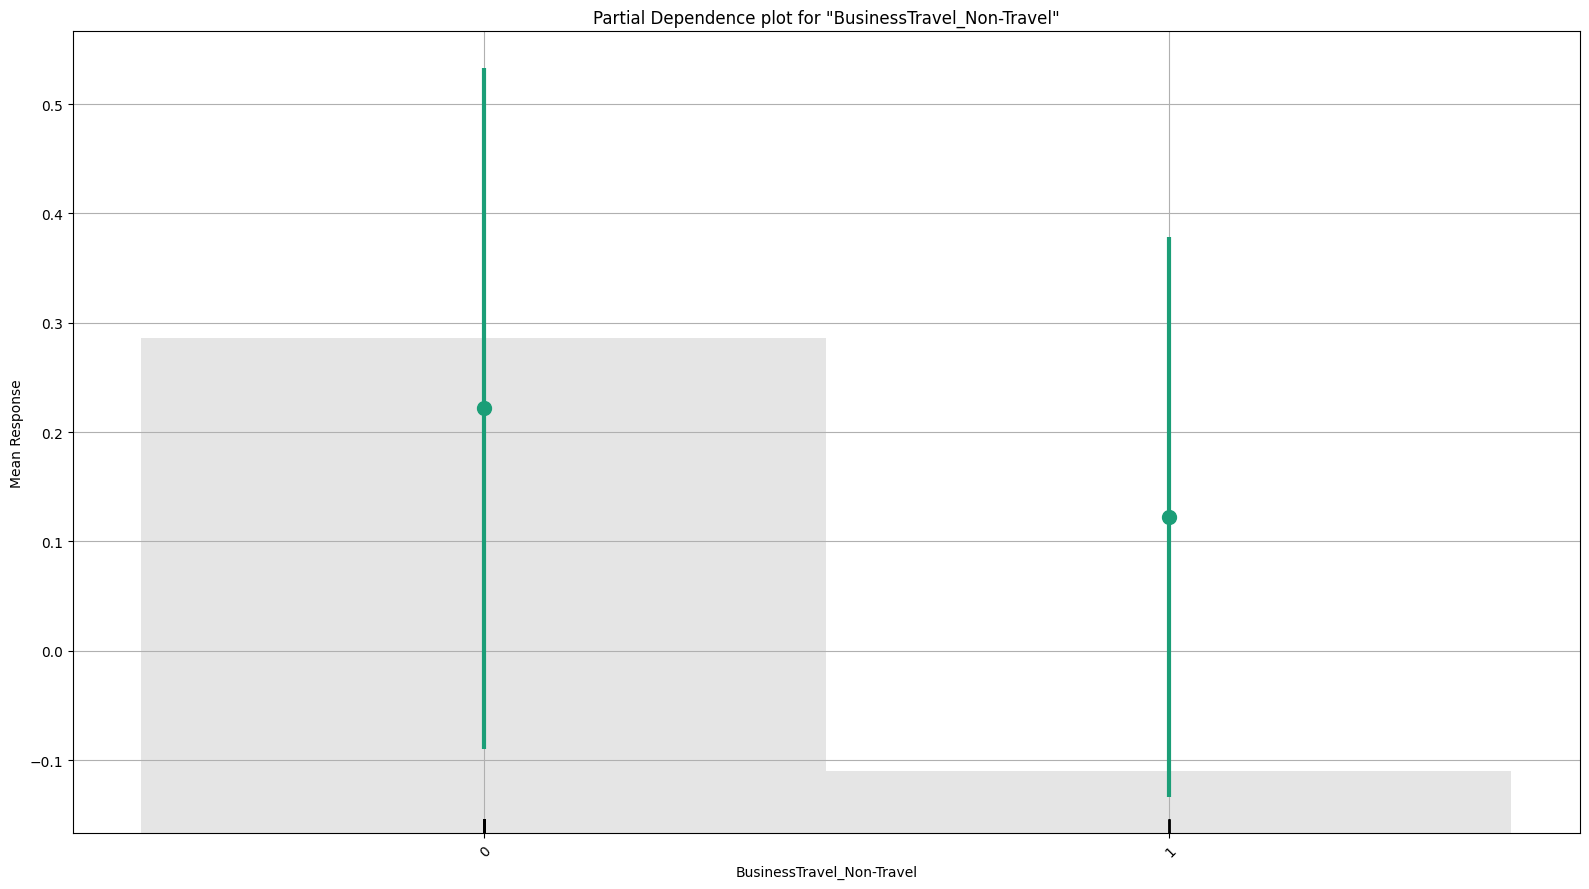

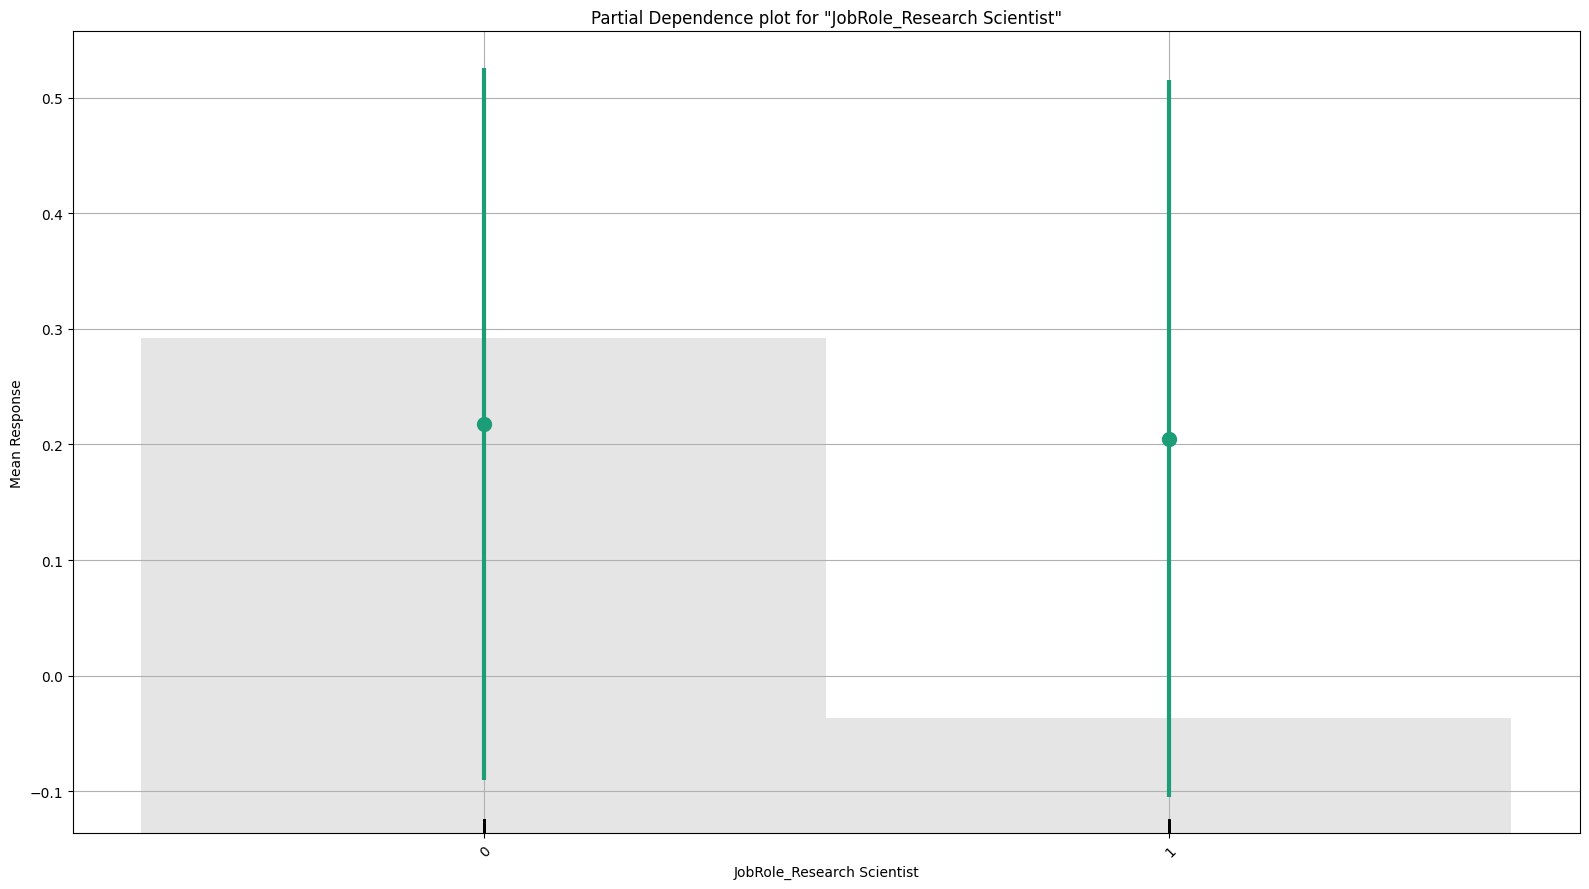

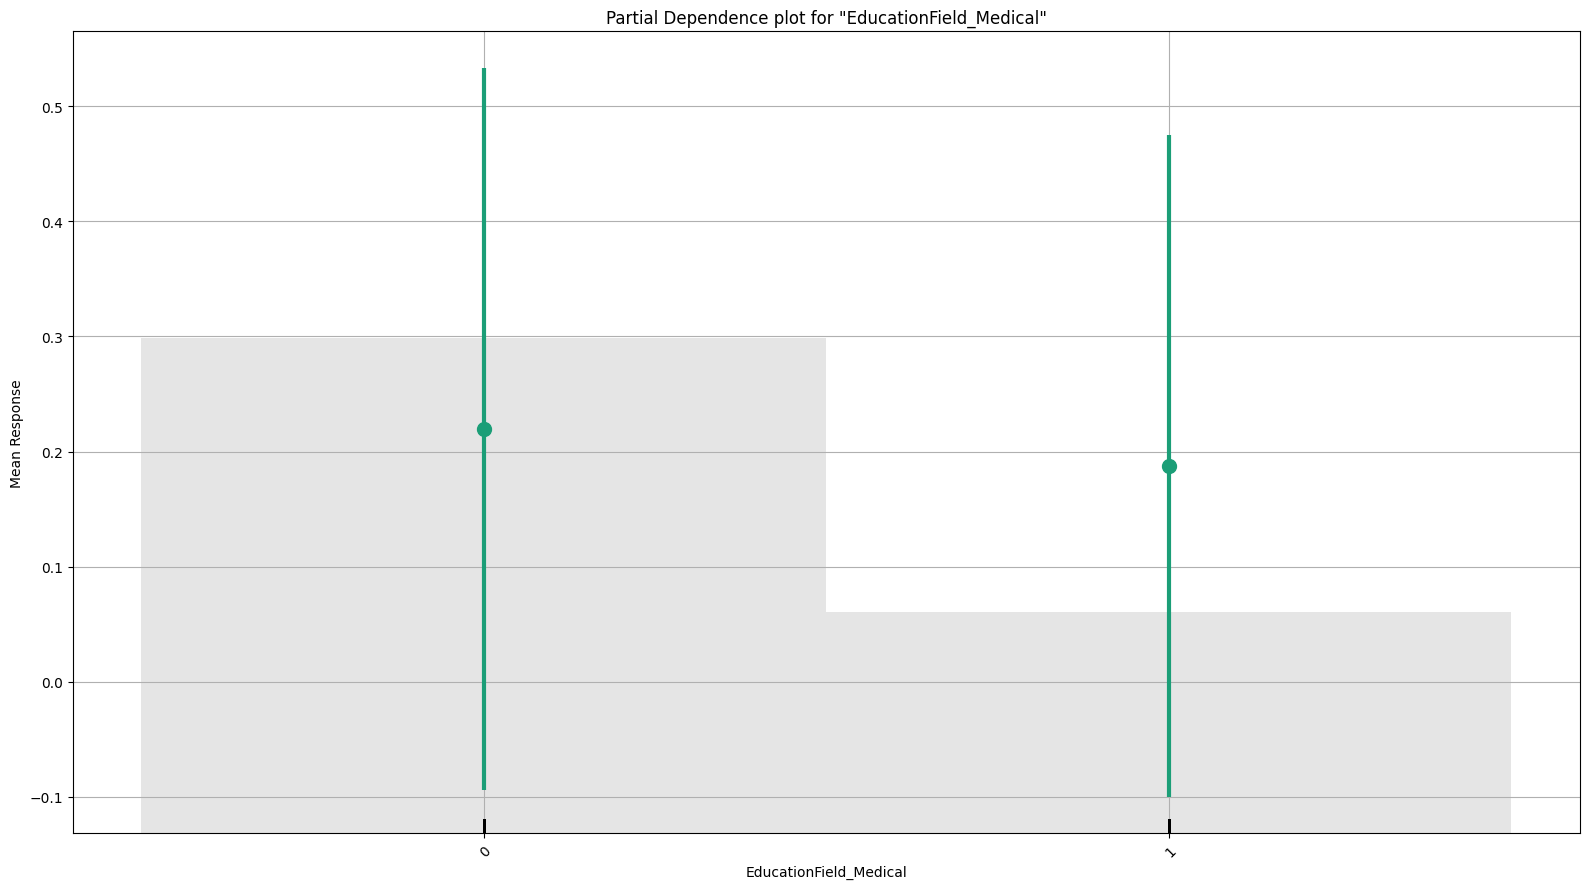

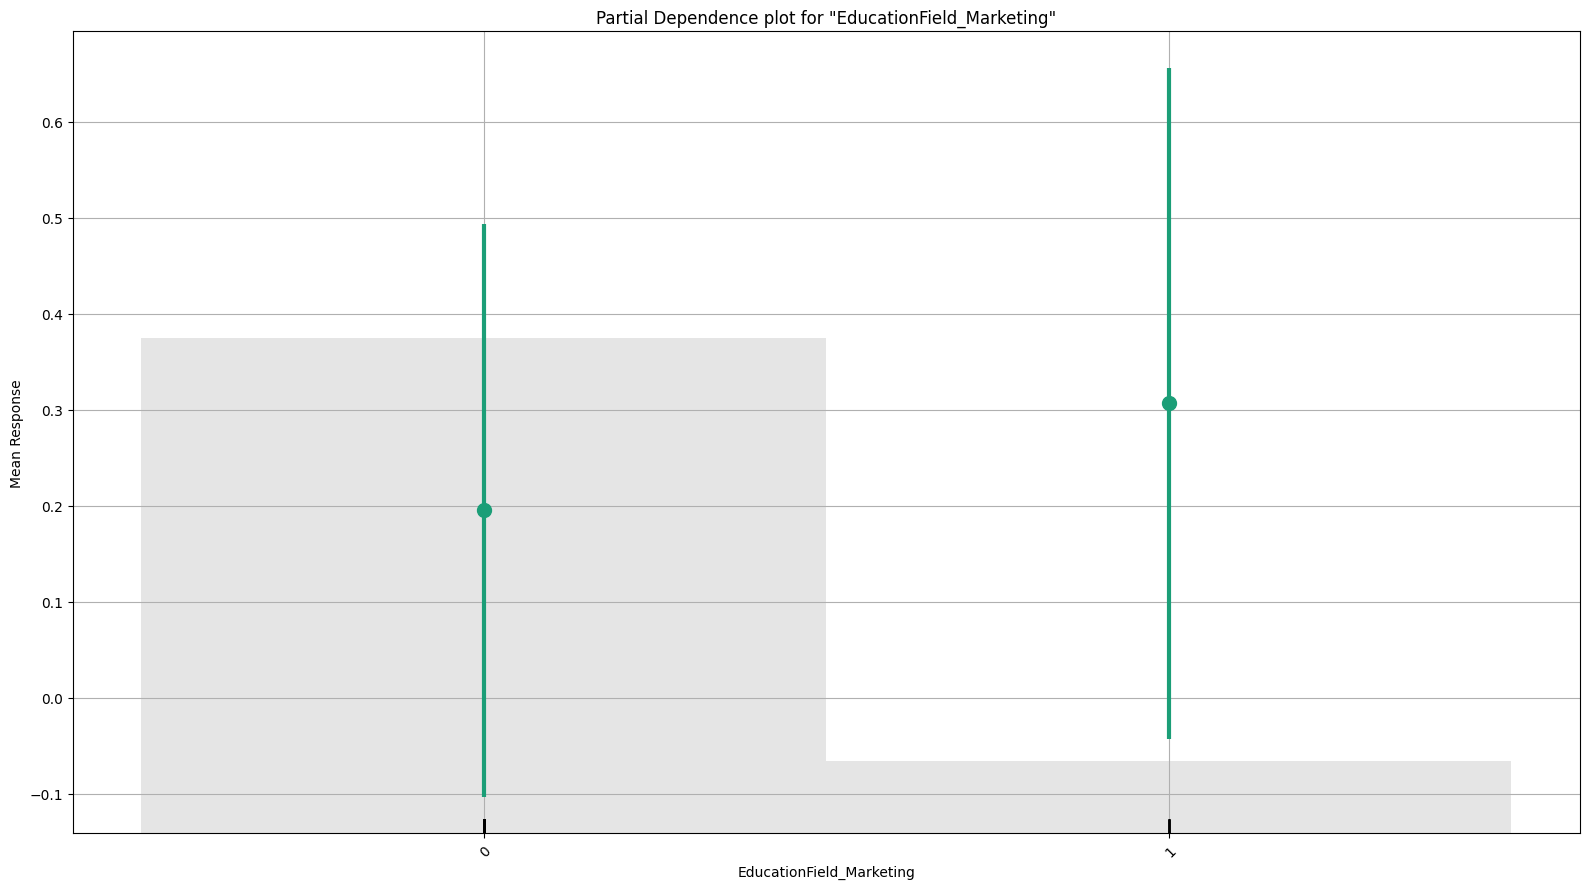

In [18]:
# Display test performance
test_best_model.explain(test)

# Saving Models

In [19]:
# Save models into folder

# Create a folder in the root directory
!mkdir -p "../models/undersampling"

# Get current time
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

cv_model_path = "../models/undersampling/"+current_time+"/cv"
test_model_path = "../models/undersampling/"+current_time+"/test"
cv_lb_path = "../models/undersampling/"+current_time+"/cv_lb.csv"
test_lb_path = "../models/undersampling/"+current_time+"/test_lb.csv"

cv_leader_model_path = h2o.save_model(model=cv_best_model, path=cv_model_path, force=True)
test_leader_model_path = h2o.save_model(model=test_best_model, path=test_model_path, force=True)
h2o.export_file(lb, path=cv_lb_path, force = True)
h2o.export_file(test_lb, path=test_lb_path, force = True)

print(current_time)
print(cv_leader_model_path)

# Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/save-and-load-model.html

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file ../models/undersampling already exists.
Error occurred while processing: ../models/undersampling.


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
2025-03-18_13-58-56
D:\OneDrive\Repos\demo-project\models\undersampling\2025-03-18_13-58-56\cv\StackedEnsemble_AllModels_1_AutoML_1_20250318_133320
